How to run a star cluster simulation
====================

More realistic star clusters have stars that move and evolve in time.
The movement of stars is caused by their mutual gravity, which we will take care of by means of integrating the equations of motion under Newtonian forces. This is realized using, what we call, and N-body code. Stellar evolution influences the gravitational dynamics by altering the mass of the N-body particles. It is taken care of by means of a parametrized stellar evolution code.

For reference you can read chapter 4 of Portegies Zwart & McMillan 2018 (2018araa.book.....P). 

With this tutorial you will learn
- how to generate inital conditions (mass-function, Plummer model)
- to initialize gravitational N-body codes and parametrized stellar evolution codes
- channels and intra-code data transfer
- plotting results

In [3]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from amuse.units import units

Let's start by generating the initial conditions.
This includes a mass function (for which we adopt the Salpeter power-law), and a Plummer sphere for the spatial distribution. After assigning the masses to the stars in the Plummer sphere, we scale the entire system to virial equilibrium.

In [4]:
n_stars = 100
alpha_IMF = -2.35

from amuse.lab import new_powerlaw_mass_distribution
m_stars = new_powerlaw_mass_distribution(n_stars, 
                                         10.0|units.MSun, 
                                         100.0|units.MSun, 
                                         alpha_IMF)

r_cluster = 1.0 | units.parsec
from amuse.units import nbody_system
converter=nbody_system.nbody_to_si(m_stars.sum(), r_cluster)
from amuse.ic.plummer import new_plummer_model
stars=new_plummer_model(n_stars, convert_nbody=converter)
stars.mass = m_stars
stars.scale_to_standard(converter)

Let's check if this is what we expected.

In [9]:
def plot_snapshot(bodies):
    v = (bodies.vx**2 + bodies.vy**2 + bodies.vz**2).sqrt()
    s = bodies.mass.value_in(units.MSun)
    fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(11, 3))
    ax1.scatter(stars.temperature.value_in(units.K),
                stars.luminosity.value_in(units.LSun), 
                c=v.value_in(units.kms),
                s=s)
    ax1.set_xlim(6.e+4, 20000)
    ax1.set_ylim(1.e+3, 1.e+7)
    ax1.loglog()
    ax1.set_xlabel("T [K]")
    ax1.set_ylabel("L [$L_\odot$]")
    ax2.scatter(bodies.x.value_in(units.pc), 
                bodies.y.value_in(units.pc), 
                c=v.value_in(units.kms), 
                s=s)
    pyplot.gca().set_aspect('equal', adjustable='box')
    ax2.set_xlabel("x [pc]")
    ax2.set_ylabel("y [pc]")
    ax2.set_xlim(-5, 5)
    ax2.set_ylim(-5, 5)
    pyplot.show()


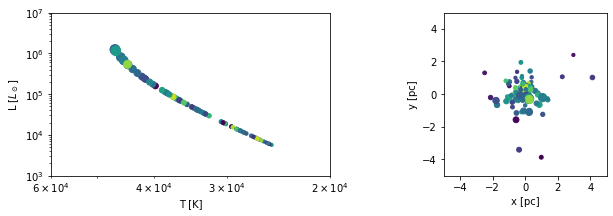

In [10]:
from amuse.community.ph4.interface import ph4
from amuse.community.seba.interface import SeBa
from amuse.ext.LagrangianRadii import LagrangianRadii

stellar = SeBa()
stellar.particles.add_particles(stars)

gravity = ph4(converter)
gravity.particles.add_particles(stars)
ch_s2g = stellar.particles.new_channel_to(gravity.particles)
ch_g2l = gravity.particles.new_channel_to(stars)
ch_s2l = stellar.particles.new_channel_to(stars)
ch_s2l.copy()

plot_snapshot(stars)

Now let's run the code. Why is the coupling timescale between gravity and stellar evolution chosen the way it is?

Evolved to t= 0.0229252497243 Myr 0.023124015564 Myr mass= 1941.78957532 MSun rvir= 0.989016361895 parsec
Evolved to t= 0.0457902315366 Myr 0.0459176880484 Myr mass= 1941.30586865 MSun rvir= 0.978686956431 parsec
Evolved to t= 0.0686504697571 Myr 0.0687113605329 Myr mass= 1940.82026449 MSun rvir= 0.93732452115 parsec
Evolved to t= 0.0915056393061 Myr 0.0918353760969 Myr mass= 1940.33275896 MSun rvir= 0.96871124448 parsec
Evolved to t= 0.114355557909 Myr 0.114463877042 Myr mass= 1939.84334513 MSun rvir= 0.953699926437 parsec
Evolved to t= 0.137200049455 Myr 0.137422721066 Myr mass= 1939.35201593 MSun rvir= 0.972649017473 parsec
Evolved to t= 0.160038944393 Myr 0.16054673663 Myr mass= 1938.85876413 MSun rvir= 0.976521179897 parsec
Evolved to t= 0.182872079799 Myr 0.183010066035 Myr mass= 1938.36358239 MSun rvir= 0.972610176453 parsec
Evolved to t= 0.205699299431 Myr 0.205803738519 Myr mass= 1937.86646325 MSun rvir= 0.969191961062 parsec
Evolved to t= 0.228520453784 Myr 0.228597411004 Myr

Evolved to t= 1.89925556757 Myr 1.89947270704 Myr mass= 1894.60536287 MSun rvir= 1.01674961631 parsec
Evolved to t= 1.92168659702 Myr 1.92193603645 Myr mass= 1893.94854979 MSun rvir= 1.02238904179 parsec
Evolved to t= 1.9441184843 Myr 1.94439936585 Myr mass= 1893.28995002 MSun rvir= 1.02479126164 parsec
Evolved to t= 1.96655143936 Myr 1.96669752372 Myr mass= 1892.62959976 MSun rvir= 1.013210841 parsec
Evolved to t= 1.98898566745 Myr 1.98932602466 Myr mass= 1891.96753747 MSun rvir= 1.0039758174 parsec
Evolved to t= 2.01142136837 Myr 2.01145901099 Myr mass= 1891.30380395 MSun rvir= 0.96531335498 parsec
Evolved to t= 2.03385873584 Myr 2.03425268347 Myr mass= 1890.63844248 MSun rvir= 1.00102007834 parsec
Evolved to t= 2.05629795674 Myr 2.0563856698 Myr mass= 1889.97149897 MSun rvir= 0.997663563705 parsec
Evolved to t= 2.07873921028 Myr 2.0788489992 Myr mass= 1889.30302208 MSun rvir= 0.992880144818 parsec
Evolved to t= 2.10118266722 Myr 2.10164267169 Myr mass= 1888.63306339 MSun rvir= 0.987

Evolved to t= 3.53273050617 Myr 3.53285406355 Myr mass= 1836.70716487 MSun rvir= 1.05729341222 parsec
Evolved to t= 3.53823788925 Myr 3.53830472437 Myr mass= 1836.27392624 MSun rvir= 1.06310123673 parsec
Evolved to t= 3.54340505688 Myr 3.54392055672 Myr mass= 1835.87092373 MSun rvir= 1.06497561591 parsec
Evolved to t= 3.54824959064 Myr 3.54854535983 Myr mass= 1835.49610221 MSun rvir= 1.06515815254 parsec
Evolved to t= 3.55278862788 Myr 3.55317016294 Myr mass= 1835.14753781 MSun rvir= 1.06453555874 parsec
Evolved to t= 3.55703880291 Myr 3.5571342799 Myr mass= 1834.8234309 MSun rvir= 1.06358391404 parsec
Evolved to t= 3.56101620099 Myr 3.56109839685 Myr mass= 1834.5220991 MSun rvir= 1.06241159689 parsec
Evolved to t= 3.56473632369 Myr 3.5650625138 Myr mass= 1834.24197061 MSun rvir= 1.06122159741 parsec
Evolved to t= 3.56821406431 Myr 3.5683659446 Myr mass= 1833.98157774 MSun rvir= 1.06036071533 parsec
Evolved to t= 3.571463692 Myr 3.57166937539 Myr mass= 1833.73955068 MSun rvir= 1.059635

Evolved to t= 3.61538951148 Myr 3.61543983343 Myr mass= 1830.42664264 MSun rvir= 1.03526348754 parsec
Evolved to t= 3.61540172724 Myr 3.61543983343 Myr mass= 1830.42565722 MSun rvir= 1.03526386576 parsec
Evolved to t= 3.61541312024 Myr 3.61543983343 Myr mass= 1830.42473811 MSun rvir= 1.03526421853 parsec
Evolved to t= 3.61542374594 Myr 3.61543983343 Myr mass= 1830.42388085 MSun rvir= 1.03526454757 parsec
Evolved to t= 3.61543365606 Myr 3.61543983343 Myr mass= 1830.42308128 MSun rvir= 1.03526485447 parsec
Evolved to t= 3.61544289879 Myr 3.6155224192 Myr mass= 1830.42233552 MSun rvir= 1.03515969848 parsec
Evolved to t= 3.61545151913 Myr 3.6155224192 Myr mass= 1830.42163994 MSun rvir= 1.0351599654 parsec
Evolved to t= 3.61545955899 Myr 3.6155224192 Myr mass= 1830.42099118 MSun rvir= 1.03516021437 parsec
Evolved to t= 3.61546705749 Myr 3.6155224192 Myr mass= 1830.42038607 MSun rvir= 1.03516044658 parsec
Evolved to t= 3.61547405109 Myr 3.6155224192 Myr mass= 1830.41982168 MSun rvir= 1.03516

Evolved to t= 3.61557042637 Myr 3.61560500497 Myr mass= 1830.41204199 MSun rvir= 1.03505759643 parsec
Evolved to t= 3.61557046143 Myr 3.61560500497 Myr mass= 1830.41203916 MSun rvir= 1.03505759751 parsec
Evolved to t= 3.61557049412 Myr 3.61560500497 Myr mass= 1830.41203652 MSun rvir= 1.03505759853 parsec
Evolved to t= 3.61557052462 Myr 3.61560500497 Myr mass= 1830.41203406 MSun rvir= 1.03505759947 parsec
Evolved to t= 3.61557055307 Myr 3.61560500497 Myr mass= 1830.41203176 MSun rvir= 1.03505760035 parsec
Evolved to t= 3.6155705796 Myr 3.61560500497 Myr mass= 1830.41202962 MSun rvir= 1.03505760117 parsec
Evolved to t= 3.61557060434 Myr 3.61560500497 Myr mass= 1830.41202762 MSun rvir= 1.03505760194 parsec
Evolved to t= 3.61557062742 Myr 3.61560500497 Myr mass= 1830.41202575 MSun rvir= 1.03505760266 parsec
Evolved to t= 3.61557064895 Myr 3.61560500497 Myr mass= 1830.41202402 MSun rvir= 1.03505760332 parsec
Evolved to t= 3.61557066903 Myr 3.61560500497 Myr mass= 1830.4120224 MSun rvir= 1.0

Evolved to t= 3.61557847937 Myr 3.61560500497 Myr mass= 1830.41139181 MSun rvir= 1.03505784588 parsec
Evolved to t= 3.61557872674 Myr 3.61560500497 Myr mass= 1830.41137184 MSun rvir= 1.03505785355 parsec
Evolved to t= 3.61557895746 Myr 3.61560500497 Myr mass= 1830.41135321 MSun rvir= 1.03505786069 parsec
Evolved to t= 3.61557917265 Myr 3.61560500497 Myr mass= 1830.41133584 MSun rvir= 1.03505786736 parsec
Evolved to t= 3.61557937335 Myr 3.61560500497 Myr mass= 1830.41131963 MSun rvir= 1.03505787358 parsec
Evolved to t= 3.61557956055 Myr 3.61560500497 Myr mass= 1830.41130452 MSun rvir= 1.03505787938 parsec
Evolved to t= 3.61557973515 Myr 3.61560500497 Myr mass= 1830.41129042 MSun rvir= 1.03505788478 parsec
Evolved to t= 3.615579898 Myr 3.61560500497 Myr mass= 1830.41127727 MSun rvir= 1.03505788983 parsec
Evolved to t= 3.61558004989 Myr 3.61560500497 Myr mass= 1830.41126501 MSun rvir= 1.03505789453 parsec
Evolved to t= 3.61558019155 Myr 3.61560500497 Myr mass= 1830.41125357 MSun rvir= 1.0

Evolved to t= 3.6155821418 Myr 3.61560500497 Myr mass= 1830.41109612 MSun rvir= 1.03505795933 parsec
Evolved to t= 3.6155821428 Myr 3.61560500497 Myr mass= 1830.41109604 MSun rvir= 1.03505795936 parsec
Evolved to t= 3.6155821438 Myr 3.61560500497 Myr mass= 1830.41109596 MSun rvir= 1.03505795939 parsec
Evolved to t= 3.6155821448 Myr 3.61560500497 Myr mass= 1830.41109588 MSun rvir= 1.03505795943 parsec
Evolved to t= 3.6155821458 Myr 3.61560500497 Myr mass= 1830.4110958 MSun rvir= 1.03505795946 parsec
Evolved to t= 3.6155821468 Myr 3.61560500497 Myr mass= 1830.41109572 MSun rvir= 1.03505795949 parsec
Evolved to t= 3.6155821478 Myr 3.61560500497 Myr mass= 1830.41109563 MSun rvir= 1.03505795952 parsec
Evolved to t= 3.6155821488 Myr 3.61560500497 Myr mass= 1830.41109555 MSun rvir= 1.03505795955 parsec
Evolved to t= 3.6155821498 Myr 3.61560500497 Myr mass= 1830.41109547 MSun rvir= 1.03505795958 parsec
Evolved to t= 3.6155821508 Myr 3.61560500497 Myr mass= 1830.41109539 MSun rvir= 1.0350579596

Evolved to t= 3.65635780087 Myr 3.6568978899 Myr mass= 1760.92034726 MSun rvir= 1.04860952698 parsec
Evolved to t= 3.65858872088 Myr 3.65887994838 Myr mass= 1760.72736313 MSun rvir= 1.05009845371 parsec
Evolved to t= 3.66083172064 Myr 3.66086200686 Myr mass= 1760.53438134 MSun rvir= 1.05097902128 parsec
Evolved to t= 3.66308692568 Myr 3.66350475149 Myr mass= 1760.34140197 MSun rvir= 1.05128345122 parsec
Evolved to t= 3.66535446315 Myr 3.66548680997 Myr mass= 1760.14842509 MSun rvir= 1.05090004392 parsec
Evolved to t= 3.6676344619 Myr 3.6681295546 Myr mass= 1759.95545076 MSun rvir= 1.04948363362 parsec
Evolved to t= 3.66992705245 Myr 3.67011161308 Myr mass= 1759.76247903 MSun rvir= 1.04768090716 parsec
Evolved to t= 3.6722323671 Myr 3.67242401464 Myr mass= 1759.56950994 MSun rvir= 1.04461769602 parsec
Evolved to t= 3.67455053988 Myr 3.67473641619 Myr mass= 1759.37654351 MSun rvir= 1.04043293394 parsec
Evolved to t= 3.67688170663 Myr 3.67704881775 Myr mass= 1759.18357974 MSun rvir= 1.035

Evolved to t= 3.8905783516 Myr 3.89061561864 Myr mass= 1745.28017255 MSun rvir= 1.06904410521 parsec
Evolved to t= 3.89439931874 Myr 3.89441456405 Myr mass= 1745.08643066 MSun rvir= 1.07444153945 parsec
Evolved to t= 3.8982515255 Myr 3.89829609524 Myr mass= 1744.89248131 MSun rvir= 1.06921993004 parsec
Evolved to t= 3.90213539597 Myr 3.90217762642 Myr mass= 1744.69826579 MSun rvir= 1.0791075307 parsec
Evolved to t= 3.90605136169 Myr 3.90630691491 Myr mass= 1744.50376796 MSun rvir= 1.07992750069 parsec
Evolved to t= 3.9099998618 Myr 3.91027103187 Myr mass= 1744.30897042 MSun rvir= 1.0731418091 parsec
Evolved to t= 3.91398134319 Myr 3.91398739151 Myr mass= 1744.11385442 MSun rvir= 1.02661453409 parsec
Evolved to t= 3.91799626069 Myr 3.91803409423 Myr mass= 1743.91839972 MSun rvir= 1.06275203258 parsec
Evolved to t= 3.92204507723 Myr 3.92216338273 Myr mass= 1743.72258441 MSun rvir= 1.08369373181 parsec
Evolved to t= 3.92612826403 Myr 3.92645784276 Myr mass= 1743.52638476 MSun rvir= 1.0906

Evolved to t= 4.125554674 Myr 4.12557213392 Myr mass= 1734.27104514 MSun rvir= 1.13613071538 parsec
Evolved to t= 4.12560015828 Myr 4.12561342681 Myr mass= 1734.26883683 MSun rvir= 1.13613341204 parsec
Evolved to t= 4.12564120963 Myr 4.12565471969 Myr mass= 1734.26684382 MSun rvir= 1.13613585287 parsec
Evolved to t= 4.1256782597 Myr 4.12569601258 Myr mass= 1734.26504511 MSun rvir= 1.13613805106 parsec
Evolved to t= 4.1257116982 Myr 4.12573730546 Myr mass= 1734.26342178 MSun rvir= 1.13614001862 parsec
Evolved to t= 4.12574187692 Myr 4.12577859835 Myr mass= 1734.26195674 MSun rvir= 1.13614176651 parsec
Evolved to t= 4.12576911343 Myr 4.12577859835 Myr mass= 1734.26063456 MSun rvir= 1.13614250363 parsec
Evolved to t= 4.12579369442 Myr 4.12581989123 Myr mass= 1734.25944132 MSun rvir= 1.13614396998 parsec
Evolved to t= 4.12581587865 Myr 4.12581989123 Myr mass= 1734.25836444 MSun rvir= 1.13614457033 parsec
Evolved to t= 4.12583589972 Myr 4.12586118412 Myr mass= 1734.25739258 MSun rvir= 1.136

Evolved to t= 4.12602103774 Myr 4.12602635566 Myr mass= 1734.24840634 MSun rvir= 1.13615222568 parsec
Evolved to t= 4.1260210489 Myr 4.12602635566 Myr mass= 1734.24840579 MSun rvir= 1.13615222598 parsec
Evolved to t= 4.12602105896 Myr 4.12602635566 Myr mass= 1734.24840531 MSun rvir= 1.13615222625 parsec
Evolved to t= 4.12602106804 Myr 4.12602635566 Myr mass= 1734.24840486 MSun rvir= 1.1361522265 parsec
Evolved to t= 4.12602107624 Myr 4.12602635566 Myr mass= 1734.24840447 MSun rvir= 1.13615222672 parsec
Evolved to t= 4.12602108364 Myr 4.12602635566 Myr mass= 1734.24840411 MSun rvir= 1.13615222692 parsec
Evolved to t= 4.12602109031 Myr 4.12602635566 Myr mass= 1734.24840378 MSun rvir= 1.1361522271 parsec
Evolved to t= 4.12602109634 Myr 4.12602635566 Myr mass= 1734.24840349 MSun rvir= 1.13615222726 parsec
Evolved to t= 4.12602110178 Myr 4.12602635566 Myr mass= 1734.24840323 MSun rvir= 1.13615222741 parsec
Evolved to t= 4.12602110668 Myr 4.12602635566 Myr mass= 1734.24840299 MSun rvir= 1.13

Evolved to t= 4.12604433953 Myr 4.12606764854 Myr mass= 1734.24727535 MSun rvir= 1.13615290604 parsec
Evolved to t= 4.12604434944 Myr 4.12606764854 Myr mass= 1734.24727487 MSun rvir= 1.13615290631 parsec
Evolved to t= 4.12604435838 Myr 4.12606764854 Myr mass= 1734.24727444 MSun rvir= 1.13615290655 parsec
Evolved to t= 4.12604436645 Myr 4.12606764854 Myr mass= 1734.24727405 MSun rvir= 1.13615290677 parsec
Evolved to t= 4.12604437373 Myr 4.12606764854 Myr mass= 1734.24727369 MSun rvir= 1.13615290697 parsec
Evolved to t= 4.1260443803 Myr 4.12606764854 Myr mass= 1734.24727337 MSun rvir= 1.13615290715 parsec
Evolved to t= 4.12604438624 Myr 4.12606764854 Myr mass= 1734.24727309 MSun rvir= 1.13615290731 parsec
Evolved to t= 4.12604439159 Myr 4.12606764854 Myr mass= 1734.24727283 MSun rvir= 1.13615290745 parsec
Evolved to t= 4.12604439643 Myr 4.12606764854 Myr mass= 1734.24727259 MSun rvir= 1.13615290758 parsec
Evolved to t= 4.12604440079 Myr 4.12606764854 Myr mass= 1734.24727238 MSun rvir= 1.

Evolved to t= 4.18881804437 Myr 4.18883283364 Myr mass= 1731.68077101 MSun rvir= 1.1610152533 parsec
Evolved to t= 4.18886740111 Myr 4.18887412653 Myr mass= 1731.67921513 MSun rvir= 1.16098874489 parsec
Evolved to t= 4.18891178219 Myr 4.18891541941 Myr mass= 1731.67781573 MSun rvir= 1.16096201507 parsec
Evolved to t= 4.18895169021 Myr 4.1889567123 Myr mass= 1731.67655709 MSun rvir= 1.16093507785 parsec
Evolved to t= 4.18898757681 Myr 4.18899800518 Myr mass= 1731.67542504 MSun rvir= 1.1609079459 parsec
Evolved to t= 4.18901984788 Myr 4.18903929807 Myr mass= 1731.67440685 MSun rvir= 1.16088063064 parsec
Evolved to t= 4.1890488682 Myr 4.18908059095 Myr mass= 1731.67349107 MSun rvir= 1.1608531424 parsec
Evolved to t= 4.18907496567 Myr 4.18908059095 Myr mass= 1731.67266739 MSun rvir= 1.16085385269 parsec
Evolved to t= 4.18909843502 Myr 4.18912188384 Myr mass= 1731.67192657 MSun rvir= 1.16082612944 parsec
Evolved to t= 4.18911954119 Myr 4.18912188384 Myr mass= 1731.67126025 MSun rvir= 1.1608

Evolved to t= 4.18930811584 Myr 4.18932834826 Myr mass= 1731.66530356 MSun rvir= 1.16068878524 parsec
Evolved to t= 4.1893081207 Myr 4.18932834826 Myr mass= 1731.66530341 MSun rvir= 1.16068878538 parsec
Evolved to t= 4.18930812508 Myr 4.18932834826 Myr mass= 1731.66530327 MSun rvir= 1.1606887855 parsec
Evolved to t= 4.18930812901 Myr 4.18932834826 Myr mass= 1731.66530314 MSun rvir= 1.1606887856 parsec
Evolved to t= 4.18930813255 Myr 4.18932834826 Myr mass= 1731.66530303 MSun rvir= 1.1606887857 parsec
Evolved to t= 4.18930813573 Myr 4.18932834826 Myr mass= 1731.66530293 MSun rvir= 1.16068878579 parsec
Evolved to t= 4.18930813859 Myr 4.18932834826 Myr mass= 1731.66530284 MSun rvir= 1.16068878587 parsec
Evolved to t= 4.18930814116 Myr 4.18932834826 Myr mass= 1731.66530276 MSun rvir= 1.16068878594 parsec
Evolved to t= 4.18930814348 Myr 4.18932834826 Myr mass= 1731.66530269 MSun rvir= 1.160688786 parsec
Evolved to t= 4.18930814556 Myr 4.18932834826 Myr mass= 1731.66530262 MSun rvir= 1.16068

Evolved to t= 4.22951229057 Myr 4.22971278973 Myr mass= 1702.96484456 MSun rvir= 1.22246237521 parsec
Evolved to t= 4.23329752968 Myr 4.23367690668 Myr mass= 1702.83400351 MSun rvir= 1.23254344878 parsec
Evolved to t= 4.23710485054 Myr 4.23764102364 Myr mass= 1702.70101725 MSun rvir= 1.24080389181 parsec
Evolved to t= 4.2409345371 Myr 4.24094445443 Myr mass= 1702.56570213 MSun rvir= 1.24597322336 parsec
Evolved to t= 4.24478687755 Myr 4.24490857139 Myr mass= 1702.42774294 MSun rvir= 1.25015526829 parsec
Evolved to t= 4.2486621644 Myr 4.24887268834 Myr mass= 1702.28676231 MSun rvir= 1.25571446202 parsec
Evolved to t= 4.25256069454 Myr 4.25283680529 Myr mass= 1702.14250015 MSun rvir= 1.26401252881 parsec
Evolved to t= 4.25648276934 Myr 4.25680092225 Myr mass= 1701.99467074 MSun rvir= 1.27093050854 parsec
Evolved to t= 4.26042869474 Myr 4.2607650392 Myr mass= 1701.84296038 MSun rvir= 1.27622536791 parsec
Evolved to t= 4.26439878136 Myr 4.26472915615 Myr mass= 1701.68702498 MSun rvir= 1.28

Evolved to t= 4.34481994369 Myr 4.34483735293 Myr mass= 1698.51161962 MSun rvir= 1.3208711312 parsec
Evolved to t= 4.34482121871 Myr 4.34483735293 Myr mass= 1698.51156669 MSun rvir= 1.32087117856 parsec
Evolved to t= 4.34482235317 Myr 4.34483735293 Myr mass= 1698.51151959 MSun rvir= 1.3208712207 parsec
Evolved to t= 4.34482336255 Myr 4.34483735293 Myr mass= 1698.51147769 MSun rvir= 1.32087125819 parsec
Evolved to t= 4.34482426065 Myr 4.34483735293 Myr mass= 1698.51144041 MSun rvir= 1.32087129155 parsec
Evolved to t= 4.34482505974 Myr 4.34483735293 Myr mass= 1698.51140724 MSun rvir= 1.32087132123 parsec
Evolved to t= 4.34482577073 Myr 4.34483735293 Myr mass= 1698.51137772 MSun rvir= 1.32087134763 parsec
Evolved to t= 4.34482640333 Myr 4.34483735293 Myr mass= 1698.51135146 MSun rvir= 1.32087137113 parsec
Evolved to t= 4.3448269662 Myr 4.34483735293 Myr mass= 1698.5113281 MSun rvir= 1.32087139204 parsec
Evolved to t= 4.34482746701 Myr 4.34483735293 Myr mass= 1698.51130731 MSun rvir= 1.320

Evolved to t= 4.34570689685 Myr 4.3457457964 Myr mass= 1698.4755615 MSun rvir= 1.32093701262 parsec
Evolved to t= 4.34579464833 Myr 4.34582838217 Myr mass= 1698.47218678 MSun rvir= 1.3209428256 parsec
Evolved to t= 4.34588243863 Myr 4.34591096794 Myr mass= 1698.46884793 MSun rvir= 1.32094854474 parsec
Evolved to t= 4.34597026778 Myr 4.34599355371 Myr mass= 1698.46554367 MSun rvir= 1.32095416629 parsec
Evolved to t= 4.34605813582 Myr 4.34607613948 Myr mass= 1698.46189138 MSun rvir= 1.32096001088 parsec
Evolved to t= 4.34614604278 Myr 4.34615872525 Myr mass= 1698.45704279 MSun rvir= 1.3209667945 parsec
Evolved to t= 4.34623398871 Myr 4.34624131102 Myr mass= 1698.4498681 MSun rvir= 1.32097547115 parsec
Evolved to t= 4.34632197362 Myr 4.34632389679 Myr mass= 1698.437997 MSun rvir= 1.32098804757 parsec
Evolved to t= 4.34640999757 Myr 4.34648906833 Myr mass= 1698.42427807 MSun rvir= 1.32100417898 parsec
Evolved to t= 4.34649806057 Myr 4.34653036121 Myr mass= 1698.41094497 MSun rvir= 1.321016

Evolved to t= 4.3503185668 Myr 4.35032930663 Myr mass= 1698.03356592 MSun rvir= 1.32118024172 parsec
Evolved to t= 4.35031864929 Myr 4.35032930663 Myr mass= 1698.03355546 MSun rvir= 1.32118025079 parsec
Evolved to t= 4.35031871827 Myr 4.35032930663 Myr mass= 1698.03354671 MSun rvir= 1.32118025838 parsec
Evolved to t= 4.35031877596 Myr 4.35032930663 Myr mass= 1698.0335394 MSun rvir= 1.32118026472 parsec
Evolved to t= 4.35031882421 Myr 4.35032930663 Myr mass= 1698.03353328 MSun rvir= 1.32118027003 parsec
Evolved to t= 4.35031886456 Myr 4.35032930663 Myr mass= 1698.03352817 MSun rvir= 1.32118027446 parsec
Evolved to t= 4.35031889831 Myr 4.35032930663 Myr mass= 1698.03352389 MSun rvir= 1.32118027817 parsec
Evolved to t= 4.35031892653 Myr 4.35032930663 Myr mass= 1698.03352031 MSun rvir= 1.32118028128 parsec
Evolved to t= 4.35031895014 Myr 4.35032930663 Myr mass= 1698.03351732 MSun rvir= 1.32118028387 parsec
Evolved to t= 4.35031896988 Myr 4.35032930663 Myr mass= 1698.03351481 MSun rvir= 1.3

Evolved to t= 4.51196160654 Myr 4.51199095115 Myr mass= 1667.28402166 MSun rvir= 1.44402071302 parsec
Evolved to t= 4.51211013186 Myr 4.51215612269 Myr mass= 1667.27428887 MSun rvir= 1.44407081402 parsec
Evolved to t= 4.51224057872 Myr 4.51232129423 Myr mass= 1667.26573885 MSun rvir= 1.44412151428 parsec
Evolved to t= 4.51235515847 Myr 4.51240388 Myr mass= 1667.25822736 MSun rvir= 1.44415003676 parsec
Evolved to t= 4.5124558095 Myr 4.51248646577 Myr mass= 1667.25162784 MSun rvir= 1.44417821901 parsec
Evolved to t= 4.51254423153 Myr 4.51256905154 Myr mass= 1667.24582927 MSun rvir= 1.44420614986 parsec
Evolved to t= 4.51262191542 Myr 4.51265163731 Myr mass= 1667.24073419 MSun rvir= 1.444233907 parsec
Evolved to t= 4.51269016911 Myr 4.51273422308 Myr mass= 1667.23625709 MSun rvir= 1.44426155839 parsec
Evolved to t= 4.51275014036 Myr 4.51281680885 Myr mass= 1667.23232285 MSun rvir= 1.44428916339 parsec
Evolved to t= 4.51280283657 Myr 4.51281680885 Myr mass= 1667.22886555 MSun rvir= 1.44429

Evolved to t= 4.51318506407 Myr 4.5132297377 Myr mass= 1667.20377928 MSun rvir= 1.44444008977 parsec
Evolved to t= 4.5131850658 Myr 4.5132297377 Myr mass= 1667.20377917 MSun rvir= 1.44444008986 parsec
Evolved to t= 4.51318506733 Myr 4.5132297377 Myr mass= 1667.20377906 MSun rvir= 1.44444008994 parsec
Evolved to t= 4.51318506867 Myr 4.5132297377 Myr mass= 1667.20377898 MSun rvir= 1.44444009001 parsec
Evolved to t= 4.51318506984 Myr 4.5132297377 Myr mass= 1667.2037789 MSun rvir= 1.44444009008 parsec
Evolved to t= 4.51318507088 Myr 4.5132297377 Myr mass= 1667.20377883 MSun rvir= 1.44444009013 parsec
Evolved to t= 4.51318507188 Myr 4.5132297377 Myr mass= 1667.20377877 MSun rvir= 1.44444009018 parsec
Evolved to t= 4.51318507288 Myr 4.5132297377 Myr mass= 1667.2037787 MSun rvir= 1.44444009024 parsec
Evolved to t= 4.51318507388 Myr 4.5132297377 Myr mass= 1667.20377863 MSun rvir= 1.44444009029 parsec
Evolved to t= 4.51318507488 Myr 4.5132297377 Myr mass= 1667.20377857 MSun rvir= 1.44444009034 

Evolved to t= 4.51331559754 Myr 4.51339490924 Myr mass= 1667.19521063 MSun rvir= 1.44450084854 parsec
Evolved to t= 4.51331559943 Myr 4.51339490924 Myr mass= 1667.1952105 MSun rvir= 1.44450084863 parsec
Evolved to t= 4.51331560109 Myr 4.51339490924 Myr mass= 1667.19521039 MSun rvir= 1.44450084872 parsec
Evolved to t= 4.51331560255 Myr 4.51339490924 Myr mass= 1667.1952103 MSun rvir= 1.4445008488 parsec
Evolved to t= 4.51331560384 Myr 4.51339490924 Myr mass= 1667.19521021 MSun rvir= 1.44450084887 parsec
Evolved to t= 4.51331560497 Myr 4.51339490924 Myr mass= 1667.19521014 MSun rvir= 1.44450084893 parsec
Evolved to t= 4.51331560597 Myr 4.51339490924 Myr mass= 1667.19521007 MSun rvir= 1.44450084898 parsec
Evolved to t= 4.51331560697 Myr 4.51339490924 Myr mass= 1667.19521001 MSun rvir= 1.44450084903 parsec
Evolved to t= 4.51331560797 Myr 4.51339490924 Myr mass= 1667.19520994 MSun rvir= 1.44450084908 parsec
Evolved to t= 4.51331560897 Myr 4.51339490924 Myr mass= 1667.19520988 MSun rvir= 1.44

Evolved to t= 4.51898024733 Myr 4.51901074159 Myr mass= 1666.40169657 MSun rvir= 1.447554965 parsec
Evolved to t= 4.5189818238 Myr 4.51901074159 Myr mass= 1666.40137861 MSun rvir= 1.44755522336 parsec
Evolved to t= 4.51898312223 Myr 4.51901074159 Myr mass= 1666.40111657 MSun rvir= 1.44755543628 parsec
Evolved to t= 4.51898419166 Myr 4.51901074159 Myr mass= 1666.40090064 MSun rvir= 1.44755561173 parsec
Evolved to t= 4.51898507248 Myr 4.51901074159 Myr mass= 1666.40072272 MSun rvir= 1.4475557563 parsec
Evolved to t= 4.51898579795 Myr 4.51901074159 Myr mass= 1666.40057614 MSun rvir= 1.4475558754 parsec
Evolved to t= 4.51898639547 Myr 4.51901074159 Myr mass= 1666.40045538 MSun rvir= 1.44755597353 parsec
Evolved to t= 4.51898688761 Myr 4.51901074159 Myr mass= 1666.40035589 MSun rvir= 1.44755605437 parsec
Evolved to t= 4.51898729294 Myr 4.51901074159 Myr mass= 1666.40027394 MSun rvir= 1.44755612096 parsec
Evolved to t= 4.51898762679 Myr 4.51901074159 Myr mass= 1666.40020643 MSun rvir= 1.4475

Evolved to t= 4.76568382346 Myr 4.76585960773 Myr mass= 1634.62449416 MSun rvir= 1.52818145752 parsec
Evolved to t= 4.76670567795 Myr 4.76685063697 Myr mass= 1634.48370866 MSun rvir= 1.52455716672 parsec
Evolved to t= 4.76760983237 Myr 4.76784166621 Myr mass= 1634.35904883 MSun rvir= 1.52058333033 parsec
Evolved to t= 4.76840965802 Myr 4.76850235237 Myr mass= 1634.24870216 MSun rvir= 1.51775126753 parsec
Evolved to t= 4.76911704776 Myr 4.76916303853 Myr mass= 1634.15105239 MSun rvir= 1.51469305857 parsec
Evolved to t= 4.76974257055 Myr 4.76982372469 Myr mass= 1634.06465986 MSun rvir= 1.5112800601 parsec
Evolved to t= 4.77029561185 Myr 4.77031923931 Myr mass= 1633.98824353 MSun rvir= 1.50833505841 parsec
Evolved to t= 4.77078450067 Myr 4.77081475393 Myr mass= 1633.92066447 MSun rvir= 1.50478631513 parsec
Evolved to t= 4.77121662418 Myr 4.77122768278 Myr mass= 1633.86091094 MSun rvir= 1.50105602301 parsec
Evolved to t= 4.77159853088 Myr 4.77164061162 Myr mass= 1633.80808479 MSun rvir= 1.

Evolved to t= 4.77449146962 Myr 4.7744949823 Myr mass= 1633.40741962 MSun rvir= 1.4802338731 parsec
Evolved to t= 4.77449150829 Myr 4.7744949823 Myr mass= 1633.40741426 MSun rvir= 1.48023387778 parsec
Evolved to t= 4.77449154243 Myr 4.7744949823 Myr mass= 1633.40740952 MSun rvir= 1.48023388192 parsec
Evolved to t= 4.77449157259 Myr 4.7744949823 Myr mass= 1633.40740534 MSun rvir= 1.48023388558 parsec
Evolved to t= 4.77449159921 Myr 4.7744949823 Myr mass= 1633.40740165 MSun rvir= 1.48023388881 parsec
Evolved to t= 4.77449162273 Myr 4.7744949823 Myr mass= 1633.40739839 MSun rvir= 1.48023389166 parsec
Evolved to t= 4.77449164349 Myr 4.7744949823 Myr mass= 1633.40739551 MSun rvir= 1.48023389418 parsec
Evolved to t= 4.77449166182 Myr 4.7744949823 Myr mass= 1633.40739297 MSun rvir= 1.4802338964 parsec
Evolved to t= 4.77449167801 Myr 4.7744949823 Myr mass= 1633.40739072 MSun rvir= 1.48023389836 parsec
Evolved to t= 4.77449169231 Myr 4.7744949823 Myr mass= 1633.40738874 MSun rvir= 1.48023390009

Evolved to t= 4.89148901169 Myr 4.89155514948 Myr mass= 1610.09245692 MSun rvir= 1.61374614878 parsec
Evolved to t= 4.89168813466 Myr 4.89172032102 Myr mass= 1610.0756808 MSun rvir= 1.61385491068 parsec
Evolved to t= 4.89186691467 Myr 4.89188549256 Myr mass= 1610.06062779 MSun rvir= 1.61396097155 parsec
Evolved to t= 4.89202742277 Myr 4.8920506641 Myr mass= 1610.04712068 MSun rvir= 1.61406444028 parsec
Evolved to t= 4.89217152056 Myr 4.89221583564 Myr mass= 1610.03500051 MSun rvir= 1.61416540953 parsec
Evolved to t= 4.89230088111 Myr 4.89238100718 Myr mass= 1610.02412471 MSun rvir= 1.6142639572 parsec
Evolved to t= 4.89241700784 Myr 4.89246359295 Myr mass= 1610.01436541 MSun rvir= 1.61431598731 parsec
Evolved to t= 4.89252125153 Myr 4.89254617872 Myr mass= 1610.00560788 MSun rvir= 1.61436686865 parsec
Evolved to t= 4.89261482568 Myr 4.89262876449 Myr mass= 1609.99774922 MSun rvir= 1.6144166757 parsec
Evolved to t= 4.89269882035 Myr 4.89271135026 Myr mass= 1609.9906971 MSun rvir= 1.6144

Evolved to t= 4.89343429616 Myr 4.89345462218 Myr mass= 1609.92902897 MSun rvir= 1.61488491283 parsec
Evolved to t= 4.89343431873 Myr 4.89345462218 Myr mass= 1609.92902708 MSun rvir= 1.61488491428 parsec
Evolved to t= 4.89343433898 Myr 4.89345462218 Myr mass= 1609.92902538 MSun rvir= 1.61488491558 parsec
Evolved to t= 4.89343435716 Myr 4.89345462218 Myr mass= 1609.92902386 MSun rvir= 1.61488491674 parsec
Evolved to t= 4.89343437347 Myr 4.89345462218 Myr mass= 1609.9290225 MSun rvir= 1.61488491779 parsec
Evolved to t= 4.89343438811 Myr 4.89345462218 Myr mass= 1609.92902127 MSun rvir= 1.61488491873 parsec
Evolved to t= 4.89343440125 Myr 4.89345462218 Myr mass= 1609.92902017 MSun rvir= 1.61488491958 parsec
Evolved to t= 4.89343441304 Myr 4.89345462218 Myr mass= 1609.92901918 MSun rvir= 1.61488492033 parsec
Evolved to t= 4.89343442362 Myr 4.89345462218 Myr mass= 1609.9290183 MSun rvir= 1.61488492101 parsec
Evolved to t= 4.89343443311 Myr 4.89345462218 Myr mass= 1609.9290175 MSun rvir= 1.61

Evolved to t= 4.8966064034 Myr 4.89663417432 Myr mass= 1609.66353951 MSun rvir= 1.61619689174 parsec
Evolved to t= 4.89660664546 Myr 4.89663417432 Myr mass= 1609.66351929 MSun rvir= 1.61619690733 parsec
Evolved to t= 4.89660685233 Myr 4.89663417432 Myr mass= 1609.66350201 MSun rvir= 1.61619692065 parsec
Evolved to t= 4.89660702911 Myr 4.89663417432 Myr mass= 1609.66348724 MSun rvir= 1.61619693203 parsec
Evolved to t= 4.89660718019 Myr 4.89663417432 Myr mass= 1609.66347462 MSun rvir= 1.61619694176 parsec
Evolved to t= 4.89660730931 Myr 4.89663417432 Myr mass= 1609.66346383 MSun rvir= 1.61619695007 parsec
Evolved to t= 4.89660741964 Myr 4.89663417432 Myr mass= 1609.66345462 MSun rvir= 1.61619695717 parsec
Evolved to t= 4.89660751394 Myr 4.89663417432 Myr mass= 1609.66344674 MSun rvir= 1.61619696324 parsec
Evolved to t= 4.89660759452 Myr 4.89663417432 Myr mass= 1609.66344001 MSun rvir= 1.61619696843 parsec
Evolved to t= 4.89660766339 Myr 4.89663417432 Myr mass= 1609.66343426 MSun rvir= 1.

Evolved to t= 4.90156970264 Myr 4.9016306134 Myr mass= 1609.11291027 MSun rvir= 1.61480114368 parsec
Evolved to t= 4.90166031731 Myr 4.90167190629 Myr mass= 1609.10311278 MSun rvir= 1.61475485637 parsec
Evolved to t= 4.90173767774 Myr 4.90175449206 Myr mass= 1609.09465973 MSun rvir= 1.61465173089 parsec
Evolved to t= 4.90180372821 Myr 4.90183707783 Myr mass= 1609.08737556 MSun rvir= 1.61454330849 parsec
Evolved to t= 4.90186012625 Myr 4.90187837071 Myr mass= 1609.08110554 MSun rvir= 1.61448901279 parsec
Evolved to t= 4.90190828543 Myr 4.9019196636 Myr mass= 1609.07571382 MSun rvir= 1.61443294798 parsec
Evolved to t= 4.90194941146 Myr 4.90196095648 Myr mass= 1609.07108143 MSun rvir= 1.61437517317 parsec
Evolved to t= 4.90198453306 Myr 4.90200224937 Myr mass= 1609.0671045 MSun rvir= 1.61431573541 parsec
Evolved to t= 4.90201452802 Myr 4.90202289581 Myr mass= 1609.0636926 MSun rvir= 1.6142864338 parsec
Evolved to t= 4.90204014551 Myr 4.90204354225 Myr mass= 1609.0607672 MSun rvir= 1.61425

Evolved to t= 4.90290522194 Myr 4.90291069283 Myr mass= 1608.95228195 MSun rvir= 1.61264852055 parsec
Evolved to t= 4.90294927105 Myr 4.90295198572 Myr mass= 1608.94617935 MSun rvir= 1.61255287928 parsec
Evolved to t= 4.90298433853 Myr 4.9029932786 Myr mass= 1608.94129054 MSun rvir= 1.61245456093 parsec
Evolved to t= 4.9030122542 Myr 4.90301392505 Myr mass= 1608.93737906 MSun rvir= 1.61240535664 parsec
Evolved to t= 4.90303447565 Myr 4.90303457149 Myr mass= 1608.93425277 MSun rvir= 1.61235522052 parsec
Evolved to t= 4.90305216375 Myr 4.90305521793 Myr mass= 1608.93175613 MSun rvir= 1.61230422573 parsec
Evolved to t= 4.90306624296 Myr 4.90307586437 Myr mass= 1608.92976368 MSun rvir= 1.61225242988 parsec
Evolved to t= 4.90307744934 Myr 4.90309651082 Myr mass= 1608.92817447 MSun rvir= 1.61219987785 parsec
Evolved to t= 4.90308636894 Myr 4.90309651082 Myr mass= 1608.92690744 MSun rvir= 1.61220051753 parsec
Evolved to t= 4.90309346828 Myr 4.90309651082 Myr mass= 1608.92589763 MSun rvir= 1.6

Evolved to t= 4.90761596998 Myr 4.90761808172 Myr mass= 1608.28473753 MSun rvir= 1.53974566957 parsec
Evolved to t= 4.9077490034 Myr 4.90776260681 Myr mass= 1608.26582946 MSun rvir= 1.53986601175 parsec
Evolved to t= 4.90788208483 Myr 4.90790713191 Myr mass= 1608.24657373 MSun rvir= 1.5433722929 parsec
Evolved to t= 4.90801521431 Myr 4.90803101057 Myr mass= 1608.22694687 MSun rvir= 1.54827206237 parsec
Evolved to t= 4.90814839186 Myr 4.90815488922 Myr mass= 1608.20692375 MSun rvir= 1.55400901474 parsec
Evolved to t= 4.90826389034 Myr 4.90827876788 Myr mass= 1608.18924799 MSun rvir= 1.55989784984 parsec
Evolved to t= 4.9083558311 Myr 4.90836135365 Myr mass= 1608.17497047 MSun rvir= 1.56369335703 parsec
Evolved to t= 4.90842900854 Myr 4.90844393942 Myr mass= 1608.16347011 MSun rvir= 1.5673022543 parsec
Evolved to t= 4.9084872452 Myr 4.90852652519 Myr mass= 1608.15422843 MSun rvir= 1.57069118289 parsec
Evolved to t= 4.90853358732 Myr 4.90853684841 Myr mass= 1608.14681623 MSun rvir= 1.5710

Evolved to t= 4.97999774466 Myr 4.98025226632 Myr mass= 1599.4423843 MSun rvir= 1.65862499225 parsec
Evolved to t= 4.98354974837 Myr 4.98355569711 Myr mass= 1599.02983902 MSun rvir= 1.66214560062 parsec
Evolved to t= 4.98713483549 Myr 4.98751981407 Myr mass= 1598.61398232 MSun rvir= 1.66594824763 parsec
Evolved to t= 4.99053640408 Myr 4.99082324486 Myr mass= 1598.21995858 MSun rvir= 1.66910399887 parsec
Evolved to t= 4.99373454577 Myr 4.99412667566 Myr mass= 1597.84994429 MSun rvir= 1.67236719965 parsec
Evolved to t= 4.99673848282 Myr 4.99676942029 Myr mass= 1597.5027621 MSun rvir= 1.67505154605 parsec
Evolved to t= 4.9995572201 Myr 5.00007285109 Myr mass= 1597.17731973 MSun rvir= 1.67841566816 parsec
Evolved to t= 5.00219970968 Myr 5.00271559572 Myr mass= 1596.87257062 MSun rvir= 1.68105523145 parsec
Evolved to t= 5.00467479447 Myr 5.00535834036 Myr mass= 1596.58750074 MSun rvir= 1.68359581818 parsec
Evolved to t= 5.00699116121 Myr 5.008001085 Myr mass= 1596.32111867 MSun rvir= 1.6860

Evolved to t= 5.03781412679 Myr 5.03781454792 Myr mass= 1592.81464566 MSun rvir= 1.70299478791 parsec
Evolved to t= 5.03782331754 Myr 5.03789713369 Myr mass= 1592.81361008 MSun rvir= 1.70301875216 parsec
Evolved to t= 5.03783182064 Myr 5.03789713369 Myr mass= 1592.81265199 MSun rvir= 1.70301871133 parsec
Evolved to t= 5.03783968753 Myr 5.03789713369 Myr mass= 1592.81176559 MSun rvir= 1.70301867353 parsec
Evolved to t= 5.03784696577 Myr 5.03789713369 Myr mass= 1592.81094552 MSun rvir= 1.70301863856 parsec
Evolved to t= 5.0378536994 Myr 5.03789713369 Myr mass= 1592.81018682 MSun rvir= 1.7030186062 parsec
Evolved to t= 5.03785992916 Myr 5.03789713369 Myr mass= 1592.80948489 MSun rvir= 1.70301857626 parsec
Evolved to t= 5.03786569273 Myr 5.03789713369 Myr mass= 1592.8088355 MSun rvir= 1.70301854855 parsec
Evolved to t= 5.037871025 Myr 5.03789713369 Myr mass= 1592.8082347 MSun rvir= 1.70301852292 parsec
Evolved to t= 5.03787595822 Myr 5.03789713369 Myr mass= 1592.80767886 MSun rvir= 1.70301

Evolved to t= 5.03793678354 Myr 5.03797971946 Myr mass= 1592.80082567 MSun rvir= 1.70304210053 parsec
Evolved to t= 5.03793679496 Myr 5.03797971946 Myr mass= 1592.80082439 MSun rvir= 1.70304210048 parsec
Evolved to t= 5.03793680552 Myr 5.03797971946 Myr mass= 1592.8008232 MSun rvir= 1.70304210043 parsec
Evolved to t= 5.03793681529 Myr 5.03797971946 Myr mass= 1592.8008221 MSun rvir= 1.70304210038 parsec
Evolved to t= 5.03793682433 Myr 5.03797971946 Myr mass= 1592.80082108 MSun rvir= 1.70304210034 parsec
Evolved to t= 5.03793683269 Myr 5.03797971946 Myr mass= 1592.80082014 MSun rvir= 1.7030421003 parsec
Evolved to t= 5.03793684043 Myr 5.03797971946 Myr mass= 1592.80081926 MSun rvir= 1.70304210026 parsec
Evolved to t= 5.03793684759 Myr 5.03797971946 Myr mass= 1592.80081846 MSun rvir= 1.70304210022 parsec
Evolved to t= 5.03793685421 Myr 5.03797971946 Myr mass= 1592.80081771 MSun rvir= 1.70304210019 parsec
Evolved to t= 5.03793686034 Myr 5.03797971946 Myr mass= 1592.80081702 MSun rvir= 1.70

Evolved to t= 5.03808576474 Myr 5.038144891 Myr mass= 1592.7840361 MSun rvir= 1.70308882932 parsec
Evolved to t= 5.03808624281 Myr 5.038144891 Myr mass= 1592.78398221 MSun rvir= 1.70308882701 parsec
Evolved to t= 5.03808668508 Myr 5.038144891 Myr mass= 1592.78393236 MSun rvir= 1.70308882488 parsec
Evolved to t= 5.03808709423 Myr 5.038144891 Myr mass= 1592.78388624 MSun rvir= 1.7030888229 parsec
Evolved to t= 5.03808747274 Myr 5.038144891 Myr mass= 1592.78384357 MSun rvir= 1.70308882108 parsec
Evolved to t= 5.03808782291 Myr 5.038144891 Myr mass= 1592.7838041 MSun rvir= 1.70308881939 parsec
Evolved to t= 5.03808814686 Myr 5.038144891 Myr mass= 1592.78376758 MSun rvir= 1.70308881783 parsec
Evolved to t= 5.03808844655 Myr 5.038144891 Myr mass= 1592.7837338 MSun rvir= 1.70308881638 parsec
Evolved to t= 5.0380887238 Myr 5.038144891 Myr mass= 1592.78370255 MSun rvir= 1.70308881504 parsec
Evolved to t= 5.03808898028 Myr 5.038144891 Myr mass= 1592.78367364 MSun rvir= 1.7030888138 parsec
Evolve

Evolved to t= 5.0380921483 Myr 5.038144891 Myr mass= 1592.78331653 MSun rvir= 1.70308879852 parsec
Evolved to t= 5.0380921493 Myr 5.038144891 Myr mass= 1592.78331642 MSun rvir= 1.70308879852 parsec
Evolved to t= 5.0380921503 Myr 5.038144891 Myr mass= 1592.78331632 MSun rvir= 1.70308879849 parsec
Evolved to t= 5.03940659928 Myr 5.03971402063 Myr mass= 1592.63380771 MSun rvir= 1.7035116903 parsec
Evolved to t= 5.04050766275 Myr 5.04103539294 Myr mass= 1592.50757478 MSun rvir= 1.70383719581 parsec
Evolved to t= 5.04143134408 Myr 5.0416960791 Myr mass= 1592.40095628 MSun rvir= 1.70398856898 parsec
Evolved to t= 5.04220696716 Myr 5.04235676526 Myr mass= 1592.31090569 MSun rvir= 1.7041337634 parsec
Evolved to t= 5.04285880694 Myr 5.04301745142 Myr mass= 1592.23484961 MSun rvir= 1.70427261951 parsec
Evolved to t= 5.04340701042 Myr 5.04367813758 Myr mass= 1592.17061423 MSun rvir= 1.70440505464 parsec
Evolved to t= 5.04386833744 Myr 5.04400848066 Myr mass= 1592.11636325 MSun rvir= 1.70446855703

Evolved to t= 5.04634695026 Myr 5.04640346799 Myr mass= 1591.82172261 MSun rvir= 1.70488318871 parsec
Evolved to t= 5.04634695127 Myr 5.04640346799 Myr mass= 1591.82172249 MSun rvir= 1.70488318872 parsec
Evolved to t= 5.04634695227 Myr 5.04640346799 Myr mass= 1591.82172237 MSun rvir= 1.70488318872 parsec
Evolved to t= 5.04634695327 Myr 5.04640346799 Myr mass= 1591.82172225 MSun rvir= 1.70488318872 parsec
Evolved to t= 5.04634695427 Myr 5.04640346799 Myr mass= 1591.82172213 MSun rvir= 1.70488318872 parsec
Evolved to t= 5.04634695527 Myr 5.04640346799 Myr mass= 1591.82172201 MSun rvir= 1.70488318872 parsec
Evolved to t= 5.04634695627 Myr 5.04640346799 Myr mass= 1591.82172189 MSun rvir= 1.70488318872 parsec
Evolved to t= 5.04634695727 Myr 5.04640346799 Myr mass= 1591.82172177 MSun rvir= 1.70488318872 parsec
Evolved to t= 5.04649132791 Myr 5.0466512253 Myr mass= 1591.80437909 MSun rvir= 1.70492146654 parsec
Evolved to t= 5.04663574428 Myr 5.0466512253 Myr mass= 1591.78700943 MSun rvir= 1.7

Evolved to t= 5.05315265809 Myr 5.05317550112 Myr mass= 1590.7930096 MSun rvir= 1.70553825439 parsec
Evolved to t= 5.05315272336 Myr 5.05317550112 Myr mass= 1590.79299798 MSun rvir= 1.70553825253 parsec
Evolved to t= 5.05315277458 Myr 5.05317550112 Myr mass= 1590.79298886 MSun rvir= 1.70553825107 parsec
Evolved to t= 5.05315281478 Myr 5.05317550112 Myr mass= 1590.7929817 MSun rvir= 1.70553824993 parsec
Evolved to t= 5.05315284632 Myr 5.05317550112 Myr mass= 1590.79297609 MSun rvir= 1.70553824903 parsec
Evolved to t= 5.05315287106 Myr 5.05317550112 Myr mass= 1590.79297169 MSun rvir= 1.70553824832 parsec
Evolved to t= 5.05315289048 Myr 5.05317550112 Myr mass= 1590.79296823 MSun rvir= 1.70553824777 parsec
Evolved to t= 5.05315290572 Myr 5.05317550112 Myr mass= 1590.79296552 MSun rvir= 1.70553824733 parsec
Evolved to t= 5.05315291768 Myr 5.05317550112 Myr mass= 1590.79296339 MSun rvir= 1.70553824699 parsec
Evolved to t= 5.05315292706 Myr 5.05317550112 Myr mass= 1590.79296172 MSun rvir= 1.7

Evolved to t= 5.45600846101 Myr 5.45611147232 Myr mass= 1543.61204244 MSun rvir= 1.8065126747 parsec
Evolved to t= 5.45608585613 Myr 5.45611147232 Myr mass= 1543.60493767 MSun rvir= 1.80650915687 parsec
Evolved to t= 5.45615814618 Myr 5.45627664386 Myr mass= 1543.59830233 MSun rvir= 1.80651282574 parsec
Evolved to t= 5.45622566618 Myr 5.45627664386 Myr mass= 1543.59210551 MSun rvir= 1.80650975752 parsec
Evolved to t= 5.45628872936 Myr 5.4564418154 Myr mass= 1543.58631833 MSun rvir= 1.80651383335 parsec
Evolved to t= 5.45634762856 Myr 5.4564418154 Myr mass= 1543.5809138 MSun rvir= 1.80651115747 parsec
Evolved to t= 5.45640263759 Myr 5.4564418154 Myr mass= 1543.57586668 MSun rvir= 1.80650865852 parsec
Evolved to t= 5.45645401237 Myr 5.45660698694 Myr mass= 1543.57115341 MSun rvir= 1.80651324995 parsec
Evolved to t= 5.45650199212 Myr 5.45660698694 Myr mass= 1543.56675196 MSun rvir= 1.80651107073 parsec
Evolved to t= 5.45654680043 Myr 5.45660698694 Myr mass= 1543.56264174 MSun rvir= 1.8065

Evolved to t= 5.45717500823 Myr 5.4572676731 Myr mass= 1543.50504777 MSun rvir= 1.80650799579 parsec
Evolved to t= 5.45717525241 Myr 5.4572676731 Myr mass= 1543.5050254 MSun rvir= 1.80650798472 parsec
Evolved to t= 5.45717548039 Myr 5.4572676731 Myr mass= 1543.5050045 MSun rvir= 1.80650797437 parsec
Evolved to t= 5.45717569325 Myr 5.4572676731 Myr mass= 1543.504985 MSun rvir= 1.80650796472 parsec
Evolved to t= 5.45717589199 Myr 5.4572676731 Myr mass= 1543.50496679 MSun rvir= 1.8065079557 parsec
Evolved to t= 5.45717607755 Myr 5.4572676731 Myr mass= 1543.50494978 MSun rvir= 1.80650794728 parsec
Evolved to t= 5.45717625081 Myr 5.4572676731 Myr mass= 1543.50493391 MSun rvir= 1.80650793942 parsec
Evolved to t= 5.45717641257 Myr 5.4572676731 Myr mass= 1543.50491909 MSun rvir= 1.80650793208 parsec
Evolved to t= 5.4571765636 Myr 5.4572676731 Myr mass= 1543.50490525 MSun rvir= 1.80650792523 parsec
Evolved to t= 5.45717670462 Myr 5.4572676731 Myr mass= 1543.50489232 MSun rvir= 1.80650791883 par

Evolved to t= 5.45717868157 Myr 5.4572676731 Myr mass= 1543.50471117 MSun rvir= 1.80650782914 parsec
Evolved to t= 5.45717868257 Myr 5.4572676731 Myr mass= 1543.50471108 MSun rvir= 1.8065078291 parsec
Evolved to t= 5.45717868357 Myr 5.4572676731 Myr mass= 1543.50471098 MSun rvir= 1.80650782905 parsec
Evolved to t= 5.45717868457 Myr 5.4572676731 Myr mass= 1543.50471089 MSun rvir= 1.80650782901 parsec
Evolved to t= 5.45717868557 Myr 5.4572676731 Myr mass= 1543.5047108 MSun rvir= 1.80650782896 parsec
Evolved to t= 5.45717868657 Myr 5.4572676731 Myr mass= 1543.50471071 MSun rvir= 1.80650782892 parsec
Evolved to t= 5.45717868757 Myr 5.4572676731 Myr mass= 1543.50471062 MSun rvir= 1.80650782887 parsec
Evolved to t= 5.45717868857 Myr 5.4572676731 Myr mass= 1543.50471053 MSun rvir= 1.80650782883 parsec
Evolved to t= 5.45717868957 Myr 5.4572676731 Myr mass= 1543.50471044 MSun rvir= 1.80650782878 parsec
Evolved to t= 5.45717869057 Myr 5.4572676731 Myr mass= 1543.50471037 MSun rvir= 1.80650782872

Evolved to t= 5.46414537228 Myr 5.46420487777 Myr mass= 1542.854248 MSun rvir= 1.80642387302 parsec
Evolved to t= 5.46414780148 Myr 5.46420487777 Myr mass= 1542.85401698 MSun rvir= 1.80642377211 parsec
Evolved to t= 5.46415007484 Myr 5.46420487777 Myr mass= 1542.85380079 MSun rvir= 1.80642367767 parsec
Evolved to t= 5.46415220234 Myr 5.46420487777 Myr mass= 1542.85359846 MSun rvir= 1.8064235893 parsec
Evolved to t= 5.46415419335 Myr 5.46420487777 Myr mass= 1542.85340911 MSun rvir= 1.80642350659 parsec
Evolved to t= 5.46415605662 Myr 5.46420487777 Myr mass= 1542.85323191 MSun rvir= 1.8064234292 parsec
Evolved to t= 5.46415780034 Myr 5.46420487777 Myr mass= 1542.85306607 MSun rvir= 1.80642335677 parsec
Evolved to t= 5.46415943219 Myr 5.46420487777 Myr mass= 1542.85291087 MSun rvir= 1.806423289 parsec
Evolved to t= 5.46416095934 Myr 5.46420487777 Myr mass= 1542.85276563 MSun rvir= 1.80642322557 parsec
Evolved to t= 5.46416238851 Myr 5.46420487777 Myr mass= 1542.85262971 MSun rvir= 1.80642

Evolved to t= 5.46418305712 Myr 5.46420487777 Myr mass= 1542.85066386 MSun rvir= 1.80642230792 parsec
Evolved to t= 5.4641830684 Myr 5.46420487777 Myr mass= 1542.85066278 MSun rvir= 1.80642230745 parsec
Evolved to t= 5.46418307897 Myr 5.46420487777 Myr mass= 1542.85066178 MSun rvir= 1.80642230701 parsec
Evolved to t= 5.46418308885 Myr 5.46420487777 Myr mass= 1542.85066084 MSun rvir= 1.8064223066 parsec
Evolved to t= 5.4641830981 Myr 5.46420487777 Myr mass= 1542.85065996 MSun rvir= 1.80642230622 parsec
Evolved to t= 5.46418310676 Myr 5.46420487777 Myr mass= 1542.85065913 MSun rvir= 1.80642230586 parsec
Evolved to t= 5.46418311486 Myr 5.46420487777 Myr mass= 1542.85065836 MSun rvir= 1.80642230552 parsec
Evolved to t= 5.46418312244 Myr 5.46420487777 Myr mass= 1542.85065764 MSun rvir= 1.80642230521 parsec
Evolved to t= 5.46418312954 Myr 5.46420487777 Myr mass= 1542.85065697 MSun rvir= 1.80642230491 parsec
Evolved to t= 5.46418313618 Myr 5.46420487777 Myr mass= 1542.85065633 MSun rvir= 1.80

Evolved to t= 5.55804421244 Myr 5.55835265542 Myr mass= 1537.80912864 MSun rvir= 1.80866972893 parsec
Evolved to t= 5.55822110352 Myr 5.55835265542 Myr mass= 1537.80087433 MSun rvir= 1.80866539559 parsec
Evolved to t= 5.55836374791 Myr 5.55851782696 Myr mass= 1537.79421839 MSun rvir= 1.80867010123 parsec
Evolved to t= 5.55847880262 Myr 5.55851782696 Myr mass= 1537.78885 MSun rvir= 1.80866728315 parsec
Evolved to t= 5.55857162136 Myr 5.5586829985 Myr mass= 1537.78451927 MSun rvir= 1.8086725579 parsec
Evolved to t= 5.55864651295 Myr 5.5586829985 Myr mass= 1537.78102506 MSun rvir= 1.80867072378 parsec
Evolved to t= 5.55870694728 Myr 5.55884817004 Myr mass= 1537.77820544 MSun rvir= 1.80867614582 parsec
Evolved to t= 5.55875572006 Myr 5.55884817004 Myr mass= 1537.77592993 MSun rvir= 1.8086749515 parsec
Evolved to t= 5.55879508468 Myr 5.55884817004 Myr mass= 1537.77409339 MSun rvir= 1.80867398757 parsec
Evolved to t= 5.55882685802 Myr 5.55884817004 Myr mass= 1537.77261104 MSun rvir= 1.808673

Evolved to t= 5.56355024755 Myr 5.56363814469 Myr mass= 1537.47158743 MSun rvir= 1.80847687792 parsec
Evolved to t= 5.5637500984 Myr 5.56380331623 Myr mass= 1537.45743016 MSun rvir= 1.80846122471 parsec
Evolved to t= 5.56394997202 Myr 5.56396848777 Myr mass= 1537.44617554 MSun rvir= 1.80844638849 parsec
Evolved to t= 5.56414986842 Myr 5.56429883085 Myr mass= 1537.43472778 MSun rvir= 1.80842126996 parsec
Evolved to t= 5.5643497876 Myr 5.56438141662 Myr mass= 1537.42307017 MSun rvir= 1.80841038992 parsec
Evolved to t= 5.56454972956 Myr 5.56462917393 Myr mass= 1537.41118458 MSun rvir= 1.80838885333 parsec
Evolved to t= 5.56474969432 Myr 5.56479434547 Myr mass= 1537.39905129 MSun rvir= 1.8083720505 parsec
Evolved to t= 5.56494968187 Myr 5.56495951701 Myr mass= 1537.38664887 MSun rvir= 1.80835485955 parsec
Evolved to t= 5.56514969222 Myr 5.56528986009 Myr mass= 1537.373954 MSun rvir= 1.80832571367 parsec
Evolved to t= 5.56534972538 Myr 5.56537244586 Myr mass= 1537.36094134 MSun rvir= 1.8083

Evolved to t= 5.62500108199 Myr 5.62640332979 Myr mass= 1534.24612515 MSun rvir= 1.81871054452 parsec
Evolved to t= 5.62501455058 Myr 5.62640332979 Myr mass= 1534.2454802 MSun rvir= 1.81871027468 parsec
Evolved to t= 5.62502716077 Myr 5.62640332979 Myr mass= 1534.24487637 MSun rvir= 1.81871002205 parsec
Evolved to t= 5.62503896723 Myr 5.62640332979 Myr mass= 1534.24431103 MSun rvir= 1.81870978553 parsec
Evolved to t= 5.62505002113 Myr 5.62640332979 Myr mass= 1534.24378174 MSun rvir= 1.81870956409 parsec
Evolved to t= 5.6250603704 Myr 5.62640332979 Myr mass= 1534.2432862 MSun rvir= 1.81870935677 parsec
Evolved to t= 5.62507005993 Myr 5.62640332979 Myr mass= 1534.24282226 MSun rvir= 1.81870916268 parsec
Evolved to t= 5.62507913173 Myr 5.62640332979 Myr mass= 1534.2423879 MSun rvir= 1.81870898096 parsec
Evolved to t= 5.62508762516 Myr 5.62640332979 Myr mass= 1534.24198124 MSun rvir= 1.81870881083 parsec
Evolved to t= 5.62509557708 Myr 5.62640332979 Myr mass= 1534.24160051 MSun rvir= 1.818

Evolved to t= 5.62521135576 Myr 5.62640332979 Myr mass= 1534.23605775 MSun rvir= 1.81870633286 parsec
Evolved to t= 5.6252114163 Myr 5.62640332979 Myr mass= 1534.23605485 MSun rvir= 1.81870633165 parsec
Evolved to t= 5.62521147299 Myr 5.62640332979 Myr mass= 1534.23605214 MSun rvir= 1.81870633051 parsec
Evolved to t= 5.62521152605 Myr 5.62640332979 Myr mass= 1534.2360496 MSun rvir= 1.81870632945 parsec
Evolved to t= 5.62521157573 Myr 5.62640332979 Myr mass= 1534.23604722 MSun rvir= 1.81870632845 parsec
Evolved to t= 5.62521162224 Myr 5.62640332979 Myr mass= 1534.23604499 MSun rvir= 1.81870632752 parsec
Evolved to t= 5.62521166578 Myr 5.62640332979 Myr mass= 1534.23604291 MSun rvir= 1.81870632665 parsec
Evolved to t= 5.62521170655 Myr 5.62640332979 Myr mass= 1534.23604096 MSun rvir= 1.81870632583 parsec
Evolved to t= 5.62521174471 Myr 5.62640332979 Myr mass= 1534.23603913 MSun rvir= 1.81870632507 parsec
Evolved to t= 5.62521178044 Myr 5.62640332979 Myr mass= 1534.23603742 MSun rvir= 1.8

Evolved to t= 5.63739615583 Myr 5.6376349945 Myr mass= 1533.59927979 MSun rvir= 1.81646386999 parsec
Evolved to t= 5.63891913708 Myr 5.63895636681 Myr mass= 1533.51166377 MSun rvir= 1.81608820548 parsec
Evolved to t= 5.64044211724 Myr 5.64093842529 Myr mass= 1533.42190017 MSun rvir= 1.81550890918 parsec
Evolved to t= 5.64044211824 Myr 5.64093842529 Myr mass= 1533.41556283 MSun rvir= 1.81550514367 parsec
Evolved to t= 5.70299151882 Myr 5.70304292423 Myr mass= 1531.89568693 MSun rvir= 1.8046646585 parsec
Evolved to t= 5.76554091939 Myr 5.76646879549 Myr mass= 1530.30965506 MSun rvir= 1.79447704908 parsec
Evolved to t= 5.82009472765 Myr 5.82196643285 Myr mass= 1528.8626884 MSun rvir= 1.79428018936 parsec
Evolved to t= 5.86055705901 Myr 5.86094691623 Myr mass= 1527.74828567 MSun rvir= 1.77960112933 parsec
Evolved to t= 5.89072805309 Myr 5.89133847954 Myr mass= 1526.89103215 MSun rvir= 1.76854371847 parsec
Evolved to t= 5.91330306912 Myr 5.9144624951 Myr mass= 1526.2322863 MSun rvir= 1.7608

Evolved to t= 5.98312222419 Myr 5.98317385564 Myr mass= 1524.11412835 MSun rvir= 1.74274165931 parsec
Evolved to t= 5.98337504754 Myr 5.98350419872 Myr mass= 1524.10564041 MSun rvir= 1.74267617832 parsec
Evolved to t= 5.98362783848 Myr 5.98366937026 Myr mass= 1524.09720559 MSun rvir= 1.74264336461 parsec
Evolved to t= 5.983880597 Myr 5.98399971334 Myr mass= 1524.08882069 MSun rvir= 1.74257719584 parsec
Evolved to t= 5.98413332313 Myr 5.98416488488 Myr mass= 1524.08043062 MSun rvir= 1.74254402994 parsec
Evolved to t= 5.98438601686 Myr 5.98449522795 Myr mass= 1524.07064443 MSun rvir= 1.74247637229 parsec
Evolved to t= 5.98463867821 Myr 5.98466039949 Myr mass= 1524.05675487 MSun rvir= 1.74243999981 parsec
Evolved to t= 5.98489130719 Myr 5.98499074257 Myr mass= 1524.04088857 MSun rvir= 1.74236842514 parsec
Evolved to t= 5.98514390379 Myr 5.98515591411 Myr mass= 1524.02551475 MSun rvir= 1.74233088529 parsec
Evolved to t= 5.98539646804 Myr 5.98548625719 Myr mass= 1524.01060429 MSun rvir= 1.7

Evolved to t= 5.99035673037 Myr 5.99044140339 Myr mass= 1523.76787663 MSun rvir= 1.74112457242 parsec
Evolved to t= 5.99036268444 Myr 5.99044140339 Myr mass= 1523.76751377 MSun rvir= 1.74112453056 parsec
Evolved to t= 5.99036692889 Myr 5.99044140339 Myr mass= 1523.76725493 MSun rvir= 1.7411245006 parsec
Evolved to t= 5.99036995462 Myr 5.99044140339 Myr mass= 1523.76707033 MSun rvir= 1.74112447919 parsec
Evolved to t= 5.99037211156 Myr 5.99044140339 Myr mass= 1523.76693868 MSun rvir= 1.74112446388 parsec
Evolved to t= 5.99037364918 Myr 5.99044140339 Myr mass= 1523.76684482 MSun rvir= 1.74112445296 parsec
Evolved to t= 5.9903747453 Myr 5.99044140339 Myr mass= 1523.76677789 MSun rvir= 1.74112444517 parsec
Evolved to t= 5.99037552669 Myr 5.99044140339 Myr mass= 1523.76673017 MSun rvir= 1.74112443961 parsec
Evolved to t= 5.99037608372 Myr 5.99044140339 Myr mass= 1523.76669616 MSun rvir= 1.74112443564 parsec
Evolved to t= 5.99037648081 Myr 5.99044140339 Myr mass= 1523.7666719 MSun rvir= 1.74

Evolved to t= 5.99780347019 Myr 5.99787412267 Myr mass= 1523.31525358 MSun rvir= 1.73934836035 parsec
Evolved to t= 5.9978034735 Myr 5.99787412267 Myr mass= 1523.31525334 MSun rvir= 1.73934836047 parsec
Evolved to t= 5.99780347586 Myr 5.99787412267 Myr mass= 1523.31525317 MSun rvir= 1.73934836056 parsec
Evolved to t= 5.99780347754 Myr 5.99787412267 Myr mass= 1523.31525305 MSun rvir= 1.73934836062 parsec
Evolved to t= 5.99780347873 Myr 5.99787412267 Myr mass= 1523.31525297 MSun rvir= 1.73934836066 parsec
Evolved to t= 5.99780347973 Myr 5.99787412267 Myr mass= 1523.3152529 MSun rvir= 1.7393483607 parsec
Evolved to t= 5.99780348073 Myr 5.99787412267 Myr mass= 1523.31525282 MSun rvir= 1.73934836073 parsec
Evolved to t= 5.99780348173 Myr 5.99787412267 Myr mass= 1523.31525275 MSun rvir= 1.73934836077 parsec
Evolved to t= 5.99780348273 Myr 5.99787412267 Myr mass= 1523.31525271 MSun rvir= 1.73934836076 parsec
Evolved to t= 6.03472883607 Myr 6.03602874835 Myr mass= 1521.14152966 MSun rvir= 1.72

Evolved to t= 6.13890920192 Myr 6.13893061761 Myr mass= 1514.69508309 MSun rvir= 1.68809148281 parsec
Evolved to t= 6.13918338363 Myr 6.13926096069 Myr mass= 1514.6768322 MSun rvir= 1.68814019396 parsec
Evolved to t= 6.13945750146 Myr 6.13959130377 Myr mass= 1514.65863956 MSun rvir= 1.68819122362 parsec
Evolved to t= 6.13973155544 Myr 6.13975647531 Myr mass= 1514.64050156 MSun rvir= 1.68821989745 parsec
Evolved to t= 6.1400055456 Myr 6.14008681839 Myr mass= 1514.62241483 MSun rvir= 1.68827420325 parsec
Evolved to t= 6.14027947198 Myr 6.14041716147 Myr mass= 1514.60402894 MSun rvir= 1.68833039671 parsec
Evolved to t= 6.14055333459 Myr 6.14058233301 Myr mass= 1514.58364093 MSun rvir= 1.68836059657 parsec
Evolved to t= 6.14082713348 Myr 6.14091267609 Myr mass= 1514.55788598 MSun rvir= 1.6884163596 parsec
Evolved to t= 6.14110086867 Myr 6.14124301917 Myr mass= 1514.53265382 MSun rvir= 1.68847415213 parsec
Evolved to t= 6.14137454018 Myr 6.14140819071 Myr mass= 1514.50791235 MSun rvir= 1.68

Evolved to t= 6.21194321548 Myr 6.21210160972 Myr mass= 1506.72333501 MSun rvir= 1.70314909234 parsec
Evolved to t= 6.21216050272 Myr 6.21226678126 Myr mass= 1506.7126187 MSun rvir= 1.70310643107 parsec
Evolved to t= 6.21232474974 Myr 6.2124319528 Myr mass= 1506.70451736 MSun rvir= 1.70306294045 parsec
Evolved to t= 6.21244894945 Myr 6.21259712434 Myr mass= 1506.69839081 MSun rvir= 1.70301875585 parsec
Evolved to t= 6.21254289251 Myr 6.21259712434 Myr mass= 1506.69375648 MSun rvir= 1.70301971773 parsec
Evolved to t= 6.21261396487 Myr 6.21276229588 Myr mass= 1506.69025021 MSun rvir= 1.70297470776 parsec
Evolved to t= 6.21266774307 Myr 6.21276229588 Myr mass= 1506.68759704 MSun rvir= 1.70297525845 parsec
Evolved to t= 6.21270844026 Myr 6.21276229588 Myr mass= 1506.68558917 MSun rvir= 1.70297567522 parsec
Evolved to t= 6.2127392411 Myr 6.21276229588 Myr mass= 1506.68406953 MSun rvir= 1.70297599065 parsec
Evolved to t= 6.21276255372 Myr 6.21292746742 Myr mass= 1506.68291931 MSun rvir= 1.70

Evolved to t= 6.22205212784 Myr 6.22209448787 Myr mass= 1506.11019486 MSun rvir= 1.70006257976 parsec
Evolved to t= 6.22207012507 Myr 6.22209448787 Myr mass= 1506.10888234 MSun rvir= 1.70006253924 parsec
Evolved to t= 6.22208263792 Myr 6.22209448787 Myr mass= 1506.10796844 MSun rvir= 1.70006251034 parsec
Evolved to t= 6.22209133779 Myr 6.22209448787 Myr mass= 1506.10733239 MSun rvir= 1.7000624899 parsec
Evolved to t= 6.22209738665 Myr 6.22217707364 Myr mass= 1506.10688983 MSun rvir= 1.70003408523 parsec
Evolved to t= 6.22210159234 Myr 6.22217707364 Myr mass= 1506.10658197 MSun rvir= 1.70003407514 parsec
Evolved to t= 6.22210451651 Myr 6.22217707364 Myr mass= 1506.10636785 MSun rvir= 1.70003406808 parsec
Evolved to t= 6.22210654966 Myr 6.22217707364 Myr mass= 1506.10621894 MSun rvir= 1.70003406316 parsec
Evolved to t= 6.22210796329 Myr 6.22217707364 Myr mass= 1506.10611538 MSun rvir= 1.70003405973 parsec
Evolved to t= 6.22210894618 Myr 6.22217707364 Myr mass= 1506.10604337 MSun rvir= 1.

Evolved to t= 6.45828150283 Myr 6.45837237548 Myr mass= 1490.22998832 MSun rvir= 1.73159557328 parsec
Evolved to t= 6.45828151351 Myr 6.45837237548 Myr mass= 1490.22998755 MSun rvir= 1.73159557324 parsec
Evolved to t= 6.45828152138 Myr 6.45837237548 Myr mass= 1490.22998698 MSun rvir= 1.73159557322 parsec
Evolved to t= 6.45828152719 Myr 6.45837237548 Myr mass= 1490.22998656 MSun rvir= 1.7315955732 parsec
Evolved to t= 6.45828153147 Myr 6.45837237548 Myr mass= 1490.22998625 MSun rvir= 1.73159557318 parsec
Evolved to t= 6.45828153462 Myr 6.45837237548 Myr mass= 1490.22998602 MSun rvir= 1.73159557317 parsec
Evolved to t= 6.45828153695 Myr 6.45837237548 Myr mass= 1490.22998585 MSun rvir= 1.73159557316 parsec
Evolved to t= 6.45828153866 Myr 6.45837237548 Myr mass= 1490.22998573 MSun rvir= 1.73159557316 parsec
Evolved to t= 6.45828153993 Myr 6.45837237548 Myr mass= 1490.22998564 MSun rvir= 1.73159557315 parsec
Evolved to t= 6.45828154093 Myr 6.45837237548 Myr mass= 1490.22998556 MSun rvir= 1.

Evolved to t= 6.60058847396 Myr 6.60091541427 Myr mass= 1477.80946194 MSun rvir= 1.73985876798 parsec
Evolved to t= 6.60142886519 Myr 6.60157610043 Myr mass= 1477.73278334 MSun rvir= 1.74007781563 parsec
Evolved to t= 6.60203500924 Myr 6.60223678659 Myr mass= 1477.67745336 MSun rvir= 1.7402809488 parsec
Evolved to t= 6.60247289011 Myr 6.60256712967 Myr mass= 1477.63747 MSun rvir= 1.74038126168 parsec
Evolved to t= 6.60278958137 Myr 6.60289747275 Myr mass= 1477.60854591 MSun rvir= 1.7404764585 parsec
Evolved to t= 6.60301881593 Myr 6.60306264429 Myr mass= 1477.58760593 MSun rvir= 1.74052455095 parsec
Evolved to t= 6.60318484675 Myr 6.60322781583 Myr mass= 1477.57243761 MSun rvir= 1.74057070345 parsec
Evolved to t= 6.60330515341 Myr 6.6033104016 Myr mass= 1477.56144562 MSun rvir= 1.74059431179 parsec
Evolved to t= 6.60339235618 Myr 6.60339298737 Myr mass= 1477.55347771 MSun rvir= 1.7406170803 parsec
Evolved to t= 6.60345557877 Myr 6.60347557314 Myr mass= 1477.54770065 MSun rvir= 1.740639

Evolved to t= 6.61376733328 Myr 6.61379879437 Myr mass= 1476.50761469 MSun rvir= 1.74242961172 parsec
Evolved to t= 6.61376882288 Myr 6.61379879437 Myr mass= 1476.50745386 MSun rvir= 1.74242964874 parsec
Evolved to t= 6.61376981411 Myr 6.61379879437 Myr mass= 1476.50734684 MSun rvir= 1.74242967337 parsec
Evolved to t= 6.6137704737 Myr 6.61379879437 Myr mass= 1476.50727562 MSun rvir= 1.74242968977 parsec
Evolved to t= 6.61377091261 Myr 6.61379879437 Myr mass= 1476.50722823 MSun rvir= 1.74242970068 parsec
Evolved to t= 6.61377120468 Myr 6.61379879437 Myr mass= 1476.50719669 MSun rvir= 1.74242970794 parsec
Evolved to t= 6.61377139903 Myr 6.61379879437 Myr mass= 1476.50717571 MSun rvir= 1.74242971277 parsec
Evolved to t= 6.61377152835 Myr 6.61379879437 Myr mass= 1476.50716174 MSun rvir= 1.74242971598 parsec
Evolved to t= 6.61377161441 Myr 6.61379879437 Myr mass= 1476.50715245 MSun rvir= 1.74242971812 parsec
Evolved to t= 6.61377167168 Myr 6.61379879437 Myr mass= 1476.50714627 MSun rvir= 1.

Evolved to t= 6.69820414283 Myr 6.69824274407 Myr mass= 1457.25152308 MSun rvir= 1.74083292156 parsec
Evolved to t= 6.69820418024 Myr 6.69824274407 Myr mass= 1457.2515208 MSun rvir= 1.74083292237 parsec
Evolved to t= 6.69820420708 Myr 6.69824274407 Myr mass= 1457.25151916 MSun rvir= 1.74083292295 parsec
Evolved to t= 6.69820422635 Myr 6.69824274407 Myr mass= 1457.25151799 MSun rvir= 1.74083292336 parsec
Evolved to t= 6.69820424018 Myr 6.69824274407 Myr mass= 1457.25151715 MSun rvir= 1.74083292366 parsec
Evolved to t= 6.6982042501 Myr 6.69824274407 Myr mass= 1457.25151654 MSun rvir= 1.74083292388 parsec
Evolved to t= 6.69820425723 Myr 6.69824274407 Myr mass= 1457.25151611 MSun rvir= 1.74083292403 parsec
Evolved to t= 6.69820426234 Myr 6.69824274407 Myr mass= 1457.25151579 MSun rvir= 1.74083292414 parsec
Evolved to t= 6.69820426601 Myr 6.69824274407 Myr mass= 1457.25151557 MSun rvir= 1.74083292422 parsec
Evolved to t= 6.69820426864 Myr 6.69824274407 Myr mass= 1457.25151541 MSun rvir= 1.7

Evolved to t= 6.84185220243 Myr 6.8420658623 Myr mass= 1446.60266994 MSun rvir= 1.76617563537 parsec
Evolved to t= 6.84326800543 Myr 6.84338723462 Myr mass= 1446.48343457 MSun rvir= 1.76764582513 parsec
Evolved to t= 6.84468380843 Myr 6.84470860693 Myr mass= 1446.36222855 MSun rvir= 1.76917532086 parsec
Evolved to t= 6.84609961144 Myr 6.84669066541 Myr mass= 1446.11998731 MSun rvir= 1.77152610338 parsec
Evolved to t= 6.84751541344 Myr 6.84801203773 Myr mass= 1445.25652399 MSun rvir= 1.77331672452 parsec
Evolved to t= 6.84751541444 Myr 6.84801203773 Myr mass= 1440.00172548 MSun rvir= 1.77520284567 parsec
Evolved to t= 6.85167363315 Myr 6.85197615468 Myr mass= 1439.76641431 MSun rvir= 1.77959395941 parsec
Evolved to t= 6.85452554287 Myr 6.85461889932 Myr mass= 1439.6047094 MSun rvir= 1.78231960209 parsec
Evolved to t= 6.85649662358 Myr 6.8566009578 Myr mass= 1439.49279642 MSun rvir= 1.78426840826 parsec
Evolved to t= 6.85786625408 Myr 6.85792233011 Myr mass= 1439.41495902 MSun rvir= 1.78

Evolved to t= 6.87160510729 Myr 6.87163156791 Myr mass= 1438.54836826 MSun rvir= 1.79752078701 parsec
Evolved to t= 6.87167397774 Myr 6.87171415368 Myr mass= 1438.54358555 MSun rvir= 1.7975880469 parsec
Evolved to t= 6.87171844049 Myr 6.87173480012 Myr mass= 1438.54049074 MSun rvir= 1.79760586224 parsec
Evolved to t= 6.87174714948 Myr 6.87175544657 Myr mass= 1438.53848948 MSun rvir= 1.79762309988 parsec
Evolved to t= 6.87176568811 Myr 6.87177609301 Myr mass= 1438.53719592 MSun rvir= 1.79763995957 parsec
Evolved to t= 6.87177765996 Myr 6.87179673945 Myr mass= 1438.53636004 MSun rvir= 1.79765657239 parsec
Evolved to t= 6.87178539141 Myr 6.87179673945 Myr mass= 1438.53582001 MSun rvir= 1.79765686123 parsec
Evolved to t= 6.87179038451 Myr 6.87179673945 Myr mass= 1438.53547115 MSun rvir= 1.79765704797 parsec
Evolved to t= 6.87179360919 Myr 6.87179673945 Myr mass= 1438.53524582 MSun rvir= 1.79765716865 parsec
Evolved to t= 6.8717956918 Myr 6.87179673945 Myr mass= 1438.53510027 MSun rvir= 1.7

Evolved to t= 7.00823340467 Myr 7.00839360282 Myr mass= 1424.25811708 MSun rvir= 1.86644933188 parsec
Evolved to t= 7.00823340988 Myr 7.00839360282 Myr mass= 1424.25811682 MSun rvir= 1.86644933208 parsec
Evolved to t= 7.00823341349 Myr 7.00839360282 Myr mass= 1424.25811663 MSun rvir= 1.86644933222 parsec
Evolved to t= 7.00823341598 Myr 7.00839360282 Myr mass= 1424.25811651 MSun rvir= 1.86644933232 parsec
Evolved to t= 7.00823341771 Myr 7.00839360282 Myr mass= 1424.25811642 MSun rvir= 1.86644933238 parsec
Evolved to t= 7.0082334189 Myr 7.00839360282 Myr mass= 1424.25811636 MSun rvir= 1.86644933243 parsec
Evolved to t= 7.0082334199 Myr 7.00839360282 Myr mass= 1424.25811631 MSun rvir= 1.86644933247 parsec
Evolved to t= 7.0082334209 Myr 7.00839360282 Myr mass= 1424.25811626 MSun rvir= 1.86644933251 parsec
Evolved to t= 7.0082334219 Myr 7.00839360282 Myr mass= 1424.25811621 MSun rvir= 1.86644933254 parsec
Evolved to t= 7.0082334229 Myr 7.00839360282 Myr mass= 1424.25811616 MSun rvir= 1.8664

Evolved to t= 7.03314030862 Myr 7.03316933378 Myr mass= 1422.7960866 MSun rvir= 1.87964862604 parsec
Evolved to t= 7.03314196653 Myr 7.03316933378 Myr mass= 1422.79598825 MSun rvir= 1.87964871772 parsec
Evolved to t= 7.0331431098 Myr 7.03316933378 Myr mass= 1422.79592042 MSun rvir= 1.87964878095 parsec
Evolved to t= 7.03314389818 Myr 7.03316933378 Myr mass= 1422.79587365 MSun rvir= 1.87964882455 parsec
Evolved to t= 7.03314444184 Myr 7.03316933378 Myr mass= 1422.7958414 MSun rvir= 1.87964885462 parsec
Evolved to t= 7.03314481674 Myr 7.03316933378 Myr mass= 1422.79581916 MSun rvir= 1.87964887535 parsec
Evolved to t= 7.03314507527 Myr 7.03316933378 Myr mass= 1422.79580383 MSun rvir= 1.87964888965 parsec
Evolved to t= 7.03314525355 Myr 7.03316933378 Myr mass= 1422.79579325 MSun rvir= 1.87964889951 parsec
Evolved to t= 7.03314537649 Myr 7.03316933378 Myr mass= 1422.79578596 MSun rvir= 1.8796489063 parsec
Evolved to t= 7.03314546127 Myr 7.03316933378 Myr mass= 1422.79578093 MSun rvir= 1.879

Evolved to t= 7.18319062435 Myr 7.18430129264 Myr mass= 1412.20593288 MSun rvir= 1.95596534347 parsec
Evolved to t= 7.18473506174 Myr 7.1849619788 Myr mass= 1412.09242448 MSun rvir= 1.95652583004 parsec
Evolved to t= 7.18576859234 Myr 7.18628335112 Myr mass= 1412.01641451 MSun rvir= 1.9574706251 parsec
Evolved to t= 7.18646259406 Myr 7.1866136942 Myr mass= 1411.96535202 MSun rvir= 1.95773866508 parsec
Evolved to t= 7.1869296919 Myr 7.18694403728 Myr mass= 1411.93097406 MSun rvir= 1.95798774319 parsec
Evolved to t= 7.18724456887 Myr 7.18727438036 Myr mass= 1411.90779471 MSun rvir= 1.95822380368 parsec
Evolved to t= 7.18745705904 Myr 7.18760472344 Myr mass= 1411.89215033 MSun rvir= 1.95845082088 parsec
Evolved to t= 7.18760055897 Myr 7.18760472344 Myr mass= 1411.8815843 MSun rvir= 1.95846215017 parsec
Evolved to t= 7.18769751564 Myr 7.18776989498 Myr mass= 1411.87444486 MSun rvir= 1.95857457213 parsec
Evolved to t= 7.18776304682 Myr 7.18776989498 Myr mass= 1411.86961923 MSun rvir= 1.9585

Evolved to t= 7.19938805291 Myr 7.19941448853 Myr mass= 1410.90733613 MSun rvir= 1.96661373129 parsec
Evolved to t= 7.19938805921 Myr 7.19941448853 Myr mass= 1410.90733557 MSun rvir= 1.96661373195 parsec
Evolved to t= 7.19938806313 Myr 7.19941448853 Myr mass= 1410.90733522 MSun rvir= 1.96661373236 parsec
Evolved to t= 7.19938806556 Myr 7.19941448853 Myr mass= 1410.907335 MSun rvir= 1.96661373262 parsec
Evolved to t= 7.19938806707 Myr 7.19941448853 Myr mass= 1410.90733487 MSun rvir= 1.96661373278 parsec
Evolved to t= 7.19938806807 Myr 7.19941448853 Myr mass= 1410.90733478 MSun rvir= 1.96661373288 parsec
Evolved to t= 7.19938806907 Myr 7.19941448853 Myr mass= 1410.90733469 MSun rvir= 1.96661373299 parsec
Evolved to t= 7.19938807007 Myr 7.19941448853 Myr mass= 1410.90733461 MSun rvir= 1.96661373308 parsec
Evolved to t= 7.20087397507 Myr 7.20147913278 Myr mass= 1410.77986855 MSun rvir= 1.96793334204 parsec
Evolved to t= 7.20235988007 Myr 7.2028005051 Myr mass= 1410.64962719 MSun rvir= 1.96

Evolved to t= 7.37284897053 Myr 7.37292719103 Myr mass= 1384.44991696 MSun rvir= 2.03646382497 parsec
Evolved to t= 7.37304176799 Myr 7.37309236257 Myr mass= 1384.43779971 MSun rvir= 2.03652123984 parsec
Evolved to t= 7.37315878943 Myr 7.37325753411 Myr mass= 1384.43041816 MSun rvir= 2.036575494 parsec
Evolved to t= 7.373229858 Myr 7.37325753411 Myr mass= 1384.42592515 MSun rvir= 2.03657865883 parsec
Evolved to t= 7.37327303377 Myr 7.37342270565 Myr mass= 1384.42319177 MSun rvir= 2.03662983767 parsec
Evolved to t= 7.37329926954 Myr 7.37342270565 Myr mass= 1384.42152942 MSun rvir= 2.03663100566 parsec
Evolved to t= 7.37331521376 Myr 7.37342270565 Myr mass= 1384.42051864 MSun rvir= 2.03663171544 parsec
Evolved to t= 7.37332490426 Myr 7.37342270565 Myr mass= 1384.41990412 MSun rvir= 2.03663214682 parsec
Evolved to t= 7.37333079419 Myr 7.37342270565 Myr mass= 1384.41953054 MSun rvir= 2.036632409 parsec
Evolved to t= 7.37333437421 Myr 7.37342270565 Myr mass= 1384.41930345 MSun rvir= 2.03663

Evolved to t= 7.55367023817 Myr 7.55370744128 Myr mass= 1366.09940659 MSun rvir= 2.0559441631 parsec
Evolved to t= 7.55367023917 Myr 7.55370744128 Myr mass= 1366.09940654 MSun rvir= 2.05594416316 parsec
Evolved to t= 7.55367024017 Myr 7.55370744128 Myr mass= 1366.09940649 MSun rvir= 2.05594416323 parsec
Evolved to t= 7.55419175344 Myr 7.55428554167 Myr mass= 1366.0716645 MSun rvir= 2.05619413677 parsec
Evolved to t= 7.55471243132 Myr 7.55494622783 Myr mass= 1366.04389126 MSun rvir= 2.05647711043 parsec
Evolved to t= 7.55523227649 Myr 7.55527657091 Myr mass= 1366.01537504 MSun rvir= 2.05663641484 parsec
Evolved to t= 7.5557512916 Myr 7.55593725707 Myr mass= 1365.98696322 MSun rvir= 2.05692317569 parsec
Evolved to t= 7.55626947931 Myr 7.55659794322 Myr mass= 1365.95865081 MSun rvir= 2.05721191858 parsec
Evolved to t= 7.55678684225 Myr 7.5569282863 Myr mass= 1365.93043319 MSun rvir= 2.05737354959 parsec
Evolved to t= 7.55730338304 Myr 7.55758897246 Myr mass= 1365.90230605 MSun rvir= 2.057

Evolved to t= 7.59633041051 Myr 7.5964042843 Myr mass= 1363.54984264 MSun rvir= 2.07497142209 parsec
Evolved to t= 7.59633041216 Myr 7.5964042843 Myr mass= 1363.54984254 MSun rvir= 2.07497142221 parsec
Evolved to t= 7.59633041322 Myr 7.5964042843 Myr mass= 1363.54984248 MSun rvir= 2.07497142229 parsec
Evolved to t= 7.59633041422 Myr 7.5964042843 Myr mass= 1363.54984242 MSun rvir= 2.07497142237 parsec
Evolved to t= 7.59633041522 Myr 7.5964042843 Myr mass= 1363.54984236 MSun rvir= 2.07497142244 parsec
Evolved to t= 7.59633041622 Myr 7.5964042843 Myr mass= 1363.5498423 MSun rvir= 2.07497142252 parsec
Evolved to t= 7.59686084723 Myr 7.59689979892 Myr mass= 1363.51769965 MSun rvir= 2.07515633149 parsec
Evolved to t= 7.59739040078 Myr 7.59756048508 Myr mass= 1363.48553357 MSun rvir= 2.07538779652 parsec
Evolved to t= 7.59791907975 Myr 7.59822117124 Myr mass= 1363.45263741 MSun rvir= 2.07561586346 parsec
Evolved to t= 7.59844688704 Myr 7.59855151432 Myr mass= 1363.41985324 MSun rvir= 2.075748

Evolved to t= 7.64214803556 Myr 7.64215680081 Myr mass= 1360.46241728 MSun rvir= 2.0863933889 parsec
Evolved to t= 7.64214804444 Myr 7.64215680081 Myr mass= 1360.46241665 MSun rvir= 2.08639338957 parsec
Evolved to t= 7.64214805008 Myr 7.64215680081 Myr mass= 1360.46241625 MSun rvir= 2.08639339001 parsec
Evolved to t= 7.64214805368 Myr 7.64215680081 Myr mass= 1360.462416 MSun rvir= 2.08639339028 parsec
Evolved to t= 7.64214805597 Myr 7.64215680081 Myr mass= 1360.46241583 MSun rvir= 2.08639339045 parsec
Evolved to t= 7.64214805743 Myr 7.64215680081 Myr mass= 1360.46241573 MSun rvir= 2.08639339057 parsec
Evolved to t= 7.64214805843 Myr 7.64215680081 Myr mass= 1360.46241566 MSun rvir= 2.08639339064 parsec
Evolved to t= 7.64214805943 Myr 7.64215680081 Myr mass= 1360.46241559 MSun rvir= 2.08639339072 parsec
Evolved to t= 7.64214806043 Myr 7.64215680081 Myr mass= 1360.46241552 MSun rvir= 2.0863933908 parsec
Evolved to t= 7.64214806143 Myr 7.64215680081 Myr mass= 1360.46241545 MSun rvir= 2.086

Evolved to t= 7.92292530052 Myr 7.92294841837 Myr mass= 1319.44804747 MSun rvir= 2.12659720544 parsec
Evolved to t= 7.99864410042 Myr 7.99958801281 Myr mass= 1316.06195956 MSun rvir= 2.11424142874 parsec
Evolved to t= 7.99864410142 Myr 7.99958801281 Myr mass= 1316.06195953 MSun rvir= 2.11424142871 parsec
Evolved to t= 8.00029423212 Myr 8.00090938513 Myr mass= 1315.9869134 MSun rvir= 2.11403117984 parsec
Evolved to t= 8.00194436282 Myr 8.00223075745 Myr mass= 1315.9109632 MSun rvir= 2.11381054053 parsec
Evolved to t= 8.00359449352 Myr 8.00487350209 Myr mass= 1315.83405528 MSun rvir= 2.11331671908 parsec
Evolved to t= 8.00524462421 Myr 8.00553418825 Myr mass= 1315.75613162 MSun rvir= 2.11319689344 parsec
Evolved to t= 8.00689475491 Myr 8.00751624672 Myr mass= 1315.67712926 MSun rvir= 2.11278003816 parsec
Evolved to t= 8.00854488561 Myr 8.00883761904 Myr mass= 1315.59697977 MSun rvir= 2.11248821879 parsec
Evolved to t= 8.0101950163 Myr 8.01148036368 Myr mass= 1315.51560869 MSun rvir= 2.11

Evolved to t= 8.2604271443 Myr 8.26047645984 Myr mass= 1289.71105198 MSun rvir= 2.10014190798 parsec
Evolved to t= 8.26045724348 Myr 8.26047645984 Myr mass= 1289.71010808 MSun rvir= 2.10014156912 parsec
Evolved to t= 8.26047351791 Myr 8.26047645984 Myr mass= 1289.7095975 MSun rvir= 2.1001413862 parsec
Evolved to t= 8.26048231869 Myr 8.26055904561 Myr mass= 1289.70932133 MSun rvir= 2.1001093765 parsec
Evolved to t= 8.26048707829 Myr 8.26055904561 Myr mass= 1289.70917195 MSun rvir= 2.10010932308 parsec
Evolved to t= 8.26048965248 Myr 8.26055904561 Myr mass= 1289.70909116 MSun rvir= 2.10010929419 parsec
Evolved to t= 8.26049104473 Myr 8.26055904561 Myr mass= 1289.70904746 MSun rvir= 2.10010927857 parsec
Evolved to t= 8.26049179774 Myr 8.26055904561 Myr mass= 1289.70902382 MSun rvir= 2.10010927012 parsec
Evolved to t= 8.26049220502 Myr 8.26055904561 Myr mass= 1289.70901104 MSun rvir= 2.10010926555 parsec
Evolved to t= 8.2604924253 Myr 8.26055904561 Myr mass= 1289.70900413 MSun rvir= 2.1001

Evolved to t= 8.59103465582 Myr 8.59106729663 Myr mass= 1255.59202443 MSun rvir= 2.17837035027 parsec
Evolved to t= 8.59103470237 Myr 8.59106729663 Myr mass= 1255.59202412 MSun rvir= 2.17837035103 parsec
Evolved to t= 8.59103472794 Myr 8.59106729663 Myr mass= 1255.59202395 MSun rvir= 2.17837035145 parsec
Evolved to t= 8.59103474199 Myr 8.59106729663 Myr mass= 1255.59202385 MSun rvir= 2.17837035168 parsec
Evolved to t= 8.59103474971 Myr 8.59106729663 Myr mass= 1255.5920238 MSun rvir= 2.1783703518 parsec
Evolved to t= 8.59103475395 Myr 8.59106729663 Myr mass= 1255.59202377 MSun rvir= 2.17837035187 parsec
Evolved to t= 8.59103475628 Myr 8.59106729663 Myr mass= 1255.59202375 MSun rvir= 2.17837035191 parsec
Evolved to t= 8.59103475756 Myr 8.59106729663 Myr mass= 1255.59202375 MSun rvir= 2.17837035193 parsec
Evolved to t= 8.59103475856 Myr 8.59106729663 Myr mass= 1255.59202374 MSun rvir= 2.17837035195 parsec
Evolved to t= 8.59103475956 Myr 8.59106729663 Myr mass= 1255.59202373 MSun rvir= 2.1

Evolved to t= 8.70124021984 Myr 8.7018973998 Myr mass= 1254.3758758 MSun rvir= 2.19648609571 parsec
Evolved to t= 8.702022884 Myr 8.70206257134 Myr mass= 1254.36632988 MSun rvir= 2.19652014721 parsec
Evolved to t= 8.70280305702 Myr 8.70321877212 Myr mass= 1254.35686386 MSun rvir= 2.19662593918 parsec
Evolved to t= 8.70358075472 Myr 8.70387945828 Myr mass= 1254.34747345 MSun rvir= 2.19669180259 parsec
Evolved to t= 8.70435599276 Myr 8.70454014444 Myr mass= 1254.33815472 MSun rvir= 2.19675489784 parsec
Evolved to t= 8.70512878667 Myr 8.70520083059 Myr mass= 1254.32854191 MSun rvir= 2.19681591405 parsec
Evolved to t= 8.70589915182 Myr 8.70652220291 Myr mass= 1254.31678204 MSun rvir= 2.19691265086 parsec
Evolved to t= 8.70666710345 Myr 8.70668737445 Myr mass= 1254.30130935 MSun rvir= 2.19695404748 parsec
Evolved to t= 8.70743265664 Myr 8.70784357523 Myr mass= 1254.2863338 MSun rvir= 2.19703780578 parsec
Evolved to t= 8.70819582633 Myr 8.70850426139 Myr mass= 1254.27182146 MSun rvir= 2.1970

Evolved to t= 8.83369011736 Myr 8.83403463159 Myr mass= 1252.24339634 MSun rvir= 2.23730507725 parsec
Evolved to t= 8.83447308042 Myr 8.83469531775 Myr mass= 1252.22907391 MSun rvir= 2.23756176899 parsec
Evolved to t= 8.83525350185 Myr 8.83535600391 Myr mass= 1252.21455299 MSun rvir= 2.23781705067 parsec
Evolved to t= 8.83574588868 Myr 8.83601669007 Myr mass= 1252.20528361 MSun rvir= 2.23805980302 parsec
Evolved to t= 8.83598949456 Myr 8.83601669007 Myr mass= 1252.20066968 MSun rvir= 2.23806922298 parsec
Evolved to t= 8.83611039257 Myr 8.83634703315 Myr mass= 1252.19837277 MSun rvir= 2.23818515138 parsec
Evolved to t= 8.83617048453 Myr 8.83634703315 Myr mass= 1252.19722933 MSun rvir= 2.23818748577 parsec
Evolved to t= 8.83620037575 Myr 8.83634703315 Myr mass= 1252.19666011 MSun rvir= 2.23818864788 parsec
Evolved to t= 8.83621524999 Myr 8.83634703315 Myr mass= 1252.19637675 MSun rvir= 2.23818922639 parsec
Evolved to t= 8.83622265298 Myr 8.83634703315 Myr mass= 1252.19623569 MSun rvir= 2

Evolved to t= 8.85733834382 Myr 8.85748899024 Myr mass= 1251.77491565 MSun rvir= 2.24525195372 parsec
Evolved to t= 8.85733835641 Myr 8.85748899024 Myr mass= 1251.77491538 MSun rvir= 2.24525195422 parsec
Evolved to t= 8.85733836265 Myr 8.85748899024 Myr mass= 1251.77491525 MSun rvir= 2.24525195447 parsec
Evolved to t= 8.85733836575 Myr 8.85748899024 Myr mass= 1251.77491519 MSun rvir= 2.2452519546 parsec
Evolved to t= 8.85733836729 Myr 8.85748899024 Myr mass= 1251.77491515 MSun rvir= 2.24525195466 parsec
Evolved to t= 8.85733836829 Myr 8.85748899024 Myr mass= 1251.77491513 MSun rvir= 2.2452519547 parsec
Evolved to t= 8.85733836929 Myr 8.85748899024 Myr mass= 1251.77491511 MSun rvir= 2.24525195474 parsec
Evolved to t= 8.85733837029 Myr 8.85748899024 Myr mass= 1251.77491509 MSun rvir= 2.24525195478 parsec
Evolved to t= 8.94874027337 Myr 8.94965470941 Myr mass= 1249.53057554 MSun rvir= 2.25012645781 parsec
Evolved to t= 9.01800761239 Myr 9.01836606995 Myr mass= 1247.7765829 MSun rvir= 2.28

Evolved to t= 9.19278518096 Myr 9.19278721592 Myr mass= 1242.68338786 MSun rvir= 2.35228680567 parsec
Evolved to t= 9.19278518196 Myr 9.19278721592 Myr mass= 1233.6014434 MSun rvir= 2.37022330291 parsec
Evolved to t= 9.28792236125 Myr 9.28924739512 Myr mass= 1231.28311343 MSun rvir= 2.42125743191 parsec
Evolved to t= 9.38305954054 Myr 9.38438620202 Myr mass= 1228.86991382 MSun rvir= 2.48286992328 parsec
Evolved to t= 9.47819671982 Myr 9.48216775354 Myr mass= 1226.35515828 MSun rvir= 2.55261248645 parsec
Evolved to t= 9.55726544195 Myr 9.56145009262 Myr mass= 1224.18878528 MSun rvir= 2.60086025449 parsec
Evolved to t= 9.55726544295 Myr 9.56145009262 Myr mass= 1224.18878526 MSun rvir= 2.60086025452 parsec
Evolved to t= 9.5591016984 Myr 9.56145009262 Myr mass= 1224.13775128 MSun rvir= 2.60094473011 parsec
Evolved to t= 9.56093795384 Myr 9.56145009262 Myr mass= 1224.08616693 MSun rvir= 2.60103070449 parsec
Evolved to t= 9.56277420929 Myr 9.56409283726 Myr mass= 1224.03399977 MSun rvir= 2.6

Evolved to t= 9.81223656558 Myr 9.81234566149 Myr mass= 1200.31296358 MSun rvir= 2.73567360288 parsec
Evolved to t= 9.81223656662 Myr 9.81234566149 Myr mass= 1200.31296356 MSun rvir= 2.7356736029 parsec
Evolved to t= 9.81223656762 Myr 9.81234566149 Myr mass= 1200.31296355 MSun rvir= 2.73567360291 parsec
Evolved to t= 9.81223656862 Myr 9.81234566149 Myr mass= 1200.31296353 MSun rvir= 2.73567360293 parsec
Evolved to t= 9.81253643374 Myr 9.81284117611 Myr mass= 1200.30748319 MSun rvir= 2.73568507343 parsec
Evolved to t= 9.81253643474 Myr 9.81284117611 Myr mass= 1200.30748317 MSun rvir= 2.73568507343 parsec
Evolved to t= 9.81438101191 Myr 9.81449289151 Myr mass= 1200.27330674 MSun rvir= 2.73572647985 parsec
Evolved to t= 9.81555810517 Myr 9.81581426382 Myr mass= 1200.25130023 MSun rvir= 2.73574507554 parsec
Evolved to t= 9.81605671725 Myr 9.8161446069 Myr mass= 1200.24194231 MSun rvir= 2.73575126591 parsec
Evolved to t= 9.81626911688 Myr 9.81630977844 Myr mass= 1200.23794944 MSun rvir= 2.7

Evolved to t= 9.96185613171 Myr 9.96186719784 Myr mass= 1179.4569724 MSun rvir= 2.72174108978 parsec
Evolved to t= 9.96187068704 Myr 9.96190849073 Myr mass= 1179.45680287 MSun rvir= 2.72162119888 parsec
Evolved to t= 9.96187669654 Myr 9.96190849073 Myr mass= 1179.45673287 MSun rvir= 2.72162110481 parsec
Evolved to t= 9.96187917788 Myr 9.96190849073 Myr mass= 1179.45670397 MSun rvir= 2.72162106597 parsec
Evolved to t= 9.96188020246 Myr 9.96190849073 Myr mass= 1179.45669204 MSun rvir= 2.72162104994 parsec
Evolved to t= 9.96188062553 Myr 9.96190849073 Myr mass= 1179.45668711 MSun rvir= 2.72162104331 parsec
Evolved to t= 9.96188080023 Myr 9.96190849073 Myr mass= 1179.45668508 MSun rvir= 2.72162104058 parsec
Evolved to t= 9.96188087236 Myr 9.96190849073 Myr mass= 1179.45668424 MSun rvir= 2.72162103945 parsec
Evolved to t= 9.96188090215 Myr 9.96190849073 Myr mass= 1179.45668389 MSun rvir= 2.72162103899 parsec
Evolved to t= 9.96188091445 Myr 9.96190849073 Myr mass= 1179.45668374 MSun rvir= 2.

Evolved to t= 9.99094816275 Myr 9.99097868172 Myr mass= 1179.02183486 MSun rvir= 2.77683755625 parsec
Evolved to t= 9.99094830269 Myr 9.99097868172 Myr mass= 1179.02183284 MSun rvir= 2.77683755378 parsec
Evolved to t= 9.99094836018 Myr 9.99097868172 Myr mass= 1179.02183201 MSun rvir= 2.77683755277 parsec
Evolved to t= 9.99094838379 Myr 9.99097868172 Myr mass= 1179.02183167 MSun rvir= 2.77683755235 parsec
Evolved to t= 9.99094839349 Myr 9.99097868172 Myr mass= 1179.02183153 MSun rvir= 2.77683755218 parsec
Evolved to t= 9.99094839748 Myr 9.99097868172 Myr mass= 1179.02183148 MSun rvir= 2.77683755211 parsec
Evolved to t= 9.99094839912 Myr 9.99097868172 Myr mass= 1179.02183145 MSun rvir= 2.77683755208 parsec
Evolved to t= 9.99094840012 Myr 9.99097868172 Myr mass= 1179.02183144 MSun rvir= 2.77683755206 parsec
Evolved to t= 9.99094840112 Myr 9.99097868172 Myr mass= 1179.02183143 MSun rvir= 2.77683755205 parsec
Evolved to t= 10.0913432997 Myr 10.0926417644 Myr mass= 1177.26632246 MSun rvir= 2

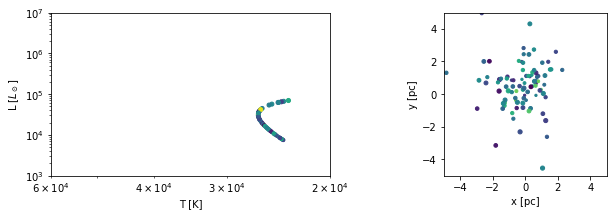

In [5]:
end_time = 10.0 | units.Myr
model_time = 0 | units.Myr
while(model_time<end_time):
    dt = stellar.particles.time_step.min()
    model_time += dt
    stellar.evolve_model(model_time)
    ch_s2g.copy()
    ch_s2l.copy()
    gravity.evolve_model(model_time)
    ch_g2l.copy()
    print("Evolved to t=", stellar.model_time.in_(units.Myr), 
          gravity.model_time.in_(units.Myr),
         "mass=", stars.mass.sum().in_(units.MSun), 
          "rvir=", stars.virial_radius().in_(units.pc))
    
plot_snapshot(stars)
stellar.stop()
gravity.stop()

You have performed a small experiment in which a population of stars was evolved from zero-age to an age of 10 Myr.
The stars were selected randomly from a Salpeter mass function, and distributed in a virialized Plummer sphere with a characteristic (Plummer) radius of 1 pc.

Assignments and questions:
---------------

### Question 1:
You have plotted the Hertzsprung-Russel diagram and the x-y projection of the cluster before and after the simulation. Describe the differences.

### Assignment 1:
Rerun the calculation, but store the time and the virial radius in arrays. Make a plot of the virial radius as a function of time.

### Question 2:
Why is the cluster expanding?

### Question 3:
Why does it take a while before the cluster starts expanding?

### Question 4:
The virial radius does not expand monotonously. Why is that?

### Assignment 2:
Rerun the calculation without stellar evolution and quantify the difference in which the cluster expands with and without taking stellar evolution into account. 
When rerunning, make sure that you are using the same initial random seed for generating the initial mass function as well as for assigning the stellar positions and velocities.

Can you explain explain the difference between the simulation with- and the one without stellar evolution?

### Question 5:
In a previous assignment you have been checking binary formation.
What will happen here if you would continue the run until the first binary forms?

### Assignment 3:
Add diagnostic checking for energy conservation to the code.
Make sure to check the energy conservation for stellar evolution and stellar dynamics separately.

### Question 6:
Make a plot of the total, the potential and the kinetic energy of the N-body system as a function of time.

To what degree is the total energy conserved?
Is the amount of energy conservation sufficient to warrant a scientifically valid result, and if so, why is this the case?

### Assignment 4:
Replace the event-driven approach from the script and replace is with a simple time stepping in which you step-over from one code to the other every million years.

Now check the evolution of the virial radius and the energy conservation of the code again, and discuss the difference with the original event-driven approach.

#### Question 1

A fraction of the stars (the heavy ones) has quit the main sequence phase and entered the sub-giant phase. This transition is characterised by the increase in luminosity and drop in temperature of those stars which is caused by an exhausted H-core. Furthermore, the radius of the stellar cluster has increased, suggesting that the cluster is expanding with time. 

#### Assignment 1

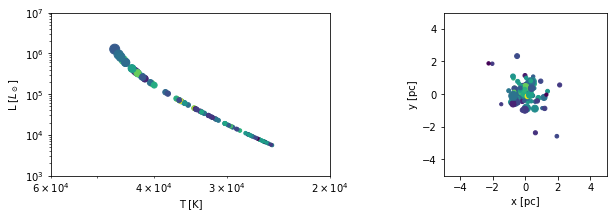

Evolved to t= 0.0181735022676 Myr 0.0184680047234 Myr mass= 2388.04077893 MSun rvir= 0.994475260598 parsec
Evolved to t= 0.0363092279915 Myr 0.036340267359 Myr mass= 2387.25724013 MSun rvir= 0.978902149344 parsec
Evolved to t= 0.0544482273369 Myr 0.0548082720825 Myr mass= 2386.47090422 MSun rvir= 0.96973914602 parsec
Evolved to t= 0.0725902882976 Myr 0.0726060669571 Myr mass= 2385.68176631 MSun rvir= 0.82797319579 parsec
Evolved to t= 0.0907352956102 Myr 0.0908506683976 Myr mass= 2384.88981727 MSun rvir= 0.965141010163 parsec
Evolved to t= 0.108883136713 Myr 0.109020802077 Myr mass= 2384.09504783 MSun rvir= 0.964476002343 parsec
Evolved to t= 0.127033702002 Myr 0.127190935757 Myr mass= 2383.29744858 MSun rvir= 0.965706380014 parsec
Evolved to t= 0.145186884876 Myr 0.145212133914 Myr mass= 2382.49700993 MSun rvir= 0.955341917518 parsec
Evolved to t= 0.163342581771 Myr 0.16382907416 Myr mass= 2381.69372218 MSun rvir= 0.965178973457 parsec
Evolved to t= 0.181500692205 Myr 0.181701336795 M

Evolved to t= 1.47461874556 Myr 1.47475953848 Myr mass= 2315.68055112 MSun rvir= 1.04693337637 parsec
Evolved to t= 1.49291244533 Myr 1.49292967216 Myr mass= 2314.64177062 MSun rvir= 1.05379459948 parsec
Evolved to t= 1.51121064588 Myr 1.51139767688 Myr mass= 2313.5995287 MSun rvir= 1.055809434 parsec
Evolved to t= 1.52951349308 Myr 1.52956781056 Myr mass= 2312.55382917 MSun rvir= 1.05574172128 parsec
Evolved to t= 1.54782113458 Myr 1.54833368633 Myr mass= 2311.50467666 MSun rvir= 1.05848560327 parsec
Evolved to t= 1.56613371975 Myr 1.56620594897 Myr mass= 2310.45207663 MSun rvir= 1.05549016899 parsec
Evolved to t= 1.58445139951 Myr 1.58467395369 Myr mass= 2309.39603543 MSun rvir= 1.05689978179 parsec
Evolved to t= 1.60277432622 Myr 1.60284408737 Myr mass= 2308.33656031 MSun rvir= 1.03638415019 parsec
Evolved to t= 1.62110265354 Myr 1.62131209209 Myr mass= 2307.27365947 MSun rvir= 1.04803791147 parsec
Evolved to t= 1.63943653628 Myr 1.63948222577 Myr mass= 2306.20734209 MSun rvir= 1.04

Evolved to t= 3.03541514711 Myr 3.03560380866 Myr mass= 2220.67733424 MSun rvir= 1.12915972279 parsec
Evolved to t= 3.05407591576 Myr 3.05436968442 Myr mass= 2219.61716193 MSun rvir= 1.12906648884 parsec
Evolved to t= 3.0727142883 Myr 3.07283768915 Myr mass= 2218.56753437 MSun rvir= 1.15156193898 parsec
Evolved to t= 3.09132820609 Myr 3.09190143596 Myr mass= 2217.52896977 MSun rvir= 1.16077755056 parsec
Evolved to t= 3.10991554807 Myr 3.11036944068 Myr mass= 2216.50198456 MSun rvir= 1.16742704698 parsec
Evolved to t= 3.12847413555 Myr 3.1288374454 Myr mass= 2215.47235947 MSun rvir= 1.17790427956 parsec
Evolved to t= 3.14700297257 Myr 3.14790119222 Myr mass= 2214.42739141 MSun rvir= 1.18472058818 parsec
Evolved to t= 3.16520224409 Myr 3.16577345485 Myr mass= 2213.37732683 MSun rvir= 1.18307304209 parsec
Evolved to t= 3.18246646708 Myr 3.18275210436 Myr mass= 2212.35089928 MSun rvir= 1.1715475435 parsec
Evolved to t= 3.19886183846 Myr 3.19913501177 Myr mass= 2211.33757696 MSun rvir= 1.15

Evolved to t= 3.51182256423 Myr 3.51182514013 Myr mass= 2181.42249171 MSun rvir= 1.15828845936 parsec
Evolved to t= 3.5120098897 Myr 3.51204854342 Myr mass= 2181.3995568 MSun rvir= 1.15837048402 parsec
Evolved to t= 3.51218551201 Myr 3.51219747894 Myr mass= 2181.37804105 MSun rvir= 1.15842589886 parsec
Evolved to t= 3.51235016898 Myr 3.51249534998 Myr mass= 2181.35785658 MSun rvir= 1.15852065551 parsec
Evolved to t= 3.51250455118 Myr 3.51251396692 Myr mass= 2181.33892095 MSun rvir= 1.15853416898 parsec
Evolved to t= 3.51264930501 Myr 3.51279322103 Myr mass= 2181.32115683 MSun rvir= 1.15861360578 parsec
Evolved to t= 3.51278503562 Myr 3.51279322103 Myr mass= 2181.3044917 MSun rvir= 1.15862103077 parsec
Evolved to t= 3.51291230961 Myr 3.51294215655 Myr mass= 2181.2888575 MSun rvir= 1.15866238875 parsec
Evolved to t= 3.51303165752 Myr 3.51309109207 Myr mass= 2181.27419043 MSun rvir= 1.1587004804 parsec
Evolved to t= 3.5131435762 Myr 3.51316555983 Myr mass= 2181.26043063 MSun rvir= 1.15872

Evolved to t= 3.51482188174 Myr 3.51482246751 Myr mass= 2181.05341202 MSun rvir= 1.15890396898 parsec
Evolved to t= 3.51482275214 Myr 3.51484108445 Myr mass= 2181.05330431 MSun rvir= 1.15890203687 parsec
Evolved to t= 3.51482356874 Myr 3.51484108445 Myr mass= 2181.05320327 MSun rvir= 1.1589020816 parsec
Evolved to t= 3.51482433486 Myr 3.51484108445 Myr mass= 2181.05310847 MSun rvir= 1.15890212357 parsec
Evolved to t= 3.51482505362 Myr 3.51484108445 Myr mass= 2181.05301953 MSun rvir= 1.15890216295 parsec
Evolved to t= 3.51482572795 Myr 3.51484108445 Myr mass= 2181.05293609 MSun rvir= 1.15890219989 parsec
Evolved to t= 3.51482636059 Myr 3.51484108445 Myr mass= 2181.05285781 MSun rvir= 1.15890223455 parsec
Evolved to t= 3.51482695412 Myr 3.51484108445 Myr mass= 2181.05278437 MSun rvir= 1.15890226706 parsec
Evolved to t= 3.51482751096 Myr 3.51484108445 Myr mass= 2181.05271547 MSun rvir= 1.15890229757 parsec
Evolved to t= 3.51482803338 Myr 3.51484108445 Myr mass= 2181.05265082 MSun rvir= 1.

Evolved to t= 3.51483590383 Myr 3.51484108445 Myr mass= 2181.05167692 MSun rvir= 1.15890275736 parsec
Evolved to t= 3.51483590743 Myr 3.51484108445 Myr mass= 2181.05167648 MSun rvir= 1.15890275756 parsec
Evolved to t= 3.51483591081 Myr 3.51484108445 Myr mass= 2181.05167606 MSun rvir= 1.15890275774 parsec
Evolved to t= 3.51483591398 Myr 3.51484108445 Myr mass= 2181.05167567 MSun rvir= 1.15890275792 parsec
Evolved to t= 3.51483591695 Myr 3.51484108445 Myr mass= 2181.0516753 MSun rvir= 1.15890275808 parsec
Evolved to t= 3.51483591975 Myr 3.51484108445 Myr mass= 2181.05167495 MSun rvir= 1.15890275823 parsec
Evolved to t= 3.51483592236 Myr 3.51484108445 Myr mass= 2181.05167463 MSun rvir= 1.15890275838 parsec
Evolved to t= 3.51483592482 Myr 3.51484108445 Myr mass= 2181.05167433 MSun rvir= 1.15890275851 parsec
Evolved to t= 3.51483592712 Myr 3.51484108445 Myr mass= 2181.05167404 MSun rvir= 1.15890275864 parsec
Evolved to t= 3.51483592928 Myr 3.51484108445 Myr mass= 2181.05167377 MSun rvir= 1.

Evolved to t= 3.5166759005 Myr 3.51668416154 Myr mass= 2147.26332424 MSun rvir= 1.1820666394 parsec
Evolved to t= 3.51671627767 Myr 3.51674001236 Myr mass= 2146.57995734 MSun rvir= 1.18254973816 parsec
Evolved to t= 3.5185417939 Myr 3.51860170638 Myr mass= 2146.33459112 MSun rvir= 1.18082968469 parsec
Evolved to t= 3.52036813353 Myr 3.52038893265 Myr mass= 2146.08868708 MSun rvir= 1.17732268275 parsec
Evolved to t= 3.52220338507 Myr 3.52232509443 Myr mass= 2145.84110115 MSun rvir= 1.17573304779 parsec
Evolved to t= 3.52404759755 Myr 3.5241123207 Myr mass= 2145.59177215 MSun rvir= 1.18068404224 parsec
Evolved to t= 3.52590085655 Myr 3.52604848248 Myr mass= 2145.34063099 MSun rvir= 1.18533153576 parsec
Evolved to t= 3.52776324853 Myr 3.52798464427 Myr mass= 2145.08760535 MSun rvir= 1.18811726076 parsec
Evolved to t= 3.52963486099 Myr 3.52977187053 Myr mass= 2144.83261953 MSun rvir= 1.18975252117 parsec
Evolved to t= 3.5315157825 Myr 3.53155909679 Myr mass= 2144.57559435 MSun rvir= 1.1908

Evolved to t= 3.65024244839 Myr 3.6502607078 Myr mass= 2128.31118275 MSun rvir= 1.21283348111 parsec
Evolved to t= 3.65041868956 Myr 3.65055857884 Myr mass= 2128.28643928 MSun rvir= 1.21274276985 parsec
Evolved to t= 3.65058265352 Myr 3.6506330466 Myr mass= 2128.26340805 MSun rvir= 1.21272576214 parsec
Evolved to t= 3.65073520269 Myr 3.65085644989 Myr mass= 2128.24197026 MSun rvir= 1.21265792379 parsec
Evolved to t= 3.65087713801 Myr 3.65093091765 Myr mass= 2128.22201538 MSun rvir= 1.21263960896 parsec
Evolved to t= 3.65100920345 Myr 3.65115432093 Myr mass= 2128.2034406 MSun rvir= 1.21257008314 parsec
Evolved to t= 3.65113209011 Myr 3.65115432093 Myr mass= 2128.18615025 MSun rvir= 1.21257603316 parsec
Evolved to t= 3.65124644008 Myr 3.65130325645 Myr mass= 2128.17005533 MSun rvir= 1.21253066823 parsec
Evolved to t= 3.65135285002 Myr 3.65137772421 Myr mass= 2128.15507303 MSun rvir= 1.21251028263 parsec
Evolved to t= 3.65145187441 Myr 3.65145219197 Myr mass= 2128.14112631 MSun rvir= 1.21

Evolved to t= 3.65277772361 Myr 3.65279261167 Myr mass= 2127.95398566 MSun rvir= 1.21208352648 parsec
Evolved to t= 3.65277815371 Myr 3.65279261167 Myr mass= 2127.95392482 MSun rvir= 1.21208354719 parsec
Evolved to t= 3.65277855413 Myr 3.65279261167 Myr mass= 2127.95386819 MSun rvir= 1.21208356647 parsec
Evolved to t= 3.65277892693 Myr 3.65279261167 Myr mass= 2127.95381546 MSun rvir= 1.21208358442 parsec
Evolved to t= 3.65277927401 Myr 3.65279261167 Myr mass= 2127.95376637 MSun rvir= 1.21208360113 parsec
Evolved to t= 3.65277959714 Myr 3.65279261167 Myr mass= 2127.95372067 MSun rvir= 1.21208361668 parsec
Evolved to t= 3.65277989798 Myr 3.65279261167 Myr mass= 2127.95367812 MSun rvir= 1.21208363117 parsec
Evolved to t= 3.65278017806 Myr 3.65279261167 Myr mass= 2127.9536385 MSun rvir= 1.21208364465 parsec
Evolved to t= 3.65278043882 Myr 3.65279261167 Myr mass= 2127.95360162 MSun rvir= 1.21208365721 parsec
Evolved to t= 3.65278068158 Myr 3.65279261167 Myr mass= 2127.95356729 MSun rvir= 1.

Evolved to t= 3.65278394527 Myr 3.65279261167 Myr mass= 2127.95310567 MSun rvir= 1.21208382603 parsec
Evolved to t= 3.65278394627 Myr 3.65279261167 Myr mass= 2127.95310553 MSun rvir= 1.21208382608 parsec
Evolved to t= 3.65278394727 Myr 3.65279261167 Myr mass= 2127.95310539 MSun rvir= 1.21208382613 parsec
Evolved to t= 3.65278394827 Myr 3.65279261167 Myr mass= 2127.95310525 MSun rvir= 1.21208382617 parsec
Evolved to t= 3.65278394927 Myr 3.65279261167 Myr mass= 2127.95310511 MSun rvir= 1.21208382622 parsec
Evolved to t= 3.65278395027 Myr 3.65279261167 Myr mass= 2127.95310497 MSun rvir= 1.21208382627 parsec
Evolved to t= 3.65278395127 Myr 3.65279261167 Myr mass= 2127.95310482 MSun rvir= 1.21208382632 parsec
Evolved to t= 3.65278395227 Myr 3.65279261167 Myr mass= 2127.95310468 MSun rvir= 1.21208382637 parsec
Evolved to t= 3.65278395327 Myr 3.65279261167 Myr mass= 2127.95310454 MSun rvir= 1.21208382641 parsec
Evolved to t= 3.65278395427 Myr 3.65279261167 Myr mass= 2127.9531044 MSun rvir= 1.

Evolved to t= 3.65615128566 Myr 3.65621812868 Myr mass= 2095.06916509 MSun rvir= 1.23811849246 parsec
Evolved to t= 3.65825182844 Myr 3.65845216151 Myr mass= 2094.75316725 MSun rvir= 1.2374494689 parsec
Evolved to t= 3.66035316231 Myr 3.66083512986 Myr mass= 2094.4361292 MSun rvir= 1.23671934713 parsec
Evolved to t= 3.66246506554 Myr 3.66262235612 Myr mass= 2094.11646884 MSun rvir= 1.23620256686 parsec
Evolved to t= 3.66458759903 Myr 3.66500532447 Myr mass= 2093.7940695 MSun rvir= 1.23548358198 parsec
Evolved to t= 3.66672087015 Myr 3.66679255074 Myr mass= 2093.46880171 MSun rvir= 1.23497974885 parsec
Evolved to t= 3.66886498739 Myr 3.66977126118 Myr mass= 2093.14053 MSun rvir= 1.23407053537 parsec
Evolved to t= 3.67102006064 Myr 3.67215422953 Myr mass= 2092.80911263 MSun rvir= 1.23335870575 parsec
Evolved to t= 3.67318620115 Myr 3.6733457137 Myr mass= 2092.47560022 MSun rvir= 1.23305159995 parsec
Evolved to t= 3.6753635216 Myr 3.67572868205 Myr mass= 2092.14125707 MSun rvir= 1.2323059

Evolved to t= 3.72906974275 Myr 3.7290848328 Myr mass= 2084.02509536 MSun rvir= 1.21201523978 parsec
Evolved to t= 3.7290895043 Myr 3.72910344974 Myr mass= 2084.02207649 MSun rvir= 1.21204657194 parsec
Evolved to t= 3.72910781828 Myr 3.72912206668 Myr mass= 2084.01927867 MSun rvir= 1.21207769753 parsec
Evolved to t= 3.72912479082 Myr 3.72914068362 Myr mass= 2084.01668571 MSun rvir= 1.21210862308 parsec
Evolved to t= 3.72914052028 Myr 3.72914068362 Myr mass= 2084.0142826 MSun rvir= 1.21210943653 parsec
Evolved to t= 3.72915509778 Myr 3.72915930056 Myr mass= 2084.01205543 MSun rvir= 1.2121401085 parsec
Evolved to t= 3.72916860776 Myr 3.7291779175 Myr mass= 2084.00999132 MSun rvir= 1.21217059664 parsec
Evolved to t= 3.72918112844 Myr 3.72919653444 Myr mass= 2084.00807831 MSun rvir= 1.212200906 parsec
Evolved to t= 3.72919273233 Myr 3.72919653444 Myr mass= 2084.00630534 MSun rvir= 1.21220150591 parsec
Evolved to t= 3.7292034866 Myr 3.72921515138 Myr mass= 2084.00466216 MSun rvir= 1.2122315

Evolved to t= 3.72933916893 Myr 3.72934546996 Myr mass= 2083.98392838 MSun rvir= 1.21244188997 parsec
Evolved to t= 3.72933920493 Myr 3.72934546996 Myr mass= 2083.98392288 MSun rvir= 1.21244189183 parsec
Evolved to t= 3.7293392383 Myr 3.72934546996 Myr mass= 2083.98391778 MSun rvir= 1.21244189355 parsec
Evolved to t= 3.72933926922 Myr 3.72934546996 Myr mass= 2083.98391306 MSun rvir= 1.21244189515 parsec
Evolved to t= 3.72933929788 Myr 3.72934546996 Myr mass= 2083.98390868 MSun rvir= 1.21244189663 parsec
Evolved to t= 3.72933932444 Myr 3.72934546996 Myr mass= 2083.98390462 MSun rvir= 1.212441898 parsec
Evolved to t= 3.72933934906 Myr 3.72934546996 Myr mass= 2083.98390086 MSun rvir= 1.21244189927 parsec
Evolved to t= 3.72933937188 Myr 3.72934546996 Myr mass= 2083.98389737 MSun rvir= 1.21244190045 parsec
Evolved to t= 3.72933939303 Myr 3.72934546996 Myr mass= 2083.98389414 MSun rvir= 1.21244190154 parsec
Evolved to t= 3.72933941263 Myr 3.72934546996 Myr mass= 2083.98389114 MSun rvir= 1.21

Evolved to t= 3.73053486398 Myr 3.73053695414 Myr mass= 2083.62437033 MSun rvir= 1.21411516494 parsec
Evolved to t= 3.73058493064 Myr 3.7306114219 Myr mass= 2083.52146881 MSun rvir= 1.21420255616 parsec
Evolved to t= 3.73063501879 Myr 3.73064865578 Myr mass= 2083.36619744 MSun rvir= 1.21424258906 parsec
Evolved to t= 3.73068512845 Myr 3.73068588966 Myr mass= 2083.13841303 MSun rvir= 1.21427909283 parsec
Evolved to t= 3.73073525963 Myr 3.73076035742 Myr mass= 2082.81459157 MSun rvir= 1.21435427474 parsec
Evolved to t= 3.73078541235 Myr 3.7307975913 Myr mass= 2082.36857275 MSun rvir= 1.21438031075 parsec
Evolved to t= 3.73083558663 Myr 3.73090929294 Myr mass= 2081.77281996 MSun rvir= 1.21448408207 parsec
Evolved to t= 3.73088578248 Myr 3.73090929294 Myr mass= 2081.00015945 MSun rvir= 1.21445320584 parsec
Evolved to t= 3.73093599993 Myr 3.73094652682 Myr mass= 2080.02583714 MSun rvir= 1.2144558004 parsec
Evolved to t= 3.730986239 Myr 3.73105822846 Myr mass= 2078.82961086 MSun rvir= 1.2145

Evolved to t= 3.82860618567 Myr 3.82861099535 Myr mass= 2036.00083357 MSun rvir= 1.21934021008 parsec
Evolved to t= 3.82875575709 Myr 3.82875993087 Myr mass= 2035.97669417 MSun rvir= 1.21932274577 parsec
Evolved to t= 3.8288934255 Myr 3.82890886639 Myr mass= 2035.95447802 MSun rvir= 1.21930429353 parsec
Evolved to t= 3.82902014461 Myr 3.82905780192 Myr mass= 2035.93403065 MSun rvir= 1.21928490567 parsec
Evolved to t= 3.82913679078 Myr 3.82920673744 Myr mass= 2035.91521021 MSun rvir= 1.21926463025 parsec
Evolved to t= 3.82924416941 Myr 3.8292812052 Myr mass= 2035.89788637 MSun rvir= 1.21925700309 parsec
Evolved to t= 3.82934302081 Myr 3.82935567296 Myr mass= 2035.88193936 MSun rvir= 1.21924883095 parsec
Evolved to t= 3.82943402556 Myr 3.82950460848 Myr mass= 2035.86725914 MSun rvir= 1.21922648832 parsec
Evolved to t= 3.82951780942 Myr 3.82954184236 Myr mass= 2035.85374451 MSun rvir= 1.2192241332 parsec
Evolved to t= 3.8295949478 Myr 3.829653544 Myr mass= 2035.84130249 MSun rvir= 1.21920

Evolved to t= 3.83049084777 Myr 3.83054715713 Myr mass= 2035.69684388 MSun rvir= 1.21908316022 parsec
Evolved to t= 3.83049098409 Myr 3.83054715713 Myr mass= 2035.69682191 MSun rvir= 1.21908316755 parsec
Evolved to t= 3.83049110964 Myr 3.83054715713 Myr mass= 2035.69680167 MSun rvir= 1.21908317431 parsec
Evolved to t= 3.83049122528 Myr 3.83054715713 Myr mass= 2035.69678303 MSun rvir= 1.21908318053 parsec
Evolved to t= 3.83049133179 Myr 3.83054715713 Myr mass= 2035.69676586 MSun rvir= 1.21908318626 parsec
Evolved to t= 3.83049142989 Myr 3.83054715713 Myr mass= 2035.69675005 MSun rvir= 1.21908319154 parsec
Evolved to t= 3.83049152024 Myr 3.83054715713 Myr mass= 2035.69673548 MSun rvir= 1.2190831964 parsec
Evolved to t= 3.83049160346 Myr 3.83054715713 Myr mass= 2035.69672207 MSun rvir= 1.21908320088 parsec
Evolved to t= 3.83049168011 Myr 3.83054715713 Myr mass= 2035.69670971 MSun rvir= 1.219083205 parsec
Evolved to t= 3.8304917507 Myr 3.83054715713 Myr mass= 2035.69669833 MSun rvir= 1.219

Evolved to t= 3.83115322895 Myr 3.83121736698 Myr mass= 2035.59078549 MSun rvir= 1.21898168673 parsec
Evolved to t= 3.83120843968 Myr 3.83121736698 Myr mass= 2035.5821177 MSun rvir= 1.21898474184 parsec
Evolved to t= 3.83126367454 Myr 3.83129183474 Myr mass= 2035.5734021 MSun rvir= 1.21897210324 parsec
Evolved to t= 3.83131893355 Myr 3.83136630251 Myr mass= 2035.56387491 MSun rvir= 1.21895908774 parsec
Evolved to t= 3.83137421674 Myr 3.83144077027 Myr mass= 2035.55298614 MSun rvir= 1.21894549434 parsec
Evolved to t= 3.83142952411 Myr 3.83144077027 Myr mass= 2035.53977112 MSun rvir= 1.21894689761 parsec
Evolved to t= 3.83148485571 Myr 3.83151523803 Myr mass= 2035.52247936 MSun rvir= 1.21893088613 parsec
Evolved to t= 3.83154021153 Myr 3.83158970579 Myr mass= 2035.50112205 MSun rvir= 1.21891330842 parsec
Evolved to t= 3.83159559162 Myr 3.83166417355 Myr mass= 2035.48008759 MSun rvir= 1.218895769 parsec
Evolved to t= 3.83165099598 Myr 3.83166417355 Myr mass= 2035.45863024 MSun rvir= 1.218

Evolved to t= 3.9235608749 Myr 3.92370632612 Myr mass= 1990.94052688 MSun rvir= 1.23077931594 parsec
Evolved to t= 3.92373439131 Myr 3.92374356 Myr mass= 1990.91534543 MSun rvir= 1.23078479942 parsec
Evolved to t= 3.9238931092 Myr 3.92400419717 Myr mass= 1990.89230862 MSun rvir= 1.23077732045 parsec
Evolved to t= 3.92403830014 Myr 3.92404143105 Myr mass= 1990.87123261 MSun rvir= 1.23078103641 parsec
Evolved to t= 3.92417112497 Myr 3.92430206821 Myr mass= 1990.85194952 MSun rvir= 1.23076831764 parsec
Evolved to t= 3.92429264366 Myr 3.92430206821 Myr mass= 1990.83430599 MSun rvir= 1.23077335817 parsec
Evolved to t= 3.92440382425 Myr 3.92445100373 Myr mass= 1990.81816192 MSun rvir= 1.23076591364 parsec
Evolved to t= 3.924505551 Myr 3.92452547149 Myr mass= 1990.8033893 MSun rvir= 1.23076365821 parsec
Evolved to t= 3.9245986318 Myr 3.92459993925 Myr mass= 1990.78987112 MSun rvir= 1.23076074624 parsec
Evolved to t= 3.92468380484 Myr 3.92474887478 Myr mass= 1990.77750046 MSun rvir= 1.23074983

Evolved to t= 3.92560205586 Myr 3.92560525403 Myr mass= 1990.64407367 MSun rvir= 1.23068205348 parsec
Evolved to t= 3.92560218993 Myr 3.92560525403 Myr mass= 1990.64405418 MSun rvir= 1.23068205905 parsec
Evolved to t= 3.92560231267 Myr 3.92560525403 Myr mass= 1990.64403634 MSun rvir= 1.23068206414 parsec
Evolved to t= 3.92560242503 Myr 3.92560525403 Myr mass= 1990.64402001 MSun rvir= 1.23068206881 parsec
Evolved to t= 3.92560252789 Myr 3.92560525403 Myr mass= 1990.64400505 MSun rvir= 1.23068207308 parsec
Evolved to t= 3.92560262206 Myr 3.92560525403 Myr mass= 1990.64399137 MSun rvir= 1.23068207699 parsec
Evolved to t= 3.92560270826 Myr 3.92560525403 Myr mass= 1990.64397884 MSun rvir= 1.23068208056 parsec
Evolved to t= 3.92560278717 Myr 3.92560525403 Myr mass= 1990.64396736 MSun rvir= 1.23068208384 parsec
Evolved to t= 3.92560285941 Myr 3.92560525403 Myr mass= 1990.64395686 MSun rvir= 1.23068208684 parsec
Evolved to t= 3.92560292554 Myr 3.92560525403 Myr mass= 1990.64394725 MSun rvir= 1

Evolved to t= 3.92607684989 Myr 3.92608929447 Myr mass= 1990.57515605 MSun rvir= 1.23062511274 parsec
Evolved to t= 3.92608707976 Myr 3.92608929447 Myr mass= 1990.57368109 MSun rvir= 1.23062552918 parsec
Evolved to t= 3.92609644382 Myr 3.92612652835 Myr mass= 1990.57233186 MSun rvir= 1.23061954151 parsec
Evolved to t= 3.92610501537 Myr 3.92612652835 Myr mass= 1990.57109758 MSun rvir= 1.2306198894 parsec
Evolved to t= 3.92611286154 Myr 3.92612652835 Myr mass= 1990.56996837 MSun rvir= 1.23062020746 parsec
Evolved to t= 3.92612004372 Myr 3.92612652835 Myr mass= 1990.56893525 MSun rvir= 1.23062049827 parsec
Evolved to t= 3.92612661813 Myr 3.92616376224 Myr mass= 1990.56798999 MSun rvir= 1.23061432938 parsec
Evolved to t= 3.92613263622 Myr 3.92616376224 Myr mass= 1990.56712509 MSun rvir= 1.23061457254 parsec
Evolved to t= 3.92613814507 Myr 3.92616376224 Myr mass= 1990.56633367 MSun rvir= 1.23061479493 parsec
Evolved to t= 3.9261431878 Myr 3.92616376224 Myr mass= 1990.56560948 MSun rvir= 1.2

Evolved to t= 3.92619766415 Myr 3.92620099612 Myr mass= 1990.55780147 MSun rvir= 1.23061068497 parsec
Evolved to t= 3.92619767143 Myr 3.92620099612 Myr mass= 1990.55780043 MSun rvir= 1.23061068526 parsec
Evolved to t= 3.9261976781 Myr 3.92620099612 Myr mass= 1990.55779948 MSun rvir= 1.23061068552 parsec
Evolved to t= 3.9261976842 Myr 3.92620099612 Myr mass= 1990.55779861 MSun rvir= 1.23061068577 parsec
Evolved to t= 3.92619768978 Myr 3.92620099612 Myr mass= 1990.55779781 MSun rvir= 1.23061068599 parsec
Evolved to t= 3.92619769489 Myr 3.92620099612 Myr mass= 1990.55779708 MSun rvir= 1.23061068619 parsec
Evolved to t= 3.92619769957 Myr 3.92620099612 Myr mass= 1990.55779641 MSun rvir= 1.23061068638 parsec
Evolved to t= 3.92619770385 Myr 3.92620099612 Myr mass= 1990.55779579 MSun rvir= 1.23061068655 parsec
Evolved to t= 3.92619770777 Myr 3.92620099612 Myr mass= 1990.55779523 MSun rvir= 1.23061068671 parsec
Evolved to t= 3.92619771136 Myr 3.92620099612 Myr mass= 1990.55779472 MSun rvir= 1.2

Evolved to t= 3.93451171097 Myr 3.93457861923 Myr mass= 1930.00666881 MSun rvir= 1.26109016953 parsec
Evolved to t= 3.93734395365 Myr 3.93755732967 Myr mass= 1929.5860084 MSun rvir= 1.26257689736 parsec
Evolved to t= 3.94019126093 Myr 3.94023816906 Myr mass= 1929.16531807 MSun rvir= 1.2641503844 parsec
Evolved to t= 3.94305380456 Myr 3.9432168795 Myr mass= 1928.74458044 MSun rvir= 1.26547939684 parsec
Evolved to t= 3.94593175825 Myr 3.94619558994 Myr mass= 1928.32377717 MSun rvir= 1.26630479234 parsec
Evolved to t= 3.94882529805 Myr 3.94917430038 Myr mass= 1927.90288874 MSun rvir= 1.26675692455 parsec
Evolved to t= 3.95173460245 Myr 3.95215301082 Myr mass= 1927.48189445 MSun rvir= 1.26698912104 parsec
Evolved to t= 3.95465985235 Myr 3.95513172126 Myr mass= 1927.06077225 MSun rvir= 1.26707553562 parsec
Evolved to t= 3.95760123118 Myr 3.9581104317 Myr mass= 1926.63949868 MSun rvir= 1.26694629086 parsec
Evolved to t= 3.96055892488 Myr 3.96108914214 Myr mass= 1926.21804875 MSun rvir= 1.266

Evolved to t= 4.01154100846 Myr 4.01157828408 Myr mass= 1919.26841539 MSun rvir= 1.25710088264 parsec
Evolved to t= 4.01154380912 Myr 4.01157828408 Myr mass= 1919.26804857 MSun rvir= 1.2571009821 parsec
Evolved to t= 4.01154634812 Myr 4.01157828408 Myr mass= 1919.26771602 MSun rvir= 1.25710107226 parsec
Evolved to t= 4.01154864992 Myr 4.01157828408 Myr mass= 1919.26741455 MSun rvir= 1.257101154 parsec
Evolved to t= 4.01155073667 Myr 4.01157828408 Myr mass= 1919.26714124 MSun rvir= 1.2571012281 parsec
Evolved to t= 4.01155262845 Myr 4.01157828408 Myr mass= 1919.26689346 MSun rvir= 1.25710129527 parsec
Evolved to t= 4.01155434349 Myr 4.01157828408 Myr mass= 1919.26666883 MSun rvir= 1.25710135618 parsec
Evolved to t= 4.0115558983 Myr 4.01157828408 Myr mass= 1919.2664652 MSun rvir= 1.25710141139 parsec
Evolved to t= 4.01155730784 Myr 4.01157828408 Myr mass= 1919.26628058 MSun rvir= 1.25710146144 parsec
Evolved to t= 4.01155858569 Myr 4.01157828408 Myr mass= 1919.26611322 MSun rvir= 1.25710

Evolved to t= 4.01157097897 Myr 4.01157828408 Myr mass= 1919.26449005 MSun rvir= 1.2571019469 parsec
Evolved to t= 4.01157097997 Myr 4.01157828408 Myr mass= 1919.26448991 MSun rvir= 1.25710194693 parsec
Evolved to t= 4.01157098097 Myr 4.01157828408 Myr mass= 1919.26448978 MSun rvir= 1.25710194697 parsec
Evolved to t= 4.01157098197 Myr 4.01157828408 Myr mass= 1919.26448965 MSun rvir= 1.257101947 parsec
Evolved to t= 4.01157098297 Myr 4.01157828408 Myr mass= 1919.26448952 MSun rvir= 1.25710194704 parsec
Evolved to t= 4.01157098397 Myr 4.01157828408 Myr mass= 1919.26448939 MSun rvir= 1.25710194707 parsec
Evolved to t= 4.01157098497 Myr 4.01157828408 Myr mass= 1919.26448926 MSun rvir= 1.25710194711 parsec
Evolved to t= 4.01157098597 Myr 4.01157828408 Myr mass= 1919.26448914 MSun rvir= 1.25710194714 parsec
Evolved to t= 4.01407669232 Myr 4.01411018795 Myr mass= 1918.93363912 MSun rvir= 1.25470138687 parsec
Evolved to t= 4.01658239866 Myr 4.01708889839 Myr mass= 1918.60207545 MSun rvir= 1.25

Evolved to t= 4.16667539926 Myr 4.16669463021 Myr mass= 1900.20703384 MSun rvir= 1.30512273483 parsec
Evolved to t= 4.16675261073 Myr 4.16676909797 Myr mass= 1900.19797622 MSun rvir= 1.30513152691 parsec
Evolved to t= 4.16682225815 Myr 4.16684356573 Myr mass= 1900.18980601 MSun rvir= 1.30514005466 parsec
Evolved to t= 4.16688508145 Myr 4.16691803349 Myr mass= 1900.18243638 MSun rvir= 1.30514833488 parsec
Evolved to t= 4.16694174836 Myr 4.16699250125 Myr mass= 1900.175789 MSun rvir= 1.30515638283 parsec
Evolved to t= 4.16699286147 Myr 4.16706696901 Myr mass= 1900.16979315 MSun rvir= 1.30516421241 parsec
Evolved to t= 4.1670389645 Myr 4.16706696901 Myr mass= 1900.16438505 MSun rvir= 1.30516516413 parsec
Evolved to t= 4.16708054805 Myr 4.16714143677 Myr mass= 1900.15950713 MSun rvir= 1.30517269438 parsec
Evolved to t= 4.16711805478 Myr 4.16714143677 Myr mass= 1900.15510745 MSun rvir= 1.30517346827 parsec
Evolved to t= 4.16715188405 Myr 4.16721590453 Myr mass= 1900.15113917 MSun rvir= 1.30

Evolved to t= 4.16746275603 Myr 4.16751377558 Myr mass= 1900.11467356 MSun rvir= 1.30521244658 parsec
Evolved to t= 4.16746277403 Myr 4.16751377558 Myr mass= 1900.11467144 MSun rvir= 1.30521244695 parsec
Evolved to t= 4.16746279027 Myr 4.16751377558 Myr mass= 1900.11466954 MSun rvir= 1.30521244729 parsec
Evolved to t= 4.16746280491 Myr 4.16751377558 Myr mass= 1900.11466782 MSun rvir= 1.30521244759 parsec
Evolved to t= 4.16746281812 Myr 4.16751377558 Myr mass= 1900.11466627 MSun rvir= 1.30521244786 parsec
Evolved to t= 4.16746283002 Myr 4.16751377558 Myr mass= 1900.11466488 MSun rvir= 1.3052124481 parsec
Evolved to t= 4.16746284077 Myr 4.16751377558 Myr mass= 1900.11466362 MSun rvir= 1.30521244833 parsec
Evolved to t= 4.16746285045 Myr 4.16751377558 Myr mass= 1900.11466248 MSun rvir= 1.30521244852 parsec
Evolved to t= 4.16746285919 Myr 4.16751377558 Myr mass= 1900.11466146 MSun rvir= 1.3052124487 parsec
Evolved to t= 4.16746286707 Myr 4.16751377558 Myr mass= 1900.11466053 MSun rvir= 1.3

Evolved to t= 4.18781740208 Myr 4.18784347432 Myr mass= 1897.65244226 MSun rvir= 1.30429598034 parsec
Evolved to t= 4.18783420616 Myr 4.18784347432 Myr mass= 1897.65034149 MSun rvir= 1.30429627466 parsec
Evolved to t= 4.18784932126 Myr 4.18791794209 Myr mass= 1897.64845173 MSun rvir= 1.30427897449 parsec
Evolved to t= 4.18786291726 Myr 4.18791794209 Myr mass= 1897.64675181 MSun rvir= 1.30427921249 parsec
Evolved to t= 4.18787514693 Myr 4.18791794209 Myr mass= 1897.64522263 MSun rvir= 1.30427942656 parsec
Evolved to t= 4.18788614765 Myr 4.18791794209 Myr mass= 1897.64384705 MSun rvir= 1.3042796191 parsec
Evolved to t= 4.18789604298 Myr 4.18791794209 Myr mass= 1897.64260965 MSun rvir= 1.30427979228 parsec
Evolved to t= 4.18790494405 Myr 4.18791794209 Myr mass= 1897.64149653 MSun rvir= 1.30427994806 parsec
Evolved to t= 4.1879129508 Myr 4.18791794209 Myr mass= 1897.64049521 MSun rvir= 1.30428008818 parsec
Evolved to t= 4.18792015312 Myr 4.18799240985 Myr mass= 1897.63959447 MSun rvir= 1.3

Evolved to t= 4.18798461968 Myr 4.18799240985 Myr mass= 1897.63153091 MSun rvir= 1.30426369392 parsec
Evolved to t= 4.18798462285 Myr 4.18799240985 Myr mass= 1897.63153052 MSun rvir= 1.30426369397 parsec
Evolved to t= 4.18798462571 Myr 4.18799240985 Myr mass= 1897.63153016 MSun rvir= 1.30426369402 parsec
Evolved to t= 4.18798462828 Myr 4.18799240985 Myr mass= 1897.63152984 MSun rvir= 1.30426369407 parsec
Evolved to t= 4.18798463059 Myr 4.18799240985 Myr mass= 1897.63152955 MSun rvir= 1.30426369411 parsec
Evolved to t= 4.18798463267 Myr 4.18799240985 Myr mass= 1897.63152929 MSun rvir= 1.30426369414 parsec
Evolved to t= 4.18798463454 Myr 4.18799240985 Myr mass= 1897.63152905 MSun rvir= 1.30426369418 parsec
Evolved to t= 4.18798463622 Myr 4.18799240985 Myr mass= 1897.63152884 MSun rvir= 1.30426369421 parsec
Evolved to t= 4.18798463774 Myr 4.18799240985 Myr mass= 1897.63152865 MSun rvir= 1.30426369423 parsec
Evolved to t= 4.1879846391 Myr 4.18799240985 Myr mass= 1897.63152848 MSun rvir= 1.

Evolved to t= 4.20652131326 Myr 4.20653488233 Myr mass= 1868.06573628 MSun rvir= 1.31058427136 parsec
Evolved to t= 4.20691924007 Myr 4.20713062442 Myr mass= 1868.02093451 MSun rvir= 1.31118558574 parsec
Evolved to t= 4.20727596859 Myr 4.20727955994 Myr mass= 1867.98074993 MSun rvir= 1.31134357732 parsec
Evolved to t= 4.20759582277 Myr 4.20772636651 Myr mass= 1867.94470178 MSun rvir= 1.31180703735 parsec
Evolved to t= 4.20788266203 Myr 4.20802423755 Myr mass= 1867.9123603 MSun rvir= 1.31212113194 parsec
Evolved to t= 4.20813993305 Myr 4.20817317307 Myr mass= 1867.88334111 MSun rvir= 1.31228145925 parsec
Evolved to t= 4.20837071552 Myr 4.20847104412 Myr mass= 1867.85730031 MSun rvir= 1.31259794815 parsec
Evolved to t= 4.20857776243 Myr 4.20861997964 Myr mass= 1867.83393012 MSun rvir= 1.31275881543 parsec
Evolved to t= 4.20876353587 Myr 4.20876891516 Myr mass= 1867.81295492 MSun rvir= 1.31291968301 parsec
Evolved to t= 4.20893023859 Myr 4.2090667862 Myr mass= 1867.7941279 MSun rvir= 1.31

Evolved to t= 4.21039394564 Myr 4.2104072059 Myr mass= 1867.62860322 MSun rvir= 1.31469810342 parsec
Evolved to t= 4.21039398371 Myr 4.2104072059 Myr mass= 1867.62859891 MSun rvir= 1.3146981042 parsec
Evolved to t= 4.2103940179 Myr 4.2104072059 Myr mass= 1867.62859504 MSun rvir= 1.3146981049 parsec
Evolved to t= 4.2103940486 Myr 4.2104072059 Myr mass= 1867.62859156 MSun rvir= 1.31469810553 parsec
Evolved to t= 4.21039407618 Myr 4.2104072059 Myr mass= 1867.62858844 MSun rvir= 1.3146981061 parsec
Evolved to t= 4.21039410095 Myr 4.2104072059 Myr mass= 1867.62858563 MSun rvir= 1.3146981066 parsec
Evolved to t= 4.2103941232 Myr 4.2104072059 Myr mass= 1867.62858311 MSun rvir= 1.31469810706 parsec
Evolved to t= 4.21039414319 Myr 4.2104072059 Myr mass= 1867.62858085 MSun rvir= 1.31469810747 parsec
Evolved to t= 4.21039416114 Myr 4.2104072059 Myr mass= 1867.62857882 MSun rvir= 1.31469810784 parsec
Evolved to t= 4.21039417726 Myr 4.2104072059 Myr mass= 1867.62857699 MSun rvir= 1.31469810817 pars

Evolved to t= 4.21330617626 Myr 4.21331144858 Myr mass= 1864.01779521 MSun rvir= 1.32052823364 parsec
Evolved to t= 4.21338555205 Myr 4.21338591634 Myr mass= 1862.94169482 MSun rvir= 1.32149444979 parsec
Evolved to t= 4.2134649639 Myr 4.21353485186 Myr mass= 1861.58731109 MSun rvir= 1.32277365312 parsec
Evolved to t= 4.21354441183 Myr 4.21360931962 Myr mass= 1859.90079966 MSun rvir= 1.32426335972 parsec
Evolved to t= 4.21362389588 Myr 4.21368378739 Myr mass= 1857.82050356 MSun rvir= 1.32609833966 parsec
Evolved to t= 4.21370341608 Myr 4.21375825515 Myr mass= 1855.27657206 MSun rvir= 1.3283478514 parsec
Evolved to t= 4.21378297246 Myr 4.21383272291 Myr mass= 1852.19097622 MSun rvir= 1.33109335147 parsec
Evolved to t= 4.21386256506 Myr 4.21390719067 Myr mass= 1848.4766272 MSun rvir= 1.33443143735 parsec
Evolved to t= 4.21394219391 Myr 4.21398165843 Myr mass= 1844.08147351 MSun rvir= 1.33843693008 parsec
Evolved to t= 4.21402185904 Myr 4.21405612619 Myr mass= 1840.0090682 MSun rvir= 1.342

Evolved to t= 4.25399786591 Myr 4.25404531384 Myr mass= 1835.31753875 MSun rvir= 1.35465065127 parsec
Evolved to t= 4.25399893873 Myr 4.25404531384 Myr mass= 1835.31741163 MSun rvir= 1.35465066974 parsec
Evolved to t= 4.25399990344 Myr 4.25404531384 Myr mass= 1835.31729732 MSun rvir= 1.35465068634 parsec
Evolved to t= 4.25400077094 Myr 4.25404531384 Myr mass= 1835.31719453 MSun rvir= 1.35465070128 parsec
Evolved to t= 4.25400155103 Myr 4.25404531384 Myr mass= 1835.3171021 MSun rvir= 1.3546507147 parsec
Evolved to t= 4.2540022525 Myr 4.25404531384 Myr mass= 1835.31701898 MSun rvir= 1.35465072678 parsec
Evolved to t= 4.25400288328 Myr 4.25404531384 Myr mass= 1835.31694424 MSun rvir= 1.35465073764 parsec
Evolved to t= 4.2540034505 Myr 4.25404531384 Myr mass= 1835.31687703 MSun rvir= 1.3546507474 parsec
Evolved to t= 4.25400396056 Myr 4.25404531384 Myr mass= 1835.31681659 MSun rvir= 1.35465075618 parsec
Evolved to t= 4.25400441923 Myr 4.25404531384 Myr mass= 1835.31676225 MSun rvir= 1.3546

Evolved to t= 4.27317473521 Myr 4.27318352841 Myr mass= 1832.97152645 MSun rvir= 1.33270296075 parsec
Evolved to t= 4.27591276689 Myr 4.27593883557 Myr mass= 1832.62484781 MSun rvir= 1.34838437848 parsec
Evolved to t= 4.27865079856 Myr 4.27891754601 Myr mass= 1832.2742791 MSun rvir= 1.3529603795 parsec
Evolved to t= 4.28138882885 Myr 4.2815983854 Myr mass= 1831.91937009 MSun rvir= 1.35516158142 parsec
Evolved to t= 4.28138882985 Myr 4.2815983854 Myr mass= 1831.91025249 MSun rvir= 1.35516361051 parsec
Evolved to t= 4.28544161735 Myr 4.28576858002 Myr mass= 1831.44926647 MSun rvir= 1.35749243637 parsec
Evolved to t= 4.28949504395 Myr 4.28993877463 Myr mass= 1830.98374137 MSun rvir= 1.35964379641 parsec
Evolved to t= 4.29314841979 Myr 4.29351322716 Myr mass= 1830.56038166 MSun rvir= 1.36188383482 parsec
Evolved to t= 4.29637882084 Myr 4.2964919376 Myr mass= 1830.1827575 MSun rvir= 1.36418710458 parsec
Evolved to t= 4.29923465668 Myr 4.30006639012 Myr mass= 1829.84603631 MSun rvir= 1.36738

Evolved to t= 4.32154717955 Myr 4.32158757305 Myr mass= 1827.14319683 MSun rvir= 1.38504036362 parsec
Evolved to t= 4.32154769632 Myr 4.32158757305 Myr mass= 1827.14313268 MSun rvir= 1.38504037579 parsec
Evolved to t= 4.32154815691 Myr 4.32158757305 Myr mass= 1827.14307551 MSun rvir= 1.38504038663 parsec
Evolved to t= 4.32154856742 Myr 4.32158757305 Myr mass= 1827.14302455 MSun rvir= 1.3850403963 parsec
Evolved to t= 4.3215489333 Myr 4.32158757305 Myr mass= 1827.14297913 MSun rvir= 1.38504040492 parsec
Evolved to t= 4.3215492594 Myr 4.32158757305 Myr mass= 1827.14293865 MSun rvir= 1.3850404126 parsec
Evolved to t= 4.32154955005 Myr 4.32158757305 Myr mass= 1827.14290257 MSun rvir= 1.38504041944 parsec
Evolved to t= 4.3215498091 Myr 4.32158757305 Myr mass= 1827.14287041 MSun rvir= 1.38504042554 parsec
Evolved to t= 4.32155003999 Myr 4.32158757305 Myr mass= 1827.14284175 MSun rvir= 1.38504043098 parsec
Evolved to t= 4.32155024577 Myr 4.32158757305 Myr mass= 1827.1428162 MSun rvir= 1.38504

Evolved to t= 4.32327214599 Myr 4.32330033155 Myr mass= 1826.88870604 MSun rvir= 1.38579940105 parsec
Evolved to t= 4.3233585586 Myr 4.32337479931 Myr mass= 1826.86888632 MSun rvir= 1.3858209284 parsec
Evolved to t= 4.32344500974 Myr 4.32344926707 Myr mass= 1826.84941028 MSun rvir= 1.38584278022 parsec
Evolved to t= 4.32353149944 Myr 4.32359820259 Myr mass= 1826.83026652 MSun rvir= 1.38589612023 parsec
Evolved to t= 4.32361802775 Myr 4.32367267036 Myr mass= 1826.81144398 MSun rvir= 1.38591843975 parsec
Evolved to t= 4.3237045947 Myr 4.32374713812 Myr mass= 1826.79293194 MSun rvir= 1.38594104743 parsec
Evolved to t= 4.32379120032 Myr 4.32382160588 Myr mass= 1826.77472001 MSun rvir= 1.38596393149 parsec
Evolved to t= 4.32387784464 Myr 4.32389607364 Myr mass= 1826.75679814 MSun rvir= 1.38598708066 parsec
Evolved to t= 4.3239645277 Myr 4.3239705414 Myr mass= 1826.73915657 MSun rvir= 1.38601048411 parsec
Evolved to t= 4.32405124954 Myr 4.32419394468 Myr mass= 1826.72178586 MSun rvir= 1.3860

Evolved to t= 4.32699441432 Myr 4.3270237196 Myr mass= 1826.20782194 MSun rvir= 1.38704880275 parsec
Evolved to t= 4.3269944345 Myr 4.3270237196 Myr mass= 1826.20781764 MSun rvir= 1.38704880087 parsec
Evolved to t= 4.32699445141 Myr 4.3270237196 Myr mass= 1826.20781404 MSun rvir= 1.3870487993 parsec
Evolved to t= 4.32699446558 Myr 4.3270237196 Myr mass= 1826.20781102 MSun rvir= 1.38704879798 parsec
Evolved to t= 4.32699447746 Myr 4.3270237196 Myr mass= 1826.20780849 MSun rvir= 1.38704879687 parsec
Evolved to t= 4.32699448742 Myr 4.3270237196 Myr mass= 1826.20780637 MSun rvir= 1.38704879595 parsec
Evolved to t= 4.32699449577 Myr 4.3270237196 Myr mass= 1826.20780459 MSun rvir= 1.38704879517 parsec
Evolved to t= 4.32699450276 Myr 4.3270237196 Myr mass= 1826.2078031 MSun rvir= 1.38704879452 parsec
Evolved to t= 4.32699450862 Myr 4.3270237196 Myr mass= 1826.20780185 MSun rvir= 1.38704879397 parsec
Evolved to t= 4.32699451354 Myr 4.3270237196 Myr mass= 1826.2078008 MSun rvir= 1.38704879352 p

Evolved to t= 4.36859169562 Myr 4.36859534717 Myr mass= 1819.20300682 MSun rvir= 1.39715351015 parsec
Evolved to t= 4.36859790822 Myr 4.36861396411 Myr mass= 1819.20193664 MSun rvir= 1.39719110497 parsec
Evolved to t= 4.36860347408 Myr 4.36861396411 Myr mass= 1819.20097786 MSun rvir= 1.39719101689 parsec
Evolved to t= 4.36860846051 Myr 4.36861396411 Myr mass= 1819.20011888 MSun rvir= 1.39719093798 parsec
Evolved to t= 4.36861292782 Myr 4.36861396411 Myr mass= 1819.19934933 MSun rvir= 1.39719086728 parsec
Evolved to t= 4.36861693005 Myr 4.36863258105 Myr mass= 1819.19865989 MSun rvir= 1.39722836253 parsec
Evolved to t= 4.36862051562 Myr 4.36863258105 Myr mass= 1819.19804222 MSun rvir= 1.39722830568 parsec
Evolved to t= 4.3686237279 Myr 4.36863258105 Myr mass= 1819.19748885 MSun rvir= 1.39722825475 parsec
Evolved to t= 4.36862660576 Myr 4.36863258105 Myr mass= 1819.19699309 MSun rvir= 1.39722820913 parsec
Evolved to t= 4.368629184 Myr 4.36863258105 Myr mass= 1819.19654894 MSun rvir= 1.39

Evolved to t= 4.36865136166 Myr 4.36866981493 Myr mass= 1819.19272838 MSun rvir= 1.39730253326 parsec
Evolved to t= 4.36865136266 Myr 4.36866981493 Myr mass= 1819.19272821 MSun rvir= 1.39730253324 parsec
Evolved to t= 4.36865136366 Myr 4.36866981493 Myr mass= 1819.19272804 MSun rvir= 1.39730253322 parsec
Evolved to t= 4.36865136466 Myr 4.36866981493 Myr mass= 1819.19272787 MSun rvir= 1.39730253321 parsec
Evolved to t= 4.36865136566 Myr 4.36866981493 Myr mass= 1819.1927277 MSun rvir= 1.39730253319 parsec
Evolved to t= 4.36865136666 Myr 4.36866981493 Myr mass= 1819.19272752 MSun rvir= 1.39730253318 parsec
Evolved to t= 4.36865136766 Myr 4.36866981493 Myr mass= 1819.19272735 MSun rvir= 1.39730253316 parsec
Evolved to t= 4.36865136866 Myr 4.36866981493 Myr mass= 1819.19272718 MSun rvir= 1.39730253314 parsec
Evolved to t= 4.36865136966 Myr 4.36866981493 Myr mass= 1819.19272701 MSun rvir= 1.39730253313 parsec
Evolved to t= 4.36865137066 Myr 4.36866981493 Myr mass= 1819.19272684 MSun rvir= 1.

Evolved to t= 4.37711001227 Myr 4.37714052274 Myr mass= 1817.71576638 MSun rvir= 1.40699694045 parsec
Evolved to t= 4.37711018815 Myr 4.37714052274 Myr mass= 1817.7157353 MSun rvir= 1.40699693647 parsec
Evolved to t= 4.37711034428 Myr 4.37714052274 Myr mass= 1817.71570771 MSun rvir= 1.40699693293 parsec
Evolved to t= 4.3771104829 Myr 4.37714052274 Myr mass= 1817.71568321 MSun rvir= 1.40699692979 parsec
Evolved to t= 4.37711060595 Myr 4.37714052274 Myr mass= 1817.71566146 MSun rvir= 1.406996927 parsec
Evolved to t= 4.37711071519 Myr 4.37714052274 Myr mass= 1817.71564216 MSun rvir= 1.40699692453 parsec
Evolved to t= 4.37711081218 Myr 4.37714052274 Myr mass= 1817.71562502 MSun rvir= 1.40699692233 parsec
Evolved to t= 4.37711089827 Myr 4.37714052274 Myr mass= 1817.7156098 MSun rvir= 1.40699692038 parsec
Evolved to t= 4.37711097471 Myr 4.37714052274 Myr mass= 1817.71559629 MSun rvir= 1.40699691865 parsec
Evolved to t= 4.37711104256 Myr 4.37714052274 Myr mass= 1817.7155843 MSun rvir= 1.40699

Evolved to t= 4.38009015371 Myr 4.38011923318 Myr mass= 1817.05590255 MSun rvir= 1.40897548077 parsec
Evolved to t= 4.38018109379 Myr 4.38019370094 Myr mass= 1817.03464175 MSun rvir= 1.40902046479 parsec
Evolved to t= 4.3802720743 Myr 4.38034263646 Myr mass= 1817.01359382 MSun rvir= 1.40910945009 parsec
Evolved to t= 4.38036309528 Myr 4.38041710422 Myr mass= 1816.99275109 MSun rvir= 1.40915357156 parsec
Evolved to t= 4.38045415676 Myr 4.38049157198 Myr mass= 1816.97210611 MSun rvir= 1.40919737722 parsec
Evolved to t= 4.38054525878 Myr 4.38056603975 Myr mass= 1816.95253657 MSun rvir= 1.40924045064 parsec
Evolved to t= 4.38063640137 Myr 4.38064050751 Myr mass= 1816.93483338 MSun rvir= 1.40928241627 parsec
Evolved to t= 4.38072758458 Myr 4.38078944303 Myr mass= 1816.9169683 MSun rvir= 1.4093672988 parsec
Evolved to t= 4.38081880843 Myr 4.38086391079 Myr mass= 1816.89893312 MSun rvir= 1.40940877737 parsec
Evolved to t= 4.38091007296 Myr 4.38093837855 Myr mass= 1816.88071916 MSun rvir= 1.40

Evolved to t= 4.38265775781 Myr 4.38272560481 Myr mass= 1816.48387657 MSun rvir= 1.41041116132 parsec
Evolved to t= 4.38265775901 Myr 4.38272560481 Myr mass= 1816.48387625 MSun rvir= 1.41041116134 parsec
Evolved to t= 4.38265776001 Myr 4.38272560481 Myr mass= 1816.48387599 MSun rvir= 1.41041116135 parsec
Evolved to t= 4.38265776101 Myr 4.38272560481 Myr mass= 1816.48387573 MSun rvir= 1.41041116137 parsec
Evolved to t= 4.38265776201 Myr 4.38272560481 Myr mass= 1816.48387547 MSun rvir= 1.41041116138 parsec
Evolved to t= 4.38265776301 Myr 4.38272560481 Myr mass= 1816.4838752 MSun rvir= 1.4104111614 parsec
Evolved to t= 4.38265776401 Myr 4.38272560481 Myr mass= 1816.48387494 MSun rvir= 1.41041116141 parsec
Evolved to t= 4.38265776501 Myr 4.38272560481 Myr mass= 1816.48387468 MSun rvir= 1.41041116143 parsec
Evolved to t= 4.38265776601 Myr 4.38272560481 Myr mass= 1816.48387452 MSun rvir= 1.4104111614 parsec
Evolved to t= 4.3854426018 Myr 4.38585325077 Myr mass= 1815.88460259 MSun rvir= 1.411

Evolved to t= 4.40602839917 Myr 4.406034014 Myr mass= 1811.48696617 MSun rvir= 1.41262187718 parsec
Evolved to t= 4.40602879177 Myr 4.406034014 Myr mass= 1811.48688451 MSun rvir= 1.41262187148 parsec
Evolved to t= 4.40602913959 Myr 4.406034014 Myr mass= 1811.48681216 MSun rvir= 1.41262186644 parsec
Evolved to t= 4.40602944774 Myr 4.406034014 Myr mass= 1811.48674806 MSun rvir= 1.41262186196 parsec
Evolved to t= 4.40602972074 Myr 4.406034014 Myr mass= 1811.48669127 MSun rvir= 1.412621858 parsec
Evolved to t= 4.4060299626 Myr 4.406034014 Myr mass= 1811.48664096 MSun rvir= 1.41262185449 parsec
Evolved to t= 4.40603017688 Myr 4.406034014 Myr mass= 1811.48659638 MSun rvir= 1.41262185138 parsec
Evolved to t= 4.40603036671 Myr 4.406034014 Myr mass= 1811.48655689 MSun rvir= 1.41262184862 parsec
Evolved to t= 4.4060305349 Myr 4.406034014 Myr mass= 1811.48652191 MSun rvir= 1.41262184618 parsec
Evolved to t= 4.4060306839 Myr 4.406034014 Myr mass= 1811.48649091 MSun rvir= 1.41262184402 parsec
Evolv

Evolved to t= 4.40833677133 Myr 4.40834251459 Myr mass= 1810.92463873 MSun rvir= 1.41158768953 parsec
Evolved to t= 4.40842949542 Myr 4.40849145011 Myr mass= 1810.89826682 MSun rvir= 1.41151371442 parsec
Evolved to t= 4.40852226037 Myr 4.40852868399 Myr mass= 1810.87217912 MSun rvir= 1.41149468317 parsec
Evolved to t= 4.40861506621 Myr 4.40864038564 Myr mass= 1810.8463655 MSun rvir= 1.41143824767 parsec
Evolved to t= 4.40870791298 Myr 4.4087148534 Myr mass= 1810.82081618 MSun rvir= 1.41140012929 parsec
Evolved to t= 4.40880080071 Myr 4.40886378892 Myr mass= 1810.79552169 MSun rvir= 1.4113238049 parsec
Evolved to t= 4.40889372944 Myr 4.4089010228 Myr mass= 1810.77047287 MSun rvir= 1.41130408952 parsec
Evolved to t= 4.4089866992 Myr 4.40901272444 Myr mass= 1810.74566088 MSun rvir= 1.41124592197 parsec
Evolved to t= 4.40907971003 Myr 4.4090871922 Myr mass= 1810.72107715 MSun rvir= 1.41120662963 parsec
Evolved to t= 4.40917276197 Myr 4.40923612772 Myr mass= 1810.69671341 MSun rvir= 1.41112

Evolved to t= 4.41163159255 Myr 4.41165632995 Myr mass= 1810.07934618 MSun rvir= 1.40976875838 parsec
Evolved to t= 4.41163159486 Myr 4.41165632995 Myr mass= 1810.07934551 MSun rvir= 1.40976875836 parsec
Evolved to t= 4.41163159677 Myr 4.41165632995 Myr mass= 1810.07934495 MSun rvir= 1.40976875835 parsec
Evolved to t= 4.41163159837 Myr 4.41165632995 Myr mass= 1810.07934449 MSun rvir= 1.40976875835 parsec
Evolved to t= 4.4116315997 Myr 4.41165632995 Myr mass= 1810.07934411 MSun rvir= 1.40976875834 parsec
Evolved to t= 4.4116316008 Myr 4.41165632995 Myr mass= 1810.07934379 MSun rvir= 1.40976875833 parsec
Evolved to t= 4.4116316018 Myr 4.41165632995 Myr mass= 1810.0793435 MSun rvir= 1.40976875833 parsec
Evolved to t= 4.4116316028 Myr 4.41165632995 Myr mass= 1810.07934321 MSun rvir= 1.40976875832 parsec
Evolved to t= 4.4116316038 Myr 4.41165632995 Myr mass= 1810.07934292 MSun rvir= 1.40976875832 parsec
Evolved to t= 4.4116316048 Myr 4.41165632995 Myr mass= 1810.07934263 MSun rvir= 1.409768

Evolved to t= 4.41819123533 Myr 4.41820949292 Myr mass= 1808.4803889 MSun rvir= 1.4078847327 parsec
Evolved to t= 4.41819131405 Myr 4.41820949292 Myr mass= 1808.48036961 MSun rvir= 1.4078847318 parsec
Evolved to t= 4.41819138374 Myr 4.41820949292 Myr mass= 1808.48035254 MSun rvir= 1.407884731 parsec
Evolved to t= 4.41819144542 Myr 4.41820949292 Myr mass= 1808.48033743 MSun rvir= 1.4078847303 parsec
Evolved to t= 4.41819150002 Myr 4.41820949292 Myr mass= 1808.48032405 MSun rvir= 1.40788472967 parsec
Evolved to t= 4.41819154835 Myr 4.41820949292 Myr mass= 1808.48031221 MSun rvir= 1.40788472912 parsec
Evolved to t= 4.41819159113 Myr 4.41820949292 Myr mass= 1808.48030173 MSun rvir= 1.40788472863 parsec
Evolved to t= 4.41819162899 Myr 4.41820949292 Myr mass= 1808.48029245 MSun rvir= 1.40788472819 parsec
Evolved to t= 4.41819166251 Myr 4.41820949292 Myr mass= 1808.48028424 MSun rvir= 1.40788472781 parsec
Evolved to t= 4.41819169218 Myr 4.41820949292 Myr mass= 1808.48027697 MSun rvir= 1.40788

Evolved to t= 4.42173971528 Myr 4.42174671157 Myr mass= 1807.46050114 MSun rvir= 1.41039088258 parsec
Evolved to t= 4.42183388049 Myr 4.42189564709 Myr mass= 1807.43585244 MSun rvir= 1.41054733908 parsec
Evolved to t= 4.42192808731 Myr 4.42193288097 Myr mass= 1807.41103485 MSun rvir= 1.41058720471 parsec
Evolved to t= 4.42202233579 Myr 4.42204458261 Myr mass= 1807.38603957 MSun rvir= 1.41070771447 parsec
Evolved to t= 4.42211662598 Myr 4.42211905037 Myr mass= 1807.36085731 MSun rvir= 1.4107893507 parsec
Evolved to t= 4.42221095789 Myr 4.42226798589 Myr mass= 1807.33547825 MSun rvir= 1.41095465904 parsec
Evolved to t= 4.42230533158 Myr 4.42234245366 Myr mass= 1807.30989203 MSun rvir= 1.41103896976 parsec
Evolved to t= 4.42239974707 Myr 4.42241692142 Myr mass= 1807.28408771 MSun rvir= 1.41112420336 parsec
Evolved to t= 4.4224942044 Myr 4.42256585694 Myr mass= 1807.25805371 MSun rvir= 1.41129606772 parsec
Evolved to t= 4.42258870362 Myr 4.42260309082 Myr mass= 1807.23177783 MSun rvir= 1.4

Evolved to t= 4.42381450615 Myr 4.42383180888 Myr mass= 1806.8639007 MSun rvir= 1.41288935473 parsec
Evolved to t= 4.42690589309 Myr 4.42695945484 Myr mass= 1806.00137953 MSun rvir= 1.41720992452 parsec
Evolved to t= 4.42960509388 Myr 4.42993816528 Myr mass= 1805.24696304 MSun rvir= 1.4214029371 parsec
Evolved to t= 4.4319680147 Myr 4.43232113363 Myr mass= 1804.58547967 MSun rvir= 1.4246122059 parsec
Evolved to t= 4.43403757471 Myr 4.43410835989 Myr mass= 1804.00527997 MSun rvir= 1.42689703785 parsec
Evolved to t= 4.43585123943 Myr 4.43589558615 Myr mass= 1803.49614514 MSun rvir= 1.42905857832 parsec
Evolved to t= 4.43744161789 Myr 4.43768281242 Myr mass= 1803.049148 MSun rvir= 1.43109320089 parsec
Evolved to t= 4.43883705428 Myr 4.43887429659 Myr mass= 1802.65650631 MSun rvir= 1.43238480616 parsec
Evolved to t= 4.44006217489 Myr 4.44006578077 Myr mass= 1802.31143953 MSun rvir= 1.43361802984 parsec
Evolved to t= 4.44113837924 Myr 4.44125726495 Myr mass= 1802.00803966 MSun rvir= 1.43479

Evolved to t= 4.44909125848 Myr 4.44915084761 Myr mass= 1781.22322912 MSun rvir= 1.41510692864 parsec
Evolved to t= 4.44909136357 Myr 4.44915084761 Myr mass= 1781.22320324 MSun rvir= 1.41510693518 parsec
Evolved to t= 4.44909145638 Myr 4.44915084761 Myr mass= 1781.22318037 MSun rvir= 1.41510694095 parsec
Evolved to t= 4.44909153836 Myr 4.44915084761 Myr mass= 1781.22316018 MSun rvir= 1.41510694605 parsec
Evolved to t= 4.44909161076 Myr 4.44915084761 Myr mass= 1781.22314234 MSun rvir= 1.41510695055 parsec
Evolved to t= 4.44909167471 Myr 4.44915084761 Myr mass= 1781.22312659 MSun rvir= 1.41510695452 parsec
Evolved to t= 4.44909173119 Myr 4.44915084761 Myr mass= 1781.22311268 MSun rvir= 1.41510695804 parsec
Evolved to t= 4.44909178107 Myr 4.44915084761 Myr mass= 1781.22310039 MSun rvir= 1.41510696114 parsec
Evolved to t= 4.44909182513 Myr 4.44915084761 Myr mass= 1781.22308954 MSun rvir= 1.41510696388 parsec
Evolved to t= 4.44909186404 Myr 4.44915084761 Myr mass= 1781.22307995 MSun rvir= 1

Evolved to t= 4.45282293904 Myr 4.45287423566 Myr mass= 1780.1564214 MSun rvir= 1.41731134947 parsec
Evolved to t= 4.45291943767 Myr 4.45294870342 Myr mass= 1780.13087921 MSun rvir= 1.41734921746 parsec
Evolved to t= 4.45301597867 Myr 4.45302317118 Myr mass= 1780.10515306 MSun rvir= 1.41738682514 parsec
Evolved to t= 4.45311256209 Myr 4.4531721067 Myr mass= 1780.07923315 MSun rvir= 1.41745468137 parsec
Evolved to t= 4.45320918797 Myr 4.45320934058 Myr mass= 1780.05310915 MSun rvir= 1.41747640108 parsec
Evolved to t= 4.45330585634 Myr 4.45332104222 Myr mass= 1780.02677011 MSun rvir= 1.41752798448 parsec
Evolved to t= 4.45340256725 Myr 4.45346997775 Myr mass= 1780.00020448 MSun rvir= 1.41759351621 parsec
Evolved to t= 4.45349932072 Myr 4.45350721163 Myr mass= 1779.97340004 MSun rvir= 1.41761477208 parsec
Evolved to t= 4.4535961168 Myr 4.45361891327 Myr mass= 1779.94634385 MSun rvir= 1.41766464639 parsec
Evolved to t= 4.45369295553 Myr 4.45369338103 Myr mass= 1779.91902227 MSun rvir= 1.41

Evolved to t= 4.45477196262 Myr 4.45477316356 Myr mass= 1779.59320403 MSun rvir= 1.41815526353 parsec
Evolved to t= 4.45705119118 Myr 4.45734230132 Myr mass= 1778.95803471 MSun rvir= 1.41890818746 parsec
Evolved to t= 4.45908972175 Myr 4.45912952758 Myr mass= 1778.38937007 MSun rvir= 1.4191920155 parsec
Evolved to t= 4.46091743548 Myr 4.46151249593 Myr mass= 1777.87903235 MSun rvir= 1.41914231881 parsec
Evolved to t= 4.46255536729 Myr 4.46270398011 Myr mass= 1777.4212838 MSun rvir= 1.41902388236 parsec
Evolved to t= 4.46402261713 Myr 4.46449120637 Myr mass= 1777.01090177 MSun rvir= 1.41867725168 parsec
Evolved to t= 4.46533648413 Myr 4.4653848195 Myr mass= 1776.64314474 MSun rvir= 1.41855019255 parsec
Evolved to t= 4.46651261183 Myr 4.46657630368 Myr mass= 1776.31371515 MSun rvir= 1.41843394607 parsec
Evolved to t= 4.46756512676 Myr 4.46776778785 Myr mass= 1776.01872361 MSun rvir= 1.41851704849 parsec
Evolved to t= 4.46850676968 Myr 4.46866140099 Myr mass= 1775.75465502 MSun rvir= 1.41

Evolved to t= 4.47641318214 Myr 4.47644328201 Myr mass= 1773.53142608 MSun rvir= 1.42804257698 parsec
Evolved to t= 4.47641337403 Myr 4.47644328201 Myr mass= 1773.53137198 MSun rvir= 1.42804259022 parsec
Evolved to t= 4.47641354533 Myr 4.47644328201 Myr mass= 1773.53132369 MSun rvir= 1.42804260203 parsec
Evolved to t= 4.47641369823 Myr 4.47644328201 Myr mass= 1773.53128059 MSun rvir= 1.42804261258 parsec
Evolved to t= 4.47641383472 Myr 4.47644328201 Myr mass= 1773.53124211 MSun rvir= 1.428042622 parsec
Evolved to t= 4.47641395655 Myr 4.47644328201 Myr mass= 1773.53120777 MSun rvir= 1.42804263041 parsec
Evolved to t= 4.47641406531 Myr 4.47644328201 Myr mass= 1773.53117711 MSun rvir= 1.42804263791 parsec
Evolved to t= 4.47641416239 Myr 4.47644328201 Myr mass= 1773.53114974 MSun rvir= 1.42804264461 parsec
Evolved to t= 4.47641424905 Myr 4.47644328201 Myr mass= 1773.53112531 MSun rvir= 1.42804265058 parsec
Evolved to t= 4.47641432641 Myr 4.47644328201 Myr mass= 1773.5311035 MSun rvir= 1.42

Evolved to t= 4.47705916384 Myr 4.47707625798 Myr mass= 1773.34923152 MSun rvir= 1.4289595443 parsec
Evolved to t= 4.47706216622 Myr 4.47707625798 Myr mass= 1773.34838439 MSun rvir= 1.4289597525 parsec
Evolved to t= 4.47706484626 Myr 4.47707625798 Myr mass= 1773.3476282 MSun rvir= 1.42895993836 parsec
Evolved to t= 4.47706723856 Myr 4.47707625798 Myr mass= 1773.34695319 MSun rvir= 1.42896010426 parsec
Evolved to t= 4.47706937401 Myr 4.47707625798 Myr mass= 1773.34635066 MSun rvir= 1.42896025235 parsec
Evolved to t= 4.47707128019 Myr 4.47707625798 Myr mass= 1773.34581282 MSun rvir= 1.42896038455 parsec
Evolved to t= 4.47707298172 Myr 4.47707625798 Myr mass= 1773.34533272 MSun rvir= 1.42896050255 parsec
Evolved to t= 4.47707450056 Myr 4.47707625798 Myr mass= 1773.34490416 MSun rvir= 1.42896060788 parsec
Evolved to t= 4.47707585633 Myr 4.47707625798 Myr mass= 1773.34452162 MSun rvir= 1.42896070191 parsec
Evolved to t= 4.47707706653 Myr 4.47711349186 Myr mass= 1773.34418015 MSun rvir= 1.42

Evolved to t= 4.47759498812 Myr 4.4775975323 Myr mass= 1773.19787478 MSun rvir= 1.42970044657 parsec
Evolved to t= 4.47804117904 Myr 4.47819327439 Myr mass= 1773.07172305 MSun rvir= 1.43051738154 parsec
Evolved to t= 4.47843345892 Myr 4.47849114544 Myr mass= 1772.9607306 MSun rvir= 1.43092994817 parsec
Evolved to t= 4.47877843002 Myr 4.47878901648 Myr mass= 1772.86305906 MSun rvir= 1.43133391497 parsec
Evolved to t= 4.47908186721 Myr 4.47908688752 Myr mass= 1772.77709655 MSun rvir= 1.43172959716 parsec
Evolved to t= 4.47934882548 Myr 4.47938475857 Myr mass= 1772.70142906 MSun rvir= 1.43211729887 parsec
Evolved to t= 4.47958373287 Myr 4.47968262961 Myr mass= 1772.63481557 MSun rvir= 1.43249731382 parsec
Evolved to t= 4.47979047063 Myr 4.47983156513 Myr mass= 1772.57616641 MSun rvir= 1.43269161171 parsec
Evolved to t= 4.47997244278 Myr 4.47998050066 Myr mass= 1772.52452442 MSun rvir= 1.43288282058 parsec
Evolved to t= 4.48013263632 Myr 4.4802783717 Myr mass= 1772.47904858 MSun rvir= 1.43

Evolved to t= 4.48131586875 Myr 4.48132092035 Myr mass= 1772.14272875 MSun rvir= 1.43452373285 parsec
Evolved to t= 4.4813158781 Myr 4.48132092035 Myr mass= 1772.14272609 MSun rvir= 1.43452373352 parsec
Evolved to t= 4.48131588634 Myr 4.48132092035 Myr mass= 1772.14272374 MSun rvir= 1.43452373411 parsec
Evolved to t= 4.4813158936 Myr 4.48132092035 Myr mass= 1772.14272168 MSun rvir= 1.43452373463 parsec
Evolved to t= 4.4813159 Myr 4.48132092035 Myr mass= 1772.14271986 MSun rvir= 1.43452373509 parsec
Evolved to t= 4.48131590564 Myr 4.48132092035 Myr mass= 1772.14271825 MSun rvir= 1.43452373549 parsec
Evolved to t= 4.4813159106 Myr 4.48132092035 Myr mass= 1772.14271684 MSun rvir= 1.43452373585 parsec
Evolved to t= 4.48131591498 Myr 4.48132092035 Myr mass= 1772.14271559 MSun rvir= 1.43452373616 parsec
Evolved to t= 4.48131591884 Myr 4.48132092035 Myr mass= 1772.1427145 MSun rvir= 1.43452373644 parsec
Evolved to t= 4.48131592224 Myr 4.48132092035 Myr mass= 1772.14271353 MSun rvir= 1.4345237

Evolved to t= 4.4869175689 Myr 4.48694323631 Myr mass= 1770.32714959 MSun rvir= 1.4404462933 parsec
Evolved to t= 4.48694161281 Myr 4.48694323631 Myr mass= 1770.31858951 MSun rvir= 1.44044818062 parsec
Evolved to t= 4.48696148204 Myr 4.48698047019 Myr mass= 1770.31149737 MSun rvir= 1.44048198722 parsec
Evolved to t= 4.48697790077 Myr 4.48698047019 Myr mass= 1770.30562421 MSun rvir= 1.44048327807 parsec
Evolved to t= 4.48699146775 Myr 4.48701770407 Myr mass= 1770.30076244 MSun rvir= 1.44051654674 parsec
Evolved to t= 4.48700267799 Myr 4.48701770407 Myr mass= 1770.29673924 MSun rvir= 1.4405174291 parsec
Evolved to t= 4.48701194067 Myr 4.48701770407 Myr mass= 1770.29341088 MSun rvir= 1.44051815845 parsec
Evolved to t= 4.48701959399 Myr 4.48705493795 Myr mass= 1770.29065799 MSun rvir= 1.44055091862 parsec
Evolved to t= 4.48702591748 Myr 4.48705493795 Myr mass= 1770.28838151 MSun rvir= 1.44055141687 parsec
Evolved to t= 4.48703114214 Myr 4.48705493795 Myr mass= 1770.28649929 MSun rvir= 1.44

Evolved to t= 4.55237377613 Myr 4.55266103537 Myr mass= 1749.88726295 MSun rvir= 1.486238688 parsec
Evolved to t= 4.55642556232 Myr 4.55742697208 Myr mass= 1748.61931214 MSun rvir= 1.48941108835 parsec
Evolved to t= 4.5605082935 Myr 4.5610014246 Myr mass= 1747.33708833 MSun rvir= 1.49199345112 parsec
Evolved to t= 4.56462238705 Myr 4.56576736131 Myr mass= 1746.0402405 MSun rvir= 1.49546260865 parsec
Evolved to t= 4.56876826751 Myr 4.56934181383 Myr mass= 1744.72832692 MSun rvir= 1.49825747551 parsec
Evolved to t= 4.57294636676 Myr 4.57410775054 Myr mass= 1743.40085328 MSun rvir= 1.50192576958 parsec
Evolved to t= 4.57715712419 Myr 4.57768220306 Myr mass= 1728.26549369 MSun rvir= 1.51517450307 parsec
Evolved to t= 4.58028195138 Myr 4.58125665559 Myr mass= 1727.37842471 MSun rvir= 1.51797071614 parsec
Evolved to t= 4.58340951575 Myr 4.58363962394 Myr mass= 1726.48857401 MSun rvir= 1.51990197111 parsec
Evolved to t= 4.58655923851 Myr 4.58721407647 Myr mass= 1725.5902966 MSun rvir= 1.52264

Evolved to t= 4.66732928872 Myr 4.66734138729 Myr mass= 1690.98752605 MSun rvir= 1.59413149888 parsec
Evolved to t= 4.66733063523 Myr 4.66734138729 Myr mass= 1690.98716696 MSun rvir= 1.59413159695 parsec
Evolved to t= 4.66733180572 Myr 4.66734138729 Myr mass= 1690.9868548 MSun rvir= 1.5941316822 parsec
Evolved to t= 4.66733282319 Myr 4.66734138729 Myr mass= 1690.98658346 MSun rvir= 1.59413175631 parsec
Evolved to t= 4.66733370766 Myr 4.66734138729 Myr mass= 1690.98634759 MSun rvir= 1.59413182072 parsec
Evolved to t= 4.6673344765 Myr 4.66734138729 Myr mass= 1690.98614255 MSun rvir= 1.59413187672 parsec
Evolved to t= 4.66733514484 Myr 4.66734138729 Myr mass= 1690.98596431 MSun rvir= 1.5941319254 parsec
Evolved to t= 4.66733572582 Myr 4.66734138729 Myr mass= 1690.98580937 MSun rvir= 1.59413196771 parsec
Evolved to t= 4.66733623084 Myr 4.66734138729 Myr mass= 1690.98567469 MSun rvir= 1.5941320045 parsec
Evolved to t= 4.66733666985 Myr 4.66734138729 Myr mass= 1690.98555761 MSun rvir= 1.5941

Evolved to t= 4.67003270252 Myr 4.6701711622 Myr mass= 1679.53805821 MSun rvir= 1.60442558827 parsec
Evolved to t= 4.67014548481 Myr 4.6701711622 Myr mass= 1679.50533913 MSun rvir= 1.604436196 parsec
Evolved to t= 4.67025831296 Myr 4.67032009772 Myr mass= 1679.47290896 MSun rvir= 1.60454245343 parsec
Evolved to t= 4.67037118702 Myr 4.67039456549 Myr mass= 1679.44075619 MSun rvir= 1.60460055361 parsec
Evolved to t= 4.67048410701 Myr 4.67061796877 Myr mass= 1679.40886975 MSun rvir= 1.6047543551 parsec
Evolved to t= 4.67059707297 Myr 4.67061796877 Myr mass= 1679.37723899 MSun rvir= 1.60476408962 parsec
Evolved to t= 4.67071008495 Myr 4.67076690429 Myr mass= 1679.34585365 MSun rvir= 1.60486955371 parsec
Evolved to t= 4.67082314297 Myr 4.67084137205 Myr mass= 1679.31470386 MSun rvir= 1.60492687033 parsec
Evolved to t= 4.67093624709 Myr 4.67106477533 Myr mass= 1679.28378011 MSun rvir= 1.60507996876 parsec
Evolved to t= 4.67104939732 Myr 4.67106477533 Myr mass= 1679.25307326 MSun rvir= 1.6050

Evolved to t= 4.67342667217 Myr 4.67344774369 Myr mass= 1678.62069628 MSun rvir= 1.60680562768 parsec
Evolved to t= 4.67342667317 Myr 4.67344774369 Myr mass= 1678.62069598 MSun rvir= 1.60680562778 parsec
Evolved to t= 4.67342667417 Myr 4.67344774369 Myr mass= 1678.62069576 MSun rvir= 1.60680562782 parsec
Evolved to t= 4.67648362195 Myr 4.67657538965 Myr mass= 1677.82532148 MSun rvir= 1.60904781384 parsec
Evolved to t= 4.67954386973 Myr 4.68014984217 Myr mass= 1677.02961175 MSun rvir= 1.61159376429 parsec
Evolved to t= 4.68262703915 Myr 4.6837242947 Myr mass= 1676.2284447 MSun rvir= 1.61415668425 parsec
Evolved to t= 4.68573329018 Myr 4.68610726305 Myr mass= 1675.42177712 MSun rvir= 1.61594582584 parsec
Evolved to t= 4.68886291202 Myr 4.68968171558 Myr mass= 1674.60952941 MSun rvir= 1.61853178134 parsec
Evolved to t= 4.69199810736 Myr 4.69206468393 Myr mass= 1673.7963228 MSun rvir= 1.62033089527 parsec
Evolved to t= 4.69468204497 Myr 4.69563913646 Myr mass= 1673.10083774 MSun rvir= 1.62

Evolved to t= 4.7112890299 Myr 4.71142630179 Myr mass= 1668.80974308 MSun rvir= 1.63415803387 parsec
Evolved to t= 4.71128908292 Myr 4.71142630179 Myr mass= 1668.80972941 MSun rvir= 1.63415803753 parsec
Evolved to t= 4.71128912887 Myr 4.71142630179 Myr mass= 1668.80971757 MSun rvir= 1.63415804069 parsec
Evolved to t= 4.7112891687 Myr 4.71142630179 Myr mass= 1668.8097073 MSun rvir= 1.63415804344 parsec
Evolved to t= 4.71128920321 Myr 4.71142630179 Myr mass= 1668.8096984 MSun rvir= 1.63415804582 parsec
Evolved to t= 4.71128923312 Myr 4.71142630179 Myr mass= 1668.80969069 MSun rvir= 1.63415804788 parsec
Evolved to t= 4.71128925904 Myr 4.71142630179 Myr mass= 1668.809684 MSun rvir= 1.63415804967 parsec
Evolved to t= 4.71128928151 Myr 4.71142630179 Myr mass= 1668.80967821 MSun rvir= 1.63415805122 parsec
Evolved to t= 4.71128930098 Myr 4.71142630179 Myr mass= 1668.80967319 MSun rvir= 1.63415805256 parsec
Evolved to t= 4.71128931785 Myr 4.71142630179 Myr mass= 1668.80966884 MSun rvir= 1.63415

Evolved to t= 4.71662730333 Myr 4.71663904506 Myr mass= 1667.26565852 MSun rvir= 1.63756721595 parsec
Evolved to t= 4.71674443916 Myr 4.71678798058 Myr mass= 1667.23059629 MSun rvir= 1.63765865184 parsec
Evolved to t= 4.71686162219 Myr 4.7169369161 Myr mass= 1667.19515798 MSun rvir= 1.63774984588 parsec
Evolved to t= 4.71697416733 Myr 4.71708585162 Myr mass= 1667.16076795 MSun rvir= 1.63784048338 parsec
Evolved to t= 4.71706534316 Myr 4.71708585162 Myr mass= 1667.13266287 MSun rvir= 1.63784653792 parsec
Evolved to t= 4.717139195 Myr 4.71723478714 Myr mass= 1667.10973025 MSun rvir= 1.63793435053 parsec
Evolved to t= 4.71719900655 Myr 4.71723478714 Myr mass= 1667.09104355 MSun rvir= 1.6379383084 parsec
Evolved to t= 4.71724744183 Myr 4.71738372267 Myr mass= 1667.07583428 MSun rvir= 1.63802419454 parsec
Evolved to t= 4.7172866612 Myr 4.71738372267 Myr mass= 1667.06346737 MSun rvir= 1.6380267838 parsec
Evolved to t= 4.71731841595 Myr 4.71738372267 Myr mass= 1667.05341983 MSun rvir= 1.63802

Evolved to t= 4.76703624028 Myr 4.767128187 Myr mass= 1645.47361056 MSun rvir= 1.67175452131 parsec
Evolved to t= 4.76771338843 Myr 4.76772392909 Myr mass= 1645.30207932 MSun rvir= 1.67249325899 parsec
Evolved to t= 4.76831230017 Myr 4.76831967118 Myr mass= 1645.15036859 MSun rvir= 1.6732157618 parsec
Evolved to t= 4.76884193308 Myr 4.76891541326 Myr mass= 1645.01620792 MSun rvir= 1.67392310702 parsec
Evolved to t= 4.76931023705 Myr 4.76951115535 Myr mass= 1644.89758276 MSun rvir= 1.67461629321 parsec
Evolved to t= 4.76972426369 Myr 4.7698090264 Myr mass= 1644.79270644 MSun rvir= 1.6749729591 parsec
Evolved to t= 4.77009026474 Myr 4.77010689744 Myr mass= 1644.69999514 MSun rvir= 1.67532373471 parsec
Evolved to t= 4.77041378043 Myr 4.77070263953 Myr mass= 1644.61804542 MSun rvir= 1.67598805593 parsec
Evolved to t= 4.77069971858 Myr 4.77070263953 Myr mass= 1644.54561409 MSun rvir= 1.67600947076 parsec
Evolved to t= 4.77095242529 Myr 4.77100051057 Myr mass= 1644.48160031 MSun rvir= 1.6763

Evolved to t= 4.77286903276 Myr 4.77293667236 Myr mass= 1643.99608529 MSun rvir= 1.67849946523 parsec
Evolved to t= 4.77286905309 Myr 4.77293667236 Myr mass= 1643.99608014 MSun rvir= 1.67849946674 parsec
Evolved to t= 4.77286907105 Myr 4.77293667236 Myr mass= 1643.99607559 MSun rvir= 1.67849946807 parsec
Evolved to t= 4.77286908691 Myr 4.77293667236 Myr mass= 1643.99607157 MSun rvir= 1.67849946924 parsec
Evolved to t= 4.77286910092 Myr 4.77293667236 Myr mass= 1643.99606802 MSun rvir= 1.67849947028 parsec
Evolved to t= 4.7728691133 Myr 4.77293667236 Myr mass= 1643.99606489 MSun rvir= 1.6784994712 parsec
Evolved to t= 4.77286912423 Myr 4.77293667236 Myr mass= 1643.99606212 MSun rvir= 1.67849947201 parsec
Evolved to t= 4.77286913388 Myr 4.77293667236 Myr mass= 1643.99605967 MSun rvir= 1.67849947273 parsec
Evolved to t= 4.77286914241 Myr 4.77293667236 Myr mass= 1643.99605751 MSun rvir= 1.67849947336 parsec
Evolved to t= 4.77286914994 Myr 4.77293667236 Myr mass= 1643.9960556 MSun rvir= 1.67

Evolved to t= 4.79811650588 Myr 4.79818124333 Myr mass= 1637.54067436 MSun rvir= 1.70221753257 parsec
Evolved to t= 4.7981250726 Myr 4.79818124333 Myr mass= 1637.53847654 MSun rvir= 1.70221816462 parsec
Evolved to t= 4.79813263264 Myr 4.79818124333 Myr mass= 1637.53653698 MSun rvir= 1.70221872241 parsec
Evolved to t= 4.79813930427 Myr 4.79818124333 Myr mass= 1637.53482534 MSun rvir= 1.70221921466 parsec
Evolved to t= 4.7981451919 Myr 4.79818124333 Myr mass= 1637.53331484 MSun rvir= 1.70221964906 parsec
Evolved to t= 4.79815038764 Myr 4.79818124333 Myr mass= 1637.53198184 MSun rvir= 1.70222003243 parsec
Evolved to t= 4.7981549728 Myr 4.79818124333 Myr mass= 1637.53080549 MSun rvir= 1.70222037074 parsec
Evolved to t= 4.79815901911 Myr 4.79818124333 Myr mass= 1637.52976738 MSun rvir= 1.7022206693 parsec
Evolved to t= 4.79816258992 Myr 4.79818124333 Myr mass= 1637.52885126 MSun rvir= 1.70222093278 parsec
Evolved to t= 4.79816574108 Myr 4.79818124333 Myr mass= 1637.52804281 MSun rvir= 1.702

Evolved to t= 4.79818940424 Myr 4.79825571109 Myr mass= 1637.52197181 MSun rvir= 1.70227987424 parsec
Evolved to t= 4.80132595617 Myr 4.8016812281 Myr mass= 1636.71205508 MSun rvir= 1.7050874131 parsec
Evolved to t= 4.80423472623 Myr 4.80525568062 Myr mass= 1635.95840357 MSun rvir= 1.70787861683 parsec
Evolved to t= 4.80423472723 Myr 4.80525568062 Myr mass= 1635.94798244 MSun rvir= 1.7078837452 parsec
Evolved to t= 4.80671369925 Myr 4.80763864897 Myr mass= 1635.33917395 MSun rvir= 1.70968875091 parsec
Evolved to t= 4.80881798646 Myr 4.80883013315 Myr mass= 1634.82237586 MSun rvir= 1.71062171069 parsec
Evolved to t= 4.8106083564 Myr 4.81061735941 Myr mass= 1634.3826383 MSun rvir= 1.71188356004 parsec
Evolved to t= 4.81213342035 Myr 4.81240458568 Myr mass= 1634.00801866 MSun rvir= 1.71306617936 parsec
Evolved to t= 4.81343390417 Myr 4.81359606985 Myr mass= 1627.85194542 MSun rvir= 1.71574105527 parsec
Evolved to t= 4.81454397788 Myr 4.81478755403 Myr mass= 1627.61578163 MSun rvir= 1.7164

Evolved to t= 4.82117970104 Myr 4.82119178147 Myr mass= 1626.20673971 MSun rvir= 1.71937927788 parsec
Evolved to t= 4.82117970902 Myr 4.82119178147 Myr mass= 1626.20673802 MSun rvir= 1.71937927836 parsec
Evolved to t= 4.82117971587 Myr 4.82119178147 Myr mass= 1626.20673656 MSun rvir= 1.71937927878 parsec
Evolved to t= 4.82117972177 Myr 4.82119178147 Myr mass= 1626.20673531 MSun rvir= 1.71937927913 parsec
Evolved to t= 4.82117972683 Myr 4.82119178147 Myr mass= 1626.20673424 MSun rvir= 1.71937927943 parsec
Evolved to t= 4.82117973119 Myr 4.82119178147 Myr mass= 1626.20673332 MSun rvir= 1.7193792797 parsec
Evolved to t= 4.82117973493 Myr 4.82119178147 Myr mass= 1626.20673252 MSun rvir= 1.71937927992 parsec
Evolved to t= 4.82117973815 Myr 4.82119178147 Myr mass= 1626.20673184 MSun rvir= 1.71937928011 parsec
Evolved to t= 4.82117974092 Myr 4.82119178147 Myr mass= 1626.20673125 MSun rvir= 1.71937928028 parsec
Evolved to t= 4.82117974329 Myr 4.82119178147 Myr mass= 1626.20673075 MSun rvir= 1.

Evolved to t= 4.82506059999 Myr 4.82506410504 Myr mass= 1625.26112007 MSun rvir= 1.71994887666 parsec
Evolved to t= 4.8250610617 Myr 4.82506410504 Myr mass= 1625.26100485 MSun rvir= 1.71994888345 parsec
Evolved to t= 4.82506145849 Myr 4.82506410504 Myr mass= 1625.26090584 MSun rvir= 1.71994888928 parsec
Evolved to t= 4.82506179948 Myr 4.82506410504 Myr mass= 1625.26082075 MSun rvir= 1.71994889429 parsec
Evolved to t= 4.82506209252 Myr 4.82506410504 Myr mass= 1625.26074763 MSun rvir= 1.7199488986 parsec
Evolved to t= 4.82506234435 Myr 4.82506410504 Myr mass= 1625.2606848 MSun rvir= 1.71994890231 parsec
Evolved to t= 4.82506256076 Myr 4.82506410504 Myr mass= 1625.2606308 MSun rvir= 1.7199489055 parsec
Evolved to t= 4.82506274675 Myr 4.82506410504 Myr mass= 1625.26058439 MSun rvir= 1.71994890823 parsec
Evolved to t= 4.82506290658 Myr 4.82506410504 Myr mass= 1625.26054451 MSun rvir= 1.71994891059 parsec
Evolved to t= 4.82506304393 Myr 4.82506410504 Myr mass= 1625.26051024 MSun rvir= 1.7199

Evolved to t= 4.82753797939 Myr 4.82755877504 Myr mass= 1624.60197798 MSun rvir= 1.72005565463 parsec
Evolved to t= 4.82753980312 Myr 4.82755877504 Myr mass= 1624.60136665 MSun rvir= 1.7200556319 parsec
Evolved to t= 4.82754126488 Myr 4.82755877504 Myr mass= 1624.60087664 MSun rvir= 1.72005561361 parsec
Evolved to t= 4.82754243649 Myr 4.82755877504 Myr mass= 1624.60048388 MSun rvir= 1.72005559889 parsec
Evolved to t= 4.82754337556 Myr 4.82755877504 Myr mass= 1624.60016907 MSun rvir= 1.72005558706 parsec
Evolved to t= 4.82754412823 Myr 4.82755877504 Myr mass= 1624.59991674 MSun rvir= 1.72005557756 parsec
Evolved to t= 4.82754473151 Myr 4.82755877504 Myr mass= 1624.59971449 MSun rvir= 1.72005556993 parsec
Evolved to t= 4.82754521504 Myr 4.82755877504 Myr mass= 1624.59955238 MSun rvir= 1.7200555638 parsec
Evolved to t= 4.8275456026 Myr 4.82755877504 Myr mass= 1624.59942245 MSun rvir= 1.72005555889 parsec
Evolved to t= 4.82754591322 Myr 4.82755877504 Myr mass= 1624.59931831 MSun rvir= 1.72

Evolved to t= 4.83142644148 Myr 4.83143109861 Myr mass= 1623.53580423 MSun rvir= 1.7218155186 parsec
Evolved to t= 4.83142885097 Myr 4.83143109861 Myr mass= 1623.53511979 MSun rvir= 1.72181556581 parsec
Evolved to t= 4.83143078154 Myr 4.83143109861 Myr mass= 1623.53457126 MSun rvir= 1.72181560364 parsec
Evolved to t= 4.83143232838 Myr 4.83146833249 Myr mass= 1623.53413169 MSun rvir= 1.72184997856 parsec
Evolved to t= 4.83143356776 Myr 4.83146833249 Myr mass= 1623.53377944 MSun rvir= 1.72185000285 parsec
Evolved to t= 4.83143456079 Myr 4.83146833249 Myr mass= 1623.53349717 MSun rvir= 1.7218500223 parsec
Evolved to t= 4.83143535644 Myr 4.83146833249 Myr mass= 1623.53327099 MSun rvir= 1.72185003789 parsec
Evolved to t= 4.83143599394 Myr 4.83146833249 Myr mass= 1623.53308975 MSun rvir= 1.72185005038 parsec
Evolved to t= 4.83143650472 Myr 4.83146833249 Myr mass= 1623.53294453 MSun rvir= 1.72185006039 parsec
Evolved to t= 4.83143691397 Myr 4.83146833249 Myr mass= 1623.53282817 MSun rvir= 1.7

Evolved to t= 4.87703506935 Myr 4.87704260221 Myr mass= 1612.13146197 MSun rvir= 1.76603747538 parsec
Evolved to t= 4.87707381057 Myr 4.87719153773 Myr mass= 1612.12188216 MSun rvir= 1.76614507405 parsec
Evolved to t= 4.8771084614 Myr 4.87719153773 Myr mass= 1612.11331394 MSun rvir= 1.76614581714 parsec
Evolved to t= 4.87713945346 Myr 4.87719153773 Myr mass= 1612.10565055 MSun rvir= 1.76614648171 parsec
Evolved to t= 4.87716717284 Myr 4.87719153773 Myr mass= 1612.09879647 MSun rvir= 1.76614707607 parsec
Evolved to t= 4.87719196497 Myr 4.87734047325 Myr mass= 1612.09266628 MSun rvir= 1.766254372 parsec
Evolved to t= 4.87721413882 Myr 4.87734047325 Myr mass= 1612.08718355 MSun rvir= 1.76625484741 parsec
Evolved to t= 4.87723397081 Myr 4.87734047325 Myr mass= 1612.08227991 MSun rvir= 1.76625527259 parsec
Evolved to t= 4.87725170816 Myr 4.87734047325 Myr mass= 1612.07789422 MSun rvir= 1.76625565284 parsec
Evolved to t= 4.87726757206 Myr 4.87734047325 Myr mass= 1612.07397179 MSun rvir= 1.76

Evolved to t= 4.87740183328 Myr 4.87748940878 Myr mass= 1612.04077607 MSun rvir= 1.76636563243 parsec
Evolved to t= 4.87740183786 Myr 4.87748940878 Myr mass= 1612.04077494 MSun rvir= 1.76636563253 parsec
Evolved to t= 4.87740184195 Myr 4.87748940878 Myr mass= 1612.04077393 MSun rvir= 1.76636563262 parsec
Evolved to t= 4.87740184561 Myr 4.87748940878 Myr mass= 1612.04077302 MSun rvir= 1.7663656327 parsec
Evolved to t= 4.87740184888 Myr 4.87748940878 Myr mass= 1612.04077221 MSun rvir= 1.76636563277 parsec
Evolved to t= 4.8774018518 Myr 4.87748940878 Myr mass= 1612.04077149 MSun rvir= 1.76636563283 parsec
Evolved to t= 4.87740185442 Myr 4.87748940878 Myr mass= 1612.04077084 MSun rvir= 1.76636563288 parsec
Evolved to t= 4.87740185676 Myr 4.87748940878 Myr mass= 1612.04077026 MSun rvir= 1.76636563293 parsec
Evolved to t= 4.87740185886 Myr 4.87748940878 Myr mass= 1612.04076975 MSun rvir= 1.76636563298 parsec
Evolved to t= 4.87740186073 Myr 4.87748940878 Myr mass= 1612.04076928 MSun rvir= 1.7

Evolved to t= 4.91687920659 Myr 4.91688285433 Myr mass= 1602.30306837 MSun rvir= 1.79494980216 parsec
Evolved to t= 4.91688877476 Myr 4.9169573221 Myr mass= 1602.30080485 MSun rvir= 1.79499900582 parsec
Evolved to t= 4.91689740538 Myr 4.9169573221 Myr mass= 1602.29876314 MSun rvir= 1.79499932222 parsec
Evolved to t= 4.9169051903 Myr 4.9169573221 Myr mass= 1602.29692148 MSun rvir= 1.79499960761 parsec
Evolved to t= 4.91691221237 Myr 4.9169573221 Myr mass= 1602.2952603 MSun rvir= 1.79499986503 parsec
Evolved to t= 4.91691854633 Myr 4.9169573221 Myr mass= 1602.2937619 MSun rvir= 1.79500009722 parsec
Evolved to t= 4.9169242596 Myr 4.9169573221 Myr mass= 1602.29241033 MSun rvir= 1.79500030666 parsec
Evolved to t= 4.91692941301 Myr 4.9169573221 Myr mass= 1602.29119122 MSun rvir= 1.79500049558 parsec
Evolved to t= 4.9169340614 Myr 4.9169573221 Myr mass= 1602.29009157 MSun rvir= 1.79500066598 parsec
Evolved to t= 4.91693825426 Myr 4.9169573221 Myr mass= 1602.28909968 MSun rvir= 1.79500081968 p

Evolved to t= 4.91697682611 Myr 4.91703178986 Myr mass= 1602.27997496 MSun rvir= 1.79505106609 parsec
Evolved to t= 4.91697682794 Myr 4.91703178986 Myr mass= 1602.27997452 MSun rvir= 1.79505106616 parsec
Evolved to t= 4.91697682959 Myr 4.91703178986 Myr mass= 1602.27997413 MSun rvir= 1.79505106622 parsec
Evolved to t= 4.91697683108 Myr 4.91703178986 Myr mass= 1602.27997378 MSun rvir= 1.79505106627 parsec
Evolved to t= 4.91697683243 Myr 4.91703178986 Myr mass= 1602.27997346 MSun rvir= 1.79505106632 parsec
Evolved to t= 4.91697683364 Myr 4.91703178986 Myr mass= 1602.27997318 MSun rvir= 1.79505106637 parsec
Evolved to t= 4.91697683473 Myr 4.91703178986 Myr mass= 1602.27997292 MSun rvir= 1.79505106641 parsec
Evolved to t= 4.91697683573 Myr 4.91703178986 Myr mass= 1602.27997268 MSun rvir= 1.79505106644 parsec
Evolved to t= 4.91697683673 Myr 4.91703178986 Myr mass= 1602.27997244 MSun rvir= 1.79505106648 parsec
Evolved to t= 4.91697683773 Myr 4.91703178986 Myr mass= 1602.27997221 MSun rvir= 1

Evolved to t= 4.9408796433 Myr 4.94093594113 Myr mass= 1596.54990163 MSun rvir= 1.81087602875 parsec
Evolved to t= 4.94088247959 Myr 4.94093594113 Myr mass= 1596.54921226 MSun rvir= 1.81087614639 parsec
Evolved to t= 4.94088504899 Myr 4.94093594113 Myr mass= 1596.54858776 MSun rvir= 1.81087625296 parsec
Evolved to t= 4.94088737661 Myr 4.94093594113 Myr mass= 1596.54802202 MSun rvir= 1.81087634951 parsec
Evolved to t= 4.94088948519 Myr 4.94093594113 Myr mass= 1596.54750951 MSun rvir= 1.81087643697 parsec
Evolved to t= 4.94089139535 Myr 4.94093594113 Myr mass= 1596.54704523 MSun rvir= 1.8108765162 parsec
Evolved to t= 4.94089312577 Myr 4.94093594113 Myr mass= 1596.54662464 MSun rvir= 1.81087658798 parsec
Evolved to t= 4.94089469334 Myr 4.94093594113 Myr mass= 1596.54624363 MSun rvir= 1.81087665301 parsec
Evolved to t= 4.9408961134 Myr 4.94093594113 Myr mass= 1596.54589847 MSun rvir= 1.81087671191 parsec
Evolved to t= 4.94089739983 Myr 4.94093594113 Myr mass= 1596.54558579 MSun rvir= 1.81

Evolved to t= 4.9409097743 Myr 4.94093594113 Myr mass= 1596.54257803 MSun rvir= 1.81087727861 parsec
Evolved to t= 4.9409097753 Myr 4.94093594113 Myr mass= 1596.54257778 MSun rvir= 1.81087727865 parsec
Evolved to t= 4.9409097763 Myr 4.94093594113 Myr mass= 1596.54257754 MSun rvir= 1.81087727869 parsec
Evolved to t= 4.9409097773 Myr 4.94093594113 Myr mass= 1596.5425773 MSun rvir= 1.81087727873 parsec
Evolved to t= 4.9409097783 Myr 4.94093594113 Myr mass= 1596.54257706 MSun rvir= 1.81087727877 parsec
Evolved to t= 4.9409097793 Myr 4.94093594113 Myr mass= 1596.54257681 MSun rvir= 1.81087727882 parsec
Evolved to t= 4.9409097803 Myr 4.94093594113 Myr mass= 1596.54257657 MSun rvir= 1.81087727886 parsec
Evolved to t= 4.9409097813 Myr 4.94093594113 Myr mass= 1596.54257633 MSun rvir= 1.8108772789 parsec
Evolved to t= 4.9409097823 Myr 4.94093594113 Myr mass= 1596.54257608 MSun rvir= 1.81087727894 parsec
Evolved to t= 4.9409097833 Myr 4.94093594113 Myr mass= 1596.54257584 MSun rvir= 1.81087727898

Evolved to t= 4.9509199223 Myr 4.95106355663 Myr mass= 1594.20383003 MSun rvir= 1.81742042725 parsec
Evolved to t= 4.95092096334 Myr 4.95106355663 Myr mass= 1594.20359158 MSun rvir= 1.81742045899 parsec
Evolved to t= 4.9509219087 Myr 4.95106355663 Myr mass= 1594.20337505 MSun rvir= 1.81742048781 parsec
Evolved to t= 4.95092276716 Myr 4.95106355663 Myr mass= 1594.20317843 MSun rvir= 1.81742051399 parsec
Evolved to t= 4.95092354671 Myr 4.95106355663 Myr mass= 1594.20299987 MSun rvir= 1.81742053776 parsec
Evolved to t= 4.95092425462 Myr 4.95106355663 Myr mass= 1594.20283773 MSun rvir= 1.81742055934 parsec
Evolved to t= 4.95092489746 Myr 4.95106355663 Myr mass= 1594.20269049 MSun rvir= 1.81742057894 parsec
Evolved to t= 4.95092548121 Myr 4.95106355663 Myr mass= 1594.20255678 MSun rvir= 1.81742059674 parsec
Evolved to t= 4.9509260113 Myr 4.95106355663 Myr mass= 1594.20243537 MSun rvir= 1.8174206129 parsec
Evolved to t= 4.95092649268 Myr 4.95106355663 Myr mass= 1594.20232511 MSun rvir= 1.817

Evolved to t= 4.95093124744 Myr 4.95106355663 Myr mass= 1594.20123604 MSun rvir= 1.81742077255 parsec
Evolved to t= 4.95093124844 Myr 4.95106355663 Myr mass= 1594.20123581 MSun rvir= 1.81742077258 parsec
Evolved to t= 4.95093124944 Myr 4.95106355663 Myr mass= 1594.20123559 MSun rvir= 1.8174207726 parsec
Evolved to t= 4.9530951193 Myr 4.95419120259 Myr mass= 1593.70248581 MSun rvir= 1.81941963856 parsec
Evolved to t= 4.95508067816 Myr 4.95538268676 Myr mass= 1593.24245885 MSun rvir= 1.82021895973 parsec
Evolved to t= 4.95690955399 Myr 4.95776565511 Myr mass= 1592.81660412 MSun rvir= 1.8217443983 parsec
Evolved to t= 4.95859301648 Myr 4.95895713929 Myr mass= 1592.42271106 MSun rvir= 1.82252977821 parsec
Evolved to t= 4.96014172422 Myr 4.96014862347 Myr mass= 1592.05865479 MSun rvir= 1.82330732034 parsec
Evolved to t= 4.96156569748 Myr 4.96253159182 Myr mass= 1591.72242342 MSun rvir= 1.82478536972 parsec
Evolved to t= 4.96287433319 Myr 4.9631273339 Myr mass= 1591.41210809 MSun rvir= 1.825

Evolved to t= 4.97718645069 Myr 4.97720174073 Myr mass= 1588.1812224 MSun rvir= 1.83234887543 parsec
Evolved to t= 4.977188696 Myr 4.97720174073 Myr mass= 1588.18076032 MSun rvir= 1.83234889989 parsec
Evolved to t= 4.97719074807 Myr 4.97720174073 Myr mass= 1588.18033801 MSun rvir= 1.83234892225 parsec
Evolved to t= 4.97719262353 Myr 4.97720174073 Myr mass= 1588.17995204 MSun rvir= 1.83234894268 parsec
Evolved to t= 4.97719433758 Myr 4.97720174073 Myr mass= 1588.1795993 MSun rvir= 1.83234896135 parsec
Evolved to t= 4.97719590411 Myr 4.97720174073 Myr mass= 1588.17927691 MSun rvir= 1.83234897842 parsec
Evolved to t= 4.97719733581 Myr 4.97720174073 Myr mass= 1588.17898226 MSun rvir= 1.83234899402 parsec
Evolved to t= 4.97719864429 Myr 4.97720174073 Myr mass= 1588.17871298 MSun rvir= 1.83234900827 parsec
Evolved to t= 4.97719984016 Myr 4.97720174073 Myr mass= 1588.17846687 MSun rvir= 1.8323490213 parsec
Evolved to t= 4.9772009331 Myr 4.97720174073 Myr mass= 1588.17824195 MSun rvir= 1.83234

Evolved to t= 4.97721252484 Myr 4.97723897461 Myr mass= 1588.17585638 MSun rvir= 1.83235989092 parsec
Evolved to t= 4.97721252601 Myr 4.97723897461 Myr mass= 1588.17585614 MSun rvir= 1.83235989093 parsec
Evolved to t= 4.97721252708 Myr 4.97723897461 Myr mass= 1588.17585592 MSun rvir= 1.83235989094 parsec
Evolved to t= 4.97721252808 Myr 4.97723897461 Myr mass= 1588.17585571 MSun rvir= 1.83235989095 parsec
Evolved to t= 4.97721252908 Myr 4.97723897461 Myr mass= 1588.17585551 MSun rvir= 1.83235989096 parsec
Evolved to t= 4.97721253008 Myr 4.97723897461 Myr mass= 1588.1758553 MSun rvir= 1.83235989097 parsec
Evolved to t= 4.97721253108 Myr 4.97723897461 Myr mass= 1588.1758551 MSun rvir= 1.83235989098 parsec
Evolved to t= 4.97721253208 Myr 4.97723897461 Myr mass= 1588.17585489 MSun rvir= 1.83235989099 parsec
Evolved to t= 4.97721253308 Myr 4.97723897461 Myr mass= 1588.17585468 MSun rvir= 1.83235989101 parsec
Evolved to t= 4.97721253408 Myr 4.97723897461 Myr mass= 1588.17585448 MSun rvir= 1.8

Evolved to t= 5.00698394915 Myr 5.00698884512 Myr mass= 1582.01084294 MSun rvir= 1.85191398681 parsec
Evolved to t= 5.00699259355 Myr 5.007026079 Myr mass= 1582.00914592 MSun rvir= 1.85195990442 parsec
Evolved to t= 5.00700054006 Myr 5.007026079 Myr mass= 1582.00758589 MSun rvir= 1.85196002821 parsec
Evolved to t= 5.00700784501 Myr 5.007026079 Myr mass= 1582.0061518 MSun rvir= 1.85196014201 parsec
Evolved to t= 5.00701456017 Myr 5.007026079 Myr mass= 1582.00483349 MSun rvir= 1.85196024662 parsec
Evolved to t= 5.00702073315 Myr 5.007026079 Myr mass= 1582.00362162 MSun rvir= 1.85196034279 parsec
Evolved to t= 5.00702640771 Myr 5.00706331288 Myr mass= 1582.00250759 MSun rvir= 1.85200610683 parsec
Evolved to t= 5.00703162409 Myr 5.00706331288 Myr mass= 1582.00148351 MSun rvir= 1.85200618814 parsec
Evolved to t= 5.00703641926 Myr 5.00706331288 Myr mass= 1582.00054212 MSun rvir= 1.85200626288 parsec
Evolved to t= 5.00704082724 Myr 5.00706331288 Myr mass= 1581.99967674 MSun rvir= 1.8520063315

Evolved to t= 5.00709090412 Myr 5.00710054676 Myr mass= 1581.98984538 MSun rvir= 1.85205268126 parsec
Evolved to t= 5.00709091209 Myr 5.00710054676 Myr mass= 1581.98984381 MSun rvir= 1.85205268138 parsec
Evolved to t= 5.00709091941 Myr 5.00710054676 Myr mass= 1581.98984238 MSun rvir= 1.8520526815 parsec
Evolved to t= 5.00709092614 Myr 5.00710054676 Myr mass= 1581.98984105 MSun rvir= 1.8520526816 parsec
Evolved to t= 5.00709093233 Myr 5.00710054676 Myr mass= 1581.98983984 MSun rvir= 1.8520526817 parsec
Evolved to t= 5.00709093802 Myr 5.00710054676 Myr mass= 1581.98983872 MSun rvir= 1.85205268179 parsec
Evolved to t= 5.00709094325 Myr 5.00710054676 Myr mass= 1581.9898377 MSun rvir= 1.85205268187 parsec
Evolved to t= 5.00709094806 Myr 5.00710054676 Myr mass= 1581.98983675 MSun rvir= 1.85205268194 parsec
Evolved to t= 5.00709095248 Myr 5.00710054676 Myr mass= 1581.98983588 MSun rvir= 1.85205268201 parsec
Evolved to t= 5.00709095654 Myr 5.00710054676 Myr mass= 1581.98983509 MSun rvir= 1.852

Evolved to t= 5.12544185954 Myr 5.12546705284 Myr mass= 1558.90756884 MSun rvir= 1.92942577762 parsec
Evolved to t= 5.1254899812 Myr 5.12561598837 Myr mass= 1558.89819855 MSun rvir= 1.92948540602 parsec
Evolved to t= 5.12553033487 Myr 5.12561598837 Myr mass= 1558.89034257 MSun rvir= 1.92948623638 parsec
Evolved to t= 5.12556417624 Myr 5.12561598837 Myr mass= 1558.88375561 MSun rvir= 1.92948693112 parsec
Evolved to t= 5.1255925575 Myr 5.12561598837 Myr mass= 1558.8782323 MSun rvir= 1.92948751262 parsec
Evolved to t= 5.12561636047 Myr 5.12576492389 Myr mass= 1558.8736006 MSun rvir= 1.92954644202 parsec
Evolved to t= 5.12563632431 Myr 5.12576492389 Myr mass= 1558.86971637 MSun rvir= 1.92954685028 parsec
Evolved to t= 5.12565306865 Myr 5.12576492389 Myr mass= 1558.86645885 MSun rvir= 1.9295471923 parsec
Evolved to t= 5.12566711299 Myr 5.12576492389 Myr mass= 1558.86372683 MSun rvir= 1.92954747888 parsec
Evolved to t= 5.12567889292 Myr 5.12576492389 Myr mass= 1558.86143545 MSun rvir= 1.9295

Evolved to t= 5.12787494967 Myr 5.12799895672 Myr mass= 1558.4254359 MSun rvir= 1.93044568345 parsec
Evolved to t= 5.12802776658 Myr 5.12814789224 Myr mass= 1558.38696889 MSun rvir= 1.93050634911 parsec
Evolved to t= 5.12818062823 Myr 5.12829682776 Myr mass= 1558.34899874 MSun rvir= 1.93056660389 parsec
Evolved to t= 5.12833353463 Myr 5.12844576328 Myr mass= 1558.3115093 MSun rvir= 1.93062644816 parsec
Evolved to t= 5.12848648582 Myr 5.12859469881 Myr mass= 1558.27448568 MSun rvir= 1.93068588161 parsec
Evolved to t= 5.12863948182 Myr 5.12874363433 Myr mass= 1558.23791416 MSun rvir= 1.93074490325 parsec
Evolved to t= 5.12879252266 Myr 5.12889256985 Myr mass= 1558.20178224 MSun rvir= 1.93080351137 parsec
Evolved to t= 5.12894560837 Myr 5.12904150537 Myr mass= 1558.16607856 MSun rvir= 1.93086170359 parsec
Evolved to t= 5.12909873896 Myr 5.12919044089 Myr mass= 1558.13079294 MSun rvir= 1.93091947679 parsec
Evolved to t= 5.12925191447 Myr 5.12933937642 Myr mass= 1558.09591629 MSun rvir= 1.9

Evolved to t= 5.15895792247 Myr 5.15912648081 Myr mass= 1552.77497148 MSun rvir= 1.9348045956 parsec
Evolved to t= 5.16149674528 Myr 5.16150944916 Myr mass= 1552.2569903 MSun rvir= 1.93435067413 parsec
Evolved to t= 5.16391243663 Myr 5.16508390169 Myr mass= 1551.76471012 MSun rvir= 1.93333100676 parsec
Evolved to t= 5.16620903512 Myr 5.16627538586 Myr mass= 1551.29732994 MSun rvir= 1.93293138604 parsec
Evolved to t= 5.16839077572 Myr 5.16865835421 Myr mass= 1550.85398924 MSun rvir= 1.93201964423 parsec
Evolved to t= 5.17046191873 Myr 5.17104132257 Myr mass= 1550.43382853 MSun rvir= 1.93107255036 parsec
Evolved to t= 5.17242672766 Myr 5.17282854883 Myr mass= 1550.03599718 MSun rvir= 1.93042772335 parsec
Evolved to t= 5.17428944844 Myr 5.17461577509 Myr mass= 1549.65966329 MSun rvir= 1.92991845229 parsec
Evolved to t= 5.17605429082 Myr 5.17640300136 Myr mass= 1549.30402695 MSun rvir= 1.92962634885 parsec
Evolved to t= 5.17772541193 Myr 5.17819022762 Myr mass= 1548.96834071 MSun rvir= 1.9

Evolved to t= 5.20423324481 Myr 5.20425394396 Myr mass= 1544.51207325 MSun rvir= 1.94112362482 parsec
Evolved to t= 5.20423384575 Myr 5.20425394396 Myr mass= 1544.51196423 MSun rvir= 1.94112362895 parsec
Evolved to t= 5.20423434652 Myr 5.20425394396 Myr mass= 1544.51187338 MSun rvir= 1.9411236324 parsec
Evolved to t= 5.20423476382 Myr 5.20425394396 Myr mass= 1544.51179768 MSun rvir= 1.94112363527 parsec
Evolved to t= 5.20423511155 Myr 5.20425394396 Myr mass= 1544.51173459 MSun rvir= 1.94112363766 parsec
Evolved to t= 5.20423540132 Myr 5.20425394396 Myr mass= 1544.51168203 MSun rvir= 1.94112363965 parsec
Evolved to t= 5.20423564279 Myr 5.20425394396 Myr mass= 1544.51163822 MSun rvir= 1.94112364131 parsec
Evolved to t= 5.20423584401 Myr 5.20425394396 Myr mass= 1544.51160172 MSun rvir= 1.94112364269 parsec
Evolved to t= 5.20423601168 Myr 5.20425394396 Myr mass= 1544.5115713 MSun rvir= 1.94112364385 parsec
Evolved to t= 5.2042361514 Myr 5.20425394396 Myr mass= 1544.51154595 MSun rvir= 1.94

Evolved to t= 5.20487372076 Myr 5.20492415381 Myr mass= 1544.39560848 MSun rvir= 1.941446149 parsec
Evolved to t= 5.20487619531 Myr 5.20492415381 Myr mass= 1544.3951476 MSun rvir= 1.94144617285 parsec
Evolved to t= 5.20487851521 Myr 5.20492415381 Myr mass= 1544.39471538 MSun rvir= 1.94144619529 parsec
Evolved to t= 5.20488069013 Myr 5.20492415381 Myr mass= 1544.39431018 MSun rvir= 1.94144621632 parsec
Evolved to t= 5.20488272913 Myr 5.20492415381 Myr mass= 1544.39393032 MSun rvir= 1.94144623604 parsec
Evolved to t= 5.2048846407 Myr 5.20492415381 Myr mass= 1544.3935742 MSun rvir= 1.94144625451 parsec
Evolved to t= 5.2048864328 Myr 5.20492415381 Myr mass= 1544.39324035 MSun rvir= 1.94144627182 parsec
Evolved to t= 5.2048881129 Myr 5.20492415381 Myr mass= 1544.39292737 MSun rvir= 1.94144628805 parsec
Evolved to t= 5.204889688 Myr 5.20492415381 Myr mass= 1544.39263396 MSun rvir= 1.94144630326 parsec
Evolved to t= 5.20489116466 Myr 5.20492415381 Myr mass= 1544.39235889 MSun rvir= 1.94144631

Evolved to t= 5.20491313871 Myr 5.20492415381 Myr mass= 1544.38826618 MSun rvir= 1.94144652922 parsec
Evolved to t= 5.20491314965 Myr 5.20492415381 Myr mass= 1544.38826414 MSun rvir= 1.94144652932 parsec
Evolved to t= 5.2049131599 Myr 5.20492415381 Myr mass= 1544.38826223 MSun rvir= 1.94144652942 parsec
Evolved to t= 5.20491316951 Myr 5.20492415381 Myr mass= 1544.38826044 MSun rvir= 1.94144652951 parsec
Evolved to t= 5.20491317853 Myr 5.20492415381 Myr mass= 1544.38825877 MSun rvir= 1.9414465296 parsec
Evolved to t= 5.20491318698 Myr 5.20492415381 Myr mass= 1544.38825719 MSun rvir= 1.94144652968 parsec
Evolved to t= 5.2049131949 Myr 5.20492415381 Myr mass= 1544.38825572 MSun rvir= 1.94144652976 parsec
Evolved to t= 5.20491320232 Myr 5.20492415381 Myr mass= 1544.38825433 MSun rvir= 1.94144652983 parsec
Evolved to t= 5.20491320929 Myr 5.20492415381 Myr mass= 1544.38825304 MSun rvir= 1.94144652989 parsec
Evolved to t= 5.20491321581 Myr 5.20492415381 Myr mass= 1544.38825182 MSun rvir= 1.94

Evolved to t= 5.2095789044 Myr 5.20961562275 Myr mass= 1543.41887346 MSun rvir= 1.94428481008 parsec
Evolved to t= 5.2097404302 Myr 5.20976455828 Myr mass= 1543.38585293 MSun rvir= 1.9443884879 parsec
Evolved to t= 5.20990199914 Myr 5.2099134938 Myr mass= 1543.35252665 MSun rvir= 1.9444930064 parsec
Evolved to t= 5.21006361123 Myr 5.21021136484 Myr mass= 1543.31887291 MSun rvir= 1.94470049261 parsec
Evolved to t= 5.21022526649 Myr 5.2102858326 Myr mass= 1543.28486833 MSun rvir= 1.9447558255 parsec
Evolved to t= 5.21038696495 Myr 5.21050923589 Myr mass= 1543.25048771 MSun rvir= 1.94491483827 parsec
Evolved to t= 5.21054870664 Myr 5.21058370365 Myr mass= 1543.21570392 MSun rvir= 1.94497119097 parsec
Evolved to t= 5.21071049157 Myr 5.21080710693 Myr mass= 1543.18048774 MSun rvir= 1.94513233488 parsec
Evolved to t= 5.21085852265 Myr 5.21088157469 Myr mass= 1543.14788653 MSun rvir= 1.94518928131 parsec
Evolved to t= 5.21097296188 Myr 5.21110497797 Myr mass= 1543.1224438 MSun rvir= 1.9453508

Evolved to t= 5.24216648453 Myr 5.24223250206 Myr mass= 1537.27702452 MSun rvir= 1.96185261275 parsec
Evolved to t= 5.24283023921 Myr 5.2431261152 Myr mass= 1537.15928161 MSun rvir= 1.96211218208 parsec
Evolved to t= 5.24345396373 Myr 5.24372185728 Myr mass= 1537.04863646 MSun rvir= 1.96227532545 parsec
Evolved to t= 5.24403994446 Myr 5.24431759937 Myr mass= 1536.94468409 MSun rvir= 1.9624366594 parsec
Evolved to t= 5.24459035254 Myr 5.24461547042 Myr mass= 1536.84703987 MSun rvir= 1.96250762267 parsec
Evolved to t= 5.24510724773 Myr 5.2452112125 Myr mass= 1536.75533887 MSun rvir= 1.96266682466 parsec
Evolved to t= 5.24559258254 Myr 5.24580695459 Myr mass= 1536.66923509 MSun rvir= 1.96282427667 parsec
Evolved to t= 5.24604820629 Myr 5.24610482563 Myr mass= 1536.5884008 MSun rvir= 1.96289479176 parsec
Evolved to t= 5.24647586933 Myr 5.24670056772 Myr mass= 1536.51252578 MSun rvir= 1.96305010736 parsec
Evolved to t= 5.24687722714 Myr 5.24699843877 Myr mass= 1536.44131659 MSun rvir= 1.963

Evolved to t= 5.25283296472 Myr 5.25295585965 Myr mass= 1535.38452279 MSun rvir= 1.96446750525 parsec
Evolved to t= 5.25283638031 Myr 5.25295585965 Myr mass= 1535.38391667 MSun rvir= 1.96446738494 parsec
Evolved to t= 5.25283957859 Myr 5.25295585965 Myr mass= 1535.38334911 MSun rvir= 1.96446727228 parsec
Evolved to t= 5.25284257338 Myr 5.25295585965 Myr mass= 1535.38281766 MSun rvir= 1.96446716679 parsec
Evolved to t= 5.25284537763 Myr 5.25295585965 Myr mass= 1535.38232002 MSun rvir= 1.96446706801 parsec
Evolved to t= 5.25284800346 Myr 5.25295585965 Myr mass= 1535.38185404 MSun rvir= 1.96446697552 parsec
Evolved to t= 5.25285046222 Myr 5.25295585965 Myr mass= 1535.38141772 MSun rvir= 1.9644668889 parsec
Evolved to t= 5.25285276454 Myr 5.25295585965 Myr mass= 1535.38100915 MSun rvir= 1.9644668078 parsec
Evolved to t= 5.25285492036 Myr 5.25295585965 Myr mass= 1535.38062658 MSun rvir= 1.96446673186 parsec
Evolved to t= 5.25285693901 Myr 5.25295585965 Myr mass= 1535.38026836 MSun rvir= 1.9

Evolved to t= 5.2528864288 Myr 5.25295585965 Myr mass= 1535.37503514 MSun rvir= 1.96446562191 parsec
Evolved to t= 5.25288644245 Myr 5.25295585965 Myr mass= 1535.37503272 MSun rvir= 1.96446562143 parsec
Evolved to t= 5.25288645522 Myr 5.25295585965 Myr mass= 1535.37503046 MSun rvir= 1.96446562098 parsec
Evolved to t= 5.25288646718 Myr 5.25295585965 Myr mass= 1535.37502833 MSun rvir= 1.96446562056 parsec
Evolved to t= 5.25288647837 Myr 5.25295585965 Myr mass= 1535.37502635 MSun rvir= 1.96446562017 parsec
Evolved to t= 5.25288648886 Myr 5.25295585965 Myr mass= 1535.37502449 MSun rvir= 1.9644656198 parsec
Evolved to t= 5.25288649868 Myr 5.25295585965 Myr mass= 1535.37502274 MSun rvir= 1.96446561945 parsec
Evolved to t= 5.25288650787 Myr 5.25295585965 Myr mass= 1535.37502111 MSun rvir= 1.96446561913 parsec
Evolved to t= 5.25288651648 Myr 5.25295585965 Myr mass= 1535.37501959 MSun rvir= 1.96446561882 parsec
Evolved to t= 5.25288652454 Myr 5.25295585965 Myr mass= 1535.37501816 MSun rvir= 1.9

Evolved to t= 5.34993260987 Myr 5.35006181997 Myr mass= 1521.62142641 MSun rvir= 2.0035012179 parsec
Evolved to t= 5.35031620405 Myr 5.35035969101 Myr mass= 1521.57640437 MSun rvir= 2.00359133466 parsec
Evolved to t= 5.35063097476 Myr 5.35065756205 Myr mass= 1521.53948236 MSun rvir= 2.0036812763 parsec
Evolved to t= 5.35088938561 Myr 5.3509554331 Myr mass= 1521.50918625 MSun rvir= 2.00377093268 parsec
Evolved to t= 5.35110160627 Myr 5.35110436862 Myr mass= 1521.48431554 MSun rvir= 2.00381491012 parsec
Evolved to t= 5.35127594632 Myr 5.35155117518 Myr mass= 1521.46389096 MSun rvir= 2.00394905991 parsec
Evolved to t= 5.35141920338 Myr 5.35155117518 Myr mass= 1521.44711243 MSun rvir= 2.00394805844 parsec
Evolved to t= 5.35153694367 Myr 5.35155117518 Myr mass= 1521.43332556 MSun rvir= 2.00394723939 parsec
Evolved to t= 5.3516337288 Myr 5.35170011071 Myr mass= 1521.42199453 MSun rvir= 2.00399133559 parsec
Evolved to t= 5.35171329954 Myr 5.35184904623 Myr mass= 1521.41268026 MSun rvir= 2.004

Evolved to t= 5.3543694826 Myr 5.3543809501 Myr mass= 1521.09264041 MSun rvir= 2.00475060236 parsec
Evolved to t= 5.35454571075 Myr 5.35482775667 Myr mass= 1521.06317513 MSun rvir= 2.00487503663 parsec
Evolved to t= 5.35472197561 Myr 5.35482775667 Myr mass= 1521.03397855 MSun rvir= 2.00487608615 parsec
Evolved to t= 5.35489827719 Myr 5.35497669219 Myr mass= 1521.00523084 MSun rvir= 2.00491777284 parsec
Evolved to t= 5.3550746155 Myr 5.35512562771 Myr mass= 1520.97691002 MSun rvir= 2.00495917806 parsec
Evolved to t= 5.35525099056 Myr 5.35527456323 Myr mass= 1520.94899518 MSun rvir= 2.00500030628 parsec
Evolved to t= 5.35542740238 Myr 5.3557213698 Myr mass= 1520.92146637 MSun rvir= 2.00512094431 parsec
Evolved to t= 5.35560385097 Myr 5.3557213698 Myr mass= 1520.89430462 MSun rvir= 2.00512154608 parsec
Evolved to t= 5.35578033637 Myr 5.35587030532 Myr mass= 1520.86749187 MSun rvir= 2.00516167796 parsec
Evolved to t= 5.35595685857 Myr 5.35601924084 Myr mass= 1520.8410109 MSun rvir= 2.00520

Evolved to t= 5.36541905434 Myr 5.36555111425 Myr mass= 1519.54521626 MSun rvir= 2.00729495402 parsec
Evolved to t= 5.36597117803 Myr 5.36614685634 Myr mass= 1519.47102422 MSun rvir= 2.00739400717 parsec
Evolved to t= 5.36648956728 Myr 5.36674259842 Myr mass= 1519.40140352 MSun rvir= 2.00748874929 parsec
Evolved to t= 5.36697619474 Myr 5.36704046947 Myr mass= 1519.33608205 MSun rvir= 2.00753502194 parsec
Evolved to t= 5.36743292837 Myr 5.36763621156 Myr mass= 1519.27480276 MSun rvir= 2.00762310306 parsec
Evolved to t= 5.36786153576 Myr 5.3679340826 Myr mass= 1519.21732295 MSun rvir= 2.00766597853 parsec
Evolved to t= 5.36826368827 Myr 5.36852982469 Myr mass= 1519.16341361 MSun rvir= 2.0077471689 parsec
Evolved to t= 5.36864096535 Myr 5.36867876021 Myr mass= 1519.11285873 MSun rvir= 2.00776751708 parsec
Evolved to t= 5.3689948586 Myr 5.36912556678 Myr mass= 1519.0654547 MSun rvir= 2.00782467878 parsec
Evolved to t= 5.36932677593 Myr 5.36942343782 Myr mass= 1519.02100963 MSun rvir= 2.007

Evolved to t= 5.37422782612 Myr 5.37426384228 Myr mass= 1518.36643303 MSun rvir= 2.00829293906 parsec
Evolved to t= 5.37423009204 Myr 5.37426384228 Myr mass= 1518.36613112 MSun rvir= 2.00829294909 parsec
Evolved to t= 5.3742322133 Myr 5.37426384228 Myr mass= 1518.36584848 MSun rvir= 2.00829295848 parsec
Evolved to t= 5.37423419915 Myr 5.37426384228 Myr mass= 1518.36558389 MSun rvir= 2.00829296728 parsec
Evolved to t= 5.37423605822 Myr 5.37426384228 Myr mass= 1518.36533619 MSun rvir= 2.00829297552 parsec
Evolved to t= 5.37423779861 Myr 5.37426384228 Myr mass= 1518.3651043 MSun rvir= 2.00829298323 parsec
Evolved to t= 5.37423942789 Myr 5.37426384228 Myr mass= 1518.36488722 MSun rvir= 2.00829299044 parsec
Evolved to t= 5.37424095315 Myr 5.37426384228 Myr mass= 1518.364684 MSun rvir= 2.0082929972 parsec
Evolved to t= 5.37424238104 Myr 5.37426384228 Myr mass= 1518.36449375 MSun rvir= 2.00829300353 parsec
Evolved to t= 5.37424371777 Myr 5.37426384228 Myr mass= 1518.36431565 MSun rvir= 2.0082

Evolved to t= 5.37426319584 Myr 5.37426384228 Myr mass= 1518.36172046 MSun rvir= 2.00829309582 parsec
Evolved to t= 5.37426320362 Myr 5.37426384228 Myr mass= 1518.36171942 MSun rvir= 2.00829309585 parsec
Evolved to t= 5.3742632109 Myr 5.37426384228 Myr mass= 1518.36171845 MSun rvir= 2.00829309589 parsec
Evolved to t= 5.37426321772 Myr 5.37426384228 Myr mass= 1518.36171754 MSun rvir= 2.00829309592 parsec
Evolved to t= 5.37426322411 Myr 5.37426384228 Myr mass= 1518.36171669 MSun rvir= 2.00829309595 parsec
Evolved to t= 5.37426323008 Myr 5.37426384228 Myr mass= 1518.3617159 MSun rvir= 2.00829309597 parsec
Evolved to t= 5.37426323568 Myr 5.37426384228 Myr mass= 1518.36171515 MSun rvir= 2.008293096 parsec
Evolved to t= 5.37426324091 Myr 5.37426384228 Myr mass= 1518.36171445 MSun rvir= 2.00829309602 parsec
Evolved to t= 5.37426324582 Myr 5.37426384228 Myr mass= 1518.3617138 MSun rvir= 2.00829309604 parsec
Evolved to t= 5.37426325041 Myr 5.37426384228 Myr mass= 1518.36171319 MSun rvir= 2.0082

Evolved to t= 5.37820157193 Myr 5.37821063362 Myr mass= 1517.8326066 MSun rvir= 2.00841468741 parsec
Evolved to t= 5.37823198192 Myr 5.37828510138 Myr mass= 1517.82848863 MSun rvir= 2.008415256 parsec
Evolved to t= 5.37826046438 Myr 5.37828510138 Myr mass= 1517.82463119 MSun rvir= 2.00841529431 parsec
Evolved to t= 5.37828714119 Myr 5.37835956914 Myr mass= 1517.82101789 MSun rvir= 2.00841581335 parsec
Evolved to t= 5.3783121266 Myr 5.37835956914 Myr mass= 1517.81763331 MSun rvir= 2.0084158459 parsec
Evolved to t= 5.37833552763 Myr 5.37835956914 Myr mass= 1517.81446304 MSun rvir= 2.00841587591 parsec
Evolved to t= 5.37835744457 Myr 5.37835956914 Myr mass= 1517.81149354 MSun rvir= 2.00841590359 parsec
Evolved to t= 5.37837797139 Myr 5.3784340369 Myr mass= 1517.80871215 MSun rvir= 2.00841637083 parsec
Evolved to t= 5.37839719611 Myr 5.3784340369 Myr mass= 1517.80610697 MSun rvir= 2.0084163945 parsec
Evolved to t= 5.3784152012 Myr 5.3784340369 Myr mass= 1517.80366687 MSun rvir= 2.008416416

Evolved to t= 5.37867872377 Myr 5.37873190794 Myr mass= 1517.76793252 MSun rvir= 2.00841807308 parsec
Evolved to t= 5.37867885496 Myr 5.37873190794 Myr mass= 1517.76791472 MSun rvir= 2.00841807321 parsec
Evolved to t= 5.37867897781 Myr 5.37873190794 Myr mass= 1517.76789805 MSun rvir= 2.00841807333 parsec
Evolved to t= 5.37867909286 Myr 5.37873190794 Myr mass= 1517.76788244 MSun rvir= 2.00841807344 parsec
Evolved to t= 5.3786792006 Myr 5.37873190794 Myr mass= 1517.76786782 MSun rvir= 2.00841807355 parsec
Evolved to t= 5.3786793015 Myr 5.37873190794 Myr mass= 1517.76785413 MSun rvir= 2.00841807365 parsec
Evolved to t= 5.37867939598 Myr 5.37873190794 Myr mass= 1517.76784132 MSun rvir= 2.00841807374 parsec
Evolved to t= 5.37867948446 Myr 5.37873190794 Myr mass= 1517.76782931 MSun rvir= 2.00841807383 parsec
Evolved to t= 5.37867956732 Myr 5.37873190794 Myr mass= 1517.76781807 MSun rvir= 2.00841807391 parsec
Evolved to t= 5.37867964492 Myr 5.37873190794 Myr mass= 1517.76780754 MSun rvir= 2.0

Evolved to t= 5.37868078259 Myr 5.37873190794 Myr mass= 1517.76765318 MSun rvir= 2.00841807512 parsec
Evolved to t= 5.37868078359 Myr 5.37873190794 Myr mass= 1517.76765305 MSun rvir= 2.00841807512 parsec
Evolved to t= 5.37868078459 Myr 5.37873190794 Myr mass= 1517.76765291 MSun rvir= 2.00841807512 parsec
Evolved to t= 5.37868078559 Myr 5.37873190794 Myr mass= 1517.76765277 MSun rvir= 2.00841807512 parsec
Evolved to t= 5.37868078659 Myr 5.37873190794 Myr mass= 1517.76765264 MSun rvir= 2.00841807512 parsec
Evolved to t= 5.37868078759 Myr 5.37873190794 Myr mass= 1517.7676525 MSun rvir= 2.00841807513 parsec
Evolved to t= 5.37868078859 Myr 5.37873190794 Myr mass= 1517.76765237 MSun rvir= 2.00841807513 parsec
Evolved to t= 5.37868078959 Myr 5.37873190794 Myr mass= 1517.76765226 MSun rvir= 2.00841807513 parsec
Evolved to t= 5.38020078509 Myr 5.38074253749 Myr mass= 1517.55852333 MSun rvir= 2.00841508753 parsec
Evolved to t= 5.38172078059 Myr 5.38193402167 Myr mass= 1517.34631689 MSun rvir= 2.

Evolved to t= 6.08472391031 Myr 6.08490968533 Myr mass= 1467.93881361 MSun rvir= 2.37806899755 parsec
Evolved to t= 6.08536735125 Myr 6.08550542742 Myr mass= 1467.93632581 MSun rvir= 2.37833699647 parsec
Evolved to t= 6.08585861268 Myr 6.08610116951 Myr mass= 1467.9344265 MSun rvir= 2.37860441702 parsec
Evolved to t= 6.08623406709 Myr 6.08625010503 Myr mass= 1467.932975 MSun rvir= 2.37867164299 parsec
Evolved to t= 6.0865212386 Myr 6.08654797607 Myr mass= 1467.93186482 MSun rvir= 2.3788052507 parsec
Evolved to t= 6.08674101799 Myr 6.08684584712 Myr mass= 1467.9310152 MSun rvir= 2.37893865516 parsec
Evolved to t= 6.08690929843 Myr 6.08692031488 Myr mass= 1467.93036468 MSun rvir= 2.37897218179 parsec
Evolved to t= 6.08703819307 Myr 6.0870692504 Myr mass= 1467.92986642 MSun rvir= 2.37903886943 parsec
Evolved to t= 6.08713694707 Myr 6.08714371816 Myr mass= 1467.92948467 MSun rvir= 2.37907226184 parsec
Evolved to t= 6.08721262439 Myr 6.08721818592 Myr mass= 1467.92919213 MSun rvir= 2.379105

Evolved to t= 6.09440040544 Myr 6.09444155874 Myr mass= 1467.81915301 MSun rvir= 2.38247397357 parsec
Evolved to t= 6.09466658361 Myr 6.09473942978 Myr mass= 1467.81471929 MSun rvir= 2.38261121353 parsec
Evolved to t= 6.09493270911 Myr 6.09503730083 Myr mass= 1467.80991786 MSun rvir= 2.38274906029 parsec
Evolved to t= 6.09519878196 Myr 6.09533517187 Myr mass= 1467.80471131 MSun rvir= 2.38288758923 parsec
Evolved to t= 6.09546480218 Myr 6.09548410739 Myr mass= 1467.7990584 MSun rvir= 2.38296219962 parsec
Evolved to t= 6.09573076979 Myr 6.09578197844 Myr mass= 1467.79291373 MSun rvir= 2.38310242614 parsec
Evolved to t= 6.09594739673 Myr 6.09607984948 Myr mass= 1467.78755184 MSun rvir= 2.38324121256 parsec
Evolved to t= 6.09610001544 Myr 6.09611708336 Myr mass= 1467.78358463 MSun rvir= 2.38326450514 parsec
Evolved to t= 6.09620755122 Myr 6.096228785 Myr mass= 1467.78069057 MSun rvir= 2.38331814615 parsec
Evolved to t= 6.09628332754 Myr 6.09630325276 Myr mass= 1467.77860053 MSun rvir= 2.38

Evolved to t= 6.25843394067 Myr 6.25856850394 Myr mass= 1464.97024554 MSun rvir= 2.44791655349 parsec
Evolved to t= 6.25843409431 Myr 6.25856850394 Myr mass= 1464.97024277 MSun rvir= 2.4479165605 parsec
Evolved to t= 6.25843421006 Myr 6.25856850394 Myr mass= 1464.97024068 MSun rvir= 2.44791656577 parsec
Evolved to t= 6.25843429726 Myr 6.25856850394 Myr mass= 1464.9702391 MSun rvir= 2.44791656975 parsec
Evolved to t= 6.25843436296 Myr 6.25856850394 Myr mass= 1464.97023792 MSun rvir= 2.44791657274 parsec
Evolved to t= 6.25843441245 Myr 6.25856850394 Myr mass= 1464.97023702 MSun rvir= 2.447916575 parsec
Evolved to t= 6.25843444974 Myr 6.25856850394 Myr mass= 1464.97023635 MSun rvir= 2.4479165767 parsec
Evolved to t= 6.25843447783 Myr 6.25856850394 Myr mass= 1464.97023584 MSun rvir= 2.44791657798 parsec
Evolved to t= 6.258434499 Myr 6.25856850394 Myr mass= 1464.97023546 MSun rvir= 2.44791657894 parsec
Evolved to t= 6.25843451494 Myr 6.25856850394 Myr mass= 1464.97023517 MSun rvir= 2.447916

Evolved to t= 6.26781257567 Myr 6.26795144182 Myr mass= 1464.68840065 MSun rvir= 2.45698119777 parsec
Evolved to t= 6.26781257887 Myr 6.26795144182 Myr mass= 1464.68840052 MSun rvir= 2.45698119797 parsec
Evolved to t= 6.26781258108 Myr 6.26795144182 Myr mass= 1464.68840043 MSun rvir= 2.4569811981 parsec
Evolved to t= 6.26781258261 Myr 6.26795144182 Myr mass= 1464.68840037 MSun rvir= 2.45698119819 parsec
Evolved to t= 6.26781258367 Myr 6.26795144182 Myr mass= 1464.68840032 MSun rvir= 2.45698119825 parsec
Evolved to t= 6.26781258467 Myr 6.26795144182 Myr mass= 1464.68840028 MSun rvir= 2.45698119831 parsec
Evolved to t= 6.26781258567 Myr 6.26795144182 Myr mass= 1464.68840024 MSun rvir= 2.45698119837 parsec
Evolved to t= 6.26781258667 Myr 6.26795144182 Myr mass= 1464.68840022 MSun rvir= 2.45698119841 parsec
Evolved to t= 6.33596028899 Myr 6.33631284641 Myr mass= 1462.61441405 MSun rvir= 2.46989178865 parsec
Evolved to t= 6.40410799132 Myr 6.4054189286 Myr mass= 1460.45008088 MSun rvir= 2.5

Evolved to t= 6.91935685267 Myr 6.91939541489 Myr mass= 1437.57383964 MSun rvir= 2.82532037394 parsec
Evolved to t= 6.91975334311 Myr 6.91984222146 Myr mass= 1437.56468121 MSun rvir= 2.82616967259 parsec
Evolved to t= 6.92014948015 Myr 6.92043796355 Myr mass= 1437.55557734 MSun rvir= 2.82725932028 parsec
Evolved to t= 6.92054526442 Myr 6.92058689907 Myr mass= 1437.54554143 MSun rvir= 2.82752262751 parsec
Evolved to t= 6.92094069655 Myr 6.92103370563 Myr mass= 1437.53203274 MSun rvir= 2.82829394769 parsec
Evolved to t= 6.92133577717 Myr 6.92162944772 Myr mass= 1437.51612603 MSun rvir= 2.82928184987 parsec
Evolved to t= 6.9217305069 Myr 6.92177838324 Myr mass= 1437.50072264 MSun rvir= 2.82951536781 parsec
Evolved to t= 6.92212488635 Myr 6.92222518981 Myr mass= 1437.48578943 MSun rvir= 2.83021877332 parsec
Evolved to t= 6.92251891616 Myr 6.92252306085 Myr mass= 1437.47129544 MSun rvir= 2.8306725368 parsec
Evolved to t= 6.92291259695 Myr 6.92311880294 Myr mass= 1437.45721179 MSun rvir= 2.8

Evolved to t= 6.97721243216 Myr 6.97725686517 Myr mass= 1435.77990717 MSun rvir= 2.86244800434 parsec
Evolved to t= 6.97721252396 Myr 6.97725686517 Myr mass= 1435.77990376 MSun rvir= 2.86244800326 parsec
Evolved to t= 6.97721258771 Myr 6.97725686517 Myr mass= 1435.7799014 MSun rvir= 2.86244800251 parsec
Evolved to t= 6.97721263196 Myr 6.97725686517 Myr mass= 1435.77989976 MSun rvir= 2.86244800199 parsec
Evolved to t= 6.9772126627 Myr 6.97725686517 Myr mass= 1435.77989862 MSun rvir= 2.86244800163 parsec
Evolved to t= 6.97721268403 Myr 6.97725686517 Myr mass= 1435.77989782 MSun rvir= 2.86244800138 parsec
Evolved to t= 6.97721269885 Myr 6.97725686517 Myr mass= 1435.77989727 MSun rvir= 2.8624480012 parsec
Evolved to t= 6.97721270914 Myr 6.97725686517 Myr mass= 1435.77989689 MSun rvir= 2.86244800108 parsec
Evolved to t= 6.97721271628 Myr 6.97725686517 Myr mass= 1435.77989663 MSun rvir= 2.862448001 parsec
Evolved to t= 6.97721272124 Myr 6.97725686517 Myr mass= 1435.77989644 MSun rvir= 2.8624

Evolved to t= 7.13259887284 Myr 7.13460724413 Myr mass= 1426.02412666 MSun rvir= 2.96340513804 parsec
Evolved to t= 7.13648654736 Myr 7.13699021248 Myr mass= 1425.94008917 MSun rvir= 2.9642036139 parsec
Evolved to t= 7.13906530314 Myr 7.13937318083 Myr mass= 1425.88424585 MSun rvir= 2.96501963982 parsec
Evolved to t= 7.14078921136 Myr 7.14175614918 Myr mass= 1425.8468708 MSun rvir= 2.96583848266 parsec
Evolved to t= 7.14194792299 Myr 7.14205402023 Myr mass= 1425.82173016 MSun rvir= 2.96590896953 parsec
Evolved to t= 7.14272966036 Myr 7.14294763336 Myr mass= 1425.80476011 MSun rvir= 2.9662041534 parsec
Evolved to t= 7.14325842133 Myr 7.14354337545 Myr mass= 1425.79327779 MSun rvir= 2.96639874424 parsec
Evolved to t= 7.14361669782 Myr 7.14384124649 Myr mass= 1425.78549584 MSun rvir= 2.96649244748 parsec
Evolved to t= 7.14385974792 Myr 7.14413911753 Myr mass= 1425.78021585 MSun rvir= 2.96658944216 parsec
Evolved to t= 7.14402476416 Myr 7.14413911753 Myr mass= 1425.77663069 MSun rvir= 2.96

Evolved to t= 7.15576029952 Myr 7.15605395929 Myr mass= 1425.44447374 MSun rvir= 2.97032173476 parsec
Evolved to t= 7.15576060351 Myr 7.15605395929 Myr mass= 1425.44446411 MSun rvir= 2.97032173486 parsec
Evolved to t= 7.1557607933 Myr 7.15605395929 Myr mass= 1425.4444581 MSun rvir= 2.97032173492 parsec
Evolved to t= 7.1557609118 Myr 7.15605395929 Myr mass= 1425.44445435 MSun rvir= 2.97032173496 parsec
Evolved to t= 7.15576098579 Myr 7.15605395929 Myr mass= 1425.44445201 MSun rvir= 2.97032173498 parsec
Evolved to t= 7.15576103198 Myr 7.15605395929 Myr mass= 1425.44445054 MSun rvir= 2.970321735 parsec
Evolved to t= 7.15576106082 Myr 7.15605395929 Myr mass= 1425.44444963 MSun rvir= 2.97032173501 parsec
Evolved to t= 7.15576107883 Myr 7.15605395929 Myr mass= 1425.44444906 MSun rvir= 2.97032173501 parsec
Evolved to t= 7.15576109007 Myr 7.15605395929 Myr mass= 1425.4444487 MSun rvir= 2.97032173502 parsec
Evolved to t= 7.15576109709 Myr 7.15605395929 Myr mass= 1425.44444848 MSun rvir= 2.97032

Evolved to t= 7.16970139627 Myr 7.16975602731 Myr mass= 1424.96907792 MSun rvir= 2.97381350808 parsec
Evolved to t= 7.16973398936 Myr 7.16975602731 Myr mass= 1424.96781215 MSun rvir= 2.97381331455 parsec
Evolved to t= 7.16975429946 Myr 7.16975602731 Myr mass= 1424.96702234 MSun rvir= 2.97381319419 parsec
Evolved to t= 7.16976695658 Myr 7.17005389836 Myr mass= 1424.96652973 MSun rvir= 2.97388138435 parsec
Evolved to t= 7.16977484482 Myr 7.17005389836 Myr mass= 1424.96622256 MSun rvir= 2.97388133773 parsec
Evolved to t= 7.16977976112 Myr 7.17005389836 Myr mass= 1424.96603106 MSun rvir= 2.97388130869 parsec
Evolved to t= 7.16978282525 Myr 7.17005389836 Myr mass= 1424.96591168 MSun rvir= 2.97388129059 parsec
Evolved to t= 7.16978473501 Myr 7.17005389836 Myr mass= 1424.96583726 MSun rvir= 2.97388127931 parsec
Evolved to t= 7.16978592531 Myr 7.17005389836 Myr mass= 1424.96579088 MSun rvir= 2.97388127228 parsec
Evolved to t= 7.16978666719 Myr 7.17005389836 Myr mass= 1424.96576197 MSun rvir= 2

Evolved to t= 7.20696558831 Myr 7.2069899078 Myr mass= 1423.56876173 MSun rvir= 2.97884507339 parsec
Evolved to t= 7.20740984788 Myr 7.20758564989 Myr mass= 1423.54605088 MSun rvir= 2.97889259651 parsec
Evolved to t= 7.20785358553 Myr 7.20788352094 Myr mass= 1423.52377967 MSun rvir= 2.97892015378 parsec
Evolved to t= 7.2082968025 Myr 7.20847926302 Myr mass= 1423.50191933 MSun rvir= 2.97896497305 parsec
Evolved to t= 7.20873949999 Myr 7.20877713407 Myr mass= 1423.48044299 MSun rvir= 2.97899050077 parsec
Evolved to t= 7.20918167922 Myr 7.20937287615 Myr mass= 1423.45932565 MSun rvir= 2.97903302189 parsec
Evolved to t= 7.20962334142 Myr 7.2096707472 Myr mass= 1423.44102695 MSun rvir= 2.97905173224 parsec
Evolved to t= 7.21006448778 Myr 7.21026648929 Myr mass= 1423.42251219 MSun rvir= 2.97908834737 parsec
Evolved to t= 7.21050511951 Myr 7.21056436033 Myr mass= 1423.40375476 MSun rvir= 2.97910780271 parsec
Evolved to t= 7.21094523781 Myr 7.21116010242 Myr mass= 1423.38472502 MSun rvir= 2.97

Evolved to t= 7.22511848838 Myr 7.22516004148 Myr mass= 1422.75616336 MSun rvir= 2.98036305936 parsec
Evolved to t= 7.22557227582 Myr 7.22575578357 Myr mass= 1422.73510268 MSun rvir= 2.98044845696 parsec
Evolved to t= 7.2260255127 Myr 7.22605365461 Myr mass= 1422.71412607 MSun rvir= 2.9804956586 parsec
Evolved to t= 7.22647820036 Myr 7.2266493967 Myr mass= 1422.69322899 MSun rvir= 2.98058762845 parsec
Evolved to t= 7.22693034013 Myr 7.22694726775 Myr mass= 1422.67240723 MSun rvir= 2.98063809668 parsec
Evolved to t= 7.22738193333 Myr 7.22754300983 Myr mass= 1422.65165686 MSun rvir= 2.98073719878 parsec
Evolved to t= 7.22783298129 Myr 7.22784088088 Myr mass= 1422.63097422 MSun rvir= 2.9807912288 parsec
Evolved to t= 7.22828348532 Myr 7.22843662297 Myr mass= 1422.60914419 MSun rvir= 2.98090136002 parsec
Evolved to t= 7.22873344672 Myr 7.22873449401 Myr mass= 1422.58327443 MSun rvir= 2.98097398276 parsec
Evolved to t= 7.22918286681 Myr 7.2293302361 Myr mass= 1422.55606812 MSun rvir= 2.9811

Evolved to t= 7.27470077948 Myr 7.27490450582 Myr mass= 1420.15815549 MSun rvir= 3.00230640951 parsec
Evolved to t= 7.27470079904 Myr 7.27490450582 Myr mass= 1420.15815445 MSun rvir= 3.0023064101 parsec
Evolved to t= 7.27470081213 Myr 7.27490450582 Myr mass= 1420.15815376 MSun rvir= 3.0023064105 parsec
Evolved to t= 7.27470082088 Myr 7.27490450582 Myr mass= 1420.1581533 MSun rvir= 3.00230641077 parsec
Evolved to t= 7.27470082674 Myr 7.27490450582 Myr mass= 1420.15815299 MSun rvir= 3.00230641095 parsec
Evolved to t= 7.27470083065 Myr 7.27490450582 Myr mass= 1420.15815278 MSun rvir= 3.00230641107 parsec
Evolved to t= 7.27470083327 Myr 7.27490450582 Myr mass= 1420.15815264 MSun rvir= 3.00230641115 parsec
Evolved to t= 7.27470083503 Myr 7.27490450582 Myr mass= 1420.15815255 MSun rvir= 3.0023064112 parsec
Evolved to t= 7.2747008362 Myr 7.27490450582 Myr mass= 1420.15815249 MSun rvir= 3.00230641124 parsec
Evolved to t= 7.2747008372 Myr 7.27490450582 Myr mass= 1420.15815243 MSun rvir= 3.00230

Evolved to t= 7.37471815148 Myr 7.37484024106 Myr mass= 1413.99038694 MSun rvir= 3.04029333513 parsec
Evolved to t= 7.37473834994 Myr 7.37484024106 Myr mass= 1413.98910983 MSun rvir= 3.04029425177 parsec
Evolved to t= 7.37475168462 Myr 7.37484024106 Myr mass= 1413.98826669 MSun rvir= 3.04029485692 parsec
Evolved to t= 7.37476048838 Myr 7.37484024106 Myr mass= 1413.98771004 MSun rvir= 3.04029525645 parsec
Evolved to t= 7.37476630095 Myr 7.37484024106 Myr mass= 1413.98734252 MSun rvir= 3.04029552024 parsec
Evolved to t= 7.3747701387 Myr 7.37484024106 Myr mass= 1413.98709986 MSun rvir= 3.04029569441 parsec
Evolved to t= 7.37477267262 Myr 7.37484024106 Myr mass= 1413.98693964 MSun rvir= 3.0402958094 parsec
Evolved to t= 7.37477434568 Myr 7.37484024106 Myr mass= 1413.98683385 MSun rvir= 3.04029588533 parsec
Evolved to t= 7.37477545036 Myr 7.37484024106 Myr mass= 1413.986764 MSun rvir= 3.04029593546 parsec
Evolved to t= 7.37477617974 Myr 7.37484024106 Myr mass= 1413.98671788 MSun rvir= 3.040

Evolved to t= 7.56624671917 Myr 7.56830748409 Myr mass= 1399.68792502 MSun rvir= 3.17587245531 parsec
Evolved to t= 7.58849214338 Myr 7.5921371676 Myr mass= 1397.9333144 MSun rvir= 3.18249921792 parsec
Evolved to t= 7.60145342046 Myr 7.60166904101 Myr mass= 1396.90295012 MSun rvir= 3.18481650041 parsec
Evolved to t= 7.6091737727 Myr 7.61120091441 Myr mass= 1396.28636767 MSun rvir= 3.18637785093 parsec
Evolved to t= 7.61387617745 Myr 7.61596685111 Myr mass= 1395.90975769 MSun rvir= 3.1870716697 parsec
Evolved to t= 7.61678731216 Myr 7.61715833529 Myr mass= 1395.6762044 MSun rvir= 3.18735667328 parsec
Evolved to t= 7.61860925472 Myr 7.61954130364 Myr mass= 1395.52987539 MSun rvir= 3.18761449538 parsec
Evolved to t= 7.61975764243 Myr 7.61983917469 Myr mass= 1395.43757971 MSun rvir= 3.18771265844 parsec
Evolved to t= 7.6204847992 Myr 7.62073278782 Myr mass= 1395.37911297 MSun rvir= 3.18780476962 parsec
Evolved to t= 7.62094658555 Myr 7.62103065886 Myr mass= 1395.34197303 MSun rvir= 3.18785

Evolved to t= 7.6342666465 Myr 7.63443485584 Myr mass= 1394.20139052 MSun rvir= 3.18881826364 parsec
Evolved to t= 7.63426666226 Myr 7.63443485584 Myr mass= 1394.20138914 MSun rvir= 3.18881826461 parsec
Evolved to t= 7.63426667152 Myr 7.63443485584 Myr mass= 1394.20138833 MSun rvir= 3.18881826518 parsec
Evolved to t= 7.63426667697 Myr 7.63443485584 Myr mass= 1394.20138785 MSun rvir= 3.18881826552 parsec
Evolved to t= 7.63426668018 Myr 7.63443485584 Myr mass= 1394.20138757 MSun rvir= 3.18881826572 parsec
Evolved to t= 7.63426668206 Myr 7.63443485584 Myr mass= 1394.2013874 MSun rvir= 3.18881826584 parsec
Evolved to t= 7.63426668317 Myr 7.63443485584 Myr mass= 1394.2013873 MSun rvir= 3.1888182659 parsec
Evolved to t= 7.63426668417 Myr 7.63443485584 Myr mass= 1394.20138722 MSun rvir= 3.18881826597 parsec
Evolved to t= 7.63426668517 Myr 7.63443485584 Myr mass= 1394.20138713 MSun rvir= 3.18881826603 parsec
Evolved to t= 7.63426668617 Myr 7.63443485584 Myr mass= 1394.20138705 MSun rvir= 3.188

Evolved to t= 7.6651951987 Myr 7.66526450888 Myr mass= 1391.44128282 MSun rvir= 3.1869218842 parsec
Evolved to t= 7.665195315 Myr 7.66526450888 Myr mass= 1391.44127178 MSun rvir= 3.18692189044 parsec
Evolved to t= 7.66519538312 Myr 7.66526450888 Myr mass= 1391.44126532 MSun rvir= 3.1869218941 parsec
Evolved to t= 7.66519542302 Myr 7.66526450888 Myr mass= 1391.44126154 MSun rvir= 3.18692189624 parsec
Evolved to t= 7.6651954464 Myr 7.66526450888 Myr mass= 1391.44125932 MSun rvir= 3.1869218975 parsec
Evolved to t= 7.66519546009 Myr 7.66526450888 Myr mass= 1391.44125802 MSun rvir= 3.18692189824 parsec
Evolved to t= 7.66519546812 Myr 7.66526450888 Myr mass= 1391.44125726 MSun rvir= 3.18692189867 parsec
Evolved to t= 7.66519547281 Myr 7.66526450888 Myr mass= 1391.44125681 MSun rvir= 3.18692189892 parsec
Evolved to t= 7.66519547557 Myr 7.66526450888 Myr mass= 1391.44125655 MSun rvir= 3.18692189907 parsec
Evolved to t= 7.66519547718 Myr 7.66526450888 Myr mass= 1391.4412564 MSun rvir= 3.1869218

Evolved to t= 7.9730636234 Myr 7.97311423278 Myr mass= 1340.94963681 MSun rvir= 3.2650475417 parsec
Evolved to t= 7.97306362441 Myr 7.97311423278 Myr mass= 1340.94963674 MSun rvir= 3.26504754182 parsec
Evolved to t= 7.97306362541 Myr 7.97311423278 Myr mass= 1340.94963667 MSun rvir= 3.26504754194 parsec
Evolved to t= 7.97306362641 Myr 7.97311423278 Myr mass= 1340.94963659 MSun rvir= 3.26504754206 parsec
Evolved to t= 7.97306362741 Myr 7.97311423278 Myr mass= 1340.94963652 MSun rvir= 3.26504754218 parsec
Evolved to t= 7.97367694491 Myr 7.97370997487 Myr mass= 1340.90528288 MSun rvir= 3.26541566905 parsec
Evolved to t= 7.97428894643 Myr 7.97430571696 Myr mass= 1340.86077451 MSun rvir= 3.26578069904 parsec
Evolved to t= 7.97489963762 Myr 7.97490145905 Myr mass= 1340.81547133 MSun rvir= 3.26614344793 parsec
Evolved to t= 7.97550902408 Myr 7.97579507218 Myr mass= 1340.77016434 MSun rvir= 3.26664395369 parsec
Evolved to t= 7.97611711138 Myr 7.97639081427 Myr mass= 1340.72484553 MSun rvir= 3.2

Evolved to t= 8.1049159305 Myr 8.10566684733 Myr mass= 1307.95708144 MSun rvir= 3.43360198035 parsec
Evolved to t= 8.10658584228 Myr 8.10685833151 Myr mass= 1307.87815156 MSun rvir= 3.43431828455 parsec
Evolved to t= 8.10825575406 Myr 8.10924129986 Myr mass= 1307.79795902 MSun rvir= 3.4356749987 parsec
Evolved to t= 8.10992566584 Myr 8.11043278403 Myr mass= 1307.71641776 MSun rvir= 3.43636187023 parsec
Evolved to t= 8.11159557662 Myr 8.11162426821 Myr mass= 1307.63343367 MSun rvir= 3.43703999736 parsec
Evolved to t= 8.11159557762 Myr 8.11162426821 Myr mass= 1299.05598418 MSun rvir= 3.45768095118 parsec
Evolved to t= 8.19352260093 Myr 8.19502816051 Myr mass= 1296.32146135 MSun rvir= 3.4809388613 parsec
Evolved to t= 8.20596963566 Myr 8.20694300226 Myr mass= 1295.9013077 MSun rvir= 3.4842882157 parsec
Evolved to t= 8.20596963666 Myr 8.20694300226 Myr mass= 1295.90130768 MSun rvir= 3.48428821567 parsec
Evolved to t= 8.20766264751 Myr 8.20813448644 Myr mass= 1295.84332667 MSun rvir= 3.4846

Evolved to t= 8.57903504824 Myr 8.57928180717 Myr mass= 1261.0845949 MSun rvir= 3.65538745814 parsec
Evolved to t= 8.57978727186 Myr 8.57987754926 Myr mass= 1261.07746906 MSun rvir= 3.65619693108 parsec
Evolved to t= 8.58053724015 Myr 8.58106903344 Myr mass= 1261.07041589 MSun rvir= 3.6577814774 parsec
Evolved to t= 8.5812849666 Myr 8.58136690448 Myr mass= 1261.06343115 MSun rvir= 3.65817898632 parsec
Evolved to t= 8.58203046458 Myr 8.58226051761 Myr mass= 1261.05651093 MSun rvir= 3.65934224716 parsec
Evolved to t= 8.58277374735 Myr 8.5828562597 Myr mass= 1261.04932696 MSun rvir= 3.66011134231 parsec
Evolved to t= 8.58351482804 Myr 8.58404774388 Myr mass= 1261.0400751 MSun rvir= 3.661620889 parsec
Evolved to t= 8.58425371967 Myr 8.58434561492 Myr mass= 1261.02692916 MSun rvir= 3.66200655495 parsec
Evolved to t= 8.58499043514 Myr 8.58523922805 Myr mass= 1261.01427697 MSun rvir= 3.66312169861 parsec
Evolved to t= 8.58572498725 Myr 8.58583497014 Myr mass= 1261.00208442 MSun rvir= 3.663861

Evolved to t= 8.61020535209 Myr 8.61026039574 Myr mass= 1260.68418669 MSun rvir= 3.68973603749 parsec
Evolved to t= 8.61056065438 Myr 8.61085613783 Myr mass= 1260.6791785 MSun rvir= 3.69028169512 parsec
Evolved to t= 8.61074269433 Myr 8.61085613783 Myr mass= 1260.67659014 MSun rvir= 3.69028580451 parsec
Evolved to t= 8.61083615363 Myr 8.61085613783 Myr mass= 1260.67525524 MSun rvir= 3.6902879295 parsec
Evolved to t= 8.61088418577 Myr 8.61115400887 Myr mass= 1260.67456758 MSun rvir= 3.69055671753 parsec
Evolved to t= 8.61090888446 Myr 8.61115400887 Myr mass= 1260.67421354 MSun rvir= 3.69055728234 parsec
Evolved to t= 8.61092158832 Myr 8.61115400887 Myr mass= 1260.67403133 MSun rvir= 3.69055757314 parsec
Evolved to t= 8.61092812351 Myr 8.61115400887 Myr mass= 1260.67393756 MSun rvir= 3.69055772281 parsec
Evolved to t= 8.61093148563 Myr 8.61115400887 Myr mass= 1260.67388931 MSun rvir= 3.69055779983 parsec
Evolved to t= 8.61093321538 Myr 8.61115400887 Myr mass= 1260.67386449 MSun rvir= 3.6

Evolved to t= 8.74082763795 Myr 8.74102578403 Myr mass= 1258.34636636 MSun rvir= 3.7679499467 parsec
Evolved to t= 8.74082779558 Myr 8.74102578403 Myr mass= 1258.34636304 MSun rvir= 3.76794995253 parsec
Evolved to t= 8.74082787517 Myr 8.74102578403 Myr mass= 1258.34636137 MSun rvir= 3.76794995548 parsec
Evolved to t= 8.74082791535 Myr 8.74102578403 Myr mass= 1258.34636052 MSun rvir= 3.76794995697 parsec
Evolved to t= 8.74082793564 Myr 8.74102578403 Myr mass= 1258.3463601 MSun rvir= 3.76794995772 parsec
Evolved to t= 8.74082794588 Myr 8.74102578403 Myr mass= 1258.34635988 MSun rvir= 3.7679499581 parsec
Evolved to t= 8.74082795105 Myr 8.74102578403 Myr mass= 1258.34635977 MSun rvir= 3.76794995829 parsec
Evolved to t= 8.74082795367 Myr 8.74102578403 Myr mass= 1258.34635972 MSun rvir= 3.76794995838 parsec
Evolved to t= 8.74082795498 Myr 8.74102578403 Myr mass= 1258.34635969 MSun rvir= 3.76794995843 parsec
Evolved to t= 8.74082795598 Myr 8.74102578403 Myr mass= 1258.34635967 MSun rvir= 3.76

Evolved to t= 8.82080067357 Myr 8.82174883693 Myr mass= 1256.3915319 MSun rvir= 3.81325266938 parsec
Evolved to t= 8.82166372911 Myr 8.82174883693 Myr mass= 1256.36870753 MSun rvir= 3.8132862317 parsec
Evolved to t= 8.82211570775 Myr 8.82234457902 Myr mass= 1256.35675196 MSun rvir= 3.81359763758 parsec
Evolved to t= 8.82235314038 Myr 8.82264245006 Myr mass= 1256.35047079 MSun rvir= 3.8137533359 parsec
Evolved to t= 8.82247807135 Myr 8.82264245006 Myr mass= 1256.34716561 MSun rvir= 3.81375819651 parsec
Evolved to t= 8.82254386324 Myr 8.82264245006 Myr mass= 1256.34542496 MSun rvir= 3.81376075634 parsec
Evolved to t= 8.82257852662 Myr 8.82264245006 Myr mass= 1256.34450786 MSun rvir= 3.81376210504 parsec
Evolved to t= 8.82259679386 Myr 8.82264245006 Myr mass= 1256.34402455 MSun rvir= 3.81376281581 parsec
Evolved to t= 8.82260642171 Myr 8.82264245006 Myr mass= 1256.34376982 MSun rvir= 3.81376319042 parsec
Evolved to t= 8.82261149647 Myr 8.82264245006 Myr mass= 1256.34363555 MSun rvir= 3.81

Evolved to t= 8.89656038634 Myr 8.89681234 Myr mass= 1245.26749004 MSun rvir= 3.851435315 parsec
Evolved to t= 8.89659728798 Myr 8.89681234 Myr mass= 1245.26664833 MSun rvir= 3.85143640761 parsec
Evolved to t= 8.89661647117 Myr 8.89681234 Myr mass= 1245.26621077 MSun rvir= 3.8514369756 parsec
Evolved to t= 8.89662644485 Myr 8.89681234 Myr mass= 1245.26598328 MSun rvir= 3.85143727091 parsec
Evolved to t= 8.8966316307 Myr 8.89681234 Myr mass= 1245.26586499 MSun rvir= 3.85143742446 parsec
Evolved to t= 8.89663432721 Myr 8.89681234 Myr mass= 1245.26580348 MSun rvir= 3.8514375043 parsec
Evolved to t= 8.89663572934 Myr 8.89681234 Myr mass= 1245.2657715 MSun rvir= 3.85143754582 parsec
Evolved to t= 8.89663645844 Myr 8.89681234 Myr mass= 1245.26575487 MSun rvir= 3.8514375674 parsec
Evolved to t= 8.89663683756 Myr 8.89681234 Myr mass= 1245.26574622 MSun rvir= 3.85143757863 parsec
Evolved to t= 8.8966370347 Myr 8.89681234 Myr mass= 1245.26574172 MSun rvir= 3.85143758447 parsec
Evolved to t= 8.89

Evolved to t= 9.23554530186 Myr 9.23578958799 Myr mass= 1235.48830158 MSun rvir= 4.05674933239 parsec
Evolved to t= 9.23554530286 Myr 9.23578958799 Myr mass= 1235.48830155 MSun rvir= 4.05674933241 parsec
Evolved to t= 9.23554530386 Myr 9.23578958799 Myr mass= 1235.48830152 MSun rvir= 4.05674933243 parsec
Evolved to t= 9.2364908777 Myr 9.23698107216 Myr mass= 1235.4592307 MSun rvir= 4.05755853298 parsec
Evolved to t= 9.23743253237 Myr 9.23757681425 Myr mass= 1235.4300643 MSun rvir= 4.05797107936 parsec
Evolved to t= 9.23837030025 Myr 9.23876829843 Myr mass= 1235.40046584 MSun rvir= 4.05877618191 parsec
Evolved to t= 9.23930421335 Myr 9.23936404051 Myr mass= 1235.37103691 MSun rvir= 4.0591866026 parsec
Evolved to t= 9.24023430324 Myr 9.24055552469 Myr mass= 1235.34177194 MSun rvir= 4.05998742248 parsec
Evolved to t= 9.24116060114 Myr 9.24174700887 Myr mass= 1235.31266578 MSun rvir= 4.06078535942 parsec
Evolved to t= 9.24208313787 Myr 9.24234275095 Myr mass= 1235.28371358 MSun rvir= 4.061

Evolved to t= 9.31278548914 Myr 9.31293818836 Myr mass= 1232.82971669 MSun rvir= 4.10345203077 parsec
Evolved to t= 9.3128747926 Myr 9.31293818836 Myr mass= 1232.82638848 MSun rvir= 4.10345348254 parsec
Evolved to t= 9.31291596544 Myr 9.31293818836 Myr mass= 1232.82485344 MSun rvir= 4.10345415083 parsec
Evolved to t= 9.31293496074 Myr 9.31293818836 Myr mass= 1232.82414511 MSun rvir= 4.10345445892 parsec
Evolved to t= 9.31294372704 Myr 9.31323605941 Myr mass= 1232.82381819 MSun rvir= 4.10360736038 parsec
Evolved to t= 9.31294777326 Myr 9.31323605941 Myr mass= 1232.82366729 MSun rvir= 4.10360742597 parsec
Evolved to t= 9.31294964097 Myr 9.31323605941 Myr mass= 1232.82359764 MSun rvir= 4.10360745625 parsec
Evolved to t= 9.31295050312 Myr 9.31323605941 Myr mass= 1232.82356548 MSun rvir= 4.10360747023 parsec
Evolved to t= 9.31295090111 Myr 9.31323605941 Myr mass= 1232.82355064 MSun rvir= 4.10360747668 parsec
Evolved to t= 9.31295108482 Myr 9.31323605941 Myr mass= 1232.82354379 MSun rvir= 4.

Evolved to t= 9.44520100685 Myr 9.44549080291 Myr mass= 1227.539446 MSun rvir= 4.16064338791 parsec
Evolved to t= 9.44532402926 Myr 9.44549080291 Myr mass= 1227.53435494 MSun rvir= 4.16064501582 parsec
Evolved to t= 9.44538124827 Myr 9.44549080291 Myr mass= 1227.53198695 MSun rvir= 4.16064577297 parsec
Evolved to t= 9.44540787549 Myr 9.44549080291 Myr mass= 1227.53088497 MSun rvir= 4.1606461253 parsec
Evolved to t= 9.44542026967 Myr 9.44549080291 Myr mass= 1227.53037203 MSun rvir= 4.1606462893 parsec
Evolved to t= 9.44542603945 Myr 9.44549080291 Myr mass= 1227.53013324 MSun rvir= 4.16064636565 parsec
Evolved to t= 9.44542872556 Myr 9.44549080291 Myr mass= 1227.53002207 MSun rvir= 4.16064640119 parsec
Evolved to t= 9.44542997611 Myr 9.44549080291 Myr mass= 1227.52997032 MSun rvir= 4.16064641774 parsec
Evolved to t= 9.44543055832 Myr 9.44549080291 Myr mass= 1227.52994622 MSun rvir= 4.16064642544 parsec
Evolved to t= 9.44543082938 Myr 9.44549080291 Myr mass= 1227.529935 MSun rvir= 4.16064

Evolved to t= 9.7044469543 Myr 9.7058300953 Myr mass= 1197.8124434 MSun rvir= 4.29505952909 parsec
Evolved to t= 9.70685558074 Myr 9.70702157948 Myr mass= 1197.72039678 MSun rvir= 4.29552511339 parsec
Evolved to t= 9.70685558174 Myr 9.70702157948 Myr mass= 1197.72039674 MSun rvir= 4.29552511336 parsec
Evolved to t= 9.70869651865 Myr 9.70940454783 Myr mass= 1197.64953835 MSun rvir= 4.29645732265 parsec
Evolved to t= 9.71053745556 Myr 9.71059603201 Myr mass= 1197.57814718 MSun rvir= 4.29687551991 parsec
Evolved to t= 9.71237839247 Myr 9.71297900036 Myr mass= 1197.50619242 MSun rvir= 4.29767848292 parsec
Evolved to t= 9.71421932938 Myr 9.71536196871 Myr mass= 1197.43364074 MSun rvir= 4.29838488488 parsec
Evolved to t= 9.71606026629 Myr 9.71655345288 Myr mass= 1197.36045594 MSun rvir= 4.29868523371 parsec
Evolved to t= 9.71790120321 Myr 9.71893642124 Myr mass= 1197.2865987 MSun rvir= 4.29923316773 parsec
Evolved to t= 9.71974214012 Myr 9.72012790541 Myr mass= 1197.21202622 MSun rvir= 4.299

Evolved to t= 9.76403509203 Myr 9.76406388439 Myr mass= 1176.85198578 MSun rvir= 4.29243927929 parsec
Evolved to t= 9.76411178194 Myr 9.76413835215 Myr mass= 1176.84984858 MSun rvir= 4.29226112626 parsec
Evolved to t= 9.76414497461 Myr 9.76421281991 Myr mass= 1176.84892352 MSun rvir= 4.29208389166 parsec
Evolved to t= 9.76415934614 Myr 9.76421281991 Myr mass= 1176.84852299 MSun rvir= 4.29208333734 parsec
Evolved to t= 9.76416556959 Myr 9.76421281991 Myr mass= 1176.84834954 MSun rvir= 4.2920830973 parsec
Evolved to t= 9.76416826477 Myr 9.76421281991 Myr mass= 1176.84827442 MSun rvir= 4.29208299334 parsec
Evolved to t= 9.76416943201 Myr 9.76421281991 Myr mass= 1176.84824189 MSun rvir= 4.29208294832 parsec
Evolved to t= 9.76416993753 Myr 9.76421281991 Myr mass= 1176.8482278 MSun rvir= 4.29208292882 parsec
Evolved to t= 9.76417015646 Myr 9.76421281991 Myr mass= 1176.8482217 MSun rvir= 4.29208292038 parsec
Evolved to t= 9.76417025128 Myr 9.76421281991 Myr mass= 1176.84821906 MSun rvir= 4.29

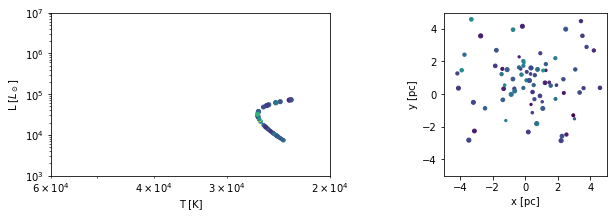

In [39]:
n_stars = 100
alpha_IMF = -2.35
m_stars = new_powerlaw_mass_distribution(n_stars, 
                                         10.0|units.MSun, 
                                         100.0|units.MSun, 
                                         alpha_IMF)
r_cluster = 1.0 | units.parsec
converter=nbody_system.nbody_to_si(m_stars.sum(), r_cluster)
stars=new_plummer_model(n_stars, convert_nbody=converter)
stars.mass = m_stars
stars.scale_to_standard(converter)


stellar = SeBa()
stellar.particles.add_particles(stars)

gravity = ph4(converter)
gravity.particles.add_particles(stars)
ch_s2g = stellar.particles.new_channel_to(gravity.particles)
ch_g2l = gravity.particles.new_channel_to(stars)
ch_s2l = stellar.particles.new_channel_to(stars)
ch_s2l.copy()

plot_snapshot(stars)


end_time = 10 | units.Myr
model_time = 0 | units.Myr

time = [] | units.Myr
radius = [] | units.pc

while(model_time<end_time):
    dt = stellar.particles.time_step.min()
    model_time += dt
    stellar.evolve_model(model_time)
    ch_s2g.copy()
    ch_s2l.copy()
    gravity.evolve_model(model_time)
    ch_g2l.copy()
    print("Evolved to t=", stellar.model_time.in_(units.Myr), 
          gravity.model_time.in_(units.Myr),
         "mass=", stars.mass.sum().in_(units.MSun), 
          "rvir=", stars.virial_radius().in_(units.pc))
    time.append(stellar.model_time)
    radius.append(stars.virial_radius())
    
plot_snapshot(stars)
stellar.stop()
gravity.stop()


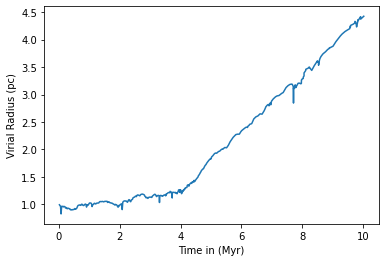

In [43]:
pyplot.plot(time.value_in(units.Myr), radius.value_in(units.pc))
pyplot.xlabel('Time in (Myr)')
pyplot.ylabel('Virial Radius (pc)')
pyplot.show()

#### Question 2

The cluster is expanding because it is not in equilibrium. The non-equilibrium can be caused by gas expulsions or ejections which are a result of stellar dynamics or gravitational interactions between stars.

#### Question 3

The mass loss of the stars (due to stellar winds or any gas expulsions) only become important after a few Myr, around the time when the star's core is exhausted in H?

#### Question 4

#### Assignment 2

In [49]:
n_stars = 100
alpha_IMF = -2.35
m_stars = new_powerlaw_mass_distribution(n_stars, 
                                         10.0|units.MSun, 
                                         100.0|units.MSun, 
                                         alpha_IMF)
r_cluster = 1.0 | units.parsec
converter=nbody_system.nbody_to_si(m_stars.sum(), r_cluster)
stars=new_plummer_model(n_stars, convert_nbody=converter)
stars.mass = m_stars
stars.scale_to_standard(converter)

gravity = ph4(converter)
gravity.particles.add_particles(stars)
ch_g2l = gravity.particles.new_channel_to(stars)

#plot_snapshot(stars)


end_time = 10 | units.Myr
model_time = 0 | units.Myr

time = [] | units.Myr
radius = [] | units.pc
dt = 0.01 | units.Myr

while(model_time<end_time):
    model_time += dt
    gravity.evolve_model(model_time)
    ch_g2l.copy()
    print("Evolved to t=", gravity.model_time.in_(units.Myr),
         "mass=", stars.mass.sum().in_(units.MSun), 
          "rvir=", stars.virial_radius().in_(units.pc))
    time.append(gravity.model_time)
    radius.append(stars.virial_radius())
    
#plot_snapshot(stars)

gravity.stop()



Evolved to t= 0.0102780706079 Myr mass= 1928.14990976 MSun rvir= 0.989110379183 parsec
Evolved to t= 0.0202245905509 Myr mass= 1928.14990976 MSun rvir= 0.985192216724 parsec
Evolved to t= 0.030171110494 Myr mass= 1928.14990976 MSun rvir= 0.988297538868 parsec
Evolved to t= 0.0401176304371 Myr mass= 1928.14990976 MSun rvir= 0.989835331087 parsec
Evolved to t= 0.0500641503802 Myr mass= 1928.14990976 MSun rvir= 0.988457124904 parsec
Evolved to t= 0.0600106703233 Myr mass= 1928.14990976 MSun rvir= 0.984625056334 parsec
Evolved to t= 0.0702887409311 Myr mass= 1928.14990976 MSun rvir= 0.982011360914 parsec
Evolved to t= 0.0802352608742 Myr mass= 1928.14990976 MSun rvir= 0.97813189997 parsec
Evolved to t= 0.0901817808173 Myr mass= 1928.14990976 MSun rvir= 0.968495801867 parsec
Evolved to t= 0.10012830076 Myr mass= 1928.14990976 MSun rvir= 0.966523884464 parsec
Evolved to t= 0.110074820703 Myr mass= 1928.14990976 MSun rvir= 0.969178495315 parsec
Evolved to t= 0.120021340647 Myr mass= 1928.1499

Evolved to t= 1.03012791544 Myr mass= 1928.14990976 MSun rvir= 0.964586390364 parsec
Evolved to t= 1.04007443538 Myr mass= 1928.14990976 MSun rvir= 0.961096244215 parsec
Evolved to t= 1.05035250599 Myr mass= 1928.14990976 MSun rvir= 0.953884655067 parsec
Evolved to t= 1.06029902593 Myr mass= 1928.14990976 MSun rvir= 0.941054038169 parsec
Evolved to t= 1.07007977054 Myr mass= 1928.14990976 MSun rvir= 0.932844162138 parsec
Evolved to t= 1.08019206582 Myr mass= 1928.14990976 MSun rvir= 0.927389077921 parsec
Evolved to t= 1.0900556981 Myr mass= 1928.14990976 MSun rvir= 0.898073317486 parsec
Evolved to t= 1.10008510571 Myr mass= 1928.14990976 MSun rvir= 0.92067343836 parsec
Evolved to t= 1.11003162565 Myr mass= 1928.14990976 MSun rvir= 0.907753551707 parsec
Evolved to t= 1.12014392092 Myr mass= 1928.14990976 MSun rvir= 0.933204907102 parsec
Evolved to t= 1.1302562162 Myr mass= 1928.14990976 MSun rvir= 0.943786446997 parsec
Evolved to t= 1.14053428681 Myr mass= 1928.14990976 MSun rvir= 0.952

Evolved to t= 2.0101916805 Myr mass= 1928.14990976 MSun rvir= 0.883848234334 parsec
Evolved to t= 2.02013820044 Myr mass= 1928.14990976 MSun rvir= 0.871071554677 parsec
Evolved to t= 2.03000183272 Myr mass= 1928.14990976 MSun rvir= 0.880071786253 parsec
Evolved to t= 2.04003124033 Myr mass= 1928.14990976 MSun rvir= 0.894435945106 parsec
Evolved to t= 2.05006064794 Myr mass= 1928.14990976 MSun rvir= 0.871096148198 parsec
Evolved to t= 2.06025583088 Myr mass= 1928.14990976 MSun rvir= 0.901956932749 parsec
Evolved to t= 2.07020235082 Myr mass= 1928.14990976 MSun rvir= 0.914875283738 parsec
Evolved to t= 2.0800659831 Myr mass= 1928.14990976 MSun rvir= 0.89084170333 parsec
Evolved to t= 2.09009539071 Myr mass= 1928.14990976 MSun rvir= 0.924732204972 parsec
Evolved to t= 2.10004191065 Myr mass= 1928.14990976 MSun rvir= 0.935426417843 parsec
Evolved to t= 2.11031998126 Myr mass= 1928.14990976 MSun rvir= 0.933254169927 parsec
Evolved to t= 2.12010072587 Myr mass= 1928.14990976 MSun rvir= 0.918

Evolved to t= 3.03004152533 Myr mass= 1928.14990976 MSun rvir= 1.02578865717 parsec
Evolved to t= 3.0401538206 Myr mass= 1928.14990976 MSun rvir= 1.03190062161 parsec
Evolved to t= 3.05026611588 Myr mass= 1928.14990976 MSun rvir= 1.0686842843 parsec
Evolved to t= 3.06004686049 Myr mass= 1928.14990976 MSun rvir= 0.978031492018 parsec
Evolved to t= 3.07015915577 Myr mass= 1928.14990976 MSun rvir= 1.0783787943 parsec
Evolved to t= 3.08002278804 Myr mass= 1928.14990976 MSun rvir= 0.985864458415 parsec
Evolved to t= 3.09005219565 Myr mass= 1928.14990976 MSun rvir= 1.06571791947 parsec
Evolved to t= 3.10016449093 Myr mass= 1928.14990976 MSun rvir= 1.04337076927 parsec
Evolved to t= 3.11011101087 Myr mass= 1928.14990976 MSun rvir= 1.05082015265 parsec
Evolved to t= 3.12022330615 Myr mass= 1928.14990976 MSun rvir= 1.07535967677 parsec
Evolved to t= 3.13000405076 Myr mass= 1928.14990976 MSun rvir= 1.00126675553 parsec
Evolved to t= 3.14011634603 Myr mass= 1928.14990976 MSun rvir= 1.07959807648 

Evolved to t= 4.0100016808 Myr mass= 1928.14990976 MSun rvir= 1.02474448904 parsec
Evolved to t= 4.02005181033 Myr mass= 1928.14990976 MSun rvir= 1.08411879345 parsec
Evolved to t= 4.03003977411 Myr mass= 1928.14990976 MSun rvir= 1.04640124876 parsec
Evolved to t= 4.04002773788 Myr mass= 1928.14990976 MSun rvir= 1.06764889099 parsec
Evolved to t= 4.05005714549 Myr mass= 1928.14990976 MSun rvir= 1.06881795558 parsec
Evolved to t= 4.06000366544 Myr mass= 1928.14990976 MSun rvir= 0.84354438602 parsec
Evolved to t= 4.07011596071 Myr mass= 1928.14990976 MSun rvir= 1.04980381706 parsec
Evolved to t= 4.08006248065 Myr mass= 1928.14990976 MSun rvir= 1.02899982862 parsec
Evolved to t= 4.0900090006 Myr mass= 1928.14990976 MSun rvir= 0.99497682644 parsec
Evolved to t= 4.10012129587 Myr mass= 1928.14990976 MSun rvir= 1.03899559459 parsec
Evolved to t= 4.11002637198 Myr mass= 1928.14990976 MSun rvir= 0.999094565021 parsec
Evolved to t= 4.12001433576 Myr mass= 1928.14990976 MSun rvir= 1.0430775 pars

Evolved to t= 4.99000328011 Myr mass= 1928.14990976 MSun rvir= 0.98497357243 parsec
Evolved to t= 5.00011557539 Myr mass= 1928.14990976 MSun rvir= 1.00119843552 parsec
Evolved to t= 5.01006209533 Myr mass= 1928.14990976 MSun rvir= 0.992464493893 parsec
Evolved to t= 5.02000861528 Myr mass= 1928.14990976 MSun rvir= 0.910369426606 parsec
Evolved to t= 5.03001730097 Myr mass= 1928.14990976 MSun rvir= 0.906195078219 parsec
Evolved to t= 5.04006743049 Myr mass= 1928.14990976 MSun rvir= 0.994510672979 parsec
Evolved to t= 5.05001395044 Myr mass= 1928.14990976 MSun rvir= 1.00689504091 parsec
Evolved to t= 5.06004335805 Myr mass= 1928.14990976 MSun rvir= 0.991230866399 parsec
Evolved to t= 5.07000023895 Myr mass= 1928.14990976 MSun rvir= 0.845994841575 parsec
Evolved to t= 5.0800192856 Myr mass= 1928.14990976 MSun rvir= 0.99410388572 parsec
Evolved to t= 5.09013158087 Myr mass= 1928.14990976 MSun rvir= 1.00513995423 parsec
Evolved to t= 5.10007810082 Myr mass= 1928.14990976 MSun rvir= 0.989591

Evolved to t= 6.0000309365 Myr mass= 1928.14990976 MSun rvir= 0.906996045234 parsec
Evolved to t= 6.01000853932 Myr mass= 1928.14990976 MSun rvir= 0.76390654477 parsec
Evolved to t= 6.02000686405 Myr mass= 1928.14990976 MSun rvir= 0.924743786379 parsec
Evolved to t= 6.0300777155 Myr mass= 1928.14990976 MSun rvir= 0.951687887066 parsec
Evolved to t= 6.04002423544 Myr mass= 1928.14990976 MSun rvir= 0.955540926977 parsec
Evolved to t= 6.05005364305 Myr mass= 1928.14990976 MSun rvir= 0.947152614448 parsec
Evolved to t= 6.06000016299 Myr mass= 1928.14990976 MSun rvir= 0.926189542103 parsec
Evolved to t= 6.0700295706 Myr mass= 1928.14990976 MSun rvir= 0.955802335976 parsec
Evolved to t= 6.08001753438 Myr mass= 1928.14990976 MSun rvir= 0.960056132589 parsec
Evolved to t= 6.09000549815 Myr mass= 1928.14990976 MSun rvir= 0.953202720726 parsec
Evolved to t= 6.10003490576 Myr mass= 1928.14990976 MSun rvir= 0.927214451195 parsec
Evolved to t= 6.11000214762 Myr mass= 1928.14990976 MSun rvir= 0.8592

Evolved to t= 7.05001044799 Myr mass= 1928.14990976 MSun rvir= 1.036071046 parsec
Evolved to t= 7.06001913369 Myr mass= 1928.14990976 MSun rvir= 1.01851241328 parsec
Evolved to t= 7.07006926321 Myr mass= 1928.14990976 MSun rvir= 1.08701622477 parsec
Evolved to t= 7.08001578315 Myr mass= 1928.14990976 MSun rvir= 0.998526617829 parsec
Evolved to t= 7.09000374693 Myr mass= 1928.14990976 MSun rvir= 0.977291717796 parsec
Evolved to t= 7.10001243262 Myr mass= 1928.14990976 MSun rvir= 1.00644129808 parsec
Evolved to t= 7.1100003964 Myr mass= 1928.14990976 MSun rvir= 1.00825963251 parsec
Evolved to t= 7.12005052593 Myr mass= 1928.14990976 MSun rvir= 1.08891238207 parsec
Evolved to t= 7.1300384897 Myr mass= 1928.14990976 MSun rvir= 1.03771126974 parsec
Evolved to t= 7.14002645348 Myr mass= 1928.14990976 MSun rvir= 1.08341243462 parsec
Evolved to t= 7.15005586109 Myr mass= 1928.14990976 MSun rvir= 1.1000845721 parsec
Evolved to t= 7.16000238103 Myr mass= 1928.14990976 MSun rvir= 0.991876444412 p

Evolved to t= 8.07002606816 Myr mass= 1928.14990976 MSun rvir= 1.04031709276 parsec
Evolved to t= 8.08005547577 Myr mass= 1928.14990976 MSun rvir= 1.0729532036 parsec
Evolved to t= 8.09000199571 Myr mass= 1928.14990976 MSun rvir= 1.03530264624 parsec
Evolved to t= 8.10003140332 Myr mass= 1928.14990976 MSun rvir= 1.02758996319 parsec
Evolved to t= 8.11006081093 Myr mass= 1928.14990976 MSun rvir= 1.00852829966 parsec
Evolved to t= 8.12000733087 Myr mass= 1928.14990976 MSun rvir= 0.942974507619 parsec
Evolved to t= 8.13003673848 Myr mass= 1928.14990976 MSun rvir= 0.936014512139 parsec
Evolved to t= 8.14002470226 Myr mass= 1928.14990976 MSun rvir= 0.849002042261 parsec
Evolved to t= 8.15001266603 Myr mass= 1928.14990976 MSun rvir= 0.837918785564 parsec
Evolved to t= 8.16000062981 Myr mass= 1928.14990976 MSun rvir= 0.876093687133 parsec
Evolved to t= 8.17003003742 Myr mass= 1928.14990976 MSun rvir= 0.90103315323 parsec
Evolved to t= 8.18001800119 Myr mass= 1928.14990976 MSun rvir= 0.9501585

Evolved to t= 9.12000557965 Myr mass= 1928.14990976 MSun rvir= 0.897191111529 parsec
Evolved to t= 9.13003498726 Myr mass= 1928.14990976 MSun rvir= 0.895116660603 parsec
Evolved to t= 9.14002295103 Myr mass= 1928.14990976 MSun rvir= 0.908140989876 parsec
Evolved to t= 9.15001091481 Myr mass= 1928.14990976 MSun rvir= 0.875414198743 parsec
Evolved to t= 9.16008176625 Myr mass= 1928.14990976 MSun rvir= 1.02433078198 parsec
Evolved to t= 9.1700282862 Myr mass= 1928.14990976 MSun rvir= 1.0223341049 parsec
Evolved to t= 9.1800576938 Myr mass= 1928.14990976 MSun rvir= 0.8900668243 parsec
Evolved to t= 9.19000421375 Myr mass= 1928.14990976 MSun rvir= 1.00592314976 parsec
Evolved to t= 9.20001289944 Myr mass= 1928.14990976 MSun rvir= 0.968819984193 parsec
Evolved to t= 9.21000086322 Myr mass= 1928.14990976 MSun rvir= 0.819375286193 parsec
Evolved to t= 9.22000954891 Myr mass= 1928.14990976 MSun rvir= 0.83237183474 parsec
Evolved to t= 9.23000269316 Myr mass= 1928.14990976 MSun rvir= 0.795232135

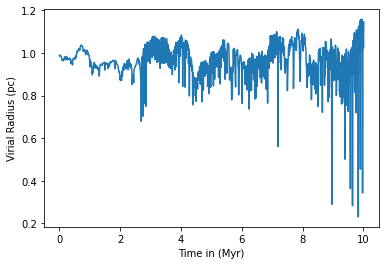

In [50]:
pyplot.plot(time.value_in(units.Myr), radius.value_in(units.pc))
pyplot.xlabel('Time in (Myr)')
pyplot.ylabel('Virial Radius (pc)')
pyplot.show()

The radius remain on average constant. This is because the system can be regarded as being in equilibrium since no stellar mass loss occurs. 

#### Question 5

bodies.get_binaries()

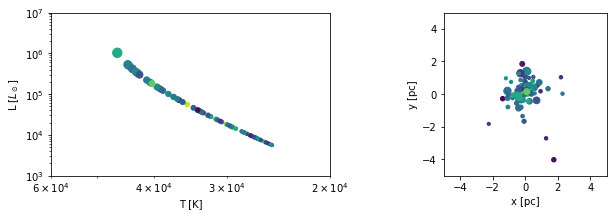

Evolved to t= 0.0224339444372 Myr 0.0226911966015 Myr mass= 2193.07722645 MSun rvir= 0.974576596671 parsec
<amuse.datamodel.base.new_particles_function_attribute_with_doc.<locals>.BoundParticlesFunctionAttribute object at 0x11f175520>


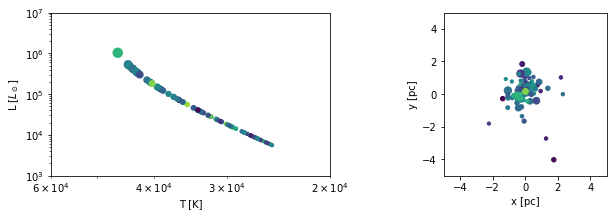

In [65]:
n_stars = 100
alpha_IMF = -2.35
m_stars = new_powerlaw_mass_distribution(n_stars, 
                                         10.0|units.MSun, 
                                         100.0|units.MSun, 
                                         alpha_IMF)
r_cluster = 1.0 | units.parsec
converter=nbody_system.nbody_to_si(m_stars.sum(), r_cluster)
stars=new_plummer_model(n_stars, convert_nbody=converter)
stars.mass = m_stars
stars.scale_to_standard(converter)


stellar = SeBa()
stellar.particles.add_particles(stars)

gravity = ph4(converter)
gravity.particles.add_particles(stars)
ch_s2g = stellar.particles.new_channel_to(gravity.particles)
ch_g2l = gravity.particles.new_channel_to(stars)
ch_s2l = stellar.particles.new_channel_to(stars)
ch_s2l.copy()

plot_snapshot(stars)


end_time = 10 | units.Myr
model_time = 0 | units.Myr

time = [] | units.Myr
radius = [] | units.pc

while(model_time<end_time):
    dt = stellar.particles.time_step.min()
    model_time += dt
    stellar.evolve_model(model_time)
    ch_s2g.copy()
    ch_s2l.copy()
    gravity.evolve_model(model_time)
    ch_g2l.copy()
    print("Evolved to t=", stellar.model_time.in_(units.Myr), 
          gravity.model_time.in_(units.Myr),
         "mass=", stars.mass.sum().in_(units.MSun), 
          "rvir=", stars.virial_radius().in_(units.pc))
    time.append(stellar.model_time)
    radius.append(stars.virial_radius())
    b = stars.get_binaries()
    print(stellar.particles.potential_energy)
    break
    if(len(b)>0):
        print("Number of binaries found:", len(b))
        print("first binary:", b[0])
        break
    
plot_snapshot(stars)
stellar.stop()
gravity.stop()

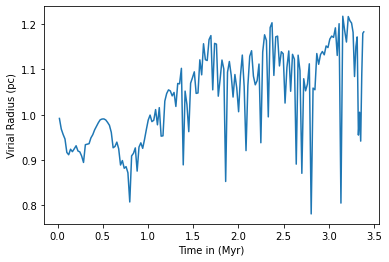

In [54]:
pyplot.plot(time.value_in(units.Myr), radius.value_in(units.pc))
pyplot.xlabel('Time in (Myr)')
pyplot.ylabel('Virial Radius (pc)')
pyplot.show()

I don't know what there should be to say here...

#### Assignment 3

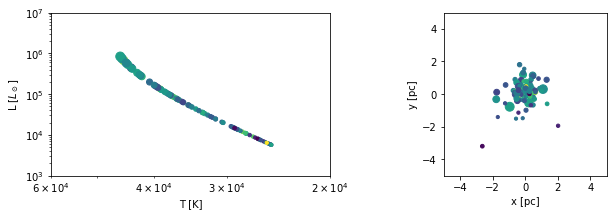

s_energy =  -1.11928254206e+40 J
g_energy =  -1.1182005026e+40 J
Evolved to t= 0.0278551712937 Myr 0.028004661331 Myr mass= 2286.62890042 MSun rvir= 0.99718320927 parsec
s_energy =  -1.1182005026e+40 J
g_energy =  -1.1171071996e+40 J
Evolved to t= 0.0556216448315 Myr 0.0560093226621 Myr mass= 2285.78504995 MSun rvir= 0.985360261053 parsec
s_energy =  -1.1171071996e+40 J
g_energy =  -1.1159904417e+40 J
Evolved to t= 0.0833708515078 Myr 0.0834051870077 Myr mass= 2284.93731024 MSun rvir= 0.978288529127 parsec
s_energy =  -1.1159904417e+40 J
g_energy =  -1.11486832442e+40 J
Evolved to t= 0.111102339221 Myr 0.111105449846 Myr mass= 2284.08566812 MSun rvir= 0.977598149708 parsec
s_energy =  -1.11486832442e+40 J
g_energy =  -1.11373701392e+40 J
Evolved to t= 0.138815854064 Myr 0.139110111177 Myr mass= 2283.23010446 MSun rvir= 0.973371181823 parsec
s_energy =  -1.11373701392e+40 J
g_energy =  -1.11257220003e+40 J
Evolved to t= 0.166511153918 Myr 0.166810374015 Myr mass= 2282.37059986 MSun rvir

g_energy =  -1.0475504435e+40 J
Evolved to t= 1.41924153542 Myr 1.41925797235 Myr mass= 2238.23578567 MSun rvir= 0.902698505108 parsec
s_energy =  -1.0475504435e+40 J
g_energy =  -1.04569888186e+40 J
Evolved to t= 1.44603325876 Myr 1.44650163745 Myr mass= 2237.17048548 MSun rvir= 0.949651621478 parsec
s_energy =  -1.04569888186e+40 J
g_energy =  -1.04394642576e+40 J
Evolved to t= 1.47280913211 Myr 1.47298430631 Myr mass= 2236.10056673 MSun rvir= 0.949688461394 parsec
s_energy =  -1.04394642576e+40 J
g_energy =  -1.042158303e+40 J
Evolved to t= 1.49956944301 Myr 1.50007577217 Myr mass= 2235.02603672 MSun rvir= 0.972014059621 parsec
s_energy =  -1.042158303e+40 J
g_energy =  -1.04045109003e+40 J
Evolved to t= 1.52631448449 Myr 1.52655844103 Myr mass= 2233.94690458 MSun rvir= 0.975290518108 parsec
s_energy =  -1.04045109003e+40 J
g_energy =  -1.0387427082e+40 J
Evolved to t= 1.55304455462 Myr 1.55364990689 Myr mass= 2232.86318132 MSun rvir= 0.982992746132 parsec
s_energy =  -1.0387427082e

Evolved to t= 2.71861239901 Myr 2.71888733705 Myr mass= 2181.40066907 MSun rvir= 1.25230977608 parsec
s_energy =  -9.55814131386e+39 J
g_energy =  -9.54085606234e+39 J
Evolved to t= 2.74491058598 Myr 2.74567440441 Myr mass= 2180.18669717 MSun rvir= 1.24479012205 parsec
s_energy =  -9.54085606234e+39 J
g_energy =  -9.52361888621e+39 J
Evolved to t= 2.77119702516 Myr 2.7712438778 Myr mass= 2178.97445338 MSun rvir= 1.22738247372 parsec
s_energy =  -9.52361888621e+39 J
g_energy =  -9.50644957571e+39 J
Evolved to t= 2.79747082658 Myr 2.79757434742 Myr mass= 2177.76437957 MSun rvir= 1.19553953915 parsec
s_energy =  -9.50644957571e+39 J
g_energy =  -9.48875390043e+39 J
Evolved to t= 2.82373099923 Myr 2.82420921554 Myr mass= 2176.55694397 MSun rvir= 1.19900034072 parsec
s_energy =  -9.48875390043e+39 J
g_energy =  -9.47125846766e+39 J
Evolved to t= 2.84997644475 Myr 2.85038748591 Myr mass= 2175.35264228 MSun rvir= 1.16298166906 parsec
s_energy =  -9.47125846766e+39 J
g_energy =  -9.45310880214

s_energy =  -8.90040054059e+39 J
g_energy =  -8.89478125259e+39 J
Evolved to t= 3.6533793549 Myr 3.65339070973 Myr mass= 2134.37802934 MSun rvir= 1.05898969756 parsec
s_energy =  -8.89478125259e+39 J
g_energy =  -8.8894854789e+39 J
Evolved to t= 3.65773676424 Myr 3.65795668712 Myr mass= 2133.96272983 MSun rvir= 1.05573590954 parsec
s_energy =  -8.8894854789e+39 J
g_energy =  -8.8844911776e+39 J
Evolved to t= 3.66178715112 Myr 3.66191386753 Myr mass= 2133.5741182 MSun rvir= 1.05188773743 parsec
s_energy =  -8.8844911776e+39 J
g_energy =  -8.87977947327e+39 J
Evolved to t= 3.66555005352 Myr 3.66556664944 Myr mass= 2133.210569 MSun rvir= 1.04803093841 parsec
s_energy =  -8.87977947327e+39 J
g_energy =  -8.87533457217e+39 J
Evolved to t= 3.66904407438 Myr 3.66921943135 Myr mass= 2132.87057 MSun rvir= 1.04396356009 parsec
s_energy =  -8.87533457217e+39 J
g_energy =  -8.87114188395e+39 J
Evolved to t= 3.67228687837 Myr 3.67256781477 Myr mass= 2132.55270516 MSun rvir= 1.03967326263 parsec
s_e

g_energy =  -8.81498856879e+39 J
Evolved to t= 3.71108464789 Myr 3.71115032372 Myr mass= 2128.49963163 MSun rvir= 1.02188955709 parsec
s_energy =  -8.81498856879e+39 J
g_energy =  -8.81483642053e+39 J
Evolved to t= 3.71118441354 Myr 3.71118837354 Myr mass= 2128.48879293 MSun rvir= 1.0219211943 parsec
s_energy =  -8.81483642053e+39 J
g_energy =  -8.81469538339e+39 J
Evolved to t= 3.71127688529 Myr 3.71130252297 Myr mass= 2128.4787451 MSun rvir= 1.02201227481 parsec
s_energy =  -8.81469538339e+39 J
g_energy =  -8.8145646358e+39 J
Evolved to t= 3.71136259903 Myr 3.71137862259 Myr mass= 2128.46943025 MSun rvir= 1.02207059613 parsec
s_energy =  -8.8145646358e+39 J
g_energy =  -8.81444342717e+39 J
Evolved to t= 3.71144205091 Myr 3.71145472222 Myr mass= 2128.46079475 MSun rvir= 1.02212695244 parsec
s_energy =  -8.81444342717e+39 J
g_energy =  -8.81433105898e+39 J
Evolved to t= 3.71151570036 Myr 3.71153082184 Myr mass= 2128.45278892 MSun rvir= 1.02218138657 parsec
s_energy =  -8.81433105898e+3

s_energy =  -8.81295185905e+39 J
g_energy =  -8.81294810889e+39 J
Evolved to t= 3.71242150628 Myr 3.71242499241 Myr mass= 2128.3542468 MSun rvir= 1.02269122015 parsec
s_energy =  -8.81294810889e+39 J
g_energy =  -8.81294463144e+39 J
Evolved to t= 3.7124237825 Myr 3.71242499241 Myr mass= 2128.35399898 MSun rvir= 1.02269122882 parsec
s_energy =  -8.81294463144e+39 J
g_energy =  -8.81294140686e+39 J
Evolved to t= 3.7124258932 Myr 3.71244401732 Myr mass= 2128.35376918 MSun rvir= 1.02269961718 parsec
s_energy =  -8.81294140686e+39 J
g_energy =  -8.81293841672e+39 J
Evolved to t= 3.7124278504 Myr 3.71244401732 Myr mass= 2128.3535561 MSun rvir= 1.02269962464 parsec
s_energy =  -8.81293841672e+39 J
g_energy =  -8.81293564401e+39 J
Evolved to t= 3.71242966529 Myr 3.71244401732 Myr mass= 2128.35335851 MSun rvir= 1.02269963156 parsec
s_energy =  -8.81293564401e+39 J
g_energy =  -8.81293307292e+39 J
Evolved to t= 3.7124313482 Myr 3.71244401732 Myr mass= 2128.35317528 MSun rvir= 1.02269963798 parse

s_energy =  -8.81290138185e+39 J
g_energy =  -8.81290130205e+39 J
Evolved to t= 3.71245214364 Myr 3.71246304222 Myr mass= 2128.35091117 MSun rvir= 1.0227080051 parsec
s_energy =  -8.81290130205e+39 J
g_energy =  -8.81290122805e+39 J
Evolved to t= 3.71245219208 Myr 3.71246304222 Myr mass= 2128.3509059 MSun rvir= 1.02270800529 parsec
s_energy =  -8.81290122805e+39 J
g_energy =  -8.81290115943e+39 J
Evolved to t= 3.71245223699 Myr 3.71246304222 Myr mass= 2128.35090101 MSun rvir= 1.02270800546 parsec
s_energy =  -8.81290115943e+39 J
g_energy =  -8.8129010958e+39 J
Evolved to t= 3.71245227864 Myr 3.71246304222 Myr mass= 2128.35089647 MSun rvir= 1.02270800562 parsec
s_energy =  -8.8129010958e+39 J
g_energy =  -8.8129010368e+39 J
Evolved to t= 3.71245231726 Myr 3.71246304222 Myr mass= 2128.35089227 MSun rvir= 1.02270800576 parsec
s_energy =  -8.8129010368e+39 J
g_energy =  -8.81290098209e+39 J
Evolved to t= 3.71245235307 Myr 3.71246304222 Myr mass= 2128.35088837 MSun rvir= 1.0227080059 parsec

g_energy =  -8.81290030768e+39 J
Evolved to t= 3.71245279449 Myr 3.71246304222 Myr mass= 2128.35084031 MSun rvir= 1.02270800758 parsec
s_energy =  -8.81290030768e+39 J
g_energy =  -8.81290030598e+39 J
Evolved to t= 3.7124527956 Myr 3.71246304222 Myr mass= 2128.35084019 MSun rvir= 1.02270800759 parsec
s_energy =  -8.81290030598e+39 J
g_energy =  -8.81290030441e+39 J
Evolved to t= 3.71245279664 Myr 3.71246304222 Myr mass= 2128.35084007 MSun rvir= 1.02270800759 parsec
s_energy =  -8.81290030441e+39 J
g_energy =  -8.81290030288e+39 J
Evolved to t= 3.71245279764 Myr 3.71246304222 Myr mass= 2128.35083997 MSun rvir= 1.02270800759 parsec
s_energy =  -8.81290030288e+39 J
g_energy =  -8.81290030135e+39 J
Evolved to t= 3.71245279864 Myr 3.71246304222 Myr mass= 2128.35083986 MSun rvir= 1.0227080076 parsec
s_energy =  -8.81290030135e+39 J
g_energy =  -8.81290029982e+39 J
Evolved to t= 3.71245279964 Myr 3.71246304222 Myr mass= 2128.35083975 MSun rvir= 1.0227080076 parsec
s_energy =  -8.81290029982e+

s_energy =  -8.78372658422e+39 J
g_energy =  -8.77671738496e+39 J
Evolved to t= 3.71418516361 Myr 3.71419430865 Myr mass= 2120.08687136 MSun rvir= 1.01816610731 parsec
s_energy =  -8.77671738496e+39 J
g_energy =  -8.76872407871e+39 J
Evolved to t= 3.71423504161 Myr 3.71427040828 Myr mass= 2118.17491658 MSun rvir= 1.01699990172 parsec
s_energy =  -8.76872407871e+39 J
g_energy =  -8.75983627515e+39 J
Evolved to t= 3.71428494108 Myr 3.71430845809 Myr mass= 2116.04755443 MSun rvir= 1.01569912454 parsec
s_energy =  -8.75983627515e+39 J
g_energy =  -8.750065394e+39 J
Evolved to t= 3.71433486202 Myr 3.7143465079 Myr mass= 2113.70753102 MSun rvir= 1.01426771206 parsec
s_energy =  -8.750065394e+39 J
g_energy =  -8.7395080646e+39 J
Evolved to t= 3.71438480446 Myr 3.71442260752 Myr mass= 2111.17811437 MSun rvir= 1.01272089391 parsec
s_energy =  -8.7395080646e+39 J
g_energy =  -8.72829260254e+39 J
Evolved to t= 3.71443476841 Myr 3.71446065733 Myr mass= 2108.49020619 MSun rvir= 1.01107563413 parsec

s_energy =  -8.58030743867e+39 J
g_energy =  -8.57984381184e+39 J
Evolved to t= 3.77450726659 Myr 3.77454130984 Myr mass= 2089.51468387 MSun rvir= 0.94524278669 parsec
s_energy =  -8.57984381184e+39 J
g_energy =  -8.57941541571e+39 J
Evolved to t= 3.7747463132 Myr 3.77484570833 Myr mass= 2089.48673722 MSun rvir= 0.945010453529 parsec
s_energy =  -8.57941541571e+39 J
g_energy =  -8.57901954484e+39 J
Evolved to t= 3.77496691221 Myr 3.77499790757 Myr mass= 2089.46093326 MSun rvir= 0.944896961846 parsec
s_energy =  -8.57901954484e+39 J
g_energy =  -8.57865380909e+39 J
Evolved to t= 3.77517050214 Myr 3.77530230607 Myr mass= 2089.43710685 MSun rvir= 0.944672473092 parsec
s_energy =  -8.57865380909e+39 J
g_energy =  -8.57831583226e+39 J
Evolved to t= 3.77535840728 Myr 3.77537840569 Myr mass= 2089.41510574 MSun rvir= 0.944618235897 parsec
s_energy =  -8.57831583226e+39 J
g_energy =  -8.57800361386e+39 J
Evolved to t= 3.77553184705 Myr 3.77560670456 Myr mass= 2089.39478945 MSun rvir= 0.94445499

s_energy =  -8.57431414642e+39 J
g_energy =  -8.57430661346e+39 J
Evolved to t= 3.77757258422 Myr 3.77758529476 Myr mass= 2089.15508464 MSun rvir= 0.943206703678 parsec
s_energy =  -8.57430661346e+39 J
g_energy =  -8.57429965477e+39 J
Evolved to t= 3.77757640277 Myr 3.77758529476 Myr mass= 2089.15463494 MSun rvir= 0.943206733755 parsec
s_energy =  -8.57429965477e+39 J
g_energy =  -8.57429322656e+39 J
Evolved to t= 3.77757993017 Myr 3.77758529476 Myr mass= 2089.15421953 MSun rvir= 0.943206761539 parsec
s_energy =  -8.57429322656e+39 J
g_energy =  -8.57428728839e+39 J
Evolved to t= 3.77758318862 Myr 3.77758529476 Myr mass= 2089.15383579 MSun rvir= 0.943206787206 parsec
s_energy =  -8.57428728839e+39 J
g_energy =  -8.57428180291e+39 J
Evolved to t= 3.77758619862 Myr 3.77762334457 Myr mass= 2089.1534813 MSun rvir= 0.943185653505 parsec
s_energy =  -8.57428180291e+39 J
g_energy =  -8.57427673527e+39 J
Evolved to t= 3.77758897914 Myr 3.77762334457 Myr mass= 2089.15315384 MSun rvir= 0.9431856

s_energy =  -8.5742173562e+39 J
g_energy =  -8.57421720147e+39 J
Evolved to t= 3.77762164175 Myr 3.77762334457 Myr mass= 2089.14930699 MSun rvir= 0.94318593309 parsec
s_energy =  -8.57421720147e+39 J
g_energy =  -8.57421705853e+39 J
Evolved to t= 3.77762172017 Myr 3.77762334457 Myr mass= 2089.14929776 MSun rvir= 0.943185933708 parsec
s_energy =  -8.57421705853e+39 J
g_energy =  -8.57421692649e+39 J
Evolved to t= 3.77762179261 Myr 3.77762334457 Myr mass= 2089.14928922 MSun rvir= 0.94318593428 parsec
s_energy =  -8.57421692649e+39 J
g_energy =  -8.57421680452e+39 J
Evolved to t= 3.77762185952 Myr 3.77762334457 Myr mass= 2089.14928134 MSun rvir= 0.943185934808 parsec
s_energy =  -8.57421680452e+39 J
g_energy =  -8.57421669184e+39 J
Evolved to t= 3.77762192134 Myr 3.77762334457 Myr mass= 2089.14927406 MSun rvir= 0.943185935295 parsec
s_energy =  -8.57421669184e+39 J
g_energy =  -8.57421658775e+39 J
Evolved to t= 3.77762197844 Myr 3.77762334457 Myr mass= 2089.14926734 MSun rvir= 0.943185935

g_energy =  -8.57421536201e+39 J
Evolved to t= 3.77762265088 Myr 3.77762334457 Myr mass= 2089.14918814 MSun rvir= 0.943185941052 parsec
s_energy =  -8.57421536201e+39 J
g_energy =  -8.5742153593e+39 J
Evolved to t= 3.77762265237 Myr 3.77762334457 Myr mass= 2089.14918796 MSun rvir= 0.943185941064 parsec
s_energy =  -8.5742153593e+39 J
g_energy =  -8.57421535679e+39 J
Evolved to t= 3.77762265375 Myr 3.77762334457 Myr mass= 2089.1491878 MSun rvir= 0.943185941074 parsec
s_energy =  -8.57421535679e+39 J
g_energy =  -8.57421535448e+39 J
Evolved to t= 3.77762265501 Myr 3.77762334457 Myr mass= 2089.14918765 MSun rvir= 0.943185941084 parsec
s_energy =  -8.57421535448e+39 J
g_energy =  -8.57421535234e+39 J
Evolved to t= 3.77762265619 Myr 3.77762334457 Myr mass= 2089.14918751 MSun rvir= 0.943185941094 parsec
s_energy =  -8.57421535234e+39 J
g_energy =  -8.57421535036e+39 J
Evolved to t= 3.77762265727 Myr 3.77762334457 Myr mass= 2089.14918738 MSun rvir= 0.943185941102 parsec
s_energy =  -8.5742153

g_energy =  -8.54566462541e+39 J
Evolved to t= 3.77920350739 Myr 3.77922143666 Myr mass= 2087.24858995 MSun rvir= 0.942416270299 parsec
s_energy =  -8.54566462541e+39 J
g_energy =  -8.53503672879e+39 J
Evolved to t= 3.77925655717 Myr 3.77925948647 Myr mass= 2086.53940516 MSun rvir= 0.942396975029 parsec
s_energy =  -8.53503672879e+39 J
g_energy =  -8.52137002474e+39 J
Evolved to t= 3.77930963008 Myr 3.7793355861 Myr mass= 2085.6275744 MSun rvir= 0.9423628051 parsec
s_energy =  -8.52137002474e+39 J
g_energy =  -8.5042725297e+39 J
Evolved to t= 3.77936272614 Myr 3.77937363591 Myr mass= 2084.48728442 MSun rvir= 0.942343099127 parsec
s_energy =  -8.5042725297e+39 J
g_energy =  -8.48344182904e+39 J
Evolved to t= 3.77941584538 Myr 3.77948778534 Myr mass= 2083.09826551 MSun rvir= 0.942297092394 parsec
s_energy =  -8.48344182904e+39 J
g_energy =  -8.45867100521e+39 J
Evolved to t= 3.7794689878 Myr 3.77948778534 Myr mass= 2081.44756335 MSun rvir= 0.942292040674 parsec
s_energy =  -8.45867100521

Evolved to t= 3.78189792864 Myr 3.78192297328 Myr mass= 2057.76068405 MSun rvir= 0.942226187213 parsec
s_energy =  -8.10266898415e+39 J
g_energy =  -8.1026167043e+39 J
Evolved to t= 3.78193457806 Myr 3.7819610231 Myr mass= 2057.75733646 MSun rvir= 0.942229092318 parsec
s_energy =  -8.1026167043e+39 J
g_energy =  -8.10257387685e+39 J
Evolved to t= 3.78196459733 Myr 3.78199907291 Myr mass= 2057.75459439 MSun rvir= 0.942232074929 parsec
s_energy =  -8.10257387685e+39 J
g_energy =  -8.10253897552e+39 J
Evolved to t= 3.78198905814 Myr 3.78199907291 Myr mass= 2057.75235998 MSun rvir= 0.942232315007 parsec
s_energy =  -8.10253897552e+39 J
g_energy =  -8.10251064936e+39 J
Evolved to t= 3.78200895614 Myr 3.78203712272 Myr mass= 2057.75054672 MSun rvir= 0.942235340597 parsec
s_energy =  -8.10251064936e+39 J
g_energy =  -8.09787446705e+39 J
Evolved to t= 3.78440615057 Myr 3.78489085859 Myr mass= 2057.45280675 MSun rvir= 0.942867906942 parsec
s_energy =  -8.09787446705e+39 J
g_energy =  -8.0931880

s_energy =  -7.96753139612e+39 J
g_energy =  -7.96717946613e+39 J
Evolved to t= 3.84732943267 Myr 3.84733059941 Myr mass= 2049.42545805 MSun rvir= 0.984438198136 parsec
s_energy =  -7.96717946613e+39 J
g_energy =  -7.9668559384e+39 J
Evolved to t= 3.84748856939 Myr 3.84759694809 Myr mass= 2049.4049116 MSun rvir= 0.984571031201 parsec
s_energy =  -7.9668559384e+39 J
g_energy =  -7.96655846284e+39 J
Evolved to t= 3.84763484304 Myr 3.8476349979 Myr mass= 2049.3860228 MSun rvir= 0.984593662861 parsec
s_energy =  -7.96655846284e+39 J
g_energy =  -7.96628497007e+39 J
Evolved to t= 3.84776930079 Myr 3.84790134658 Myr mass= 2049.36865716 MSun rvir= 0.984740014825 parsec
s_energy =  -7.96628497007e+39 J
g_energy =  -7.96603348134e+39 J
Evolved to t= 3.84789290346 Myr 3.84790134658 Myr mass= 2049.35269122 MSun rvir= 0.984742684074 parsec
s_energy =  -7.96603348134e+39 J
g_energy =  -7.96580225541e+39 J
Evolved to t= 3.84800653279 Myr 3.84805354583 Myr mass= 2049.33801162 MSun rvir= 0.98483279848

g_energy =  -7.96321668236e+39 J
Evolved to t= 3.84927566022 Myr 3.84930918961 Myr mass= 2049.17392502 MSun rvir= 0.985746540232 parsec
s_energy =  -7.96321668236e+39 J
g_energy =  -7.96321175409e+39 J
Evolved to t= 3.84927807678 Myr 3.84930918961 Myr mass= 2049.17361235 MSun rvir= 0.985746592581 parsec
s_energy =  -7.96321175409e+39 J
g_energy =  -7.96320722096e+39 J
Evolved to t= 3.84928029956 Myr 3.84930918961 Myr mass= 2049.17332474 MSun rvir= 0.985746640731 parsec
s_energy =  -7.96320722096e+39 J
g_energy =  -7.96320305131e+39 J
Evolved to t= 3.84928234412 Myr 3.84930918961 Myr mass= 2049.1730602 MSun rvir= 0.985746685022 parsec
s_energy =  -7.96320305131e+39 J
g_energy =  -7.96319921598e+39 J
Evolved to t= 3.84928422475 Myr 3.84930918961 Myr mass= 2049.17281687 MSun rvir= 0.985746725761 parsec
s_energy =  -7.96319921598e+39 J
g_energy =  -7.96319568816e+39 J
Evolved to t= 3.84928595458 Myr 3.84930918961 Myr mass= 2049.17259305 MSun rvir= 0.985746763233 parsec
s_energy =  -7.96319

s_energy =  -7.96315623896e+39 J
g_energy =  -7.96315615687e+39 J
Evolved to t= 3.84930533811 Myr 3.84930918961 Myr mass= 2049.170085 MSun rvir= 0.985747183136 parsec
s_energy =  -7.96315615687e+39 J
g_energy =  -7.96315608137e+39 J
Evolved to t= 3.84930537513 Myr 3.84930918961 Myr mass= 2049.17008021 MSun rvir= 0.985747183938 parsec
s_energy =  -7.96315608137e+39 J
g_energy =  -7.96315601193e+39 J
Evolved to t= 3.84930540919 Myr 3.84930918961 Myr mass= 2049.1700758 MSun rvir= 0.985747184675 parsec
s_energy =  -7.96315601193e+39 J
g_energy =  -7.96315594805e+39 J
Evolved to t= 3.84930544051 Myr 3.84930918961 Myr mass= 2049.17007175 MSun rvir= 0.985747185354 parsec
s_energy =  -7.96315594805e+39 J
g_energy =  -7.96315588929e+39 J
Evolved to t= 3.84930546932 Myr 3.84930918961 Myr mass= 2049.17006802 MSun rvir= 0.985747185978 parsec
s_energy =  -7.96315588929e+39 J
g_energy =  -7.96315583524e+39 J
Evolved to t= 3.84930549582 Myr 3.84930918961 Myr mass= 2049.17006459 MSun rvir= 0.985747186

s_energy =  -7.96315522674e+39 J
g_energy =  -7.9631552247e+39 J
Evolved to t= 3.84930579519 Myr 3.84930918961 Myr mass= 2049.17002586 MSun rvir= 0.985747193037 parsec
s_energy =  -7.9631552247e+39 J
g_energy =  -7.96315522266e+39 J
Evolved to t= 3.84930579619 Myr 3.84930918961 Myr mass= 2049.17002573 MSun rvir= 0.985747193059 parsec
s_energy =  -7.96315522266e+39 J
g_energy =  -7.96315522062e+39 J
Evolved to t= 3.84930579719 Myr 3.84930918961 Myr mass= 2049.1700256 MSun rvir= 0.985747193081 parsec
s_energy =  -7.96315522062e+39 J
g_energy =  -7.96315521858e+39 J
Evolved to t= 3.84930579819 Myr 3.84930918961 Myr mass= 2049.17002547 MSun rvir= 0.985747193102 parsec
s_energy =  -7.96315521858e+39 J
g_energy =  -7.96315521654e+39 J
Evolved to t= 3.84930579919 Myr 3.84930918961 Myr mass= 2049.17002534 MSun rvir= 0.985747193124 parsec
s_energy =  -7.96315521654e+39 J
g_energy =  -7.9631552145e+39 J
Evolved to t= 3.84930580019 Myr 3.84930918961 Myr mass= 2049.17002521 MSun rvir= 0.9857471931

s_energy =  -7.22605879701e+39 J
g_energy =  -7.22068490746e+39 J
Evolved to t= 3.85702295376 Myr 3.85733769986 Myr mass= 2017.75265177 MSun rvir= 1.01430730832 parsec
s_energy =  -7.22068490746e+39 J
g_energy =  -7.21530666385e+39 J
Evolved to t= 3.85965035776 Myr 3.8597728878 Myr mass= 2017.40245998 MSun rvir= 1.01716560432 parsec
s_energy =  -7.21530666385e+39 J
g_energy =  -7.20992303144e+39 J
Evolved to t= 3.86229155711 Myr 3.86281687273 Myr mass= 2017.05041072 MSun rvir= 1.02016146717 parsec
s_energy =  -7.20992303144e+39 J
g_energy =  -7.20453298447e+39 J
Evolved to t= 3.86494670417 Myr 3.86525206067 Myr mass= 2016.69638682 MSun rvir= 1.02213104217 parsec
s_energy =  -7.20453298447e+39 J
g_energy =  -7.19913339632e+39 J
Evolved to t= 3.86761595302 Myr 3.86768724861 Myr mass= 2016.3402631 MSun rvir= 1.02373207244 parsec
s_energy =  -7.19913339632e+39 J
g_energy =  -7.19372194579e+39 J
Evolved to t= 3.87029945978 Myr 3.87073123354 Myr mass= 2015.98190588 MSun rvir= 1.02522238011 p

g_energy =  -7.0452701916e+39 J
Evolved to t= 3.94486285717 Myr 3.94500446576 Myr mass= 2006.2194813 MSun rvir= 1.04379778394 parsec
s_energy =  -7.0452701916e+39 J
g_energy =  -7.04484717344e+39 J
Evolved to t= 3.94507472747 Myr 3.94508056539 Myr mass= 2006.19255484 MSun rvir= 1.04388921174 parsec
s_energy =  -7.04484717344e+39 J
g_energy =  -7.04446076862e+39 J
Evolved to t= 3.94526821827 Myr 3.94530886426 Myr mass= 2006.16796398 MSun rvir= 1.04414836275 parsec
s_energy =  -7.04446076862e+39 J
g_energy =  -7.04410777108e+39 J
Evolved to t= 3.94544493814 Myr 3.9454610635 Myr mass= 2006.1455043 MSun rvir= 1.04431783221 parsec
s_energy =  -7.04410777108e+39 J
g_energy =  -7.0437852791e+39 J
Evolved to t= 3.94560635263 Myr 3.94561326275 Myr mass= 2006.12498957 MSun rvir= 1.044483562 parsec
s_energy =  -7.0437852791e+39 J
g_energy =  -7.04349063997e+39 J
Evolved to t= 3.94575379733 Myr 3.945765462 Myr mass= 2006.10625009 MSun rvir= 1.04464565055 parsec
s_energy =  -7.04349063997e+39 J
g_e

g_energy =  -7.04041345857e+39 J
Evolved to t= 3.94729194582 Myr 3.94730647936 Myr mass= 2005.91074134 MSun rvir= 1.04611427125 parsec
s_energy =  -7.04041345857e+39 J
g_energy =  -7.0404091497e+39 J
Evolved to t= 3.94729409732 Myr 3.94730647936 Myr mass= 2005.91046784 MSun rvir= 1.04611432012 parsec
s_energy =  -7.0404091497e+39 J
g_energy =  -7.04040521083e+39 J
Evolved to t= 3.94729606407 Myr 3.94730647936 Myr mass= 2005.91021783 MSun rvir= 1.04611436479 parsec
s_energy =  -7.04040521083e+39 J
g_energy =  -7.04040161018e+39 J
Evolved to t= 3.94729786193 Myr 3.94730647936 Myr mass= 2005.90998928 MSun rvir= 1.04611440562 parsec
s_energy =  -7.04040161018e+39 J
g_energy =  -7.0403983187e+39 J
Evolved to t= 3.94729950542 Myr 3.94730647936 Myr mass= 2005.90978036 MSun rvir= 1.04611444295 parsec
s_energy =  -7.0403983187e+39 J
g_energy =  -7.04039530985e+39 J
Evolved to t= 3.94730100778 Myr 3.94730647936 Myr mass= 2005.90958938 MSun rvir= 1.04611447708 parsec
s_energy =  -7.04039530985e+3

s_energy =  -7.04036384006e+39 J
g_energy =  -7.04036379165e+39 J
Evolved to t= 3.94731674506 Myr 3.94732550427 Myr mass= 2005.90758885 MSun rvir= 1.04613068929 parsec
s_energy =  -7.04036379165e+39 J
g_energy =  -7.0403637474e+39 J
Evolved to t= 3.94731676716 Myr 3.94732550427 Myr mass= 2005.90758604 MSun rvir= 1.0461306898 parsec
s_energy =  -7.0403637474e+39 J
g_energy =  -7.04036370694e+39 J
Evolved to t= 3.94731678736 Myr 3.94732550427 Myr mass= 2005.90758348 MSun rvir= 1.04613069026 parsec
s_energy =  -7.04036370694e+39 J
g_energy =  -7.04036366996e+39 J
Evolved to t= 3.94731680582 Myr 3.94732550427 Myr mass= 2005.90758113 MSun rvir= 1.04613069067 parsec
s_energy =  -7.04036366996e+39 J
g_energy =  -7.04036363615e+39 J
Evolved to t= 3.9473168227 Myr 3.94732550427 Myr mass= 2005.90757898 MSun rvir= 1.04613069106 parsec
s_energy =  -7.04036363615e+39 J
g_energy =  -7.04036360525e+39 J
Evolved to t= 3.94731683813 Myr 3.94732550427 Myr mass= 2005.90757702 MSun rvir= 1.04613069141 par

s_energy =  -7.03987017369e+39 J
g_energy =  -7.03974689814e+39 J
Evolved to t= 3.94762514305 Myr 3.94762990276 Myr mass= 2005.86841756 MSun rvir= 1.0463856199 parsec
s_energy =  -7.03974689814e+39 J
g_energy =  -7.03962362342e+39 J
Evolved to t= 3.94768685301 Myr 3.94770600239 Myr mass= 2005.86058683 MSun rvir= 1.04644733466 parsec
s_energy =  -7.03962362342e+39 J
g_energy =  -7.03950095676e+39 J
Evolved to t= 3.94774859036 Myr 3.94778210201 Myr mass= 2005.85277881 MSun rvir= 1.04650837478 parsec
s_energy =  -7.03950095676e+39 J
g_energy =  -7.03937922345e+39 J
Evolved to t= 3.94781035513 Myr 3.94782015182 Myr mass= 2005.8450062 MSun rvir= 1.04653931273 parsec
s_energy =  -7.03937922345e+39 J
g_energy =  -7.03925839868e+39 J
Evolved to t= 3.94787214735 Myr 3.94789625144 Myr mass= 2005.83726797 MSun rvir= 1.04659932297 parsec
s_energy =  -7.03925839868e+39 J
g_energy =  -7.0391384556e+39 J
Evolved to t= 3.94793396703 Myr 3.94793430126 Myr mass= 2005.82956313 MSun rvir= 1.04662972371 pa

s_energy =  -6.2788512022e+39 J
g_energy =  -6.27310573994e+39 J
Evolved to t= 3.95376904888 Myr 3.95413642055 Myr mass= 1975.71118846 MSun rvir= 1.07187275118 parsec
s_energy =  -6.27310573994e+39 J
g_energy =  -6.26737452252e+39 J
Evolved to t= 3.95662765438 Myr 3.95687600698 Myr mass= 1975.34222248 MSun rvir= 1.0716678771 parsec
s_energy =  -6.26737452252e+39 J
g_energy =  -6.26162703561e+39 J
Evolved to t= 3.95950148475 Myr 3.95961559341 Myr mass= 1974.97262028 MSun rvir= 1.06992679891 parsec
s_energy =  -6.26162703561e+39 J
g_energy =  -6.25586085283e+39 J
Evolved to t= 3.96239063789 Myr 3.9625073791 Myr mass= 1974.60234804 MSun rvir= 1.06451753786 parsec
s_energy =  -6.25586085283e+39 J
g_energy =  -6.25007059702e+39 J
Evolved to t= 3.96529528957 Myr 3.96539916478 Myr mass= 1974.23135907 MSun rvir= 1.04802738519 parsec
s_energy =  -6.25007059702e+39 J
g_energy =  -6.24424408531e+39 J
Evolved to t= 3.96821561758 Myr 3.96829095046 Myr mass= 1973.85960347 MSun rvir= 1.04553815248 pa

s_energy =  -6.15618550755e+39 J
g_energy =  -6.15604753322e+39 J
Evolved to t= 4.01271176616 Myr 4.0127331304 Myr mass= 1968.26076333 MSun rvir= 1.09943893061 parsec
s_energy =  -6.15604753322e+39 J
g_energy =  -6.15592200697e+39 J
Evolved to t= 4.01277745563 Myr 4.01280923002 Myr mass= 1968.25245518 MSun rvir= 1.09945815435 parsec
s_energy =  -6.15592200697e+39 J
g_energy =  -6.15580780217e+39 J
Evolved to t= 4.01283722625 Myr 4.01284727983 Myr mass= 1968.24489512 MSun rvir= 1.09946846532 parsec
s_energy =  -6.15580780217e+39 J
g_energy =  -6.15570388951e+39 J
Evolved to t= 4.01289161288 Myr 4.01292337945 Myr mass= 1968.23801562 MSun rvir= 1.09948704483 parsec
s_energy =  -6.15570388951e+39 J
g_energy =  -6.15560934378e+39 J
Evolved to t= 4.01294110177 Myr 4.01294240436 Myr mass= 1968.2317553 MSun rvir= 1.09949269389 parsec
s_energy =  -6.15560934378e+39 J
g_energy =  -6.15552331212e+39 J
Evolved to t= 4.01298613505 Myr 4.01299947908 Myr mass= 1968.22605832 MSun rvir= 1.09950657295 p

s_energy =  -6.15466805247e+39 J
g_energy =  -6.1546666876e+39 J
Evolved to t= 4.0134346825 Myr 4.01343705191 Myr mass= 1968.16929901 MSun rvir= 1.09961203145 parsec
s_energy =  -6.1546666876e+39 J
g_energy =  -6.15466544533e+39 J
Evolved to t= 4.01343533316 Myr 4.01343705191 Myr mass= 1968.16921665 MSun rvir= 1.0996120502 parsec
s_energy =  -6.15466544533e+39 J
g_energy =  -6.15466431462e+39 J
Evolved to t= 4.01343592539 Myr 4.01343705191 Myr mass= 1968.16914169 MSun rvir= 1.09961206727 parsec
s_energy =  -6.15466431462e+39 J
g_energy =  -6.15466328548e+39 J
Evolved to t= 4.01343646442 Myr 4.01343705191 Myr mass= 1968.16907347 MSun rvir= 1.0996120828 parsec
s_energy =  -6.15466328548e+39 J
g_energy =  -6.15466234876e+39 J
Evolved to t= 4.01343695504 Myr 4.01343705191 Myr mass= 1968.16901137 MSun rvir= 1.09961209694 parsec
s_energy =  -6.15466234876e+39 J
g_energy =  -6.15466149618e+39 J
Evolved to t= 4.01343740159 Myr 4.01345607682 Myr mass= 1968.16895485 MSun rvir= 1.09961597583 pars

s_energy =  -6.15465299373e+39 J
g_energy =  -6.15465298138e+39 J
Evolved to t= 4.01344186147 Myr 4.01345607682 Myr mass= 1968.16839035 MSun rvir= 1.09961610433 parsec
s_energy =  -6.15465298138e+39 J
g_energy =  -6.15465297014e+39 J
Evolved to t= 4.01344186735 Myr 4.01345607682 Myr mass= 1968.1683896 MSun rvir= 1.0996161045 parsec
s_energy =  -6.15465297014e+39 J
g_energy =  -6.15465295991e+39 J
Evolved to t= 4.01344187271 Myr 4.01345607682 Myr mass= 1968.16838893 MSun rvir= 1.09961610466 parsec
s_energy =  -6.15465295991e+39 J
g_energy =  -6.1546529506e+39 J
Evolved to t= 4.01344187759 Myr 4.01345607682 Myr mass= 1968.16838831 MSun rvir= 1.0996161048 parsec
s_energy =  -6.1546529506e+39 J
g_energy =  -6.15465294213e+39 J
Evolved to t= 4.01344188203 Myr 4.01345607682 Myr mass= 1968.16838775 MSun rvir= 1.09961610493 parsec
s_energy =  -6.15465294213e+39 J
g_energy =  -6.15465293441e+39 J
Evolved to t= 4.01344188607 Myr 4.01345607682 Myr mass= 1968.16838724 MSun rvir= 1.09961610504 pars

s_energy =  -6.15215753967e+39 J
g_energy =  -6.15198610807e+39 J
Evolved to t= 4.0147578101 Myr 4.01478782022 Myr mass= 1967.96406284 MSun rvir= 1.09987655845 parsec
s_energy =  -6.15198610807e+39 J
g_energy =  -6.15181605395e+39 J
Evolved to t= 4.01482391437 Myr 4.01482587003 Myr mass= 1967.94504065 MSun rvir= 1.09987982864 parsec
s_energy =  -6.15181605395e+39 J
g_energy =  -6.15164520405e+39 J
Evolved to t= 4.01489004838 Myr 4.01490196966 Myr mass= 1967.92583423 MSun rvir= 1.09988877313 parsec
s_energy =  -6.15164520405e+39 J
g_energy =  -6.15146551528e+39 J
Evolved to t= 4.01495621215 Myr 4.01497806928 Myr mass= 1967.90449592 MSun rvir= 1.09989661251 parsec
s_energy =  -6.15146551528e+39 J
g_energy =  -6.15126097583e+39 J
Evolved to t= 4.01502240571 Myr 4.0150541689 Myr mass= 1967.87715111 MSun rvir= 1.09990170018 parsec
s_energy =  -6.15126097583e+39 J
g_energy =  -6.15100538348e+39 J
Evolved to t= 4.01508862908 Myr 4.01509221871 Myr mass= 1967.83745894 MSun rvir= 1.09989584181 p

s_energy =  -5.86977037541e+39 J
g_energy =  -5.86312006648e+39 J
Evolved to t= 4.10497364249 Myr 4.10511807294 Myr mass= 1927.47457065 MSun rvir= 1.08322078756 parsec
s_energy =  -5.86312006648e+39 J
g_energy =  -5.85645726695e+39 J
Evolved to t= 4.10853819258 Myr 4.10877085485 Myr mass= 1927.01650942 MSun rvir= 1.08702012847 parsec
s_energy =  -5.85645726695e+39 J
g_energy =  -5.84983581727e+39 J
Evolved to t= 4.112125213 Myr 4.11242363676 Myr mass= 1926.5583831 MSun rvir= 1.08993904756 parsec
s_energy =  -5.84983581727e+39 J
g_energy =  -5.84325470452e+39 J
Evolved to t= 4.11573498531 Myr 4.11607641868 Myr mass= 1926.10001283 MSun rvir= 1.09173561821 parsec
s_energy =  -5.84325470452e+39 J
g_energy =  -5.83670966834e+39 J
Evolved to t= 4.11936779536 Myr 4.1194248021 Myr mass= 1925.64118093 MSun rvir= 1.09215609121 parsec
s_energy =  -5.83670966834e+39 J
g_energy =  -5.83048453447e+39 J
Evolved to t= 4.12286036107 Myr 4.12307758401 Myr mass= 1925.20232163 MSun rvir= 1.09058024301 par

s_energy =  -5.7789570104e+39 J
g_energy =  -5.77891717671e+39 J
Evolved to t= 4.15312239498 Myr 4.15313693517 Myr mass= 1921.47727387 MSun rvir= 1.12715189446 parsec
s_energy =  -5.77891717671e+39 J
g_energy =  -5.77888126529e+39 J
Evolved to t= 4.15314412994 Myr 4.15315596007 Myr mass= 1921.4746342 MSun rvir= 1.12716944069 parsec
s_energy =  -5.77888126529e+39 J
g_energy =  -5.77884888896e+39 J
Evolved to t= 4.15316372582 Myr 4.15317498498 Myr mass= 1921.47225434 MSun rvir= 1.12718689762 parsec
s_energy =  -5.77884888896e+39 J
g_energy =  -5.7788196994e+39 J
Evolved to t= 4.15318139335 Myr 4.15319400988 Myr mass= 1921.47010869 MSun rvir= 1.12720427275 parsec
s_energy =  -5.7788196994e+39 J
g_energy =  -5.77879338266e+39 J
Evolved to t= 4.15319732244 Myr 4.15321303479 Myr mass= 1921.46817419 MSun rvir= 1.12722157282 parsec
s_energy =  -5.77879338266e+39 J
g_energy =  -5.77876965576e+39 J
Evolved to t= 4.15321168428 Myr 4.15321303479 Myr mass= 1921.46643004 MSun rvir= 1.12722208686 par

s_energy =  -5.77855469499e+39 J
g_energy =  -5.7785544454e+39 J
Evolved to t= 4.15334196277 Myr 4.15334620913 Myr mass= 1921.45060919 MSun rvir= 1.12734349633 parsec
s_energy =  -5.7785544454e+39 J
g_energy =  -5.77855422035e+39 J
Evolved to t= 4.15334209902 Myr 4.15334620913 Myr mass= 1921.45059264 MSun rvir= 1.12734350121 parsec
s_energy =  -5.77855422035e+39 J
g_energy =  -5.77855401743e+39 J
Evolved to t= 4.15334222187 Myr 4.15334620913 Myr mass= 1921.45057772 MSun rvir= 1.1273435056 parsec
s_energy =  -5.77855401743e+39 J
g_energy =  -5.77855383445e+39 J
Evolved to t= 4.15334233264 Myr 4.15334620913 Myr mass= 1921.45056427 MSun rvir= 1.12734350957 parsec
s_energy =  -5.77855383445e+39 J
g_energy =  -5.77855366947e+39 J
Evolved to t= 4.15334243252 Myr 4.15334620913 Myr mass= 1921.45055214 MSun rvir= 1.12734351314 parsec
s_energy =  -5.77855366947e+39 J
g_energy =  -5.77855352071e+39 J
Evolved to t= 4.15334252258 Myr 4.15334620913 Myr mass= 1921.4505412 MSun rvir= 1.12734351637 par

g_energy =  -5.778552169e+39 J
Evolved to t= 4.15334334091 Myr 4.15334620913 Myr mass= 1921.45044183 MSun rvir= 1.12734354566 parsec
s_energy =  -5.778552169e+39 J
g_energy =  -5.77855216735e+39 J
Evolved to t= 4.15334334191 Myr 4.15334620913 Myr mass= 1921.45044171 MSun rvir= 1.1273435457 parsec
s_energy =  -5.77855216735e+39 J
g_energy =  -5.7785521657e+39 J
Evolved to t= 4.15334334291 Myr 4.15334620913 Myr mass= 1921.45044159 MSun rvir= 1.12734354573 parsec
s_energy =  -5.7785521657e+39 J
g_energy =  -5.77855216404e+39 J
Evolved to t= 4.15334334391 Myr 4.15334620913 Myr mass= 1921.45044147 MSun rvir= 1.12734354577 parsec
s_energy =  -5.77855216404e+39 J
g_energy =  -5.77855216239e+39 J
Evolved to t= 4.15334334491 Myr 4.15334620913 Myr mass= 1921.45044134 MSun rvir= 1.12734354581 parsec
s_energy =  -5.77855216239e+39 J
g_energy =  -5.77855216074e+39 J
Evolved to t= 4.15334334591 Myr 4.15334620913 Myr mass= 1921.45044122 MSun rvir= 1.12734354584 parsec
s_energy =  -5.77855216074e+39 J

s_energy =  -5.47488265749e+39 J
g_energy =  -5.40851646246e+39 J
Evolved to t= 4.15656912801 Myr 4.15659946802 Myr mass= 1896.82078316 MSun rvir= 1.13667318237 parsec
s_energy =  -5.40851646246e+39 J
g_energy =  -5.35686929575e+39 J
Evolved to t= 4.15664489666 Myr 4.15667556764 Myr mass= 1893.38583459 MSun rvir= 1.13772504127 parsec
s_energy =  -5.35686929575e+39 J
g_energy =  -5.35119964004e+39 J
Evolved to t= 4.1601300728 Myr 4.16051859862 Myr mass= 1892.96137305 MSun rvir= 1.14020052804 parsec
s_energy =  -5.35119964004e+39 J
g_energy =  -5.34558234194e+39 J
Evolved to t= 4.16361519278 Myr 4.16417138053 Myr mass= 1892.539341 MSun rvir= 1.14202111342 parsec
s_energy =  -5.34558234194e+39 J
g_energy =  -5.33998224994e+39 J
Evolved to t= 4.16711942254 Myr 4.16721536546 Myr mass= 1892.11724823 MSun rvir= 1.14353457313 parsec
s_energy =  -5.33998224994e+39 J
g_energy =  -5.33439328362e+39 J
Evolved to t= 4.17064289526 Myr 4.17086814737 Myr mass= 1891.69491135 MSun rvir= 1.14609173337 pa

g_energy =  -5.28252492309e+39 J
Evolved to t= 4.20449377728 Myr 4.20450418081 Myr mass= 1887.72508916 MSun rvir= 1.18104028548 parsec
s_energy =  -5.28252492309e+39 J
g_energy =  -5.28248106945e+39 J
Evolved to t= 4.20452301087 Myr 4.20454223063 Myr mass= 1887.72170808 MSun rvir= 1.1810692894 parsec
s_energy =  -5.28248106945e+39 J
g_energy =  -5.28244167388e+39 J
Evolved to t= 4.20454927321 Myr 4.20458028044 Myr mass= 1887.71867068 MSun rvir= 1.18109814846 parsec
s_energy =  -5.28244167388e+39 J
g_energy =  -5.28240628266e+39 J
Evolved to t= 4.20457286665 Myr 4.20458028044 Myr mass= 1887.71594198 MSun rvir= 1.18109909322 parsec
s_energy =  -5.28240628266e+39 J
g_energy =  -5.28237448765e+39 J
Evolved to t= 4.20459406271 Myr 4.20461833025 Myr mass= 1887.71349057 MSun rvir= 1.18112772353 parsec
s_energy =  -5.28237448765e+39 J
g_energy =  -5.28234592368e+39 J
Evolved to t= 4.20461310522 Myr 4.20461833025 Myr mass= 1887.71128825 MSun rvir= 1.18112848606 parsec
s_energy =  -5.28234592368

s_energy =  -5.28209505829e+39 J
g_energy =  -5.28209487181e+39 J
Evolved to t= 4.20478048117 Myr 4.20480857931 Myr mass= 1887.69193137 MSun rvir= 1.18127370715 parsec
s_energy =  -5.28209487181e+39 J
g_energy =  -5.28209470426e+39 J
Evolved to t= 4.20478059288 Myr 4.20480857931 Myr mass= 1887.69191845 MSun rvir= 1.18127371162 parsec
s_energy =  -5.28209470426e+39 J
g_energy =  -5.28209455372e+39 J
Evolved to t= 4.20478069325 Myr 4.20480857931 Myr mass= 1887.69190685 MSun rvir= 1.18127371564 parsec
s_energy =  -5.28209455372e+39 J
g_energy =  -5.28209441846e+39 J
Evolved to t= 4.20478078343 Myr 4.20480857931 Myr mass= 1887.69189642 MSun rvir= 1.18127371925 parsec
s_energy =  -5.28209441846e+39 J
g_energy =  -5.28209429693e+39 J
Evolved to t= 4.20478086446 Myr 4.20480857931 Myr mass= 1887.69188705 MSun rvir= 1.1812737225 parsec
s_energy =  -5.28209429693e+39 J
g_energy =  -5.28209418773e+39 J
Evolved to t= 4.20478093727 Myr 4.20480857931 Myr mass= 1887.69187863 MSun rvir= 1.18127372541 

s_energy =  -5.28209322551e+39 J
g_energy =  -5.28209322401e+39 J
Evolved to t= 4.20478157982 Myr 4.20480857931 Myr mass= 1887.69180432 MSun rvir= 1.18127375115 parsec
s_energy =  -5.28209322401e+39 J
g_energy =  -5.28209322251e+39 J
Evolved to t= 4.20478158082 Myr 4.20480857931 Myr mass= 1887.6918042 MSun rvir= 1.18127375119 parsec
s_energy =  -5.28209322251e+39 J
g_energy =  -5.28209322101e+39 J
Evolved to t= 4.20478158182 Myr 4.20480857931 Myr mass= 1887.69180409 MSun rvir= 1.18127375123 parsec
s_energy =  -5.28209322101e+39 J
g_energy =  -5.28209321983e+39 J
Evolved to t= 4.20478158282 Myr 4.20480857931 Myr mass= 1887.69180399 MSun rvir= 1.18127375126 parsec
s_energy =  -5.28209321983e+39 J
g_energy =  -5.28197668618e+39 J
Evolved to t= 4.20485930048 Myr 4.20488467893 Myr mass= 1887.68281776 MSun rvir= 1.18133208801 parsec
s_energy =  -5.28197668618e+39 J
g_energy =  -5.28186015386e+39 J
Evolved to t= 4.20493705287 Myr 4.20496077855 Myr mass= 1887.67383038 MSun rvir= 1.18139032049 

s_energy =  -4.77439782517e+39 J
g_energy =  -4.77121831959e+39 J
Evolved to t= 4.21573872153 Myr 4.21652792128 Myr mass= 1859.18003738 MSun rvir= 1.20493013255 parsec
s_energy =  -4.77121831959e+39 J
g_energy =  -4.76836031744e+39 J
Evolved to t= 4.21773241242 Myr 4.21774551525 Myr mass= 1858.9519417 MSun rvir= 1.2055526166 parsec
s_energy =  -4.76836031744e+39 J
g_energy =  -4.76578953334e+39 J
Evolved to t= 4.21953396111 Myr 4.22018070319 Myr mass= 1858.74650074 MSun rvir= 1.20659781666 parsec
s_energy =  -4.76578953334e+39 J
g_energy =  -4.76347939176e+39 J
Evolved to t= 4.22116115521 Myr 4.22139829716 Myr mass= 1858.56148722 MSun rvir= 1.20709721446 parsec
s_energy =  -4.76347939176e+39 J
g_energy =  -4.76140186817e+39 J
Evolved to t= 4.22263027291 Myr 4.2238334851 Myr mass= 1858.39488866 MSun rvir= 1.20792131615 parsec
s_energy =  -4.76140186817e+39 J
g_energy =  -4.75953547155e+39 J
Evolved to t= 4.22395618478 Myr 4.22398568435 Myr mass= 1858.24488745 MSun rvir= 1.20801870646 pa

s_energy =  -4.74302071463e+39 J
g_energy =  -4.74300490001e+39 J
Evolved to t= 4.23591023901 Myr 4.23593332519 Myr mass= 1856.90756 MSun rvir= 1.21071666326 parsec
s_energy =  -4.74300490001e+39 J
g_energy =  -4.74299067468e+39 J
Evolved to t= 4.23592070183 Myr 4.23593332519 Myr mass= 1856.90640116 MSun rvir= 1.21071706018 parsec
s_energy =  -4.74299067468e+39 J
g_energy =  -4.74297787894e+39 J
Evolved to t= 4.23593011336 Myr 4.23593332519 Myr mass= 1856.90535877 MSun rvir= 1.21071741721 parsec
s_energy =  -4.74297787894e+39 J
g_energy =  -4.74296636912e+39 J
Evolved to t= 4.23593857921 Myr 4.23600942481 Myr mass= 1856.90442114 MSun rvir= 1.210725444 parsec
s_energy =  -4.74296636912e+39 J
g_energy =  -4.74295601671e+39 J
Evolved to t= 4.23594619438 Myr 4.23600942481 Myr mass= 1856.90357773 MSun rvir= 1.21072573279 parsec
s_energy =  -4.74295601671e+39 J
g_energy =  -4.7429467047e+39 J
Evolved to t= 4.23595304435 Myr 4.23600942481 Myr mass= 1856.90281909 MSun rvir= 1.21072599255 parse

s_energy =  -4.74286406835e+39 J
g_energy =  -4.74286399705e+39 J
Evolved to t= 4.23601388876 Myr 4.23608552444 Myr mass= 1856.89608083 MSun rvir= 1.21073591125 parsec
s_energy =  -4.74286399705e+39 J
g_energy =  -4.74286393291e+39 J
Evolved to t= 4.23601393594 Myr 4.23608552444 Myr mass= 1856.89607561 MSun rvir= 1.21073591304 parsec
s_energy =  -4.74286393291e+39 J
g_energy =  -4.74286387523e+39 J
Evolved to t= 4.23601397839 Myr 4.23608552444 Myr mass= 1856.89607091 MSun rvir= 1.21073591465 parsec
s_energy =  -4.74286387523e+39 J
g_energy =  -4.74286382334e+39 J
Evolved to t= 4.23601401656 Myr 4.23608552444 Myr mass= 1856.89606668 MSun rvir= 1.21073591609 parsec
s_energy =  -4.74286382334e+39 J
g_energy =  -4.74286377666e+39 J
Evolved to t= 4.23601405091 Myr 4.23608552444 Myr mass= 1856.89606288 MSun rvir= 1.2107359174 parsec
s_energy =  -4.74286377666e+39 J
g_energy =  -4.74286373468e+39 J
Evolved to t= 4.2360140818 Myr 4.23608552444 Myr mass= 1856.89605946 MSun rvir= 1.21073591857 p

g_energy =  -4.72443602255e+39 J
Evolved to t= 4.24967538751 Myr 4.25001175548 Myr mass= 1855.36781069 MSun rvir= 1.2101250853 parsec
s_energy =  -4.72443602255e+39 J
g_energy =  -4.72081153055e+39 J
Evolved to t= 4.25240759322 Myr 4.25244694342 Myr mass= 1855.06000812 MSun rvir= 1.20946910522 parsec
s_energy =  -4.72081153055e+39 J
g_energy =  -4.71720461725e+39 J
Evolved to t= 4.25513979893 Myr 4.25549092835 Myr mass= 1854.75107044 MSun rvir= 1.20856902053 parsec
s_energy =  -4.71720461725e+39 J
g_energy =  -4.71361690856e+39 J
Evolved to t= 4.25787200465 Myr 4.25792611629 Myr mass= 1854.44077768 MSun rvir= 1.20793630965 parsec
s_energy =  -4.71361690856e+39 J
g_energy =  -4.71004495592e+39 J
Evolved to t= 4.26060421036 Myr 4.26097010122 Myr mass= 1854.12883235 MSun rvir= 1.20732267803 parsec
s_energy =  -4.71004495592e+39 J
g_energy =  -4.7064903402e+39 J
Evolved to t= 4.2633364154 Myr 4.26340528916 Myr mass= 1853.81494944 MSun rvir= 1.20698542259 parsec
s_energy =  -4.7064903402e+3

Evolved to t= 4.30907170039 Myr 4.30914116269 Myr mass= 1849.45698444 MSun rvir= 1.22425992551 parsec
s_energy =  -4.65299699135e+39 J
g_energy =  -4.65294801042e+39 J
Evolved to t= 4.30911614062 Myr 4.30914116269 Myr mass= 1849.45285964 MSun rvir= 1.22426126683 parsec
s_energy =  -4.65294801042e+39 J
g_energy =  -4.652904025e+39 J
Evolved to t= 4.3091560506 Myr 4.30921726231 Myr mass= 1849.44915545 MSun rvir= 1.22438091267 parsec
s_energy =  -4.652904025e+39 J
g_energy =  -4.65286452859e+39 J
Evolved to t= 4.30919189178 Myr 4.30921726231 Myr mass= 1849.445829 MSun rvir= 1.22438199447 parsec
s_energy =  -4.65286452859e+39 J
g_energy =  -4.65282906068e+39 J
Evolved to t= 4.30922407868 Myr 4.30929336194 Myr mass= 1849.44284178 MSun rvir= 1.22450046738 parsec
s_energy =  -4.65282906068e+39 J
g_energy =  -4.65279721275e+39 J
Evolved to t= 4.30925298364 Myr 4.30929336194 Myr mass= 1849.44015922 MSun rvir= 1.22450133989 parsec
s_energy =  -4.65279721275e+39 J
g_energy =  -4.65276861341e+39 J

s_energy =  -4.65251936521e+39 J
g_energy =  -4.65251911407e+39 J
Evolved to t= 4.30950545704 Myr 4.30952166081 Myr mass= 1849.4167306 MSun rvir= 1.22485578743 parsec
s_energy =  -4.65251911407e+39 J
g_energy =  -4.65251888855e+39 J
Evolved to t= 4.30950566183 Myr 4.30952166081 Myr mass= 1849.4167116 MSun rvir= 1.22485579361 parsec
s_energy =  -4.65251888855e+39 J
g_energy =  -4.65251868605e+39 J
Evolved to t= 4.30950584572 Myr 4.30952166081 Myr mass= 1849.41669454 MSun rvir= 1.22485579917 parsec
s_energy =  -4.65251868605e+39 J
g_energy =  -4.6525185042e+39 J
Evolved to t= 4.30950601086 Myr 4.30952166081 Myr mass= 1849.41667922 MSun rvir= 1.22485580415 parsec
s_energy =  -4.6525185042e+39 J
g_energy =  -4.65251834091e+39 J
Evolved to t= 4.30950615914 Myr 4.30952166081 Myr mass= 1849.41666546 MSun rvir= 1.22485580863 parsec
s_energy =  -4.65251834091e+39 J
g_energy =  -4.65251819428e+39 J
Evolved to t= 4.30950629229 Myr 4.30952166081 Myr mass= 1849.4166531 MSun rvir= 1.22485581264 pars

s_energy =  -4.65251691284e+39 J
g_energy =  -4.65251691174e+39 J
Evolved to t= 4.30950745697 Myr 4.30952166081 Myr mass= 1849.41654504 MSun rvir= 1.2248558478 parsec
s_energy =  -4.65251691174e+39 J
g_energy =  -4.65251691064e+39 J
Evolved to t= 4.30950745797 Myr 4.30952166081 Myr mass= 1849.41654494 MSun rvir= 1.22485584783 parsec
s_energy =  -4.65251691064e+39 J
g_energy =  -4.65251690954e+39 J
Evolved to t= 4.30950745897 Myr 4.30952166081 Myr mass= 1849.41654485 MSun rvir= 1.22485584786 parsec
s_energy =  -4.65251690954e+39 J
g_energy =  -4.65251690844e+39 J
Evolved to t= 4.30950745997 Myr 4.30952166081 Myr mass= 1849.41654476 MSun rvir= 1.22485584789 parsec
s_energy =  -4.65251690844e+39 J
g_energy =  -4.65251690734e+39 J
Evolved to t= 4.30950746097 Myr 4.30952166081 Myr mass= 1849.41654466 MSun rvir= 1.22485584792 parsec
s_energy =  -4.65251690734e+39 J
g_energy =  -4.65251690624e+39 J
Evolved to t= 4.30950746197 Myr 4.30952166081 Myr mass= 1849.41654457 MSun rvir= 1.22485584795 

s_energy =  -4.57213529839e+39 J
g_energy =  -4.57195196152e+39 J
Evolved to t= 4.3885268515 Myr 4.38866526892 Myr mass= 1842.40095139 MSun rvir= 1.27664462018 parsec
s_energy =  -4.57195196152e+39 J
g_energy =  -4.57178782446e+39 J
Evolved to t= 4.38870210943 Myr 4.38870331873 Myr mass= 1842.38631294 MSun rvir= 1.27665049271 parsec
s_energy =  -4.57178782446e+39 J
g_energy =  -4.57164086679e+39 J
Evolved to t= 4.38885905695 Myr 4.38896966741 Myr mass= 1842.37320572 MSun rvir= 1.27665166556 parsec
s_energy =  -4.57164086679e+39 J
g_energy =  -4.57150930233e+39 J
Evolved to t= 4.38899960148 Myr 4.38900771722 Myr mass= 1842.36146986 MSun rvir= 1.27665255676 parsec
s_energy =  -4.57150930233e+39 J
g_energy =  -4.57139151218e+39 J
Evolved to t= 4.38912545284 Myr 4.3892740659 Myr mass= 1842.3509621 MSun rvir= 1.27662274027 parsec
s_energy =  -4.57139151218e+39 J
g_energy =  -4.57128606313e+39 J
Evolved to t= 4.38923814352 Myr 4.3892740659 Myr mass= 1842.34155411 MSun rvir= 1.27662543904 par

s_energy =  -4.5703927579e+39 J
g_energy =  -4.57039194965e+39 J
Evolved to t= 4.39019436016 Myr 4.39022531119 Myr mass= 1842.26175805 MSun rvir= 1.27628093878 parsec
s_energy =  -4.57039194965e+39 J
g_energy =  -4.57039122613e+39 J
Evolved to t= 4.39019513445 Myr 4.39022531119 Myr mass= 1842.26169346 MSun rvir= 1.27628095729 parsec
s_energy =  -4.57039122613e+39 J
g_energy =  -4.57039057844e+39 J
Evolved to t= 4.39019582758 Myr 4.39022531119 Myr mass= 1842.26163564 MSun rvir= 1.27628097386 parsec
s_energy =  -4.57039057844e+39 J
g_energy =  -4.57038999865e+39 J
Evolved to t= 4.39019644806 Myr 4.39022531119 Myr mass= 1842.26158388 MSun rvir= 1.27628098869 parsec
s_energy =  -4.57038999865e+39 J
g_energy =  -4.57038947962e+39 J
Evolved to t= 4.3901970035 Myr 4.39022531119 Myr mass= 1842.26153755 MSun rvir= 1.27628100196 parsec
s_energy =  -4.57038947962e+39 J
g_energy =  -4.570389015e+39 J
Evolved to t= 4.39019750072 Myr 4.39022531119 Myr mass= 1842.26149607 MSun rvir= 1.27628101385 par

s_energy =  -4.57038507132e+39 J
g_energy =  -4.57038506876e+39 J
Evolved to t= 4.39020172385 Myr 4.39022531119 Myr mass= 1842.26114378 MSun rvir= 1.27628111479 parsec
s_energy =  -4.57038506876e+39 J
g_energy =  -4.57038506648e+39 J
Evolved to t= 4.3902017263 Myr 4.39022531119 Myr mass= 1842.26114357 MSun rvir= 1.27628111485 parsec
s_energy =  -4.57038506648e+39 J
g_energy =  -4.57038506443e+39 J
Evolved to t= 4.39020172849 Myr 4.39022531119 Myr mass= 1842.26114339 MSun rvir= 1.2762811149 parsec
s_energy =  -4.57038506443e+39 J
g_energy =  -4.5703850626e+39 J
Evolved to t= 4.39020173045 Myr 4.39022531119 Myr mass= 1842.26114323 MSun rvir= 1.27628111495 parsec
s_energy =  -4.5703850626e+39 J
g_energy =  -4.57038506096e+39 J
Evolved to t= 4.3902017322 Myr 4.39022531119 Myr mass= 1842.26114308 MSun rvir= 1.27628111499 parsec
s_energy =  -4.57038506096e+39 J
g_energy =  -4.5703850595e+39 J
Evolved to t= 4.39020173377 Myr 4.39022531119 Myr mass= 1842.26114295 MSun rvir= 1.27628111503 parse

Evolved to t= 4.43224682078 Myr 4.432270353 Myr mass= 1838.74419356 MSun rvir= 1.26551584088 parsec
s_energy =  -4.53176573919e+39 J
g_energy =  -4.53163788371e+39 J
Evolved to t= 4.43241078972 Myr 4.43242255225 Myr mass= 1838.73165538 MSun rvir= 1.26384869593 parsec
s_energy =  -4.53163788371e+39 J
g_energy =  -4.53152488445e+39 J
Evolved to t= 4.43255563341 Myr 4.43257475149 Myr mass= 1838.72057699 MSun rvir= 1.26202622745 parsec
s_energy =  -4.53152488445e+39 J
g_energy =  -4.5314250026e+39 J
Evolved to t= 4.43268359516 Myr 4.43272695074 Myr mass= 1838.71078772 MSun rvir= 1.26002926804 parsec
s_energy =  -4.5314250026e+39 J
g_energy =  -4.53133670501e+39 J
Evolved to t= 4.43279665244 Myr 4.43280305036 Myr mass= 1838.70213703 MSun rvir= 1.25895959644 parsec
s_energy =  -4.53133670501e+39 J
g_energy =  -4.5312586601e+39 J
Evolved to t= 4.43289654897 Myr 4.43295524961 Myr mass= 1838.69449207 MSun rvir= 1.25665854146 parsec
s_energy =  -4.5312586601e+39 J
g_energy =  -4.53118965297e+39 

g_energy =  -4.53066564281e+39 J
Evolved to t= 4.43365390023 Myr 4.43365917112 Myr mass= 1838.63649308 MSun rvir= 1.24244614838 parsec
s_energy =  -4.53066564281e+39 J
g_energy =  -4.53066537251e+39 J
Evolved to t= 4.43365424465 Myr 4.43365917112 Myr mass= 1838.63646669 MSun rvir= 1.24244615427 parsec
s_energy =  -4.53066537251e+39 J
g_energy =  -4.53066513354e+39 J
Evolved to t= 4.43365454915 Myr 4.43365917112 Myr mass= 1838.63644335 MSun rvir= 1.24244615948 parsec
s_energy =  -4.53066513354e+39 J
g_energy =  -4.53066492226e+39 J
Evolved to t= 4.43365481837 Myr 4.43365917112 Myr mass= 1838.63642272 MSun rvir= 1.24244616408 parsec
s_energy =  -4.53066492226e+39 J
g_energy =  -4.53066473546e+39 J
Evolved to t= 4.43365505639 Myr 4.43365917112 Myr mass= 1838.63640448 MSun rvir= 1.24244616815 parsec
s_energy =  -4.53066473546e+39 J
g_energy =  -4.53066457031e+39 J
Evolved to t= 4.43365526682 Myr 4.43365917112 Myr mass= 1838.63638836 MSun rvir= 1.24244617175 parsec
s_energy =  -4.5306645703

s_energy =  -4.53066331422e+39 J
g_energy =  -4.53066331344e+39 J
Evolved to t= 4.43365686833 Myr 4.43365917112 Myr mass= 1838.63626564 MSun rvir= 1.24244619914 parsec
s_energy =  -4.53066331344e+39 J
g_energy =  -4.53066331265e+39 J
Evolved to t= 4.43365686933 Myr 4.43365917112 Myr mass= 1838.63626556 MSun rvir= 1.24244619916 parsec
s_energy =  -4.53066331265e+39 J
g_energy =  -4.53066331187e+39 J
Evolved to t= 4.43365687033 Myr 4.43365917112 Myr mass= 1838.63626548 MSun rvir= 1.24244619918 parsec
s_energy =  -4.53066331187e+39 J
g_energy =  -4.53066331108e+39 J
Evolved to t= 4.43365687133 Myr 4.43365917112 Myr mass= 1838.63626541 MSun rvir= 1.24244619919 parsec
s_energy =  -4.53066331108e+39 J
g_energy =  -4.5306633103e+39 J
Evolved to t= 4.43365687233 Myr 4.43365917112 Myr mass= 1838.63626533 MSun rvir= 1.24244619921 parsec
s_energy =  -4.5306633103e+39 J
g_energy =  -4.53066330962e+39 J
Evolved to t= 4.43365687333 Myr 4.43365917112 Myr mass= 1838.63626527 MSun rvir= 1.24244619923 p

s_energy =  -4.52598868945e+39 J
g_energy =  -4.52589031084e+39 J
Evolved to t= 4.43811108248 Myr 4.43813002398 Myr mass= 1838.1265753 MSun rvir= 1.26851193503 parsec
s_energy =  -4.52589031084e+39 J
g_energy =  -4.52579004899e+39 J
Evolved to t= 4.43820685483 Myr 4.43828222323 Myr mass= 1838.11585379 MSun rvir= 1.27047917506 parsec
s_energy =  -4.52579004899e+39 J
g_energy =  -4.5256878002e+39 J
Evolved to t= 4.43830266953 Myr 4.43832027304 Myr mass= 1838.10486554 MSun rvir= 1.27094833578 parsec
s_energy =  -4.5256878002e+39 J
g_energy =  -4.52558344165e+39 J
Evolved to t= 4.43839852662 Myr 4.43843442248 Myr mass= 1838.0935957 MSun rvir= 1.27230461166 parsec
s_energy =  -4.52558344165e+39 J
g_energy =  -4.5254768612e+39 J
Evolved to t= 4.43849442614 Myr 4.4385105221 Myr mass= 1838.08202857 MSun rvir= 1.27316865067 parsec
s_energy =  -4.5254768612e+39 J
g_energy =  -4.52536793083e+39 J
Evolved to t= 4.43859036812 Myr 4.43866272135 Myr mass= 1838.07014754 MSun rvir= 1.27480797624 parsec

g_energy =  -4.5244676244e+39 J
Evolved to t= 4.43931001766 Myr 4.43932859305 Myr mass= 1837.96987936 MSun rvir= 1.28082727959 parsec
s_energy =  -4.5244676244e+39 J
g_energy =  -4.52446758437e+39 J
Evolved to t= 4.43931004701 Myr 4.43932859305 Myr mass= 1837.96987483 MSun rvir= 1.2808272791 parsec
s_energy =  -4.52446758437e+39 J
g_energy =  -4.52446755117e+39 J
Evolved to t= 4.43931007136 Myr 4.43932859305 Myr mass= 1837.96987107 MSun rvir= 1.2808272787 parsec
s_energy =  -4.52446755117e+39 J
g_energy =  -4.52446752362e+39 J
Evolved to t= 4.43931009156 Myr 4.43932859305 Myr mass= 1837.96986795 MSun rvir= 1.28082727836 parsec
s_energy =  -4.52446752362e+39 J
g_energy =  -4.52446750076e+39 J
Evolved to t= 4.43931010832 Myr 4.43932859305 Myr mass= 1837.96986536 MSun rvir= 1.28082727808 parsec
s_energy =  -4.52446750076e+39 J
g_energy =  -4.5244674818e+39 J
Evolved to t= 4.43931012223 Myr 4.43932859305 Myr mass= 1837.96986321 MSun rvir= 1.28082727785 parsec
s_energy =  -4.5244674818e+39 

Evolved to t= 4.49658896645 Myr 4.49687893308 Myr mass= 1831.46646067 MSun rvir= 1.35599600394 parsec
s_energy =  -4.46632378511e+39 J
g_energy =  -4.46586059541e+39 J
Evolved to t= 4.49706067732 Myr 4.49718333157 Myr mass= 1831.41092854 MSun rvir= 1.35726038968 parsec
s_energy =  -4.46586059541e+39 J
g_energy =  -4.46544687784e+39 J
Evolved to t= 4.49748190576 Myr 4.49748773007 Myr mass= 1831.36132275 MSun rvir= 1.35845832574 parsec
s_energy =  -4.46544687784e+39 J
g_energy =  -4.46507740187e+39 J
Evolved to t= 4.49785801401 Myr 4.49809652705 Myr mass= 1831.31701695 MSun rvir= 1.36068089692 parsec
s_energy =  -4.46507740187e+39 J
g_energy =  -4.46474756713e+39 J
Evolved to t= 4.49819380294 Myr 4.4982487263 Myr mass= 1831.2774498 MSun rvir= 1.36120517918 parsec
s_energy =  -4.46474756713e+39 J
g_energy =  -4.46445303969e+39 J
Evolved to t= 4.49849356915 Myr 4.49855312479 Myr mass= 1831.24211842 MSun rvir= 1.36221893322 parsec
s_energy =  -4.46445303969e+39 J
g_energy =  -4.46419010198e

s_energy =  -4.46202196203e+39 J
g_energy =  -4.46202057726e+39 J
Evolved to t= 4.50096775061 Myr 4.50098831273 Myr mass= 1830.95016805 MSun rvir= 1.3690653814 parsec
s_energy =  -4.46202057726e+39 J
g_energy =  -4.46201934192e+39 J
Evolved to t= 4.50096900629 Myr 4.50098831273 Myr mass= 1830.95001973 MSun rvir= 1.36906538249 parsec
s_energy =  -4.46201934192e+39 J
g_energy =  -4.46201823988e+39 J
Evolved to t= 4.50097012647 Myr 4.50098831273 Myr mass= 1830.94988741 MSun rvir= 1.36906538346 parsec
s_energy =  -4.46201823988e+39 J
g_energy =  -4.46201725677e+39 J
Evolved to t= 4.50097112576 Myr 4.50098831273 Myr mass= 1830.94976936 MSun rvir= 1.36906538432 parsec
s_energy =  -4.46201725677e+39 J
g_energy =  -4.46201637974e+39 J
Evolved to t= 4.50097201722 Myr 4.50098831273 Myr mass= 1830.94966406 MSun rvir= 1.36906538509 parsec
s_energy =  -4.46201637974e+39 J
g_energy =  -4.46201559735e+39 J
Evolved to t= 4.50097281249 Myr 4.50098831273 Myr mass= 1830.94957012 MSun rvir= 1.36906538578 

s_energy =  -4.46200916334e+39 J
g_energy =  -4.46200915969e+39 J
Evolved to t= 4.50097935606 Myr 4.50098831273 Myr mass= 1830.94879716 MSun rvir= 1.36906539144 parsec
s_energy =  -4.46200915969e+39 J
g_energy =  -4.46200915643e+39 J
Evolved to t= 4.50097935938 Myr 4.50098831273 Myr mass= 1830.94879676 MSun rvir= 1.36906539144 parsec
s_energy =  -4.46200915643e+39 J
g_energy =  -4.46200915353e+39 J
Evolved to t= 4.50097936233 Myr 4.50098831273 Myr mass= 1830.94879642 MSun rvir= 1.36906539144 parsec
s_energy =  -4.46200915353e+39 J
g_energy =  -4.46200915093e+39 J
Evolved to t= 4.50097936497 Myr 4.50098831273 Myr mass= 1830.9487961 MSun rvir= 1.36906539144 parsec
s_energy =  -4.46200915093e+39 J
g_energy =  -4.46200914862e+39 J
Evolved to t= 4.50097936732 Myr 4.50098831273 Myr mass= 1830.94879583 MSun rvir= 1.36906539145 parsec
s_energy =  -4.46200914862e+39 J
g_energy =  -4.46200914656e+39 J
Evolved to t= 4.50097936941 Myr 4.50098831273 Myr mass= 1830.94879558 MSun rvir= 1.36906539145 

s_energy =  -4.42196031519e+39 J
g_energy =  -4.42182078957e+39 J
Evolved to t= 4.54021351772 Myr 4.54025571829 Myr mass= 1826.13034012 MSun rvir= 1.40191516612 parsec
s_energy =  -4.42182078957e+39 J
g_energy =  -4.42169844189e+39 J
Evolved to t= 4.54034063449 Myr 4.54040791754 Myr mass= 1826.11522859 MSun rvir= 1.40178455916 parsec
s_energy =  -4.42169844189e+39 J
g_energy =  -4.42159115269e+39 J
Evolved to t= 4.54045206583 Myr 4.54048401716 Myr mass= 1826.10197738 MSun rvir= 1.40171628441 parsec
s_energy =  -4.42159115269e+39 J
g_energy =  -4.42149706417e+39 J
Evolved to t= 4.54054975533 Myr 4.54056011679 Myr mass= 1826.090357 MSun rvir= 1.40164645313 parsec
s_energy =  -4.42149706417e+39 J
g_energy =  -4.42141454943e+39 J
Evolved to t= 4.5406354039 Myr 4.54063621641 Myr mass= 1826.08016634 MSun rvir= 1.40157501396 parsec
s_energy =  -4.42141454943e+39 J
g_energy =  -4.42134218274e+39 J
Evolved to t= 4.54071050047 Myr 4.54071231603 Myr mass= 1826.0712292 MSun rvir= 1.40150191657 par

s_energy =  -4.42082726909e+39 J
g_energy =  -4.4208270703e+39 J
Evolved to t= 4.5412445442 Myr 4.5412450134 Myr mass= 1826.0076198 MSun rvir= 1.40093744349 parsec
s_energy =  -4.4208270703e+39 J
g_energy =  -4.42082689592e+39 J
Evolved to t= 4.54124472484 Myr 4.5412450134 Myr mass= 1826.00759827 MSun rvir= 1.4009374416 parsec
s_energy =  -4.42082689592e+39 J
g_energy =  -4.42082674295e+39 J
Evolved to t= 4.5412448833 Myr 4.5412450134 Myr mass= 1826.00757938 MSun rvir= 1.40093743994 parsec
s_energy =  -4.42082674295e+39 J
g_energy =  -4.42082660876e+39 J
Evolved to t= 4.5412450223 Myr 4.54128306321 Myr mass= 1826.00756281 MSun rvir= 1.40089377025 parsec
s_energy =  -4.42082660876e+39 J
g_energy =  -4.42082649106e+39 J
Evolved to t= 4.54124514423 Myr 4.54128306321 Myr mass= 1826.00754828 MSun rvir= 1.40089376897 parsec
s_energy =  -4.42082649106e+39 J
g_energy =  -4.4208263878e+39 J
Evolved to t= 4.54124525119 Myr 4.54128306321 Myr mass= 1826.00753553 MSun rvir= 1.40089376785 parsec
s_e

s_energy =  -4.42062856331e+39 J
g_energy =  -4.42052990824e+39 J
Evolved to t= 4.54155213195 Myr 4.54162551151 Myr mass= 1825.97094765 MSun rvir= 1.40047301105 parsec
s_energy =  -4.42052990824e+39 J
g_energy =  -4.42043117865e+39 J
Evolved to t= 4.54165425642 Myr 4.54166356132 Myr mass= 1825.95876983 MSun rvir= 1.40042270853 parsec
s_energy =  -4.42043117865e+39 J
g_energy =  -4.42033239818e+39 J
Evolved to t= 4.54175642394 Myr 4.54177771076 Myr mass= 1825.94661867 MSun rvir= 1.40027038764 parsec
s_energy =  -4.42033239818e+39 J
g_energy =  -4.42023357779e+39 J
Evolved to t= 4.54185863455 Myr 4.54192991 Myr mass= 1825.93450812 MSun rvir= 1.40005905905 parsec
s_energy =  -4.42023357779e+39 J
g_energy =  -4.42013471618e+39 J
Evolved to t= 4.54196088828 Myr 4.54196795982 Myr mass= 1825.92243638 MSun rvir= 1.40000395938 parsec
s_energy =  -4.42013471618e+39 J
g_energy =  -4.4200358111e+39 J
Evolved to t= 4.54206318517 Myr 4.54208210925 Myr mass= 1825.91040175 MSun rvir= 1.39983660619 par

Evolved to t= 4.54660753675 Myr 4.54661003683 Myr mass= 1825.18195203 MSun rvir= 1.38305301878 parsec
s_energy =  -4.41545997826e+39 J
g_energy =  -4.41536966965e+39 J
Evolved to t= 4.54669557495 Myr 4.54672418627 Myr mass= 1825.16664094 MSun rvir= 1.38208123417 parsec
s_energy =  -4.41536966965e+39 J
g_energy =  -4.4152952455e+39 J
Evolved to t= 4.54676796231 Myr 4.54680028589 Myr mass= 1825.15385766 MSun rvir= 1.38139826085 parsec
s_energy =  -4.4152952455e+39 J
g_energy =  -4.41523394279e+39 J
Evolved to t= 4.5468274726 Myr 4.5468383357 Myr mass= 1825.14321245 MSun rvir= 1.38104401209 parsec
s_energy =  -4.41523394279e+39 J
g_energy =  -4.41518347038e+39 J
Evolved to t= 4.54687639077 Myr 4.54691443532 Myr mass= 1825.13436735 MSun rvir= 1.38031821431 parsec
s_energy =  -4.41518347038e+39 J
g_energy =  -4.41514192803e+39 J
Evolved to t= 4.5469165982 Myr 4.54693346023 Myr mass= 1825.12703179 MSun rvir= 1.3801294677 parsec
s_energy =  -4.41514192803e+39 J
g_energy =  -4.41510774749e+39 

s_energy =  -4.41494977933e+39 J
g_energy =  -4.41494977525e+39 J
Evolved to t= 4.54710191546 Myr 4.54710468438 Myr mass= 1825.09242309 MSun rvir= 1.37834882881 parsec
s_energy =  -4.41494977525e+39 J
g_energy =  -4.4149497719e+39 J
Evolved to t= 4.54710191868 Myr 4.54710468438 Myr mass= 1825.09242247 MSun rvir= 1.37834882851 parsec
s_energy =  -4.4149497719e+39 J
g_energy =  -4.41494976915e+39 J
Evolved to t= 4.54710192132 Myr 4.54710468438 Myr mass= 1825.09242197 MSun rvir= 1.37834882826 parsec
s_energy =  -4.41494976915e+39 J
g_energy =  -4.41494976688e+39 J
Evolved to t= 4.5471019235 Myr 4.54710468438 Myr mass= 1825.09242155 MSun rvir= 1.37834882806 parsec
s_energy =  -4.41494976688e+39 J
g_energy =  -4.41494976503e+39 J
Evolved to t= 4.54710192528 Myr 4.54710468438 Myr mass= 1825.09242121 MSun rvir= 1.37834882789 parsec
s_energy =  -4.41494976503e+39 J
g_energy =  -4.4149497635e+39 J
Evolved to t= 4.54710192675 Myr 4.54710468438 Myr mass= 1825.09242093 MSun rvir= 1.37834882775 par

s_energy =  -4.38481638293e+39 J
g_energy =  -4.38477504494e+39 J
Evolved to t= 4.5754658665 Myr 4.57548984383 Myr mass= 1820.71761102 MSun rvir= 1.41981803292 parsec
s_energy =  -4.38477504494e+39 J
g_energy =  -4.3847382701e+39 J
Evolved to t= 4.57549983981 Myr 4.57556594345 Myr mass= 1820.71226401 MSun rvir= 1.41982536347 parsec
s_energy =  -4.3847382701e+39 J
g_energy =  -4.38470555582e+39 J
Evolved to t= 4.57553006191 Myr 4.57556594345 Myr mass= 1820.70750725 MSun rvir= 1.419824037 parsec
s_energy =  -4.38470555582e+39 J
g_energy =  -4.38467645337e+39 J
Evolved to t= 4.57555694678 Myr 4.57556594345 Myr mass= 1820.70327565 MSun rvir= 1.41982285693 parsec
s_energy =  -4.38467645337e+39 J
g_energy =  -4.38465056423e+39 J
Evolved to t= 4.57558086276 Myr 4.57564204307 Myr mass= 1820.69951125 MSun rvir= 1.41983024909 parsec
s_energy =  -4.38465056423e+39 J
g_energy =  -4.38462753431e+39 J
Evolved to t= 4.57560213757 Myr 4.57564204307 Myr mass= 1820.6961625 MSun rvir= 1.41982931507 parse

s_energy =  -4.38444291194e+39 J
g_energy =  -4.38444281801e+39 J
Evolved to t= 4.57577276892 Myr 4.57579424232 Myr mass= 1820.66930208 MSun rvir= 1.41983756125 parsec
s_energy =  -4.38444281801e+39 J
g_energy =  -4.38444273445e+39 J
Evolved to t= 4.57577284611 Myr 4.57579424232 Myr mass= 1820.66928993 MSun rvir= 1.41983755786 parsec
s_energy =  -4.38444273445e+39 J
g_energy =  -4.38444266012e+39 J
Evolved to t= 4.57577291477 Myr 4.57579424232 Myr mass= 1820.66927912 MSun rvir= 1.41983755484 parsec
s_energy =  -4.38444266012e+39 J
g_energy =  -4.384442594e+39 J
Evolved to t= 4.57577297584 Myr 4.57579424232 Myr mass= 1820.66926951 MSun rvir= 1.41983755216 parsec
s_energy =  -4.384442594e+39 J
g_energy =  -4.38444253519e+39 J
Evolved to t= 4.57577303016 Myr 4.57579424232 Myr mass= 1820.66926095 MSun rvir= 1.41983754977 parsec
s_energy =  -4.38444253519e+39 J
g_energy =  -4.38444248287e+39 J
Evolved to t= 4.57577307849 Myr 4.57579424232 Myr mass= 1820.66925335 MSun rvir= 1.41983754765 par

s_energy =  -4.38120640889e+39 J
g_energy =  -4.37795768739e+39 J
Evolved to t= 4.5817133676 Myr 4.58180611255 Myr mass= 1819.72446562 MSun rvir= 1.41873487711 parsec
s_energy =  -4.37795768739e+39 J
g_energy =  -4.37469371001e+39 J
Evolved to t= 4.58468331721 Myr 4.58485009748 Myr mass= 1819.24719687 MSun rvir= 1.41654303637 parsec
s_energy =  -4.37469371001e+39 J
g_energy =  -4.37149616454e+39 J
Evolved to t= 4.58757772706 Myr 4.58758968391 Myr mass= 1818.77863282 MSun rvir= 1.41259986311 parsec
s_energy =  -4.37149616454e+39 J
g_energy =  -4.36871995027e+39 J
Evolved to t= 4.59007846898 Myr 4.59032927035 Myr mass= 1818.37107339 MSun rvir= 1.4041808723 parsec
s_energy =  -4.36871995027e+39 J
g_energy =  -4.36631066056e+39 J
Evolved to t= 4.59224111148 Myr 4.59230786055 Myr mass= 1818.01667638 MSun rvir= 1.38879024872 parsec
s_energy =  -4.36631066056e+39 J
g_energy =  -4.36421942656e+39 J
Evolved to t= 4.59411280784 Myr 4.59413425151 Myr mass= 1817.70854462 MSun rvir= 1.31982833505 p

g_energy =  -4.35027644346e+39 J
Evolved to t= 4.60650068873 Myr 4.60650995273 Myr mass= 1815.63855133 MSun rvir= 1.37532017735 parsec
s_energy =  -4.35027644346e+39 J
g_energy =  -4.350272178e+39 J
Evolved to t= 4.60650461731 Myr 4.60650995273 Myr mass= 1815.63794226 MSun rvir= 1.3753199704 parsec
s_energy =  -4.350272178e+39 J
g_energy =  -4.35026845407e+39 J
Evolved to t= 4.60650804714 Myr 4.60650995273 Myr mass= 1815.6374105 MSun rvir= 1.37531978972 parsec
s_energy =  -4.35026845407e+39 J
g_energy =  -4.35026520289e+39 J
Evolved to t= 4.60651104155 Myr 4.60651946518 Myr mass= 1815.63694625 MSun rvir= 1.37512808677 parsec
s_energy =  -4.35026520289e+39 J
g_energy =  -4.35026236439e+39 J
Evolved to t= 4.60651365582 Myr 4.60651946518 Myr mass= 1815.63654094 MSun rvir= 1.37512794902 parsec
s_energy =  -4.35026236439e+39 J
g_energy =  -4.35025988624e+39 J
Evolved to t= 4.60651593821 Myr 4.60651946518 Myr mass= 1815.63618708 MSun rvir= 1.37512782875 parsec
s_energy =  -4.35025988624e+39 

g_energy =  -4.35024287981e+39 J
Evolved to t= 4.60653160095 Myr 4.60653849009 Myr mass= 1815.63375872 MSun rvir= 1.37473907162 parsec
s_energy =  -4.35024287981e+39 J
g_energy =  -4.350242875e+39 J
Evolved to t= 4.60653160538 Myr 4.60653849009 Myr mass= 1815.63375804 MSun rvir= 1.37473907138 parsec
s_energy =  -4.350242875e+39 J
g_energy =  -4.3502428708e+39 J
Evolved to t= 4.60653160924 Myr 4.60653849009 Myr mass= 1815.63375744 MSun rvir= 1.37473907118 parsec
s_energy =  -4.3502428708e+39 J
g_energy =  -4.35024286713e+39 J
Evolved to t= 4.60653161262 Myr 4.60653849009 Myr mass= 1815.63375691 MSun rvir= 1.374739071 parsec
s_energy =  -4.35024286713e+39 J
g_energy =  -4.35024286393e+39 J
Evolved to t= 4.60653161557 Myr 4.60653849009 Myr mass= 1815.63375646 MSun rvir= 1.37473907085 parsec
s_energy =  -4.35024286393e+39 J
g_energy =  -4.35024286113e+39 J
Evolved to t= 4.60653161815 Myr 4.60653849009 Myr mass= 1815.63375606 MSun rvir= 1.37473907071 parsec
s_energy =  -4.35024286113e+39 J


s_energy =  -4.34492799249e+39 J
g_energy =  -4.34474229365e+39 J
Evolved to t= 4.60997821613 Myr 4.61003907275 Myr mass= 1814.97727641 MSun rvir= 1.36185927081 parsec
s_energy =  -4.34474229365e+39 J
g_energy =  -4.34455989095e+39 J
Evolved to t= 4.61008666185 Myr 4.61011517238 Myr mass= 1814.95584685 MSun rvir= 1.3646498558 parsec
s_energy =  -4.34455989095e+39 J
g_energy =  -4.34438059157e+39 J
Evolved to t= 4.61019515284 Myr 4.61026737162 Myr mass= 1814.9346296 MSun rvir= 1.36960895829 parsec
s_energy =  -4.34438059157e+39 J
g_energy =  -4.34424210852e+39 J
Evolved to t= 4.61030368915 Myr 4.61030542143 Myr mass= 1814.9162921 MSun rvir= 1.37073202194 parsec
s_energy =  -4.34424210852e+39 J
g_energy =  -4.34410138651e+39 J
Evolved to t= 4.61041227081 Myr 4.61041957087 Myr mass= 1814.89778984 MSun rvir= 1.37388147237 parsec
s_energy =  -4.34410138651e+39 J
g_energy =  -4.34395831796e+39 J
Evolved to t= 4.61052089787 Myr 4.61057177011 Myr mass= 1814.87911334 MSun rvir= 1.37761861791 pa

g_energy =  -4.34072449813e+39 J
Evolved to t= 4.61250770397 Myr 4.61251231051 Myr mass= 1814.49322681 MSun rvir= 1.40310358584 parsec
s_energy =  -4.34072449813e+39 J
g_energy =  -4.34072422995e+39 J
Evolved to t= 4.61250783592 Myr 4.61251231051 Myr mass= 1814.49319737 MSun rvir= 1.40310358326 parsec
s_energy =  -4.34072422995e+39 J
g_energy =  -4.34072401091e+39 J
Evolved to t= 4.61250794369 Myr 4.61251231051 Myr mass= 1814.49317333 MSun rvir= 1.40310358116 parsec
s_energy =  -4.34072401091e+39 J
g_energy =  -4.34072383199e+39 J
Evolved to t= 4.61250803172 Myr 4.61251231051 Myr mass= 1814.49315369 MSun rvir= 1.40310357943 parsec
s_energy =  -4.34072383199e+39 J
g_energy =  -4.34072368584e+39 J
Evolved to t= 4.61250810362 Myr 4.61251231051 Myr mass= 1814.49313764 MSun rvir= 1.40310357803 parsec
s_energy =  -4.34072368584e+39 J
g_energy =  -4.34072356648e+39 J
Evolved to t= 4.61250816234 Myr 4.61251231051 Myr mass= 1814.49312454 MSun rvir= 1.40310357688 parsec
s_energy =  -4.3407235664

s_energy =  -4.3347133428e+39 J
g_energy =  -4.33466045508e+39 J
Evolved to t= 4.61659207852 Myr 4.61662169016 Myr mass= 1813.73872985 MSun rvir= 1.42099257621 parsec
s_energy =  -4.33466045508e+39 J
g_energy =  -4.33461432418e+39 J
Evolved to t= 4.61662313118 Myr 4.61665973997 Myr mass= 1813.73298102 MSun rvir= 1.42108938519 parsec
s_energy =  -4.33461432418e+39 J
g_energy =  -4.33457408595e+39 J
Evolved to t= 4.61665021694 Myr 4.61665973997 Myr mass= 1813.72796642 MSun rvir= 1.42108839593 parsec
s_energy =  -4.33457408595e+39 J
g_energy =  -4.33453898666e+39 J
Evolved to t= 4.61667384311 Myr 4.61669778978 Myr mass= 1813.72359221 MSun rvir= 1.42118478418 parsec
s_energy =  -4.33453898666e+39 J
g_energy =  -4.33450836972e+39 J
Evolved to t= 4.61669445197 Myr 4.61669778978 Myr mass= 1813.71977654 MSun rvir= 1.42118403162 parsec
s_energy =  -4.33450836972e+39 J
g_energy =  -4.33448166208e+39 J
Evolved to t= 4.61671242917 Myr 4.61673583959 Myr mass= 1813.71644804 MSun rvir= 1.42127994219 

Evolved to t= 4.61683506445 Myr 4.61684998903 Myr mass= 1813.69374025 MSun rvir= 1.42156114199 parsec
s_energy =  -4.33429946535e+39 J
g_energy =  -4.33429942168e+39 J
Evolved to t= 4.61683509384 Myr 4.61684998903 Myr mass= 1813.6937348 MSun rvir= 1.42156114092 parsec
s_energy =  -4.33429942168e+39 J
g_energy =  -4.33429938359e+39 J
Evolved to t= 4.61683511948 Myr 4.61684998903 Myr mass= 1813.69373006 MSun rvir= 1.42156113999 parsec
s_energy =  -4.33429938359e+39 J
g_energy =  -4.33429935036e+39 J
Evolved to t= 4.61683514185 Myr 4.61684998903 Myr mass= 1813.69372591 MSun rvir= 1.42156113917 parsec
s_energy =  -4.33429935036e+39 J
g_energy =  -4.33429932136e+39 J
Evolved to t= 4.61683516136 Myr 4.61684998903 Myr mass= 1813.6937223 MSun rvir= 1.42156113846 parsec
s_energy =  -4.33429932136e+39 J
g_energy =  -4.33429929607e+39 J
Evolved to t= 4.61683517838 Myr 4.61684998903 Myr mass= 1813.69371915 MSun rvir= 1.42156113784 parsec
s_energy =  -4.33429929607e+39 J
g_energy =  -4.33429927401e

s_energy =  -4.33184030425e+39 J
g_energy =  -4.33157892554e+39 J
Evolved to t= 4.6185658008 Myr 4.61863833017 Myr mass= 1813.36241382 MSun rvir= 1.42532422729 parsec
s_energy =  -4.33157892554e+39 J
g_energy =  -4.33128332294e+39 J
Evolved to t= 4.61867433665 Myr 4.6187144298 Myr mass= 1813.33275451 MSun rvir= 1.42546727216 parsec
s_energy =  -4.33128332294e+39 J
g_energy =  -4.33099339657e+39 J
Evolved to t= 4.61878291736 Myr 4.61879052942 Myr mass= 1813.30349165 MSun rvir= 1.42560843312 parsec
s_energy =  -4.33099339657e+39 J
g_energy =  -4.33070893171e+39 J
Evolved to t= 4.61889154294 Myr 4.61894272866 Myr mass= 1813.27461008 MSun rvir= 1.42588269734 parsec
s_energy =  -4.33070893171e+39 J
g_energy =  -4.33042972924e+39 J
Evolved to t= 4.61900021345 Myr 4.61901882829 Myr mass= 1813.24609515 MSun rvir= 1.42601872337 parsec
s_energy =  -4.33042972924e+39 J
g_energy =  -4.33015558116e+39 J
Evolved to t= 4.61910892891 Myr 4.61924712716 Myr mass= 1813.21793275 MSun rvir= 1.42641272369 p

s_energy =  -4.32244106946e+39 J
g_energy =  -4.3224333228e+39 J
Evolved to t= 4.62281707678 Myr 4.62282380945 Myr mass= 1812.37153391 MSun rvir= 1.43123002513 parsec
s_energy =  -4.3224333228e+39 J
g_energy =  -4.32242699726e+39 J
Evolved to t= 4.62281968726 Myr 4.62282380945 Myr mass= 1812.37087389 MSun rvir= 1.43123006849 parsec
s_energy =  -4.32242699726e+39 J
g_energy =  -4.32242183275e+39 J
Evolved to t= 4.62282181752 Myr 4.62282380945 Myr mass= 1812.37033509 MSun rvir= 1.43123010402 parsec
s_energy =  -4.32242183275e+39 J
g_energy =  -4.32241761658e+39 J
Evolved to t= 4.62282355589 Myr 4.62282380945 Myr mass= 1812.3698953 MSun rvir= 1.43123013311 parsec
s_energy =  -4.32241761658e+39 J
g_energy =  -4.32241417488e+39 J
Evolved to t= 4.62282497446 Myr 4.62289990907 Myr mass= 1812.36953632 MSun rvir= 1.43131207524 parsec
s_energy =  -4.32241417488e+39 J
g_energy =  -4.32241136563e+39 J
Evolved to t= 4.62282613206 Myr 4.62289990907 Myr mass= 1812.36924334 MSun rvir= 1.43131209473 pa

s_energy =  -4.2729012617e+39 J
g_energy =  -4.26818461377e+39 J
Evolved to t= 4.65124633876 Myr 4.65181776588 Myr mass= 1806.17402176 MSun rvir= 1.44321330255 parsec
s_energy =  -4.26818461377e+39 J
g_energy =  -4.26412170955e+39 J
Evolved to t= 4.65336412679 Myr 4.65364415684 Myr mass= 1805.70787156 MSun rvir= 1.44295598298 parsec
s_energy =  -4.26412170955e+39 J
g_energy =  -4.26061918516e+39 J
Evolved to t= 4.65518836015 Myr 4.65547054779 Myr mass= 1805.30585897 MSun rvir= 1.44231165725 parsec
s_energy =  -4.26061918516e+39 J
g_energy =  -4.25759738059e+39 J
Evolved to t= 4.65676111393 Myr 4.65729693875 Myr mass= 1804.95891341 MSun rvir= 1.44111430697 parsec
s_energy =  -4.25759738059e+39 J
g_energy =  -4.25498826491e+39 J
Evolved to t= 4.65811820962 Myr 4.65851453272 Myr mass= 1804.65928047 MSun rvir= 1.43987097358 parsec
s_energy =  -4.25498826491e+39 J
g_energy =  -4.25273380521e+39 J
Evolved to t= 4.65929015685 Myr 4.6594277282 Myr mass= 1804.40033256 MSun rvir= 1.43861338112 p

s_energy =  -4.23808811757e+39 J
g_energy =  -4.23808511707e+39 J
Evolved to t= 4.66688326415 Myr 4.66688549127 Myr mass= 1802.71827143 MSun rvir= 1.34943119294 parsec
s_energy =  -4.23808511707e+39 J
g_energy =  -4.23808250875e+39 J
Evolved to t= 4.66688460825 Myr 4.66688549127 Myr mass= 1802.71797302 MSun rvir= 1.34943115489 parsec
s_energy =  -4.23808250875e+39 J
g_energy =  -4.23808024135e+39 J
Evolved to t= 4.66688577666 Myr 4.6668902475 Myr mass= 1802.71771361 MSun rvir= 1.34900821626 parsec
s_energy =  -4.23808024135e+39 J
g_energy =  -4.23807827026e+39 J
Evolved to t= 4.66688679236 Myr 4.6668902475 Myr mass= 1802.71748811 MSun rvir= 1.34900818743 parsec
s_energy =  -4.23807827026e+39 J
g_energy =  -4.23807655679e+39 J
Evolved to t= 4.6668876753 Myr 4.6668902475 Myr mass= 1802.71729208 MSun rvir= 1.34900816237 parsec
s_energy =  -4.23807655679e+39 J
g_energy =  -4.23807506728e+39 J
Evolved to t= 4.66688844284 Myr 4.6668902475 Myr mass= 1802.71712168 MSun rvir= 1.34900814059 pars

s_energy =  -4.23806518109e+39 J
g_energy =  -4.23806517836e+39 J
Evolved to t= 4.66689353848 Myr 4.66689500372 Myr mass= 1802.71599036 MSun rvir= 1.3485813818 parsec
s_energy =  -4.23806517836e+39 J
g_energy =  -4.23806517599e+39 J
Evolved to t= 4.66689353971 Myr 4.66689500372 Myr mass= 1802.71599009 MSun rvir= 1.34858138176 parsec
s_energy =  -4.23806517599e+39 J
g_energy =  -4.23806517393e+39 J
Evolved to t= 4.66689354077 Myr 4.66689500372 Myr mass= 1802.71598985 MSun rvir= 1.34858138173 parsec
s_energy =  -4.23806517393e+39 J
g_energy =  -4.23806517199e+39 J
Evolved to t= 4.66689354177 Myr 4.66689500372 Myr mass= 1802.71598963 MSun rvir= 1.3485813817 parsec
s_energy =  -4.23806517199e+39 J
g_energy =  -4.23806517005e+39 J
Evolved to t= 4.66689354277 Myr 4.66689500372 Myr mass= 1802.71598941 MSun rvir= 1.34858138168 parsec
s_energy =  -4.23806517005e+39 J
g_energy =  -4.23806516811e+39 J
Evolved to t= 4.66689354377 Myr 4.66689500372 Myr mass= 1802.71598918 MSun rvir= 1.34858138165 p

s_energy =  -4.22825485829e+39 J
g_energy =  -4.22801408834e+39 J
Evolved to t= 4.67150915554 Myr 4.67152756828 Myr mass= 1801.54472422 MSun rvir= 1.42455256281 parsec
s_energy =  -4.22801408834e+39 J
g_energy =  -4.22777146365e+39 J
Evolved to t= 4.67162269648 Myr 4.67167976753 Myr mass= 1801.516355 MSun rvir= 1.42582114799 parsec
s_energy =  -4.22777146365e+39 J
g_energy =  -4.22752688072e+39 J
Evolved to t= 4.67173628391 Myr 4.67175586715 Myr mass= 1801.48771968 MSun rvir= 1.42642458916 parsec
s_energy =  -4.22752688072e+39 J
g_energy =  -4.22728021559e+39 J
Evolved to t= 4.67184991789 Myr 4.6719080664 Myr mass= 1801.45880238 MSun rvir= 1.42757768712 parsec
s_energy =  -4.22728021559e+39 J
g_energy =  -4.22703134979e+39 J
Evolved to t= 4.67196359844 Myr 4.67198416602 Myr mass= 1801.42958624 MSun rvir= 1.4281277261 parsec
s_energy =  -4.22703134979e+39 J
g_energy =  -4.22678014495e+39 J
Evolved to t= 4.6720773256 Myr 4.67213636527 Myr mass= 1801.4000533 MSun rvir= 1.4291816248 parsec

s_energy =  -4.22469325229e+39 J
g_energy =  -4.22469321858e+39 J
Evolved to t= 4.67297996516 Myr 4.67299248603 Myr mass= 1801.15295579 MSun rvir= 1.4341492494 parsec
s_energy =  -4.22469321858e+39 J
g_energy =  -4.2246931912e+39 J
Evolved to t= 4.6729799765 Myr 4.67299248603 Myr mass= 1801.15295252 MSun rvir= 1.4341492493 parsec
s_energy =  -4.2246931912e+39 J
g_energy =  -4.22469316896e+39 J
Evolved to t= 4.67297998571 Myr 4.67299248603 Myr mass= 1801.15294987 MSun rvir= 1.43414924921 parsec
s_energy =  -4.22469316896e+39 J
g_energy =  -4.22469315088e+39 J
Evolved to t= 4.6729799932 Myr 4.67299248603 Myr mass= 1801.15294772 MSun rvir= 1.43414924914 parsec
s_energy =  -4.22469315088e+39 J
g_energy =  -4.2246931362e+39 J
Evolved to t= 4.67297999928 Myr 4.67299248603 Myr mass= 1801.15294597 MSun rvir= 1.43414924908 parsec
s_energy =  -4.2246931362e+39 J
g_energy =  -4.22469312427e+39 J
Evolved to t= 4.67298000422 Myr 4.67299248603 Myr mass= 1801.15294455 MSun rvir= 1.43414924904 parsec


g_energy =  -4.0340486311e+39 J
Evolved to t= 4.73268025937 Myr 4.73271166532 Myr mass= 1777.41833079 MSun rvir= 1.43221251829 parsec
s_energy =  -4.0340486311e+39 J
g_energy =  -4.03378521194e+39 J
Evolved to t= 4.73281071928 Myr 4.73286386457 Myr mass= 1777.38891214 MSun rvir= 1.43265106997 parsec
s_energy =  -4.03378521194e+39 J
g_energy =  -4.03355203866e+39 J
Evolved to t= 4.73292614123 Myr 4.73293996419 Myr mass= 1777.36288357 MSun rvir= 1.43285922568 parsec
s_energy =  -4.03355203866e+39 J
g_energy =  -4.03334569363e+39 J
Evolved to t= 4.73302825559 Myr 4.73309216344 Myr mass= 1777.33985519 MSun rvir= 1.43324772375 parsec
s_energy =  -4.03334569363e+39 J
g_energy =  -4.03316304922e+39 J
Evolved to t= 4.73311859428 Myr 4.73313021325 Myr mass= 1777.31948181 MSun rvir= 1.43334190733 parsec
s_energy =  -4.03316304922e+39 J
g_energy =  -4.03300144726e+39 J
Evolved to t= 4.73319851338 Myr 4.73324436268 Myr mass= 1777.30145781 MSun rvir= 1.43360749785 parsec
s_energy =  -4.03300144726e

s_energy =  -4.03176560928e+39 J
g_energy =  -4.03176510228e+39 J
Evolved to t= 4.73380907976 Myr 4.73381510986 Myr mass= 1777.16374331 MSun rvir= 1.43470541471 parsec
s_energy =  -4.03176510228e+39 J
g_energy =  -4.03176465383e+39 J
Evolved to t= 4.73380930097 Myr 4.73381510986 Myr mass= 1777.16369341 MSun rvir= 1.43470542172 parsec
s_energy =  -4.03176465383e+39 J
g_energy =  -4.03176425718e+39 J
Evolved to t= 4.73380949663 Myr 4.73381510986 Myr mass= 1777.16364928 MSun rvir= 1.43470542792 parsec
s_energy =  -4.03176425718e+39 J
g_energy =  -4.03176390635e+39 J
Evolved to t= 4.73380966969 Myr 4.73381510986 Myr mass= 1777.16361024 MSun rvir= 1.4347054334 parsec
s_energy =  -4.03176390635e+39 J
g_energy =  -4.03176359603e+39 J
Evolved to t= 4.73380982276 Myr 4.73381510986 Myr mass= 1777.16357571 MSun rvir= 1.43470543825 parsec
s_energy =  -4.03176359603e+39 J
g_energy =  -4.03176332155e+39 J
Evolved to t= 4.73380995816 Myr 4.73381510986 Myr mass= 1777.16354517 MSun rvir= 1.43470544255 

s_energy =  -4.0317612229e+39 J
g_energy =  -4.03176122087e+39 J
Evolved to t= 4.73381099437 Myr 4.73381510986 Myr mass= 1777.16331143 MSun rvir= 1.43470547538 parsec
s_energy =  -4.03176122087e+39 J
g_energy =  -4.03176121884e+39 J
Evolved to t= 4.73381099537 Myr 4.73381510986 Myr mass= 1777.1633112 MSun rvir= 1.43470547541 parsec
s_energy =  -4.03176121884e+39 J
g_energy =  -4.03176121687e+39 J
Evolved to t= 4.73381099637 Myr 4.73381510986 Myr mass= 1777.16331098 MSun rvir= 1.43470547544 parsec
s_energy =  -4.03176121687e+39 J
g_energy =  -4.02544666995e+39 J
Evolved to t= 4.73691423557 Myr 4.73704934384 Myr mass= 1776.46037375 MSun rvir= 1.43496814046 parsec
s_energy =  -4.02544666995e+39 J
g_energy =  -4.01901169376e+39 J
Evolved to t= 4.74001747476 Myr 4.74009332877 Myr mass= 1775.75517161 MSun rvir= 1.42485105284 parsec
s_energy =  -4.01901169376e+39 J
g_energy =  -4.01235990021e+39 J
Evolved to t= 4.74312071395 Myr 4.7431373137 Myr mass= 1775.04757062 MSun rvir= 1.37866342558 pa

s_energy =  -3.91650291201e+39 J
g_energy =  -3.9164495731e+39 J
Evolved to t= 4.79169859804 Myr 4.7917269231 Myr mass= 1764.01502847 MSun rvir= 1.45171112291 parsec
s_energy =  -3.9164495731e+39 J
g_energy =  -3.91640249064e+39 J
Evolved to t= 4.79172369142 Myr 4.7917269231 Myr mass= 1764.00939973 MSun rvir= 1.4517116224 parsec
s_energy =  -3.91640249064e+39 J
g_energy =  -3.91636093106e+39 J
Evolved to t= 4.7917458411 Myr 4.79176497291 Myr mass= 1764.00443124 MSun rvir= 1.45187019415 parsec
s_energy =  -3.91636093106e+39 J
g_energy =  -3.91632424678e+39 J
Evolved to t= 4.79176539229 Myr 4.79180302272 Myr mass= 1764.00004558 MSun rvir= 1.45202685157 parsec
s_energy =  -3.91632424678e+39 J
g_energy =  -3.91629186606e+39 J
Evolved to t= 4.79178264974 Myr 4.79180302272 Myr mass= 1763.99617442 MSun rvir= 1.45202719636 parsec
s_energy =  -3.91629186606e+39 J
g_energy =  -3.9162632842e+39 J
Evolved to t= 4.79179788249 Myr 4.79180302272 Myr mass= 1763.9927574 MSun rvir= 1.45202750071 parsec


s_energy =  -3.91604916313e+39 J
g_energy =  -3.91604905922e+39 J
Evolved to t= 4.79191205138 Myr 4.79191717216 Myr mass= 1763.96714622 MSun rvir= 1.45248771922 parsec
s_energy =  -3.91604905922e+39 J
g_energy =  -3.91604896751e+39 J
Evolved to t= 4.79191210025 Myr 4.79191717216 Myr mass= 1763.96713526 MSun rvir= 1.45248772021 parsec
s_energy =  -3.91604896751e+39 J
g_energy =  -3.91604888656e+39 J
Evolved to t= 4.79191214339 Myr 4.79191717216 Myr mass= 1763.96712558 MSun rvir= 1.45248772107 parsec
s_energy =  -3.91604888656e+39 J
g_energy =  -3.91604881512e+39 J
Evolved to t= 4.79191218147 Myr 4.79191717216 Myr mass= 1763.96711704 MSun rvir= 1.45248772184 parsec
s_energy =  -3.91604881512e+39 J
g_energy =  -3.91604875205e+39 J
Evolved to t= 4.79191221508 Myr 4.79191717216 Myr mass= 1763.9671095 MSun rvir= 1.45248772251 parsec
s_energy =  -3.91604875205e+39 J
g_energy =  -3.91604869639e+39 J
Evolved to t= 4.79191224474 Myr 4.79191717216 Myr mass= 1763.96710285 MSun rvir= 1.45248772311 

g_energy =  -3.86112184666e+39 J
Evolved to t= 4.82029983245 Myr 4.82045453085 Myr mass= 1757.4646864 MSun rvir= 1.47369116245 parsec
s_energy =  -3.86112184666e+39 J
g_energy =  -3.85476808259e+39 J
Evolved to t= 4.82345398259 Myr 4.82349851578 Myr mass= 1756.72420649 MSun rvir= 1.47387674699 parsec
s_energy =  -3.85476808259e+39 J
g_energy =  -3.85461988885e+39 J
Evolved to t= 4.82345398359 Myr 4.82349851578 Myr mass= 1756.71373624 MSun rvir= 1.47388533957 parsec
s_energy =  -3.85461988885e+39 J
g_energy =  -3.84741728773e+39 J
Evolved to t= 4.82738339228 Myr 4.82776009468 Myr mass= 1755.84158488 MSun rvir= 1.47268772127 parsec
s_energy =  -3.84741728773e+39 J
g_energy =  -3.84016594943e+39 J
Evolved to t= 4.83131855369 Myr 4.83141287659 Myr mass= 1754.96599302 MSun rvir= 1.47014339591 parsec
s_energy =  -3.84016594943e+39 J
g_energy =  -3.83281108533e+39 J
Evolved to t= 4.83528917154 Myr 4.83567445549 Myr mass= 1754.08024994 MSun rvir= 1.46410086372 parsec
s_energy =  -3.83281108533

g_energy =  -3.57056541404e+39 J
Evolved to t= 4.95860289317 Myr 4.95865144655 Myr mass= 1724.20349145 MSun rvir= 1.36599708842 parsec
s_energy =  -3.57056541404e+39 J
g_energy =  -3.56947640516e+39 J
Evolved to t= 4.9590361111 Myr 4.95910804429 Myr mass= 1724.11196308 MSun rvir= 1.35707836839 parsec
s_energy =  -3.56947640516e+39 J
g_energy =  -3.56848153152e+39 J
Evolved to t= 4.95943149479 Myr 4.95948854241 Myr mass= 1724.02843092 MSun rvir= 1.34665242086 parsec
s_energy =  -3.56848153152e+39 J
g_energy =  -3.5675727869e+39 J
Evolved to t= 4.9597922976 Myr 4.9597929409 Myr mass= 1723.9522069 MSun rvir= 1.33496653845 parsec
s_energy =  -3.5675727869e+39 J
g_energy =  -3.56674287568e+39 J
Evolved to t= 4.96012150165 Myr 4.9601353892 Myr mass= 1723.88266038 MSun rvir= 1.31527773664 parsec
s_energy =  -3.56674287568e+39 J
g_energy =  -3.56598466733e+39 J
Evolved to t= 4.96042183905 Myr 4.96043978769 Myr mass= 1723.81921368 MSun rvir= 1.28572446868 parsec
s_energy =  -3.56598466733e+39 J

Evolved to t= 4.96347658305 Myr 4.96348377262 Myr mass= 1723.17397615 MSun rvir= 1.3603895244 parsec
s_energy =  -3.5582198415e+39 J
g_energy =  -3.55820913527e+39 J
Evolved to t= 4.96348080279 Myr 4.96348377262 Myr mass= 1723.17308494 MSun rvir= 1.36038984497 parsec
s_energy =  -3.55820913527e+39 J
g_energy =  -3.55819937955e+39 J
Evolved to t= 4.96348464788 Myr 4.96349328508 Myr mass= 1723.17227285 MSun rvir= 1.36056091634 parsec
s_energy =  -3.55819937955e+39 J
g_energy =  -3.55819048986e+39 J
Evolved to t= 4.96348815159 Myr 4.96349328508 Myr mass= 1723.17153286 MSun rvir= 1.36056118274 parsec
s_energy =  -3.55819048986e+39 J
g_energy =  -3.55818238944e+39 J
Evolved to t= 4.96349134423 Myr 4.96349328508 Myr mass= 1723.17085857 MSun rvir= 1.36056142548 parsec
s_energy =  -3.55818238944e+39 J
g_energy =  -3.5581750082e+39 J
Evolved to t= 4.9634942534 Myr 4.96350279753 Myr mass= 1723.17024415 MSun rvir= 1.36073119509 parsec
s_energy =  -3.5581750082e+39 J
g_energy =  -3.55816828224e+39

g_energy =  -3.55810021531e+39 J
Evolved to t= 4.9635237306 Myr 4.96353133489 Myr mass= 1723.16401855 MSun rvir= 1.36123483221 parsec
s_energy =  -3.55810021531e+39 J
g_energy =  -3.55810013024e+39 J
Evolved to t= 4.96352376412 Myr 4.96353133489 Myr mass= 1723.16401147 MSun rvir= 1.36123483477 parsec
s_energy =  -3.55810013024e+39 J
g_energy =  -3.55810005274e+39 J
Evolved to t= 4.96352379467 Myr 4.96353133489 Myr mass= 1723.16400502 MSun rvir= 1.3612348371 parsec
s_energy =  -3.55810005274e+39 J
g_energy =  -3.55809998211e+39 J
Evolved to t= 4.96352382251 Myr 4.96353133489 Myr mass= 1723.16399914 MSun rvir= 1.36123483922 parsec
s_energy =  -3.55809998211e+39 J
g_energy =  -3.55809991776e+39 J
Evolved to t= 4.96352384787 Myr 4.96353133489 Myr mass= 1723.16399378 MSun rvir= 1.36123484116 parsec
s_energy =  -3.55809991776e+39 J
g_energy =  -3.55809985912e+39 J
Evolved to t= 4.96352387098 Myr 4.96353133489 Myr mass= 1723.1639889 MSun rvir= 1.36123484292 parsec
s_energy =  -3.55809985912e+

s_energy =  -3.55229205096e+39 J
g_energy =  -3.54644260283e+39 J
Evolved to t= 4.96808749745 Myr 4.96808779982 Myr mass= 1722.19438268 MSun rvir= 1.38981711907 parsec
s_energy =  -3.54644260283e+39 J
g_energy =  -3.54054642552e+39 J
Evolved to t= 4.97036919162 Myr 4.97052298777 Myr mass= 1721.7072291 MSun rvir= 1.39251567981 parsec
s_energy =  -3.54054642552e+39 J
g_energy =  -3.53459356676e+39 J
Evolved to t= 4.97265088579 Myr 4.97265377722 Myr mass= 1721.21835353 MSun rvir= 1.39270155049 parsec
s_energy =  -3.53459356676e+39 J
g_energy =  -3.52858399537e+39 J
Evolved to t= 4.97493257996 Myr 4.97508896516 Myr mass= 1720.72764038 MSun rvir= 1.39109418925 parsec
s_energy =  -3.52858399537e+39 J
g_energy =  -3.52250683685e+39 J
Evolved to t= 4.97721427413 Myr 4.97721975461 Myr mass= 1720.23496311 MSun rvir= 1.38845503717 parsec
s_energy =  -3.52250683685e+39 J
g_energy =  -3.51636237583e+39 J
Evolved to t= 4.9794959683 Myr 4.9795027433 Myr mass= 1719.74018263 MSun rvir= 1.38547908908 pa

s_energy =  -3.33282692481e+39 J
g_energy =  -3.33225181029e+39 J
Evolved to t= 5.06041999283 Myr 5.06062494161 Myr mass= 1703.80503437 MSun rvir= 1.48179713636 parsec
s_energy =  -3.33225181029e+39 J
g_energy =  -3.33171993018e+39 J
Evolved to t= 5.06085037611 Myr 5.06092934011 Myr mass= 1703.74476969 MSun rvir= 1.48213993913 parsec
s_energy =  -3.33171993018e+39 J
g_energy =  -3.33122762465e+39 J
Evolved to t= 5.06125146334 Myr 5.06153813709 Myr mass= 1703.6888611 MSun rvir= 1.48278175228 parsec
s_energy =  -3.33122762465e+39 J
g_energy =  -3.33077155955e+39 J
Evolved to t= 5.06162519567 Myr 5.06169033634 Myr mass= 1703.63697339 MSun rvir= 1.48295224043 parsec
s_energy =  -3.33077155955e+39 J
g_energy =  -3.33034902459e+39 J
Evolved to t= 5.06197339269 Myr 5.06214693408 Myr mass= 1703.58880598 MSun rvir= 1.48341401814 parsec
s_energy =  -3.33034902459e+39 J
g_energy =  -3.3299573764e+39 J
Evolved to t= 5.0622977591 Myr 5.06229913332 Myr mass= 1703.54408611 MSun rvir= 1.4835751612 par

s_energy =  -3.3251400099e+39 J
g_energy =  -3.32512854035e+39 J
Evolved to t= 5.06651234753 Myr 5.06656071222 Myr mass= 1702.98169165 MSun rvir= 1.4871426396 parsec
s_energy =  -3.32512854035e+39 J
g_energy =  -3.3251178816e+39 J
Evolved to t= 5.06652252866 Myr 5.06656071222 Myr mass= 1702.98040281 MSun rvir= 1.48714296194 parsec
s_energy =  -3.3251178816e+39 J
g_energy =  -3.32510797584e+39 J
Evolved to t= 5.06653199765 Myr 5.06656071222 Myr mass= 1702.97920462 MSun rvir= 1.48714326078 parsec
s_energy =  -3.32510797584e+39 J
g_energy =  -3.32509876946e+39 J
Evolved to t= 5.06654080429 Myr 5.06656071222 Myr mass= 1702.97809068 MSun rvir= 1.48714353789 parsec
s_energy =  -3.32509876946e+39 J
g_energy =  -3.32509021272e+39 J
Evolved to t= 5.06654899487 Myr 5.06656071222 Myr mass= 1702.97705504 MSun rvir= 1.48714379491 parsec
s_energy =  -3.32509021272e+39 J
g_energy =  -3.32508225944e+39 J
Evolved to t= 5.06655661246 Myr 5.06656071222 Myr mass= 1702.97609217 MSun rvir= 1.48714403332 par

g_energy =  -3.32498130189e+39 J
Evolved to t= 5.06665369894 Myr 5.06671291147 Myr mass= 1702.96384857 MSun rvir= 1.4872428395 parsec
s_energy =  -3.32498130189e+39 J
g_energy =  -3.32498100044e+39 J
Evolved to t= 5.06665398997 Myr 5.06671291147 Myr mass= 1702.96381195 MSun rvir= 1.48724284831 parsec
s_energy =  -3.32498100044e+39 J
g_energy =  -3.3249807201e+39 J
Evolved to t= 5.06665426063 Myr 5.06671291147 Myr mass= 1702.96377789 MSun rvir= 1.4872428565 parsec
s_energy =  -3.3249807201e+39 J
g_energy =  -3.32498045938e+39 J
Evolved to t= 5.06665451234 Myr 5.06671291147 Myr mass= 1702.96374622 MSun rvir= 1.48724286412 parsec
s_energy =  -3.32498045938e+39 J
g_energy =  -3.32498021691e+39 J
Evolved to t= 5.06665474643 Myr 5.06671291147 Myr mass= 1702.96371676 MSun rvir= 1.48724287121 parsec
s_energy =  -3.32498021691e+39 J
g_energy =  -3.32497999143e+39 J
Evolved to t= 5.06665496414 Myr 5.06671291147 Myr mass= 1702.96368937 MSun rvir= 1.48724287779 parsec
s_energy =  -3.32497999143e+3

s_energy =  -3.32497711002e+39 J
g_energy =  -3.32497710201e+39 J
Evolved to t= 5.06665775422 Myr 5.06671291147 Myr mass= 1702.96333831 MSun rvir= 1.48724296218 parsec
s_energy =  -3.32497710201e+39 J
g_energy =  -3.32497709457e+39 J
Evolved to t= 5.06665776141 Myr 5.06671291147 Myr mass= 1702.96333741 MSun rvir= 1.4872429624 parsec
s_energy =  -3.32497709457e+39 J
g_energy =  -3.32497708764e+39 J
Evolved to t= 5.06665776809 Myr 5.06671291147 Myr mass= 1702.96333657 MSun rvir= 1.4872429626 parsec
s_energy =  -3.32497708764e+39 J
g_energy =  -3.3249770812e+39 J
Evolved to t= 5.06665777431 Myr 5.06671291147 Myr mass= 1702.96333578 MSun rvir= 1.48724296279 parsec
s_energy =  -3.3249770812e+39 J
g_energy =  -3.32497707521e+39 J
Evolved to t= 5.0666577801 Myr 5.06671291147 Myr mass= 1702.96333506 MSun rvir= 1.48724296296 parsec
s_energy =  -3.32497707521e+39 J
g_energy =  -3.32497706964e+39 J
Evolved to t= 5.06665778548 Myr 5.06671291147 Myr mass= 1702.96333438 MSun rvir= 1.48724296312 pars

g_energy =  -3.31759052346e+39 J
Evolved to t= 5.07621142298 Myr 5.07675806173 Myr mass= 1701.89078281 MSun rvir= 1.48776573658 parsec
s_energy =  -3.31759052346e+39 J
g_energy =  -3.31694580428e+39 J
Evolved to t= 5.07696058534 Myr 5.07706246022 Myr mass= 1701.79840918 MSun rvir= 1.48748917912 parsec
s_energy =  -3.31694580428e+39 J
g_energy =  -3.3164072528e+39 J
Evolved to t= 5.07758846719 Myr 5.07767125721 Myr mass= 1701.72087616 MSun rvir= 1.48685759707 parsec
s_energy =  -3.3164072528e+39 J
g_energy =  -3.31595676029e+39 J
Evolved to t= 5.07811507663 Myr 5.07828005419 Myr mass= 1701.65575419 MSun rvir= 1.48608606518 parsec
s_energy =  -3.31595676029e+39 J
g_energy =  -3.31557948029e+39 J
Evolved to t= 5.0785570161 Myr 5.07858445269 Myr mass= 1701.60102923 MSun rvir= 1.48563578032 parsec
s_energy =  -3.31557948029e+39 J
g_energy =  -3.31526316802e+39 J
Evolved to t= 5.07892809061 Myr 5.07919324967 Myr mass= 1701.55502401 MSun rvir= 1.48460341715 parsec
s_energy =  -3.31526316802e+

Evolved to t= 5.08088876624 Myr 5.08090549119 Myr mass= 1701.31101106 MSun rvir= 1.48031210157 parsec
s_energy =  -3.31359846723e+39 J
g_energy =  -3.31359833226e+39 J
Evolved to t= 5.08088892567 Myr 5.08090549119 Myr mass= 1701.31099115 MSun rvir= 1.48031209799 parsec
s_energy =  -3.31359833226e+39 J
g_energy =  -3.31359821862e+39 J
Evolved to t= 5.08088905992 Myr 5.08090549119 Myr mass= 1701.31097439 MSun rvir= 1.48031209498 parsec
s_energy =  -3.31359821862e+39 J
g_energy =  -3.31359812293e+39 J
Evolved to t= 5.08088917296 Myr 5.08090549119 Myr mass= 1701.31096027 MSun rvir= 1.48031209245 parsec
s_energy =  -3.31359812293e+39 J
g_energy =  -3.31359804235e+39 J
Evolved to t= 5.08088926814 Myr 5.08090549119 Myr mass= 1701.31094839 MSun rvir= 1.48031209031 parsec
s_energy =  -3.31359804235e+39 J
g_energy =  -3.3135979745e+39 J
Evolved to t= 5.08088934829 Myr 5.08090549119 Myr mass= 1701.31093838 MSun rvir= 1.48031208852 parsec
s_energy =  -3.3135979745e+39 J
g_energy =  -3.31359791737e

s_energy =  -3.31212598317e+39 J
g_energy =  -3.31199668377e+39 J
Evolved to t= 5.08272853703 Myr 5.08276993196 Myr mass= 1701.07225253 MSun rvir= 1.47154393455 parsec
s_energy =  -3.31199668377e+39 J
g_energy =  -3.31185386676e+39 J
Evolved to t= 5.08287681843 Myr 5.08292213121 Myr mass= 1701.05552849 MSun rvir= 1.47050536998 parsec
s_energy =  -3.31185386676e+39 J
g_energy =  -3.31167896845e+39 J
Evolved to t= 5.08302514539 Myr 5.08307433045 Myr mass= 1701.03497904 MSun rvir= 1.46939433462 parsec
s_energy =  -3.31167896845e+39 J
g_energy =  -3.31147947373e+39 J
Evolved to t= 5.08317351793 Myr 5.0832265297 Myr mass= 1701.01149592 MSun rvir= 1.4682035704 parsec
s_energy =  -3.31147947373e+39 J
g_energy =  -3.31128367381e+39 J
Evolved to t= 5.08332193609 Myr 5.08337872895 Myr mass= 1700.98845105 MSun rvir= 1.46692488965 parsec
s_energy =  -3.31128367381e+39 J
g_energy =  -3.31109140252e+39 J
Evolved to t= 5.0834703999 Myr 5.08353092819 Myr mass= 1700.96582484 MSun rvir= 1.46554872027 pa

Evolved to t= 5.08776084089 Myr 5.08776159162 Myr mass= 1700.33342348 MSun rvir= 1.29998387695 parsec
s_energy =  -3.30513327448e+39 J
g_energy =  -3.30513170747e+39 J
Evolved to t= 5.0877617492 Myr 5.08776396973 Myr mass= 1700.33326359 MSun rvir= 1.30067036497 parsec
s_energy =  -3.30513170747e+39 J
g_energy =  -3.3051304819e+39 J
Evolved to t= 5.08776245956 Myr 5.08776396973 Myr mass= 1700.33313853 MSun rvir= 1.30067038557 parsec
s_energy =  -3.3051304819e+39 J
g_energy =  -3.30512952337e+39 J
Evolved to t= 5.0877630151 Myr 5.08776396973 Myr mass= 1700.33304072 MSun rvir= 1.30067040167 parsec
s_energy =  -3.30512952337e+39 J
g_energy =  -3.3051287737e+39 J
Evolved to t= 5.08776344958 Myr 5.08776396973 Myr mass= 1700.33296422 MSun rvir= 1.30067041427 parsec
s_energy =  -3.3051287737e+39 J
g_energy =  -3.30512818738e+39 J
Evolved to t= 5.08776378936 Myr 5.08776396973 Myr mass= 1700.33290439 MSun rvir= 1.30067042412 parsec
s_energy =  -3.30512818738e+39 J
g_energy =  -3.30512772883e+39 

s_energy =  -3.26083986754e+39 J
g_energy =  -3.25926816915e+39 J
Evolved to t= 5.11980031747 Myr 5.1199826477 Myr mass= 1695.64840193 MSun rvir= 1.53444117453 parsec
s_energy =  -3.25926816915e+39 J
g_energy =  -3.25779442278e+39 J
Evolved to t= 5.12089244775 Myr 5.12120024167 Myr mass= 1695.49486459 MSun rvir= 1.53521440582 parsec
s_energy =  -3.25779442278e+39 J
g_energy =  -3.25641308766e+39 J
Evolved to t= 5.12192110929 Myr 5.12241783564 Myr mass= 1695.35085158 MSun rvir= 1.53591517259 parsec
s_energy =  -3.25641308766e+39 J
g_energy =  -3.25511893818e+39 J
Evolved to t= 5.12288964716 Myr 5.12302663262 Myr mass= 1695.21585711 MSun rvir= 1.53626978392 parsec
s_energy =  -3.25511893818e+39 J
g_energy =  -3.25390656629e+39 J
Evolved to t= 5.12380127053 Myr 5.12424422659 Myr mass= 1695.08940657 MSun rvir= 1.53685467605 parsec
s_energy =  -3.25390656629e+39 J
g_energy =  -3.25277190468e+39 J
Evolved to t= 5.12465905323 Myr 5.12485302358 Myr mass= 1694.97105784 MSun rvir= 1.53714539007 

s_energy =  -3.23848786418e+39 J
g_energy =  -3.2384373677e+39 J
Evolved to t= 5.1370150732 Myr 5.13702896329 Myr mass= 1693.56758821 MSun rvir= 1.53625557708 parsec
s_energy =  -3.2384373677e+39 J
g_energy =  -3.23839008953e+39 J
Evolved to t= 5.13706274056 Myr 5.13710506291 Myr mass= 1693.56339657 MSun rvir= 1.53617822621 parsec
s_energy =  -3.23839008953e+39 J
g_energy =  -3.23834582666e+39 J
Evolved to t= 5.13710738419 Myr 5.13718116254 Myr mass= 1693.55947258 MSun rvir= 1.53609896873 parsec
s_energy =  -3.23834582666e+39 J
g_energy =  -3.23830438646e+39 J
Evolved to t= 5.13714919521 Myr 5.13718116254 Myr mass= 1693.55579909 MSun rvir= 1.53610231232 parsec
s_energy =  -3.23830438646e+39 J
g_energy =  -3.23826558649e+39 J
Evolved to t= 5.13718835278 Myr 5.13725726216 Myr mass= 1693.55236003 MSun rvir= 1.53602091977 parsec
s_energy =  -3.23826558649e+39 J
g_energy =  -3.23822926038e+39 J
Evolved to t= 5.13722502477 Myr 5.13725726216 Myr mass= 1693.54914041 MSun rvir= 1.53602385124 pa

Evolved to t= 5.13773894274 Myr 5.13778995952 Myr mass= 1693.50412801 MSun rvir= 1.53542300165 parsec
s_energy =  -3.23772114564e+39 J
g_energy =  -3.2377194971e+39 J
Evolved to t= 5.13774061297 Myr 5.13778995952 Myr mass= 1693.50398202 MSun rvir= 1.53542313475 parsec
s_energy =  -3.2377194971e+39 J
g_energy =  -3.23771795351e+39 J
Evolved to t= 5.13774217687 Myr 5.13778995952 Myr mass= 1693.50384533 MSun rvir= 1.53542325937 parsec
s_energy =  -3.23771795351e+39 J
g_energy =  -3.23771650821e+39 J
Evolved to t= 5.13774364122 Myr 5.13778995952 Myr mass= 1693.50371734 MSun rvir= 1.53542337606 parsec
s_energy =  -3.23771650821e+39 J
g_energy =  -3.23771515493e+39 J
Evolved to t= 5.13774501234 Myr 5.13778995952 Myr mass= 1693.50359751 MSun rvir= 1.53542348532 parsec
s_energy =  -3.23771515493e+39 J
g_energy =  -3.23771388781e+39 J
Evolved to t= 5.13774629617 Myr 5.13778995952 Myr mass= 1693.5034853 MSun rvir= 1.53542358762 parsec
s_energy =  -3.23771388781e+39 J
g_energy =  -3.23771270136e+

Evolved to t= 5.13776419951 Myr 5.13778995952 Myr mass= 1693.50192065 MSun rvir= 1.53542501427 parsec
s_energy =  -3.23769621846e+39 J
g_energy =  -3.237696157e+39 J
Evolved to t= 5.13776426179 Myr 5.13778995952 Myr mass= 1693.50191521 MSun rvir= 1.53542501923 parsec
s_energy =  -3.237696157e+39 J
g_energy =  -3.23769609946e+39 J
Evolved to t= 5.13776432009 Myr 5.13778995952 Myr mass= 1693.50191011 MSun rvir= 1.53542502388 parsec
s_energy =  -3.23769609946e+39 J
g_energy =  -3.23769604558e+39 J
Evolved to t= 5.13776437469 Myr 5.13778995952 Myr mass= 1693.50190534 MSun rvir= 1.53542502823 parsec
s_energy =  -3.23769604558e+39 J
g_energy =  -3.23769599513e+39 J
Evolved to t= 5.13776442581 Myr 5.13778995952 Myr mass= 1693.50190087 MSun rvir= 1.5354250323 parsec
s_energy =  -3.23769599513e+39 J
g_energy =  -3.23769594789e+39 J
Evolved to t= 5.13776447368 Myr 5.13778995952 Myr mass= 1693.50189669 MSun rvir= 1.53542503612 parsec
s_energy =  -3.23769594789e+39 J
g_energy =  -3.23769590366e+39

Evolved to t= 5.13776514347 Myr 5.13778995952 Myr mass= 1693.50183816 MSun rvir= 1.53542508949 parsec
s_energy =  -3.23769528689e+39 J
g_energy =  -3.23769528474e+39 J
Evolved to t= 5.13776514564 Myr 5.13778995952 Myr mass= 1693.50183797 MSun rvir= 1.53542508966 parsec
s_energy =  -3.23769528474e+39 J
g_energy =  -3.23769528274e+39 J
Evolved to t= 5.13776514768 Myr 5.13778995952 Myr mass= 1693.50183779 MSun rvir= 1.53542508983 parsec
s_energy =  -3.23769528274e+39 J
g_energy =  -3.23769528085e+39 J
Evolved to t= 5.13776514958 Myr 5.13778995952 Myr mass= 1693.50183763 MSun rvir= 1.53542508998 parsec
s_energy =  -3.23769528085e+39 J
g_energy =  -3.23769527909e+39 J
Evolved to t= 5.13776515137 Myr 5.13778995952 Myr mass= 1693.50183747 MSun rvir= 1.53542509012 parsec
s_energy =  -3.23769527909e+39 J
g_energy =  -3.23769527745e+39 J
Evolved to t= 5.13776515304 Myr 5.13778995952 Myr mass= 1693.50183732 MSun rvir= 1.53542509025 parsec
s_energy =  -3.23769527745e+39 J
g_energy =  -3.2376952759

s_energy =  -3.22920827303e+39 J
g_energy =  -3.22901817583e+39 J
Evolved to t= 5.14637792226 Myr 5.14638921694 Myr mass= 1692.73516969 MSun rvir= 1.46611144751 parsec
s_energy =  -3.22901817583e+39 J
g_energy =  -3.22883977911e+39 J
Evolved to t= 5.14655042483 Myr 5.14661751581 Myr mass= 1692.71941848 MSun rvir= 1.45490336541 parsec
s_energy =  -3.22883977911e+39 J
g_energy =  -3.2286723018e+39 J
Evolved to t= 5.14671207601 Myr 5.14676971506 Myr mass= 1692.70464097 MSun rvir= 1.44562137024 parsec
s_energy =  -3.2286723018e+39 J
g_energy =  -3.22851510295e+39 J
Evolved to t= 5.14686354973 Myr 5.14688386449 Myr mass= 1692.69077867 MSun rvir= 1.43737604817 parsec
s_energy =  -3.22851510295e+39 J
g_energy =  -3.22836759244e+39 J
Evolved to t= 5.14700547911 Myr 5.14703606374 Myr mass= 1692.6777764 MSun rvir= 1.42409235059 parsec
s_energy =  -3.22836759244e+39 J
g_energy =  -3.22822913661e+39 J
Evolved to t= 5.14713845883 Myr 5.14715021317 Myr mass= 1692.66558216 MSun rvir= 1.41184649442 pa

s_energy =  -3.22614417774e+39 J
g_energy =  -3.22613666277e+39 J
Evolved to t= 5.14901310762 Myr 5.14901465394 Myr mass= 1692.47410544 MSun rvir= 1.41673560046 parsec
s_energy =  -3.22613666277e+39 J
g_energy =  -3.22612962673e+39 J
Evolved to t= 5.14901879654 Myr 5.14901941017 Myr mass= 1692.47340212 MSun rvir= 1.41726865932 parsec
s_energy =  -3.22612962673e+39 J
g_energy =  -3.22612303912e+39 J
Evolved to t= 5.14902412291 Myr 5.14902416639 Myr mass= 1692.47274361 MSun rvir= 1.41779753094 parsec
s_energy =  -3.22612303912e+39 J
g_energy =  -3.22611687138e+39 J
Evolved to t= 5.14902910983 Myr 5.14903367885 Myr mass= 1692.47212705 MSun rvir= 1.41884267905 parsec
s_energy =  -3.22611687138e+39 J
g_energy =  -3.22611109697e+39 J
Evolved to t= 5.14903377892 Myr 5.14903843507 Myr mass= 1692.47154977 MSun rvir= 1.4193593045 parsec
s_energy =  -3.22611109697e+39 J
g_energy =  -3.22610569064e+39 J
Evolved to t= 5.14903815044 Myr 5.14903843507 Myr mass= 1692.47100928 MSun rvir= 1.4193595254 p

s_energy =  -3.22603038473e+39 J
g_energy =  -3.22603012357e+39 J
Evolved to t= 5.14909925553 Myr 5.14910026602 Myr mass= 1692.46345304 MSun rvir= 1.42573024212 parsec
s_energy =  -3.22603012357e+39 J
g_energy =  -3.22602987906e+39 J
Evolved to t= 5.14909945326 Myr 5.14910026602 Myr mass= 1692.46342858 MSun rvir= 1.42573025236 parsec
s_energy =  -3.22602987906e+39 J
g_energy =  -3.22602965014e+39 J
Evolved to t= 5.14909963837 Myr 5.14910026602 Myr mass= 1692.46340569 MSun rvir= 1.42573026195 parsec
s_energy =  -3.22602965014e+39 J
g_energy =  -3.22602943581e+39 J
Evolved to t= 5.14909981169 Myr 5.14910026602 Myr mass= 1692.46338425 MSun rvir= 1.42573027093 parsec
s_energy =  -3.22602943581e+39 J
g_energy =  -3.22602923515e+39 J
Evolved to t= 5.14909997396 Myr 5.14910026602 Myr mass= 1692.46336419 MSun rvir= 1.42573027934 parsec
s_energy =  -3.22602923515e+39 J
g_energy =  -3.22602904728e+39 J
Evolved to t= 5.14910012588 Myr 5.14910026602 Myr mass= 1692.4633454 MSun rvir= 1.42573028721 

s_energy =  -3.2260264405e+39 J
g_energy =  -3.22602643081e+39 J
Evolved to t= 5.14910224172 Myr 5.14910502224 Myr mass= 1692.46308371 MSun rvir= 1.42619512773 parsec
s_energy =  -3.22602643081e+39 J
g_energy =  -3.22602642174e+39 J
Evolved to t= 5.14910224905 Myr 5.14910502224 Myr mass= 1692.4630828 MSun rvir= 1.42619512811 parsec
s_energy =  -3.22602642174e+39 J
g_energy =  -3.22602641324e+39 J
Evolved to t= 5.14910225592 Myr 5.14910502224 Myr mass= 1692.46308196 MSun rvir= 1.42619512847 parsec
s_energy =  -3.22602641324e+39 J
g_energy =  -3.22602640529e+39 J
Evolved to t= 5.14910226235 Myr 5.14910502224 Myr mass= 1692.46308116 MSun rvir= 1.4261951288 parsec
s_energy =  -3.22602640529e+39 J
g_energy =  -3.22602639785e+39 J
Evolved to t= 5.14910226838 Myr 5.14910502224 Myr mass= 1692.46308042 MSun rvir= 1.42619512911 parsec
s_energy =  -3.22602639785e+39 J
g_energy =  -3.22602639088e+39 J
Evolved to t= 5.14910227401 Myr 5.14910502224 Myr mass= 1692.46307972 MSun rvir= 1.42619512941 pa

Evolved to t= 5.15214537466 Myr 5.15224888793 Myr mass= 1692.07689199 MSun rvir= 1.51945682194 parsec
s_energy =  -3.22214479325e+39 J
g_energy =  -3.22106082917e+39 J
Evolved to t= 5.15298026159 Myr 5.15300988416 Myr mass= 1691.9691591 MSun rvir= 1.52602200535 parsec
s_energy =  -3.22106082917e+39 J
g_energy =  -3.22098535423e+39 J
Evolved to t= 5.15298026259 Myr 5.15300988416 Myr mass= 1691.96283281 MSun rvir= 1.52603154149 parsec
s_energy =  -3.22098535423e+39 J
g_energy =  -3.21963554116e+39 J
Evolved to t= 5.15450276193 Myr 5.15468407587 Myr mass= 1691.81913374 MSun rvir= 1.53596181773 parsec
s_energy =  -3.21963554116e+39 J
g_energy =  -3.21826634484e+39 J
Evolved to t= 5.15602526128 Myr 5.15620606833 Myr mass= 1691.67411605 MSun rvir= 1.54210146224 parsec
s_energy =  -3.21826634484e+39 J
g_energy =  -3.21687592039e+39 J
Evolved to t= 5.15754776062 Myr 5.15772806079 Myr mass= 1691.52768436 MSun rvir= 1.54672239917 parsec
s_energy =  -3.21687592039e+39 J
g_energy =  -3.21546275662

g_energy =  -3.19334723362e+39 J
Evolved to t= 5.20098109381 Myr 5.20110484601 Myr mass= 1688.49751376 MSun rvir= 1.54548571391 parsec
s_energy =  -3.19334723362e+39 J
g_energy =  -3.19325525384e+39 J
Evolved to t= 5.20118217845 Myr 5.20125704525 Myr mass= 1688.48488682 MSun rvir= 1.54509360748 parsec
s_energy =  -3.19325525384e+39 J
g_energy =  -3.19316903838e+39 J
Evolved to t= 5.20137066911 Myr 5.2014092445 Myr mass= 1688.47305313 MSun rvir= 1.5446906164 parsec
s_energy =  -3.19316903838e+39 J
g_energy =  -3.19308823065e+39 J
Evolved to t= 5.20154734276 Myr 5.20156144375 Myr mass= 1688.46196347 MSun rvir= 1.54427595715 parsec
s_energy =  -3.19308823065e+39 J
g_energy =  -3.19301249553e+39 J
Evolved to t= 5.20171292984 Myr 5.20171364299 Myr mass= 1688.45157157 MSun rvir= 1.54384877262 parsec
s_energy =  -3.19301249553e+39 J
g_energy =  -3.19294151819e+39 J
Evolved to t= 5.20186811695 Myr 5.20201804149 Myr mass= 1688.44183399 MSun rvir= 1.54295395517 parsec
s_energy =  -3.19294151819e

g_energy =  -3.19193798111e+39 J
Evolved to t= 5.20406202807 Myr 5.20407273131 Myr mass= 1688.30434036 MSun rvir= 1.53460245445 parsec
s_energy =  -3.19193798111e+39 J
g_energy =  -3.19193491739e+39 J
Evolved to t= 5.20406872408 Myr 5.20407273131 Myr mass= 1688.30392119 MSun rvir= 1.53460240901 parsec
s_energy =  -3.19193491739e+39 J
g_energy =  -3.19193204851e+39 J
Evolved to t= 5.20407499427 Myr 5.20409175622 Myr mass= 1688.30352869 MSun rvir= 1.534496638 parsec
s_energy =  -3.19193204851e+39 J
g_energy =  -3.19192936204e+39 J
Evolved to t= 5.20408086572 Myr 5.20409175622 Myr mass= 1688.30316114 MSun rvir= 1.53449659815 parsec
s_energy =  -3.19192936204e+39 J
g_energy =  -3.19192684642e+39 J
Evolved to t= 5.20408636376 Myr 5.20409175622 Myr mass= 1688.30281698 MSun rvir= 1.53449656083 parsec
s_energy =  -3.19192684642e+39 J
g_energy =  -3.19192449079e+39 J
Evolved to t= 5.20409151214 Myr 5.20409175622 Myr mass= 1688.3024947 MSun rvir= 1.53449652588 parsec
s_energy =  -3.19192449079e+

g_energy =  -3.19189139302e+39 J
Evolved to t= 5.20416384798 Myr 5.20416785584 Myr mass= 1688.29796682 MSun rvir= 1.53406551044 parsec
s_energy =  -3.19189139302e+39 J
g_energy =  -3.19189129258e+39 J
Evolved to t= 5.20416406748 Myr 5.20416785584 Myr mass= 1688.29795308 MSun rvir= 1.53406550894 parsec
s_energy =  -3.19189129258e+39 J
g_energy =  -3.19189119854e+39 J
Evolved to t= 5.20416427302 Myr 5.20416785584 Myr mass= 1688.29794022 MSun rvir= 1.53406550755 parsec
s_energy =  -3.19189119854e+39 J
g_energy =  -3.19189111048e+39 J
Evolved to t= 5.20416446548 Myr 5.20416785584 Myr mass= 1688.29792817 MSun rvir= 1.53406550624 parsec
s_energy =  -3.19189111048e+39 J
g_energy =  -3.19189102802e+39 J
Evolved to t= 5.20416464569 Myr 5.20416785584 Myr mass= 1688.29791689 MSun rvir= 1.53406550501 parsec
s_energy =  -3.19189102802e+39 J
g_energy =  -3.1918909508e+39 J
Evolved to t= 5.20416481444 Myr 5.20416785584 Myr mass= 1688.29790633 MSun rvir= 1.53406550387 parsec
s_energy =  -3.1918909508e

s_energy =  -3.19188987744e+39 J
g_energy =  -3.19188987344e+39 J
Evolved to t= 5.20416716902 Myr 5.20416785584 Myr mass= 1688.29775895 MSun rvir= 1.53406548786 parsec
s_energy =  -3.19188987344e+39 J
g_energy =  -3.19188986968e+39 J
Evolved to t= 5.20416717723 Myr 5.20416785584 Myr mass= 1688.29775844 MSun rvir= 1.53406548781 parsec
s_energy =  -3.19188986968e+39 J
g_energy =  -3.19188986617e+39 J
Evolved to t= 5.20416718491 Myr 5.20416785584 Myr mass= 1688.29775795 MSun rvir= 1.53406548775 parsec
s_energy =  -3.19188986617e+39 J
g_energy =  -3.19188986288e+39 J
Evolved to t= 5.2041671921 Myr 5.20416785584 Myr mass= 1688.2977575 MSun rvir= 1.53406548771 parsec
s_energy =  -3.19188986288e+39 J
g_energy =  -3.1918898598e+39 J
Evolved to t= 5.20416719883 Myr 5.20416785584 Myr mass= 1688.29775708 MSun rvir= 1.53406548766 parsec
s_energy =  -3.1918898598e+39 J
g_energy =  -3.19188985691e+39 J
Evolved to t= 5.20416720514 Myr 5.20416785584 Myr mass= 1688.29775669 MSun rvir= 1.53406548762 par

s_energy =  -3.19047109094e+39 J
g_energy =  -3.18974415331e+39 J
Evolved to t= 5.20873033845 Myr 5.20873383323 Myr mass= 1688.00372164 MSun rvir= 1.34057860284 parsec
s_energy =  -3.18974415331e+39 J
g_energy =  -3.18898563717e+39 J
Evolved to t= 5.21025135153 Myr 5.2102748506 Myr mass= 1687.90265048 MSun rvir= 1.4441793882 parsec
s_energy =  -3.18898563717e+39 J
g_energy =  -3.18822966892e+39 J
Evolved to t= 5.21177236462 Myr 5.21183489288 Myr mass= 1687.79991139 MSun rvir= 1.51735013491 parsec
s_energy =  -3.18822966892e+39 J
g_energy =  -3.18747298182e+39 J
Evolved to t= 5.2132933777 Myr 5.21343298496 Myr mass= 1687.69541252 MSun rvir= 1.54304813629 parsec
s_energy =  -3.18747298182e+39 J
g_energy =  -3.18670830866e+39 J
Evolved to t= 5.21481439078 Myr 5.21495497743 Myr mass= 1687.5890548 MSun rvir= 1.55683194438 parsec
s_energy =  -3.18670830866e+39 J
g_energy =  -3.18593343256e+39 J
Evolved to t= 5.21633540386 Myr 5.21647696989 Myr mass= 1687.48073117 MSun rvir= 1.56635033606 par

Evolved to t= 5.34797853878 Myr 5.34805321837 Myr mass= 1681.88751166 MSun rvir= 1.66299561857 parsec
s_energy =  -3.13893362323e+39 J
g_energy =  -3.13893203914e+39 J
Evolved to t= 5.34798270009 Myr 5.34805321837 Myr mass= 1681.88732586 MSun rvir= 1.66299568735 parsec
s_energy =  -3.13893203914e+39 J
g_energy =  -3.13893073562e+39 J
Evolved to t= 5.34798612431 Myr 5.34805321837 Myr mass= 1681.88717296 MSun rvir= 1.66299574395 parsec
s_energy =  -3.13893073562e+39 J
g_energy =  -3.13892966299e+39 J
Evolved to t= 5.34798894203 Myr 5.34805321837 Myr mass= 1681.88704715 MSun rvir= 1.66299579053 parsec
s_energy =  -3.13892966299e+39 J
g_energy =  -3.13892878034e+39 J
Evolved to t= 5.34799126066 Myr 5.34805321837 Myr mass= 1681.88694363 MSun rvir= 1.66299582885 parsec
s_energy =  -3.13892878034e+39 J
g_energy =  -3.13892805402e+39 J
Evolved to t= 5.34799316863 Myr 5.34805321837 Myr mass= 1681.88685843 MSun rvir= 1.66299586039 parsec
s_energy =  -3.13892805402e+39 J
g_energy =  -3.1389274563

Evolved to t= 5.34817746191 Myr 5.34828151724 Myr mass= 1681.87862786 MSun rvir= 1.66328171489 parsec
s_energy =  -3.13885787694e+39 J
g_energy =  -3.13879105194e+39 J
Evolved to t= 5.34835292645 Myr 5.34835761687 Myr mass= 1681.87078961 MSun rvir= 1.66337717771 parsec
s_energy =  -3.13879105194e+39 J
g_energy =  -3.13872354485e+39 J
Evolved to t= 5.34852842766 Myr 5.34858591574 Myr mass= 1681.86289751 MSun rvir= 1.66365282011 parsec
s_energy =  -3.13872354485e+39 J
g_energy =  -3.13864596609e+39 J
Evolved to t= 5.34870396555 Myr 5.34873811498 Myr mass= 1681.85422537 MSun rvir= 1.66383453647 parsec
s_energy =  -3.13864596609e+39 J
g_energy =  -3.13856912714e+39 J
Evolved to t= 5.34887954015 Myr 5.34889031423 Myr mass= 1681.84560887 MSun rvir= 1.66401298293 parsec
s_energy =  -3.13856912714e+39 J
g_energy =  -3.13849298989e+39 J
Evolved to t= 5.34905515145 Myr 5.34919471272 Myr mass= 1681.83704506 MSun rvir= 1.66435652371 parsec
s_energy =  -3.13849298989e+39 J
g_energy =  -3.1384175264

Evolved to t= 5.35541263534 Myr 5.35543488182 Myr mass= 1681.39160808 MSun rvir= 1.66947110173 parsec
s_energy =  -3.13399826924e+39 J
g_energy =  -3.13399561937e+39 J
Evolved to t= 5.35541556788 Myr 5.35543488182 Myr mass= 1681.39135741 MSun rvir= 1.6694713128 parsec
s_energy =  -3.13399561937e+39 J
g_energy =  -3.1339936001e+39 J
Evolved to t= 5.35541780123 Myr 5.35543488182 Myr mass= 1681.39116641 MSun rvir= 1.66947147367 parsec
s_energy =  -3.1339936001e+39 J
g_energy =  -3.13399206159e+39 J
Evolved to t= 5.35541950209 Myr 5.35543488182 Myr mass= 1681.3910209 MSun rvir= 1.66947159625 parsec
s_energy =  -3.13399206159e+39 J
g_energy =  -3.13399088949e+39 J
Evolved to t= 5.35542079742 Myr 5.35543488182 Myr mass= 1681.39091005 MSun rvir= 1.66947168965 parsec
s_energy =  -3.13399088949e+39 J
g_energy =  -3.13398999663e+39 J
Evolved to t= 5.3554217839 Myr 5.35543488182 Myr mass= 1681.39082561 MSun rvir= 1.66947176081 parsec
s_energy =  -3.13398999663e+39 J
g_energy =  -3.13398931651e+39

s_energy =  -3.10679227031e+39 J
g_energy =  -3.10663683407e+39 J
Evolved to t= 5.39796462098 Myr 5.3980506708 Myr mass= 1678.59839998 MSun rvir= 1.60269075825 parsec
s_energy =  -3.10663683407e+39 J
g_energy =  -3.10650987448e+39 J
Evolved to t= 5.3981577931 Myr 5.39820287005 Myr mass= 1678.58549784 MSun rvir= 1.60497968094 parsec
s_energy =  -3.10650987448e+39 J
g_energy =  -3.10640605852e+39 J
Evolved to t= 5.39831583767 Myr 5.3983550693 Myr mass= 1678.57494032 MSun rvir= 1.60710145446 parsec
s_energy =  -3.10640605852e+39 J
g_energy =  -3.10632114513e+39 J
Evolved to t= 5.39844517291 Myr 5.39850726854 Myr mass= 1678.56629956 MSun rvir= 1.60907543466 parsec
s_energy =  -3.10632114513e+39 J
g_energy =  -3.10625167753e+39 J
Evolved to t= 5.3985510344 Myr 5.39858336817 Myr mass= 1678.55922634 MSun rvir= 1.61001435163 parsec
s_energy =  -3.10625167753e+39 J
g_energy =  -3.10619482074e+39 J
Evolved to t= 5.39863769626 Myr 5.39865946779 Myr mass= 1678.55343549 MSun rvir= 1.61092178053 par

s_energy =  -3.10593784118e+39 J
g_energy =  -3.10593783241e+39 J
Evolved to t= 5.39902965915 Myr 5.39903996591 Myr mass= 1678.52723871 MSun rvir= 1.61505228713 parsec
s_energy =  -3.10593783241e+39 J
g_energy =  -3.10593782524e+39 J
Evolved to t= 5.3990296701 Myr 5.39903996591 Myr mass= 1678.52723798 MSun rvir= 1.61505228759 parsec
s_energy =  -3.10593782524e+39 J
g_energy =  -3.10593781935e+39 J
Evolved to t= 5.39902967908 Myr 5.39903996591 Myr mass= 1678.52723738 MSun rvir= 1.61505228796 parsec
s_energy =  -3.10593781935e+39 J
g_energy =  -3.10593781454e+39 J
Evolved to t= 5.39902968643 Myr 5.39903996591 Myr mass= 1678.52723689 MSun rvir= 1.61505228827 parsec
s_energy =  -3.10593781454e+39 J
g_energy =  -3.10593781059e+39 J
Evolved to t= 5.39902969245 Myr 5.39903996591 Myr mass= 1678.52723649 MSun rvir= 1.61505228852 parsec
s_energy =  -3.10593781059e+39 J
g_energy =  -3.10593780736e+39 J
Evolved to t= 5.39902969738 Myr 5.39903996591 Myr mass= 1678.52723616 MSun rvir= 1.61505228872 

s_energy =  -3.1003839693e+39 J
g_energy =  -3.10021033715e+39 J
Evolved to t= 5.40465550052 Myr 5.40474743764 Myr mass= 1678.04301009 MSun rvir= 1.64699063186 parsec
s_energy =  -3.10021033715e+39 J
g_energy =  -3.10003187567e+39 J
Evolved to t= 5.40483752484 Myr 5.40489963689 Myr mass= 1678.02754859 MSun rvir= 1.64756575087 parsec
s_energy =  -3.10003187567e+39 J
g_energy =  -3.09984810518e+39 J
Evolved to t= 5.40501958353 Myr 5.40505183614 Myr mass= 1678.01179083 MSun rvir= 1.64813522421 parsec
s_energy =  -3.09984810518e+39 J
g_energy =  -3.09965859804e+39 J
Evolved to t= 5.40520167659 Myr 5.40520403538 Myr mass= 1677.99571278 MSun rvir= 1.64869924266 parsec
s_energy =  -3.09965859804e+39 J
g_energy =  -3.09946289159e+39 J
Evolved to t= 5.40538380405 Myr 5.40550843388 Myr mass= 1677.97928843 MSun rvir= 1.6497932369 parsec
s_energy =  -3.09946289159e+39 J
g_energy =  -3.09926062681e+39 J
Evolved to t= 5.40556596591 Myr 5.4055845335 Myr mass= 1677.9624896 MSun rvir= 1.65007705352 par

s_energy =  -3.09802710439e+39 J
g_energy =  -3.09802710302e+39 J
Evolved to t= 5.40655715885 Myr 5.4065738286 Myr mass= 1677.86362583 MSun rvir= 1.65351569781 parsec
s_energy =  -3.09802710302e+39 J
g_energy =  -3.09802710166e+39 J
Evolved to t= 5.40655715985 Myr 5.4065738286 Myr mass= 1677.86362573 MSun rvir= 1.65351569794 parsec
s_energy =  -3.09802710166e+39 J
g_energy =  -3.09802710029e+39 J
Evolved to t= 5.40655716085 Myr 5.4065738286 Myr mass= 1677.86362562 MSun rvir= 1.65351569807 parsec
s_energy =  -3.09802710029e+39 J
g_energy =  -3.09802709893e+39 J
Evolved to t= 5.40655716185 Myr 5.4065738286 Myr mass= 1677.86362551 MSun rvir= 1.6535156982 parsec
s_energy =  -3.09802709893e+39 J
g_energy =  -3.09802709831e+39 J
Evolved to t= 5.40655716285 Myr 5.4065738286 Myr mass= 1677.86362545 MSun rvir= 1.65351569824 parsec
s_energy =  -3.09802709831e+39 J
g_energy =  -3.08066168318e+39 J
Evolved to t= 5.42380045488 Myr 5.42438114043 Myr mass= 1676.35624044 MSun rvir= 1.68483175947 parse

Evolved to t= 5.49043480578 Myr 5.49043561335 Myr mass= 1670.3038316 MSun rvir= 1.7118348976 parsec
s_energy =  -3.00687466367e+39 J
g_energy =  -3.00687347937e+39 J
Evolved to t= 5.49043594253 Myr 5.49058781259 Myr mass= 1670.30372532 MSun rvir= 1.71186085848 parsec
s_energy =  -3.00687347937e+39 J
g_energy =  -3.00687251708e+39 J
Evolved to t= 5.49043686611 Myr 5.49058781259 Myr mass= 1670.30363898 MSun rvir= 1.71186097563 parsec
s_energy =  -3.00687251708e+39 J
g_energy =  -3.00687173524e+39 J
Evolved to t= 5.49043761651 Myr 5.49058781259 Myr mass= 1670.30356882 MSun rvir= 1.71186107081 parsec
s_energy =  -3.00687173524e+39 J
g_energy =  -3.0068711e+39 J
Evolved to t= 5.4904382262 Myr 5.49058781259 Myr mass= 1670.30351182 MSun rvir= 1.71186114815 parsec
s_energy =  -3.0068711e+39 J
g_energy =  -3.00687058388e+39 J
Evolved to t= 5.49043872156 Myr 5.49058781259 Myr mass= 1670.30346551 MSun rvir= 1.71186121098 parsec
s_energy =  -3.00687058388e+39 J
g_energy =  -3.00687016453e+39 J
Evo

s_energy =  -3.00501567979e+39 J
g_energy =  -3.004808912e+39 J
Evolved to t= 5.49235524918 Myr 5.49241420355 Myr mass= 1670.11923335 MSun rvir= 1.71239959869 parsec
s_energy =  -3.004808912e+39 J
g_energy =  -3.00460224935e+39 J
Evolved to t= 5.49254684177 Myr 5.4925664028 Myr mass= 1670.10076958 MSun rvir= 1.71244748698 parsec
s_energy =  -3.00460224935e+39 J
g_energy =  -3.00438005857e+39 J
Evolved to t= 5.49273846249 Myr 5.49287080129 Myr mass= 1670.08110211 MSun rvir= 1.71251924563 parsec
s_energy =  -3.00438005857e+39 J
g_energy =  -3.00411794693e+39 J
Evolved to t= 5.49293011136 Myr 5.49302300054 Myr mass= 1670.05834212 MSun rvir= 1.71257191575 parsec
s_energy =  -3.00411794693e+39 J
g_energy =  -3.00380476288e+39 J
Evolved to t= 5.49312178837 Myr 5.49317519978 Myr mass= 1670.03162435 MSun rvir= 1.71262919561 parsec
s_energy =  -3.00380476288e+39 J
g_energy =  -3.00349760555e+39 J
Evolved to t= 5.49331349355 Myr 5.49332739903 Myr mass= 1670.00537145 MSun rvir= 1.71268586968 pars

s_energy =  -2.99683579418e+39 J
g_energy =  -2.99683547136e+39 J
Evolved to t= 5.49815911586 Myr 5.49819777491 Myr mass= 1669.42673758 MSun rvir= 1.71419263061 parsec
s_energy =  -2.99683547136e+39 J
g_energy =  -2.99683522903e+39 J
Evolved to t= 5.49815927489 Myr 5.49819777491 Myr mass= 1669.42671674 MSun rvir= 1.71419265821 parsec
s_energy =  -2.99683522903e+39 J
g_energy =  -2.99683504711e+39 J
Evolved to t= 5.49815939426 Myr 5.49819777491 Myr mass= 1669.42670109 MSun rvir= 1.71419267893 parsec
s_energy =  -2.99683504711e+39 J
g_energy =  -2.99683491055e+39 J
Evolved to t= 5.49815948388 Myr 5.49819777491 Myr mass= 1669.42668935 MSun rvir= 1.71419269448 parsec
s_energy =  -2.99683491055e+39 J
g_energy =  -2.99683480803e+39 J
Evolved to t= 5.49815955115 Myr 5.49819777491 Myr mass= 1669.42668053 MSun rvir= 1.71419270616 parsec
s_energy =  -2.99683480803e+39 J
g_energy =  -2.99683473107e+39 J
Evolved to t= 5.49815960165 Myr 5.49819777491 Myr mass= 1669.42667391 MSun rvir= 1.71419271492

s_energy =  -2.93648633382e+39 J
g_energy =  -2.93646117245e+39 J
Evolved to t= 5.54395768389 Myr 5.54400974807 Myr mass= 1664.19362377 MSun rvir= 1.73585506773 parsec
s_energy =  -2.93646117245e+39 J
g_energy =  -2.93644083077e+39 J
Evolved to t= 5.54397386817 Myr 5.54400974807 Myr mass= 1664.19174123 MSun rvir= 1.73585741441 parsec
s_energy =  -2.93644083077e+39 J
g_energy =  -2.93642438517e+39 J
Evolved to t= 5.54398695253 Myr 5.54400974807 Myr mass= 1664.19021924 MSun rvir= 1.73585931163 parsec
s_energy =  -2.93642438517e+39 J
g_energy =  -2.93641108916e+39 J
Evolved to t= 5.54399753097 Myr 5.54400974807 Myr mass= 1664.18898874 MSun rvir= 1.73586084552 parsec
s_energy =  -2.93641108916e+39 J
g_energy =  -2.93640033937e+39 J
Evolved to t= 5.54400608356 Myr 5.54400974807 Myr mass= 1664.18799388 MSun rvir= 1.73586208566 parsec
s_energy =  -2.93640033937e+39 J
g_energy =  -2.93639164809e+39 J
Evolved to t= 5.54401299837 Myr 5.54408584769 Myr mass= 1664.18718953 MSun rvir= 1.73605630888

g_energy =  -2.93635495832e+39 J
Evolved to t= 5.54404219722 Myr 5.54408584769 Myr mass= 1664.18379298 MSun rvir= 1.73606053973 parsec
s_energy =  -2.93635495832e+39 J
g_energy =  -2.93635495706e+39 J
Evolved to t= 5.54404219822 Myr 5.54408584769 Myr mass= 1664.18379286 MSun rvir= 1.73606053988 parsec
s_energy =  -2.93635495706e+39 J
g_energy =  -2.93635495581e+39 J
Evolved to t= 5.54404219922 Myr 5.54408584769 Myr mass= 1664.18379275 MSun rvir= 1.73606054002 parsec
s_energy =  -2.93635495581e+39 J
g_energy =  -2.93610679224e+39 J
Evolved to t= 5.5442396698 Myr 5.54431414656 Myr mass= 1664.1608183 MSun rvir= 1.73665905502 parsec
s_energy =  -2.93610679224e+39 J
g_energy =  -2.93585878432e+39 J
Evolved to t= 5.54443716434 Myr 5.54446634581 Myr mass= 1664.13783726 MSun rvir= 1.73705964544 parsec
s_energy =  -2.93585878432e+39 J
g_energy =  -2.93561003983e+39 J
Evolved to t= 5.54463468286 Myr 5.5447707443 Myr mass= 1664.11470808 MSun rvir= 1.7378139256 parsec
s_energy =  -2.93561003983e+3

s_energy =  -2.92577993297e+39 J
g_energy =  -2.92577219065e+39 J
Evolved to t= 5.55185694236 Myr 5.55192410888 Myr mass= 1663.12448705 MSun rvir= 1.75091203858 parsec
s_energy =  -2.92577219065e+39 J
g_energy =  -2.92576640872e+39 J
Evolved to t= 5.55186095406 Myr 5.55192410888 Myr mass= 1663.12387538 MSun rvir= 1.75091251003 parsec
s_energy =  -2.92576640872e+39 J
g_energy =  -2.92576209108e+39 J
Evolved to t= 5.55186394923 Myr 5.55192410888 Myr mass= 1663.12341856 MSun rvir= 1.75091286194 parsec
s_energy =  -2.92576209108e+39 J
g_energy =  -2.92575886704e+39 J
Evolved to t= 5.55186618545 Myr 5.55192410888 Myr mass= 1663.12307742 MSun rvir= 1.75091312464 parsec
s_energy =  -2.92575886704e+39 J
g_energy =  -2.9257564597e+39 J
Evolved to t= 5.55186785503 Myr 5.55192410888 Myr mass= 1663.12282268 MSun rvir= 1.75091332075 parsec
s_energy =  -2.9257564597e+39 J
g_energy =  -2.92575466223e+39 J
Evolved to t= 5.55186910154 Myr 5.55192410888 Myr mass= 1663.12263247 MSun rvir= 1.75091346715 p

g_energy =  -2.87564184535e+39 J
Evolved to t= 5.58935113258 Myr 5.58936512348 Myr mass= 1658.015953 MSun rvir= 1.76062069128 parsec
s_energy =  -2.87564184535e+39 J
g_energy =  -2.87549727632e+39 J
Evolved to t= 5.58945874066 Myr 5.58951732273 Myr mass= 1658.00110963 MSun rvir= 1.7604624156 parsec
s_energy =  -2.87549727632e+39 J
g_energy =  -2.87538095634e+39 J
Evolved to t= 5.58954531483 Myr 5.58955537254 Myr mass= 1657.98916693 MSun rvir= 1.76042965435 parsec
s_energy =  -2.87538095634e+39 J
g_energy =  -2.87528735499e+39 J
Evolved to t= 5.58961497659 Myr 5.58966952198 Myr mass= 1657.97955679 MSun rvir= 1.76030839667 parsec
s_energy =  -2.87528735499e+39 J
g_energy =  -2.87521202581e+39 J
Evolved to t= 5.58967103631 Myr 5.58970757179 Myr mass= 1657.9718228 MSun rvir= 1.76027167293 parsec
s_energy =  -2.87521202581e+39 J
g_energy =  -2.87515139748e+39 J
Evolved to t= 5.58971615413 Myr 5.5897456216 Myr mass= 1657.96559816 MSun rvir= 1.76023357055 parsec
s_energy =  -2.87515139748e+39

g_energy =  -2.87490112443e+39 J
Evolved to t= 5.58990238396 Myr 5.58993587066 Myr mass= 1657.93990328 MSun rvir= 1.76003713828 parsec
s_energy =  -2.87490112443e+39 J
g_energy =  -2.87490112092e+39 J
Evolved to t= 5.58990238658 Myr 5.58993587066 Myr mass= 1657.93990292 MSun rvir= 1.76003713859 parsec
s_energy =  -2.87490112092e+39 J
g_energy =  -2.87490111809e+39 J
Evolved to t= 5.58990238868 Myr 5.58993587066 Myr mass= 1657.93990263 MSun rvir= 1.76003713884 parsec
s_energy =  -2.87490111809e+39 J
g_energy =  -2.87490111581e+39 J
Evolved to t= 5.58990239038 Myr 5.58993587066 Myr mass= 1657.93990239 MSun rvir= 1.76003713904 parsec
s_energy =  -2.87490111581e+39 J
g_energy =  -2.87490111397e+39 J
Evolved to t= 5.58990239174 Myr 5.58993587066 Myr mass= 1657.9399022 MSun rvir= 1.7600371392 parsec
s_energy =  -2.87490111397e+39 J
g_energy =  -2.8749011125e+39 J
Evolved to t= 5.58990239284 Myr 5.58993587066 Myr mass= 1657.93990205 MSun rvir= 1.76003713933 parsec
s_energy =  -2.8749011125e+3

g_energy =  -2.86558372209e+39 J
Evolved to t= 5.59764363911 Myr 5.59765998241 Myr mass= 1656.72908378 MSun rvir= 1.75309857318 parsec
s_energy =  -2.86558372209e+39 J
g_energy =  -2.86553147334e+39 J
Evolved to t= 5.59769149667 Myr 5.59769803222 Myr mass= 1656.7208856 MSun rvir= 1.75309030099 parsec
s_energy =  -2.86553147334e+39 J
g_energy =  -2.86549278785e+39 J
Evolved to t= 5.59772706062 Myr 5.59773608203 Myr mass= 1656.71477541 MSun rvir= 1.75308167312 parsec
s_energy =  -2.86549278785e+39 J
g_energy =  -2.86546411933e+39 J
Evolved to t= 5.59775348857 Myr 5.59777413185 Myr mass= 1656.71022483 MSun rvir= 1.75307291255 parsec
s_energy =  -2.86546411933e+39 J
g_energy =  -2.86544285966e+39 J
Evolved to t= 5.59777312724 Myr 5.59777413185 Myr mass= 1656.70683769 MSun rvir= 1.75307412552 parsec
s_energy =  -2.86544285966e+39 J
g_energy =  -2.86542708637e+39 J
Evolved to t= 5.59778772068 Myr 5.59781218166 Myr mass= 1656.70431761 MSun rvir= 1.7530650762 parsec
s_energy =  -2.86542708637e

s_energy =  -2.78585295972e+39 J
g_energy =  -2.78568845407e+39 J
Evolved to t= 5.66103853889 Myr 5.66105096852 Myr mass= 1646.79861589 MSun rvir= 1.80704543085 parsec
s_energy =  -2.78568845407e+39 J
g_energy =  -2.78553455072e+39 J
Evolved to t= 5.66117588034 Myr 5.66120316777 Myr mass= 1646.77853592 MSun rvir= 1.80716577746 parsec
s_energy =  -2.78553455072e+39 J
g_energy =  -2.785390573e+39 J
Evolved to t= 5.66130437631 Myr 5.66135536701 Myr mass= 1646.7597489 MSun rvir= 1.80728391928 parsec
s_energy =  -2.785390573e+39 J
g_energy =  -2.78525588656e+39 J
Evolved to t= 5.66142459099 Myr 5.66150756626 Myr mass= 1646.7421724 MSun rvir= 1.80739992962 parsec
s_energy =  -2.78525588656e+39 J
g_energy =  -2.78512989688e+39 J
Evolved to t= 5.6615370533 Myr 5.66165976551 Myr mass= 1646.72572912 MSun rvir= 1.80751387787 parsec
s_energy =  -2.78512989688e+39 J
g_energy =  -2.7850120468e+39 J
Evolved to t= 5.66164225895 Myr 5.66165976551 Myr mass= 1646.71034665 MSun rvir= 1.80752413987 parsec


g_energy =  -2.78338932222e+39 J
Evolved to t= 5.66309146673 Myr 5.66318175797 Myr mass= 1646.49843285 MSun rvir= 1.80862676082 parsec
s_energy =  -2.78338932222e+39 J
g_energy =  -2.783384297e+39 J
Evolved to t= 5.66309595629 Myr 5.66318175797 Myr mass= 1646.49777629 MSun rvir= 1.80862719678 parsec
s_energy =  -2.783384297e+39 J
g_energy =  -2.78337959864e+39 J
Evolved to t= 5.66310015382 Myr 5.66318175797 Myr mass= 1646.49716244 MSun rvir= 1.80862760438 parsec
s_energy =  -2.78337959864e+39 J
g_energy =  -2.7833752059e+39 J
Evolved to t= 5.66310407833 Myr 5.66318175797 Myr mass= 1646.49658852 MSun rvir= 1.80862798546 parsec
s_energy =  -2.7833752059e+39 J
g_energy =  -2.78337109889e+39 J
Evolved to t= 5.66310774755 Myr 5.66318175797 Myr mass= 1646.49605193 MSun rvir= 1.80862834176 parsec
s_energy =  -2.78337109889e+39 J
g_energy =  -2.78336725904e+39 J
Evolved to t= 5.6631111781 Myr 5.66318175797 Myr mass= 1646.49555024 MSun rvir= 1.80862867489 parsec
s_energy =  -2.78336725904e+39 J

g_energy =  -2.78331457595e+39 J
Evolved to t= 5.66315824558 Myr 5.66318175797 Myr mass= 1646.48866704 MSun rvir= 1.80863324537 parsec
s_energy =  -2.78331457595e+39 J
g_energy =  -2.78331441334e+39 J
Evolved to t= 5.66315839085 Myr 5.66318175797 Myr mass= 1646.48864579 MSun rvir= 1.80863325947 parsec
s_energy =  -2.78331441334e+39 J
g_energy =  -2.78331426132e+39 J
Evolved to t= 5.66315852666 Myr 5.66318175797 Myr mass= 1646.48862593 MSun rvir= 1.80863327266 parsec
s_energy =  -2.78331426132e+39 J
g_energy =  -2.78331411919e+39 J
Evolved to t= 5.66315865364 Myr 5.66318175797 Myr mass= 1646.48860736 MSun rvir= 1.80863328499 parsec
s_energy =  -2.78331411919e+39 J
g_energy =  -2.78331398631e+39 J
Evolved to t= 5.66315877236 Myr 5.66318175797 Myr mass= 1646.48859 MSun rvir= 1.80863329652 parsec
s_energy =  -2.78331398631e+39 J
g_energy =  -2.78331386208e+39 J
Evolved to t= 5.66315888335 Myr 5.66318175797 Myr mass= 1646.48857377 MSun rvir= 1.8086333073 parsec
s_energy =  -2.78331386208e+3

s_energy =  -2.7833121634e+39 J
g_energy =  -2.78331215777e+39 J
Evolved to t= 5.663160406 Myr 5.66318175797 Myr mass= 1646.48835109 MSun rvir= 1.80863345516 parsec
s_energy =  -2.78331215777e+39 J
g_energy =  -2.78331215251e+39 J
Evolved to t= 5.66316041069 Myr 5.66318175797 Myr mass= 1646.48835041 MSun rvir= 1.80863345561 parsec
s_energy =  -2.78331215251e+39 J
g_energy =  -2.7833121476e+39 J
Evolved to t= 5.66316041509 Myr 5.66318175797 Myr mass= 1646.48834976 MSun rvir= 1.80863345604 parsec
s_energy =  -2.7833121476e+39 J
g_energy =  -2.783312143e+39 J
Evolved to t= 5.6631604192 Myr 5.66318175797 Myr mass= 1646.48834916 MSun rvir= 1.80863345644 parsec
s_energy =  -2.783312143e+39 J
g_energy =  -2.7833121387e+39 J
Evolved to t= 5.66316042304 Myr 5.66318175797 Myr mass= 1646.4883486 MSun rvir= 1.80863345681 parsec
s_energy =  -2.7833121387e+39 J
g_energy =  -2.78331213468e+39 J
Evolved to t= 5.66316042663 Myr 5.66318175797 Myr mass= 1646.48834808 MSun rvir= 1.80863345716 parsec
s_ene

g_energy =  -2.76533494146e+39 J
Evolved to t= 5.67853331301 Myr 5.67885828035 Myr mass= 1644.13940104 MSun rvir= 1.81528587372 parsec
s_energy =  -2.76533494146e+39 J
g_energy =  -2.76181761556e+39 J
Evolved to t= 5.68226521378 Myr 5.68251106226 Myr mass= 1643.67458672 MSun rvir= 1.81602440409 parsec
s_energy =  -2.76181761556e+39 J
g_energy =  -2.75906262751e+39 J
Evolved to t= 5.68517775735 Myr 5.68616384417 Myr mass= 1643.31091903 MSun rvir= 1.8166202504 parsec
s_energy =  -2.75906262751e+39 J
g_energy =  -2.75689601838e+39 J
Evolved to t= 5.68746030622 Myr 5.68859903211 Myr mass= 1643.02535604 MSun rvir= 1.81703086502 parsec
s_energy =  -2.75689601838e+39 J
g_energy =  -2.75518812852e+39 J
Evolved to t= 5.68925473445 Myr 5.68981662608 Myr mass= 1642.80051446 MSun rvir= 1.81728613068 parsec
s_energy =  -2.75518812852e+39 J
g_energy =  -2.7538395294e+39 J
Evolved to t= 5.69066913174 Myr 5.69103422006 Myr mass= 1642.62307524 MSun rvir= 1.81751771345 parsec
s_energy =  -2.7538395294e+

Evolved to t= 5.6960881921 Myr 5.69620899443 Myr mass= 1641.94147209 MSun rvir= 1.81851172168 parsec
s_energy =  -2.74864905135e+39 J
g_energy =  -2.74864900327e+39 J
Evolved to t= 5.69608824211 Myr 5.69620899443 Myr mass= 1641.94146579 MSun rvir= 1.81851172533 parsec
s_energy =  -2.74864900327e+39 J
g_energy =  -2.74864896495e+39 J
Evolved to t= 5.69608828196 Myr 5.69620899443 Myr mass= 1641.94146077 MSun rvir= 1.81851172825 parsec
s_energy =  -2.74864896495e+39 J
g_energy =  -2.74864893441e+39 J
Evolved to t= 5.69608831373 Myr 5.69620899443 Myr mass= 1641.94145676 MSun rvir= 1.81851173057 parsec
s_energy =  -2.74864893441e+39 J
g_energy =  -2.74864891006e+39 J
Evolved to t= 5.69608833906 Myr 5.69620899443 Myr mass= 1641.94145357 MSun rvir= 1.81851173242 parsec
s_energy =  -2.74864891006e+39 J
g_energy =  -2.74864889065e+39 J
Evolved to t= 5.69608835924 Myr 5.69620899443 Myr mass= 1641.94145103 MSun rvir= 1.81851173389 parsec
s_energy =  -2.74864889065e+39 J
g_energy =  -2.74864887518

g_energy =  -2.74243657939e+39 J
Evolved to t= 5.70213528814 Myr 5.70214476504 Myr mass= 1641.08416957 MSun rvir= 1.81963219738 parsec
s_energy =  -2.74243657939e+39 J
g_energy =  -2.74221439357e+39 J
Evolved to t= 5.70235138141 Myr 5.70260136278 Myr mass= 1641.05366543 MSun rvir= 1.81969917153 parsec
s_energy =  -2.74221439357e+39 J
g_energy =  -2.74199085984e+39 J
Evolved to t= 5.70256748395 Myr 5.70260136278 Myr mass= 1641.02284853 MSun rvir= 1.81971314103 parsec
s_energy =  -2.74199085984e+39 J
g_energy =  -2.74176594884e+39 J
Evolved to t= 5.70278359577 Myr 5.70290576127 Myr mass= 1640.99169107 MSun rvir= 1.81976151848 parsec
s_energy =  -2.74176594884e+39 J
g_energy =  -2.7415394846e+39 J
Evolved to t= 5.70299971686 Myr 5.70305796052 Myr mass= 1640.96016271 MSun rvir= 1.81979218505 parsec
s_energy =  -2.7415394846e+39 J
g_energy =  -2.74131136244e+39 J
Evolved to t= 5.70321584723 Myr 5.70351455826 Myr mass= 1640.92823038 MSun rvir= 1.81985594104 parsec
s_energy =  -2.74131136244e

g_energy =  -2.74020175473e+39 J
Evolved to t= 5.70424278163 Myr 5.70427555449 Myr mass= 1640.7702657 MSun rvir= 1.8199965673 parsec
s_energy =  -2.74020175473e+39 J
g_energy =  -2.74020175363e+39 J
Evolved to t= 5.70424278263 Myr 5.70427555449 Myr mass= 1640.77026554 MSun rvir= 1.81999656735 parsec
s_energy =  -2.74020175363e+39 J
g_energy =  -2.74020175266e+39 J
Evolved to t= 5.70424278363 Myr 5.70427555449 Myr mass= 1640.77026541 MSun rvir= 1.81999656743 parsec
s_energy =  -2.74020175266e+39 J
g_energy =  -2.73743392028e+39 J
Evolved to t= 5.70691045096 Myr 5.70808053565 Myr mass= 1640.3895509 MSun rvir= 1.82049193529 parsec
s_energy =  -2.73743392028e+39 J
g_energy =  -2.73525642666e+39 J
Evolved to t= 5.70899862036 Myr 5.70929812962 Myr mass= 1640.09097459 MSun rvir= 1.82069384416 parsec
s_energy =  -2.73525642666e+39 J
g_energy =  -2.73354203869e+39 J
Evolved to t= 5.71063863803 Myr 5.71173331756 Myr mass= 1639.85612748 MSun rvir= 1.82085416548 parsec
s_energy =  -2.73354203869e+

g_energy =  -2.72701089093e+39 J
Evolved to t= 5.71684010704 Myr 5.71690809194 Myr mass= 1638.96528163 MSun rvir= 1.82094248644 parsec
s_energy =  -2.72701089093e+39 J
g_energy =  -2.72701084648e+39 J
Evolved to t= 5.71684014899 Myr 5.71690809194 Myr mass= 1638.96527558 MSun rvir= 1.82094248935 parsec
s_energy =  -2.72701084648e+39 J
g_energy =  -2.72701081113e+39 J
Evolved to t= 5.71684018236 Myr 5.71690809194 Myr mass= 1638.96527078 MSun rvir= 1.82094249167 parsec
s_energy =  -2.72701081113e+39 J
g_energy =  -2.727010783e+39 J
Evolved to t= 5.71684020891 Myr 5.71690809194 Myr mass= 1638.96526695 MSun rvir= 1.82094249352 parsec
s_energy =  -2.727010783e+39 J
g_energy =  -2.72701076062e+39 J
Evolved to t= 5.71684023003 Myr 5.71690809194 Myr mass= 1638.96526391 MSun rvir= 1.82094249498 parsec
s_energy =  -2.72701076062e+39 J
g_energy =  -2.72701074282e+39 J
Evolved to t= 5.71684024683 Myr 5.71690809194 Myr mass= 1638.96526149 MSun rvir= 1.82094249615 parsec
s_energy =  -2.72701074282e+3

g_energy =  -2.72039995276e+39 J
Evolved to t= 5.72273944221 Myr 5.72299606179 Myr mass= 1638.02294033 MSun rvir= 1.81983336979 parsec
s_energy =  -2.72039995276e+39 J
g_energy =  -2.72015494499e+39 J
Evolved to t= 5.72295802511 Myr 5.72299606179 Myr mass= 1637.98840167 MSun rvir= 1.81984878521 parsec
s_energy =  -2.72015494499e+39 J
g_energy =  -2.71990887522e+39 J
Evolved to t= 5.72317661491 Myr 5.72330046028 Myr mass= 1637.95356923 MSun rvir= 1.81974607053 parsec
s_energy =  -2.71990887522e+39 J
g_energy =  -2.7196615294e+39 J
Evolved to t= 5.72339521161 Myr 5.72345265953 Myr mass= 1637.91841686 MSun rvir= 1.81970058797 parsec
s_energy =  -2.7196615294e+39 J
g_energy =  -2.71941286674e+39 J
Evolved to t= 5.72361381522 Myr 5.72390925727 Myr mass= 1637.88291603 MSun rvir= 1.81952598056 parsec
s_energy =  -2.71941286674e+39 J
g_energy =  -2.71916265102e+39 J
Evolved to t= 5.72383242574 Myr 5.72390925727 Myr mass= 1637.84703559 MSun rvir= 1.8195413029 parsec
s_energy =  -2.71916265102e+

s_energy =  -2.70365718558e+39 J
g_energy =  -2.69244098937e+39 J
Evolved to t= 5.74676720865 Myr 5.74704354272 Myr mass= 1634.11346429 MSun rvir= 1.76844001336 parsec
s_energy =  -2.69244098937e+39 J
g_energy =  -2.68336125432e+39 J
Evolved to t= 5.75394885724 Myr 5.75404470805 Myr mass= 1632.93602074 MSun rvir= 1.7805264093 parsec
s_energy =  -2.68336125432e+39 J
g_energy =  -2.67674549634e+39 J
Evolved to t= 5.75945040835 Myr 5.75952388092 Myr mass= 1632.03015886 MSun rvir= 1.80351646876 parsec
s_energy =  -2.67674549634e+39 J
g_energy =  -2.67182459034e+39 J
Evolved to t= 5.7636834102 Myr 5.76408985831 Myr mass= 1631.3308785 MSun rvir= 1.81337850061 parsec
s_energy =  -2.67182459034e+39 J
g_energy =  -2.6680567945e+39 J
Evolved to t= 5.76695508192 Myr 5.76713384324 Myr mass= 1630.78903764 MSun rvir= 1.81744063559 parsec
s_energy =  -2.6680567945e+39 J
g_energy =  -2.66513868082e+39 J
Evolved to t= 5.76949419055 Myr 5.76956903118 Myr mass= 1630.36769561 MSun rvir= 1.81970479622 pars

s_energy =  -2.65454549016e+39 J
g_energy =  -2.65454540098e+39 J
Evolved to t= 5.77870538233 Myr 5.77877708558 Myr mass= 1628.83302383 MSun rvir= 1.82241053454 parsec
s_energy =  -2.65454540098e+39 J
g_energy =  -2.65454533045e+39 J
Evolved to t= 5.7787054435 Myr 5.77877708558 Myr mass= 1628.8330136 MSun rvir= 1.82241053946 parsec
s_energy =  -2.65454533045e+39 J
g_energy =  -2.65454527467e+39 J
Evolved to t= 5.77870549188 Myr 5.77877708558 Myr mass= 1628.83300551 MSun rvir= 1.82241054335 parsec
s_energy =  -2.65454527467e+39 J
g_energy =  -2.65454523056e+39 J
Evolved to t= 5.77870553014 Myr 5.77877708558 Myr mass= 1628.83299912 MSun rvir= 1.82241054643 parsec
s_energy =  -2.65454523056e+39 J
g_energy =  -2.65454519567e+39 J
Evolved to t= 5.7787055604 Myr 5.77877708558 Myr mass= 1628.83299406 MSun rvir= 1.82241054886 parsec
s_energy =  -2.65454519567e+39 J
g_energy =  -2.65454516808e+39 J
Evolved to t= 5.77870558434 Myr 5.77877708558 Myr mass= 1628.83299006 MSun rvir= 1.82241055079 pa

Evolved to t= 5.7850134891 Myr 5.78501725469 Myr mass= 1627.68489907 MSun rvir= 1.81916200016 parsec
s_energy =  -2.64684446666e+39 J
g_energy =  -2.64664843272e+39 J
Evolved to t= 5.78517377748 Myr 5.78524555355 Myr mass= 1627.65570918 MSun rvir= 1.81895369672 parsec
s_energy =  -2.64664843272e+39 J
g_energy =  -2.64649320781e+39 J
Evolved to t= 5.78530031692 Myr 5.78532165318 Myr mass= 1627.63256477 MSun rvir= 1.81888784281 parsec
s_energy =  -2.64649320781e+39 J
g_energy =  -2.64637033985e+39 J
Evolved to t= 5.78540023648 Myr 5.78554995205 Myr mass= 1627.61422376 MSun rvir= 1.818667243 parsec
s_energy =  -2.64637033985e+39 J
g_energy =  -2.64627310217e+39 J
Evolved to t= 5.78547915062 Myr 5.78554995205 Myr mass= 1627.5996962 MSun rvir= 1.81867252276 parsec
s_energy =  -2.64627310217e+39 J
g_energy =  -2.64619617362e+39 J
Evolved to t= 5.78554148422 Myr 5.78554995205 Myr mass= 1627.58819391 MSun rvir= 1.81867667485 parsec
s_energy =  -2.64619617362e+39 J
g_energy =  -2.64613532408e+3

s_energy =  -2.64590552746e+39 J
g_energy =  -2.64590552622e+39 J
Evolved to t= 5.78577616315 Myr 5.78577825092 Myr mass= 1627.54466521 MSun rvir= 1.81845880612 parsec
s_energy =  -2.64590552622e+39 J
g_energy =  -2.64590552498e+39 J
Evolved to t= 5.78577616415 Myr 5.78577825092 Myr mass= 1627.54466502 MSun rvir= 1.81845880619 parsec
s_energy =  -2.64590552498e+39 J
g_energy =  -2.64590552373e+39 J
Evolved to t= 5.78577616515 Myr 5.78577825092 Myr mass= 1627.54466483 MSun rvir= 1.81845880625 parsec
s_energy =  -2.64590552373e+39 J
g_energy =  -2.64590552249e+39 J
Evolved to t= 5.78577616615 Myr 5.78577825092 Myr mass= 1627.54466465 MSun rvir= 1.81845880632 parsec
s_energy =  -2.64590552249e+39 J
g_energy =  -2.64590552126e+39 J
Evolved to t= 5.78577616715 Myr 5.78577825092 Myr mass= 1627.54466446 MSun rvir= 1.81845880638 parsec
s_energy =  -2.64590552126e+39 J
g_energy =  -2.64562286515e+39 J
Evolved to t= 5.7860022556 Myr 5.78600654979 Myr mass= 1627.50214138 MSun rvir= 1.81823398937 

s_energy =  -2.64428004786e+39 J
g_energy =  -2.64428004667e+39 J
Evolved to t= 5.78703560142 Myr 5.78707194451 Myr mass= 1627.29949412 MSun rvir= 1.81710469832 parsec
s_energy =  -2.64428004667e+39 J
g_energy =  -2.64399406555e+39 J
Evolved to t= 5.78726261318 Myr 5.787376343 Myr mass= 1627.25724993 MSun rvir= 1.81675735056 parsec
s_energy =  -2.64399406555e+39 J
g_energy =  -2.64370855652e+39 J
Evolved to t= 5.78748962334 Myr 5.78752854225 Myr mass= 1627.21505285 MSun rvir= 1.81658805826 parsec
s_energy =  -2.64370855652e+39 J
g_energy =  -2.64342350754e+39 J
Evolved to t= 5.78771663191 Myr 5.78783294074 Myr mass= 1627.17289977 MSun rvir= 1.81622666779 parsec
s_energy =  -2.64342350754e+39 J
g_energy =  -2.64313886766e+39 J
Evolved to t= 5.78794363887 Myr 5.78798513999 Myr mass= 1627.13078779 MSun rvir= 1.81605051794 parsec
s_energy =  -2.64313886766e+39 J
g_energy =  -2.64285275535e+39 J
Evolved to t= 5.78817064423 Myr 5.78828953848 Myr mass= 1627.08852873 MSun rvir= 1.81567625576 p

Evolved to t= 5.79412055548 Myr 5.79414920947 Myr mass= 1625.8675287 MSun rvir= 1.80837840819 parsec
s_energy =  -2.63421492429e+39 J
g_energy =  -2.63421453392e+39 J
Evolved to t= 5.79412080849 Myr 5.79414920947 Myr mass= 1625.86747445 MSun rvir= 1.80837843201 parsec
s_energy =  -2.63421453392e+39 J
g_energy =  -2.63421424971e+39 J
Evolved to t= 5.79412099269 Myr 5.79414920947 Myr mass= 1625.86743495 MSun rvir= 1.80837844936 parsec
s_energy =  -2.63421424971e+39 J
g_energy =  -2.63421404279e+39 J
Evolved to t= 5.7941211268 Myr 5.79414920947 Myr mass= 1625.86740619 MSun rvir= 1.80837846198 parsec
s_energy =  -2.63421404279e+39 J
g_energy =  -2.63421389215e+39 J
Evolved to t= 5.79412122443 Myr 5.79414920947 Myr mass= 1625.86738525 MSun rvir= 1.80837847118 parsec
s_energy =  -2.63421389215e+39 J
g_energy =  -2.63421378247e+39 J
Evolved to t= 5.79412129551 Myr 5.79414920947 Myr mass= 1625.86737001 MSun rvir= 1.80837847787 parsec
s_energy =  -2.63421378247e+39 J
g_energy =  -2.63421370263e

s_energy =  -2.29616489166e+39 J
g_energy =  -2.29597480562e+39 J
Evolved to t= 6.01523814925 Myr 6.01529471443 Myr mass= 1576.7402293 MSun rvir= 1.9583567592 parsec
s_energy =  -2.29597480562e+39 J
g_energy =  -2.29597480494e+39 J
Evolved to t= 6.01523815025 Myr 6.01529471443 Myr mass= 1576.74022913 MSun rvir= 1.9583567592 parsec
s_energy =  -2.29597480494e+39 J
g_energy =  -2.29188683202e+39 J
Evolved to t= 6.01573723134 Myr 6.0158274118 Myr mass= 1576.36709396 MSun rvir= 1.95973275783 parsec
s_energy =  -2.29188683202e+39 J
g_energy =  -2.2887135797e+39 J
Evolved to t= 6.01612133784 Myr 6.01613181029 Myr mass= 1576.07837314 MSun rvir= 1.96065519435 parsec
s_energy =  -2.2887135797e+39 J
g_energy =  -2.28625433702e+39 J
Evolved to t= 6.01641720028 Myr 6.01643620878 Myr mass= 1575.85505566 MSun rvir= 1.96144266125 parsec
s_energy =  -2.28625433702e+39 J
g_energy =  -2.28434921062e+39 J
Evolved to t= 6.01664522839 Myr 6.01674060728 Myr mass= 1575.68238446 MSun rvir= 1.96212221234 parse

Evolved to t= 6.0174156179 Myr 6.01742550388 Myr mass= 1575.09539944 MSun rvir= 1.96401775884 parsec
s_energy =  -2.27784762422e+39 J
g_energy =  -2.27784760704e+39 J
Evolved to t= 6.01741561992 Myr 6.01742550388 Myr mass= 1575.0953979 MSun rvir= 1.96401776195 parsec
s_energy =  -2.27784760704e+39 J
g_energy =  -2.27784759378e+39 J
Evolved to t= 6.01741562148 Myr 6.01742550388 Myr mass= 1575.0953967 MSun rvir= 1.96401776434 parsec
s_energy =  -2.27784759378e+39 J
g_energy =  -2.27784758353e+39 J
Evolved to t= 6.01741562269 Myr 6.01742550388 Myr mass= 1575.09539578 MSun rvir= 1.9640177662 parsec
s_energy =  -2.27784758353e+39 J
g_energy =  -2.27784757503e+39 J
Evolved to t= 6.01741562369 Myr 6.01742550388 Myr mass= 1575.09539501 MSun rvir= 1.96401776773 parsec
s_energy =  -2.27784757503e+39 J
g_energy =  -2.27784756653e+39 J
Evolved to t= 6.01741562469 Myr 6.01742550388 Myr mass= 1575.09539425 MSun rvir= 1.96401776927 parsec
s_energy =  -2.27784756653e+39 J
g_energy =  -2.27784755803e+3

s_energy =  -2.26435029522e+39 J
g_energy =  -2.26434738536e+39 J
Evolved to t= 6.02625910953 Myr 6.02629110998 Myr mass= 1572.99114315 MSun rvir= 1.96934544651 parsec
s_energy =  -2.26434738536e+39 J
g_energy =  -2.26434531893e+39 J
Evolved to t= 6.02626120957 Myr 6.02629110998 Myr mass= 1572.99071706 MSun rvir= 1.9693455828 parsec
s_energy =  -2.26434531893e+39 J
g_energy =  -2.26434385148e+39 J
Evolved to t= 6.02626270087 Myr 6.02629110998 Myr mass= 1572.99041447 MSun rvir= 1.96934567958 parsec
s_energy =  -2.26434385148e+39 J
g_energy =  -2.26434280939e+39 J
Evolved to t= 6.02626375989 Myr 6.02629110998 Myr mass= 1572.99019959 MSun rvir= 1.9693457483 parsec
s_energy =  -2.26434280939e+39 J
g_energy =  -2.26434206936e+39 J
Evolved to t= 6.02626451193 Myr 6.02629110998 Myr mass= 1572.99004699 MSun rvir= 1.96934579711 parsec
s_energy =  -2.26434206936e+39 J
g_energy =  -2.26434154384e+39 J
Evolved to t= 6.02626504598 Myr 6.02629110998 Myr mass= 1572.98993862 MSun rvir= 1.96934583176 p

s_energy =  -2.14588069561e+39 J
g_energy =  -2.1457485265e+39 J
Evolved to t= 6.12366826178 Myr 6.12373667747 Myr mass= 1551.31064763 MSun rvir= 2.01356796991 parsec
s_energy =  -2.1457485265e+39 J
g_energy =  -2.14564860412e+39 J
Evolved to t= 6.12381078025 Myr 6.12381277709 Myr mass= 1551.28441077 MSun rvir= 2.01360157525 parsec
s_energy =  -2.14564860412e+39 J
g_energy =  -2.14557289631e+39 J
Evolved to t= 6.12391955909 Myr 6.12404107596 Myr mass= 1551.26443779 MSun rvir= 2.01370561203 parsec
s_energy =  -2.14557289631e+39 J
g_energy =  -2.14551543714e+39 J
Evolved to t= 6.1240026053 Myr 6.12404107596 Myr mass= 1551.24922108 MSun rvir= 2.01370477829 parsec
s_energy =  -2.14551543714e+39 J
g_energy =  -2.14547175988e+39 J
Evolved to t= 6.12406601755 Myr 6.12411717559 Myr mass= 1551.23762062 MSun rvir= 2.01373933994 parsec
s_energy =  -2.14547175988e+39 J
g_energy =  -2.14543852205e+39 J
Evolved to t= 6.12411444439 Myr 6.12411717559 Myr mass= 1551.22877258 MSun rvir= 2.0137388026 par

s_energy =  -2.14533170126e+39 J
g_energy =  -2.1451462139e+39 J
Evolved to t= 6.12454373362 Myr 6.12464987295 Myr mass= 1551.15054919 MSun rvir= 2.01398308956 parsec
s_energy =  -2.1451462139e+39 J
g_energy =  -2.14496378304e+39 J
Evolved to t= 6.1248162976 Myr 6.12495427144 Myr mass= 1551.10117643 MSun rvir= 2.01412377842 parsec
s_energy =  -2.14496378304e+39 J
g_energy =  -2.1447820328e+39 J
Evolved to t= 6.12508880056 Myr 6.12510647069 Myr mass= 1551.05166145 MSun rvir= 2.01419215837 parsec
s_energy =  -2.1447820328e+39 J
g_energy =  -2.14460122653e+39 J
Evolved to t= 6.12536124252 Myr 6.12541086918 Myr mass= 1551.0020505 MSun rvir= 2.01433372021 parsec
s_energy =  -2.14460122653e+39 J
g_energy =  -2.14442397166e+39 J
Evolved to t= 6.12563362352 Myr 6.12571526767 Myr mass= 1550.95281098 MSun rvir= 2.01447574147 parsec
s_energy =  -2.14442397166e+39 J
g_energy =  -2.14425018668e+39 J
Evolved to t= 6.12590594357 Myr 6.12601966616 Myr mass= 1550.90393324 MSun rvir= 2.0146180917 parsec

s_energy =  -2.12551877458e+39 J
g_energy =  -2.12551864138e+39 J
Evolved to t= 6.1333524439 Myr 6.13340132961 Myr mass= 1548.16140668 MSun rvir= 2.02063125633 parsec
s_energy =  -2.12551864138e+39 J
g_energy =  -2.12551854786e+39 J
Evolved to t= 6.13335259717 Myr 6.13340132961 Myr mass= 1548.16137786 MSun rvir= 2.02063124906 parsec
s_energy =  -2.12551854786e+39 J
g_energy =  -2.1255184822e+39 J
Evolved to t= 6.13335270477 Myr 6.13340132961 Myr mass= 1548.16135762 MSun rvir= 2.02063124396 parsec
s_energy =  -2.1255184822e+39 J
g_energy =  -2.12551843611e+39 J
Evolved to t= 6.13335278031 Myr 6.13340132961 Myr mass= 1548.16134341 MSun rvir= 2.02063124037 parsec
s_energy =  -2.12551843611e+39 J
g_energy =  -2.12551840375e+39 J
Evolved to t= 6.13335283334 Myr 6.13340132961 Myr mass= 1548.16133343 MSun rvir= 2.02063123786 parsec
s_energy =  -2.12551840375e+39 J
g_energy =  -2.12551838104e+39 J
Evolved to t= 6.13335287058 Myr 6.13340132961 Myr mass= 1548.16132643 MSun rvir= 2.02063123609 pa

s_energy =  -2.06918522893e+39 J
g_energy =  -2.06807278328e+39 J
Evolved to t= 6.26360415781 Myr 6.26391218337 Myr mass= 1522.08858355 MSun rvir= 2.01156884506 parsec
s_energy =  -2.06807278328e+39 J
g_energy =  -2.06724445924e+39 J
Evolved to t= 6.26489201874 Myr 6.26512977734 Myr mass= 1521.92008334 MSun rvir= 2.01196150824 parsec
s_energy =  -2.06724445924e+39 J
g_energy =  -2.06662610093e+39 J
Evolved to t= 6.26585292645 Myr 6.26634737131 Myr mass= 1521.79426728 MSun rvir= 2.01226850559 parsec
s_energy =  -2.06662610093e+39 J
g_energy =  -2.06616358868e+39 J
Evolved to t= 6.26657138805 Myr 6.26665176981 Myr mass= 1521.70014354 MSun rvir= 2.01233632447 parsec
s_energy =  -2.06616358868e+39 J
g_energy =  -2.06581711123e+39 J
Evolved to t= 6.26710943098 Myr 6.26726056679 Myr mass= 1521.62962665 MSun rvir= 2.01245070233 parsec
s_energy =  -2.06581711123e+39 J
g_energy =  -2.06555727161e+39 J
Evolved to t= 6.26751284829 Myr 6.26756496528 Myr mass= 1521.57673757 MSun rvir= 2.01250170324

s_energy =  -2.06477172551e+39 J
g_energy =  -2.06477172479e+39 J
Evolved to t= 6.26873199366 Myr 6.26878255925 Myr mass= 1521.41681847 MSun rvir= 2.01265586383 parsec
s_energy =  -2.06477172479e+39 J
g_energy =  -2.06477172415e+39 J
Evolved to t= 6.26873199466 Myr 6.26878255925 Myr mass= 1521.41681834 MSun rvir= 2.01265586384 parsec
s_energy =  -2.06477172415e+39 J
g_energy =  -2.0647717235e+39 J
Evolved to t= 6.26873199566 Myr 6.26878255925 Myr mass= 1521.41681821 MSun rvir= 2.01265586385 parsec
s_energy =  -2.0647717235e+39 J
g_energy =  -2.06477172286e+39 J
Evolved to t= 6.26873199666 Myr 6.26878255925 Myr mass= 1521.41681808 MSun rvir= 2.01265586386 parsec
s_energy =  -2.06477172286e+39 J
g_energy =  -2.06477172222e+39 J
Evolved to t= 6.26873199766 Myr 6.26878255925 Myr mass= 1521.41681795 MSun rvir= 2.01265586386 parsec
s_energy =  -2.06477172222e+39 J
g_energy =  -2.06458249526e+39 J
Evolved to t= 6.26902553923 Myr 6.26908695775 Myr mass= 1521.37829043 MSun rvir= 2.01268277798 p

g_energy =  -2.05753777512e+39 J
Evolved to t= 6.27813044117 Myr 6.27821891253 Myr mass= 1520.06749324 MSun rvir= 2.01160041978 parsec
s_energy =  -2.05753777512e+39 J
g_energy =  -2.05753730499e+39 J
Evolved to t= 6.27813097486 Myr 6.27821891253 Myr mass= 1520.0674108 MSun rvir= 2.01160044462 parsec
s_energy =  -2.05753730499e+39 J
g_energy =  -2.05753698012e+39 J
Evolved to t= 6.27813134365 Myr 6.27821891253 Myr mass= 1520.06735384 MSun rvir= 2.01160046178 parsec
s_energy =  -2.05753698012e+39 J
g_energy =  -2.05753675563e+39 J
Evolved to t= 6.27813159848 Myr 6.27821891253 Myr mass= 1520.06731447 MSun rvir= 2.01160047364 parsec
s_energy =  -2.05753675563e+39 J
g_energy =  -2.0575366005e+39 J
Evolved to t= 6.27813177457 Myr 6.27821891253 Myr mass= 1520.06728727 MSun rvir= 2.01160048183 parsec
s_energy =  -2.0575366005e+39 J
g_energy =  -2.05753649331e+39 J
Evolved to t= 6.27813189624 Myr 6.27821891253 Myr mass= 1520.06726847 MSun rvir= 2.0116004875 parsec
s_energy =  -2.05753649331e+3

s_energy =  -1.96874158574e+39 J
g_energy =  -1.9685068677e+39 J
Evolved to t= 6.37218897351 Myr 6.37220194716 Myr mass= 1501.88482209 MSun rvir= 1.98407257418 parsec
s_energy =  -1.9685068677e+39 J
g_energy =  -1.96829506747e+39 J
Evolved to t= 6.37228690837 Myr 6.37235414641 Myr mass= 1501.82092702 MSun rvir= 1.98423955903 parsec
s_energy =  -1.96829506747e+39 J
g_energy =  -1.96813739717e+39 J
Evolved to t= 6.37235974674 Myr 6.37239219622 Myr mass= 1501.77335235 MSun rvir= 1.98426584149 parsec
s_energy =  -1.96813739717e+39 J
g_energy =  -1.96802002925e+39 J
Evolved to t= 6.37241392932 Myr 6.37243024603 Myr mass= 1501.73793329 MSun rvir= 1.98429854972 parsec
s_energy =  -1.96802002925e+39 J
g_energy =  -1.96793266592e+39 J
Evolved to t= 6.37245423964 Myr 6.37246829584 Myr mass= 1501.71156617 MSun rvir= 1.9843361044 parsec
s_energy =  -1.96793266592e+39 J
g_energy =  -1.96786763886e+39 J
Evolved to t= 6.37248423231 Myr 6.37250634565 Myr mass= 1501.6919388 MSun rvir= 1.98437732775 par

g_energy =  -1.96289279475e+39 J
Evolved to t= 6.37473284095 Myr 6.37501763322 Myr mass= 1500.18733446 MSun rvir= 1.98741130422 parsec
s_energy =  -1.96289279475e+39 J
g_energy =  -1.96219859543e+39 J
Evolved to t= 6.37504110243 Myr 6.37505568303 Myr mass= 1499.97673379 MSun rvir= 1.98736589713 parsec
s_energy =  -1.96219859543e+39 J
g_energy =  -1.96150204933e+39 J
Evolved to t= 6.37534923797 Myr 6.3756264302 Myr mass= 1499.76522413 MSun rvir= 1.98820354412 parsec
s_energy =  -1.96150204933e+39 J
g_energy =  -1.96079990295e+39 J
Evolved to t= 6.37565724768 Myr 6.37566448001 Myr mass= 1499.55216197 MSun rvir= 1.9881581387 parsec
s_energy =  -1.96079990295e+39 J
g_energy =  -1.96008160468e+39 J
Evolved to t= 6.37596513166 Myr 6.37623522719 Myr mass= 1499.33548498 MSun rvir= 1.9890095676 parsec
s_energy =  -1.96008160468e+39 J
g_energy =  -1.9593395969e+39 J
Evolved to t= 6.37627289001 Myr 6.376273277 Myr mass= 1499.11370745 MSun rvir= 1.9889619786 parsec
s_energy =  -1.9593395969e+39 J


Evolved to t= 6.3822021939 Myr 6.38220904761 Myr mass= 1496.20090921 MSun rvir= 1.99734175791 parsec
s_energy =  -1.94898580394e+39 J
g_energy =  -1.9489857992e+39 J
Evolved to t= 6.38220220045 Myr 6.38220904761 Myr mass= 1496.20090843 MSun rvir= 1.99734175806 parsec
s_energy =  -1.9489857992e+39 J
g_energy =  -1.94898579596e+39 J
Evolved to t= 6.38220220493 Myr 6.38220904761 Myr mass= 1496.20090789 MSun rvir= 1.99734175816 parsec
s_energy =  -1.94898579596e+39 J
g_energy =  -1.94898579375e+39 J
Evolved to t= 6.38220220799 Myr 6.38220904761 Myr mass= 1496.20090753 MSun rvir= 1.99734175823 parsec
s_energy =  -1.94898579375e+39 J
g_energy =  -1.94898579224e+39 J
Evolved to t= 6.38220221008 Myr 6.38220904761 Myr mass= 1496.20090728 MSun rvir= 1.99734175828 parsec
s_energy =  -1.94898579224e+39 J
g_energy =  -1.94898579121e+39 J
Evolved to t= 6.38220221151 Myr 6.38220904761 Myr mass= 1496.20090711 MSun rvir= 1.99734175831 parsec
s_energy =  -1.94898579121e+39 J
g_energy =  -1.94898579049e+

Evolved to t= 6.46313683452 Myr 6.46314099686 Myr mass= 1477.8925147 MSun rvir= 2.0573226414 parsec
s_energy =  -1.83789398519e+39 J
g_energy =  -1.83788845026e+39 J
Evolved to t= 6.46315131865 Myr 6.46329319611 Myr mass= 1477.89158717 MSun rvir= 2.05740625964 parsec
s_energy =  -1.83788845026e+39 J
g_energy =  -1.8378843717e+39 J
Evolved to t= 6.46316199188 Myr 6.46329319611 Myr mass= 1477.89090367 MSun rvir= 2.0574065684 parsec
s_energy =  -1.8378843717e+39 J
g_energy =  -1.83788136613e+39 J
Evolved to t= 6.46316985711 Myr 6.46329319611 Myr mass= 1477.89039999 MSun rvir= 2.05740679593 parsec
s_energy =  -1.83788136613e+39 J
g_energy =  -1.83787915125e+39 J
Evolved to t= 6.46317565321 Myr 6.46329319611 Myr mass= 1477.89002881 MSun rvir= 2.0574069636 parsec
s_energy =  -1.83787915125e+39 J
g_energy =  -1.83787751901e+39 J
Evolved to t= 6.46317992457 Myr 6.46329319611 Myr mass= 1477.88975528 MSun rvir= 2.05740708717 parsec
s_energy =  -1.83787751901e+39 J
g_energy =  -1.83787631613e+39 

g_energy =  -1.83596584583e+39 J
Evolved to t= 6.46770101558 Myr 6.4678591735 Myr mass= 1477.56807751 MSun rvir= 2.05982092399 parsec
s_energy =  -1.83596584583e+39 J
g_energy =  -1.83580650644e+39 J
Evolved to t= 6.46802193552 Myr 6.46816357199 Myr mass= 1477.54111391 MSun rvir= 2.05997003751 parsec
s_energy =  -1.83580650644e+39 J
g_energy =  -1.83564961672e+39 J
Evolved to t= 6.46834270154 Myr 6.46846797048 Myr mass= 1477.5145756 MSun rvir= 2.06011738764 parsec
s_energy =  -1.83564961672e+39 J
g_energy =  -1.83549502099e+39 J
Evolved to t= 6.46866331379 Myr 6.46877236898 Myr mass= 1477.48843551 MSun rvir= 2.06026300987 parsec
s_energy =  -1.83549502099e+39 J
g_energy =  -1.83534257353e+39 J
Evolved to t= 6.46898377242 Myr 6.46907676747 Myr mass= 1477.46266829 MSun rvir= 2.06040693832 parsec
s_energy =  -1.83534257353e+39 J
g_energy =  -1.83519213796e+39 J
Evolved to t= 6.46930407758 Myr 6.46938116596 Myr mass= 1477.43725023 MSun rvir= 2.06054920583 parsec
s_energy =  -1.83519213796e

g_energy =  -1.83353072085e+39 J
Evolved to t= 6.47302406748 Myr 6.47303394788 Myr mass= 1477.1569046 MSun rvir= 2.06213519103 parsec
s_energy =  -1.83353072085e+39 J
g_energy =  -1.82824668627e+39 J
Evolved to t= 6.48489773224 Myr 6.48490548909 Myr mass= 1476.2656388 MSun rvir= 2.06613524214 parsec
s_energy =  -1.82824668627e+39 J
g_energy =  -1.82455686772e+39 J
Evolved to t= 6.49315827306 Myr 6.49464624086 Myr mass= 1475.64191342 MSun rvir= 2.06836107427 parsec
s_energy =  -1.82455686772e+39 J
g_energy =  -1.82195847725e+39 J
Evolved to t= 6.49896302843 Myr 6.49951661674 Myr mass= 1475.20187509 MSun rvir= 2.06924818257 parsec
s_energy =  -1.82195847725e+39 J
g_energy =  -1.8201123146e+39 J
Evolved to t= 6.50307983405 Myr 6.50438699263 Myr mass= 1474.88891927 MSun rvir= 2.06989956212 parsec
s_energy =  -1.8201123146e+39 J
g_energy =  -1.81879122174e+39 J
Evolved to t= 6.50602263513 Myr 6.50682218057 Myr mass= 1474.66476314 MSun rvir= 2.07018910802 parsec
s_energy =  -1.81879122174e+3

g_energy =  -1.81530454637e+39 J
Evolved to t= 6.51377439233 Myr 6.5138233459 Myr mass= 1474.07250867 MSun rvir= 2.07074430404 parsec
s_energy =  -1.81530454637e+39 J
g_energy =  -1.81530454561e+39 J
Evolved to t= 6.51377439403 Myr 6.5138233459 Myr mass= 1474.07250854 MSun rvir= 2.0707443041 parsec
s_energy =  -1.81530454561e+39 J
g_energy =  -1.81530454505e+39 J
Evolved to t= 6.51377439527 Myr 6.5138233459 Myr mass= 1474.07250845 MSun rvir= 2.07074430414 parsec
s_energy =  -1.81530454505e+39 J
g_energy =  -1.8153045446e+39 J
Evolved to t= 6.51377439627 Myr 6.5138233459 Myr mass= 1474.07250837 MSun rvir= 2.07074430418 parsec
s_energy =  -1.8153045446e+39 J
g_energy =  -1.81530454415e+39 J
Evolved to t= 6.51377439727 Myr 6.5138233459 Myr mass= 1474.07250829 MSun rvir= 2.07074430421 parsec
s_energy =  -1.81530454415e+39 J
g_energy =  -1.8153045437e+39 J
Evolved to t= 6.51377439827 Myr 6.5138233459 Myr mass= 1474.07250822 MSun rvir= 2.07074430424 parsec
s_energy =  -1.8153045437e+39 J
g_e

g_energy =  -1.81063289475e+39 J
Evolved to t= 6.52371917543 Myr 6.52386849616 Myr mass= 1473.21071809 MSun rvir= 2.07065900356 parsec
s_energy =  -1.81063289475e+39 J
g_energy =  -1.8106327571e+39 J
Evolved to t= 6.52371945937 Myr 6.52386849616 Myr mass= 1473.21069127 MSun rvir= 2.07065900653 parsec
s_energy =  -1.8106327571e+39 J
g_energy =  -1.81063266455e+39 J
Evolved to t= 6.52371965028 Myr 6.52386849616 Myr mass= 1473.21067323 MSun rvir= 2.07065900853 parsec
s_energy =  -1.81063266455e+39 J
g_energy =  -1.81063260232e+39 J
Evolved to t= 6.52371977863 Myr 6.52386849616 Myr mass= 1473.21066111 MSun rvir= 2.07065900988 parsec
s_energy =  -1.81063260232e+39 J
g_energy =  -1.81063256049e+39 J
Evolved to t= 6.52371986492 Myr 6.52386849616 Myr mass= 1473.21065296 MSun rvir= 2.07065901078 parsec
s_energy =  -1.81063256049e+39 J
g_energy =  -1.81063253236e+39 J
Evolved to t= 6.52371992294 Myr 6.52386849616 Myr mass= 1473.21064748 MSun rvir= 2.07065901139 parsec
s_energy =  -1.81063253236e

s_energy =  -1.80110204329e+39 J
g_energy =  -1.80110190227e+39 J
Evolved to t= 6.5438619296 Myr 6.54388269706 Myr mass= 1471.44859615 MSun rvir= 2.06769762208 parsec
s_energy =  -1.80110190227e+39 J
g_energy =  -1.80110179927e+39 J
Evolved to t= 6.54386214648 Myr 6.54388269706 Myr mass= 1471.44857706 MSun rvir= 2.06769762651 parsec
s_energy =  -1.80110179927e+39 J
g_energy =  -1.80110172404e+39 J
Evolved to t= 6.54386230489 Myr 6.54388269706 Myr mass= 1471.44856312 MSun rvir= 2.06769762974 parsec
s_energy =  -1.80110172404e+39 J
g_energy =  -1.80110166909e+39 J
Evolved to t= 6.5438624206 Myr 6.54388269706 Myr mass= 1471.44855294 MSun rvir= 2.06769763209 parsec
s_energy =  -1.80110166909e+39 J
g_energy =  -1.80110162896e+39 J
Evolved to t= 6.54386250511 Myr 6.54388269706 Myr mass= 1471.4485455 MSun rvir= 2.06769763382 parsec
s_energy =  -1.80110162896e+39 J
g_energy =  -1.80110159964e+39 J
Evolved to t= 6.54386256683 Myr 6.54388269706 Myr mass= 1471.44854007 MSun rvir= 2.06769763508 pa

g_energy =  -1.79604835523e+39 J
Evolved to t= 6.55286687144 Myr 6.55309075146 Myr mass= 1470.57205444 MSun rvir= 2.06595943948 parsec
s_energy =  -1.79604835523e+39 J
g_energy =  -1.79584830374e+39 J
Evolved to t= 6.55319781669 Myr 6.55324295071 Myr mass= 1470.53826513 MSun rvir= 2.06594667662 parsec
s_energy =  -1.79584830374e+39 J
g_energy =  -1.79571071752e+39 J
Evolved to t= 6.55342181831 Myr 6.5535473492 Myr mass= 1470.5151611 MSun rvir= 2.06590402472 parsec
s_energy =  -1.79571071752e+39 J
g_energy =  -1.79561757854e+39 J
Evolved to t= 6.55357177045 Myr 6.55362344883 Myr mass= 1470.49958377 MSun rvir= 2.06589790858 parsec
s_energy =  -1.79561757854e+39 J
g_energy =  -1.79555472706e+39 J
Evolved to t= 6.55367218244 Myr 6.55369954845 Myr mass= 1470.48910105 MSun rvir= 2.06588972331 parsec
s_energy =  -1.79555472706e+39 J
g_energy =  -1.79551240904e+39 J
Evolved to t= 6.55373943464 Myr 6.55377564807 Myr mass= 1470.4820563 MSun rvir= 2.0658801383 parsec
s_energy =  -1.79551240904e+3

s_energy =  -1.71226159402e+39 J
g_energy =  -1.71217017918e+39 J
Evolved to t= 6.69137542016 Myr 6.69143986641 Myr mass= 1456.22240964 MSun rvir= 2.05462372474 parsec
s_energy =  -1.71217017918e+39 J
g_energy =  -1.71210459781e+39 J
Evolved to t= 6.69148075652 Myr 6.69159206565 Myr mass= 1456.2110586 MSun rvir= 2.05458481847 parsec
s_energy =  -1.71210459781e+39 J
g_energy =  -1.71205753649e+39 J
Evolved to t= 6.69155635477 Myr 6.69159206565 Myr mass= 1456.20291171 MSun rvir= 2.05458790962 parsec
s_energy =  -1.71205753649e+39 J
g_energy =  -1.71202375314e+39 J
Evolved to t= 6.69161062186 Myr 6.6917442649 Myr mass= 1456.19706338 MSun rvir= 2.05454634074 parsec
s_energy =  -1.71202375314e+39 J
g_energy =  -1.71199950189e+39 J
Evolved to t= 6.69164958259 Myr 6.6917442649 Myr mass= 1456.19286448 MSun rvir= 2.05454793249 parsec
s_energy =  -1.71199950189e+39 J
g_energy =  -1.71198208868e+39 J
Evolved to t= 6.69167755723 Myr 6.6917442649 Myr mass= 1456.18984953 MSun rvir= 2.05454907543 par

s_energy =  -1.70909275987e+39 J
g_energy =  -1.70880545092e+39 J
Evolved to t= 6.69641130451 Myr 6.69646244154 Myr mass= 1455.65375391 MSun rvir= 2.0531312628 parsec
s_energy =  -1.70880545092e+39 J
g_energy =  -1.70852268936e+39 J
Evolved to t= 6.6967682559 Myr 6.69707123852 Myr mass= 1455.60857793 MSun rvir= 2.05290060657 parsec
s_energy =  -1.70852268936e+39 J
g_energy =  -1.70824424874e+39 J
Evolved to t= 6.69712496602 Myr 6.69714733815 Myr mass= 1455.56386024 MSun rvir= 2.05289231587 parsec
s_energy =  -1.70824424874e+39 J
g_energy =  -1.70796975269e+39 J
Evolved to t= 6.69748143521 Myr 6.69768003551 Myr mass= 1455.5195719 MSun rvir= 2.05268271832 parsec
s_energy =  -1.70796975269e+39 J
g_energy =  -1.70769904095e+39 J
Evolved to t= 6.6978376638 Myr 6.697984434 Myr mass= 1455.47568582 MSun rvir= 2.05256890874 parsec
s_energy =  -1.70769904095e+39 J
g_energy =  -1.70743183269e+39 J
Evolved to t= 6.6981936521 Myr 6.69828883249 Myr mass= 1455.43217669 MSun rvir= 2.05245189742 parsec

s_energy =  -1.70365865415e+39 J
g_energy =  -1.70265442041e+39 J
Evolved to t= 6.70487750433 Myr 6.70528999783 Myr mass= 1454.63605968 MSun rvir= 2.04889544351 parsec
s_energy =  -1.70265442041e+39 J
g_energy =  -1.70164097094e+39 J
Evolved to t= 6.70626787381 Myr 6.7065075918 Myr mass= 1454.46637553 MSun rvir= 2.04815312344 parsec
s_energy =  -1.70164097094e+39 J
g_energy =  -1.70061772831e+39 J
Evolved to t= 6.70765824329 Myr 6.70772518577 Myr mass= 1454.29489448 MSun rvir= 2.04737561348 parsec
s_energy =  -1.70061772831e+39 J
g_energy =  -1.69958406634e+39 J
Evolved to t= 6.70904861278 Myr 6.71016037371 Myr mass= 1454.12150517 MSun rvir= 2.04565476393 parsec
s_energy =  -1.69958406634e+39 J
g_energy =  -1.69846866772e+39 J
Evolved to t= 6.71043898226 Myr 6.7104647722 Myr mass= 1453.9341253 MSun rvir= 2.0455055324 parsec
s_energy =  -1.69846866772e+39 J
g_energy =  -1.69414617183e+39 J
Evolved to t= 6.71182935174 Myr 6.71198676467 Myr mass= 1453.2103252 MSun rvir= 2.04463336599 pars

Evolved to t= 6.91858806762 Myr 6.91859724161 Myr mass= 1422.15247613 MSun rvir= 2.01382966238 parsec
s_energy =  -1.51814065228e+39 J
g_energy =  -1.51814031914e+39 J
Evolved to t= 6.91858870602 Myr 6.91859724161 Myr mass= 1422.15241971 MSun rvir= 2.01382974127 parsec
s_energy =  -1.51814031914e+39 J
g_energy =  -1.5181400862e+39 J
Evolved to t= 6.91858915241 Myr 6.91859724161 Myr mass= 1422.15238027 MSun rvir= 2.01382979643 parsec
s_energy =  -1.5181400862e+39 J
g_energy =  -1.51813992332e+39 J
Evolved to t= 6.91858946454 Myr 6.91859724161 Myr mass= 1422.15235269 MSun rvir= 2.013829835 parsec
s_energy =  -1.51813992332e+39 J
g_energy =  -1.51813980943e+39 J
Evolved to t= 6.9185896828 Myr 6.91859724161 Myr mass= 1422.1523334 MSun rvir= 2.01382986197 parsec
s_energy =  -1.51813980943e+39 J
g_energy =  -1.51813972979e+39 J
Evolved to t= 6.91858983541 Myr 6.91859724161 Myr mass= 1422.15231992 MSun rvir= 2.01382988082 parsec
s_energy =  -1.51813972979e+39 J
g_energy =  -1.51813967411e+39 

s_energy =  -1.51650342662e+39 J
g_energy =  -1.51650337989e+39 J
Evolved to t= 6.92168456555 Myr 6.92169830125 Myr mass= 1421.87441868 MSun rvir= 1.98124052314 parsec
s_energy =  -1.51650337989e+39 J
g_energy =  -1.51650334723e+39 J
Evolved to t= 6.92168462662 Myr 6.92169830125 Myr mass= 1421.87441318 MSun rvir= 1.98124053138 parsec
s_energy =  -1.51650334723e+39 J
g_energy =  -1.5165033244e+39 J
Evolved to t= 6.92168466931 Myr 6.92169830125 Myr mass= 1421.87440933 MSun rvir= 1.98124053714 parsec
s_energy =  -1.5165033244e+39 J
g_energy =  -1.51650330844e+39 J
Evolved to t= 6.92168469915 Myr 6.92169830125 Myr mass= 1421.87440665 MSun rvir= 1.98124054117 parsec
s_energy =  -1.51650330844e+39 J
g_energy =  -1.51650329729e+39 J
Evolved to t= 6.92168472001 Myr 6.92169830125 Myr mass= 1421.87440477 MSun rvir= 1.98124054399 parsec
s_energy =  -1.51650329729e+39 J
g_energy =  -1.51650328949e+39 J
Evolved to t= 6.92168473459 Myr 6.92169830125 Myr mass= 1421.87440346 MSun rvir= 1.98124054595 p

g_energy =  -1.51108643523e+39 J
Evolved to t= 6.92945681285 Myr 6.92946046282 Myr mass= 1421.04735353 MSun rvir= 1.97901280427 parsec
s_energy =  -1.51108643523e+39 J
g_energy =  -1.51108637694e+39 J
Evolved to t= 6.92945689641 Myr 6.92946046282 Myr mass= 1421.04734469 MSun rvir= 1.97901281468 parsec
s_energy =  -1.51108637694e+39 J
g_energy =  -1.51108633954e+39 J
Evolved to t= 6.92945695001 Myr 6.92946046282 Myr mass= 1421.04733903 MSun rvir= 1.97901282136 parsec
s_energy =  -1.51108633954e+39 J
g_energy =  -1.51108631556e+39 J
Evolved to t= 6.92945698439 Myr 6.92946046282 Myr mass= 1421.04733539 MSun rvir= 1.97901282565 parsec
s_energy =  -1.51108631556e+39 J
g_energy =  -1.51108630017e+39 J
Evolved to t= 6.92945700644 Myr 6.92946046282 Myr mass= 1421.04733306 MSun rvir= 1.97901282839 parsec
s_energy =  -1.51108630017e+39 J
g_energy =  -1.5110862903e+39 J
Evolved to t= 6.92945702058 Myr 6.92946046282 Myr mass= 1421.04733157 MSun rvir= 1.97901283016 parsec
s_energy =  -1.5110862903e

s_energy =  -1.50895341692e+39 J
g_energy =  -1.50895341623e+39 J
Evolved to t= 6.93255852473 Myr 6.93256152246 Myr mass= 1420.72282278 MSun rvir= 2.01237196012 parsec
s_energy =  -1.50895341623e+39 J
g_energy =  -1.50895341559e+39 J
Evolved to t= 6.93255852573 Myr 6.93256152246 Myr mass= 1420.72282268 MSun rvir= 2.01237196024 parsec
s_energy =  -1.50895341559e+39 J
g_energy =  -1.48887288471e+39 J
Evolved to t= 6.96175243088 Myr 6.96220232569 Myr mass= 1417.598137 MSun rvir= 2.05282403576 parsec
s_energy =  -1.48887288471e+39 J
g_energy =  -1.47759607947e+39 J
Evolved to t= 6.9788144051 Myr 6.97924864128 Myr mass= 1415.74967904 MSun rvir= 2.07256805139 parsec
s_energy =  -1.47759607947e+39 J
g_energy =  -1.47759607895e+39 J
Evolved to t= 6.9788144061 Myr 6.97924864128 Myr mass= 1415.74967895 MSun rvir= 2.07256805145 parsec
s_energy =  -1.47759607895e+39 J
g_energy =  -1.47666716243e+39 J
Evolved to t= 6.98025857321 Myr 6.98046623525 Myr mass= 1415.59172847 MSun rvir= 2.07410426016 par

s_energy =  -1.41964768776e+39 J
g_energy =  -1.41964767593e+39 J
Evolved to t= 7.01709485626 Myr 7.01710820382 Myr mass= 1405.38690591 MSun rvir= 2.11079607124 parsec
s_energy =  -1.41964767593e+39 J
g_energy =  -1.41964766775e+39 J
Evolved to t= 7.01709487244 Myr 7.01710820382 Myr mass= 1405.38690443 MSun rvir= 2.11079607218 parsec
s_energy =  -1.41964766775e+39 J
g_energy =  -1.4196476621e+39 J
Evolved to t= 7.01709488361 Myr 7.01710820382 Myr mass= 1405.3869034 MSun rvir= 2.11079607283 parsec
s_energy =  -1.4196476621e+39 J
g_energy =  -1.4196476582e+39 J
Evolved to t= 7.01709489134 Myr 7.01710820382 Myr mass= 1405.3869027 MSun rvir= 2.11079607328 parsec
s_energy =  -1.4196476582e+39 J
g_energy =  -1.4196476555e+39 J
Evolved to t= 7.01709489667 Myr 7.01710820382 Myr mass= 1405.38690221 MSun rvir= 2.11079607359 parsec
s_energy =  -1.4196476555e+39 J
g_energy =  -1.41964765364e+39 J
Evolved to t= 7.01709490036 Myr 7.01710820382 Myr mass= 1405.38690187 MSun rvir= 2.1107960738 parsec
s

s_energy =  -1.41356128748e+39 J
g_energy =  -1.41356058942e+39 J
Evolved to t= 7.02818492798 Myr 7.0282187488 Myr mass= 1404.28826734 MSun rvir= 2.11012709612 parsec
s_energy =  -1.41356058942e+39 J
g_energy =  -1.41356014684e+39 J
Evolved to t= 7.02818570144 Myr 7.0282187488 Myr mass= 1404.28818757 MSun rvir= 2.11012715586 parsec
s_energy =  -1.41356014684e+39 J
g_energy =  -1.41355986625e+39 J
Evolved to t= 7.02818619181 Myr 7.0282187488 Myr mass= 1404.28813699 MSun rvir= 2.11012719375 parsec
s_energy =  -1.41355986625e+39 J
g_energy =  -1.41355968834e+39 J
Evolved to t= 7.02818650271 Myr 7.0282187488 Myr mass= 1404.28810492 MSun rvir= 2.11012721776 parsec
s_energy =  -1.41355968834e+39 J
g_energy =  -1.41355957555e+39 J
Evolved to t= 7.02818669982 Myr 7.0282187488 Myr mass= 1404.28808459 MSun rvir= 2.11012723299 parsec
s_energy =  -1.41355957555e+39 J
g_energy =  -1.41355950404e+39 J
Evolved to t= 7.02818682478 Myr 7.0282187488 Myr mass= 1404.2880717 MSun rvir= 2.11012724264 parsec

g_energy =  -1.41240860292e+39 J
Evolved to t= 7.03031063839 Myr 7.03031148844 Myr mass= 1404.07983978 MSun rvir= 2.11147237123 parsec
s_energy =  -1.41240860292e+39 J
g_energy =  -1.41240860044e+39 J
Evolved to t= 7.03031064291 Myr 7.03031148844 Myr mass= 1404.07983933 MSun rvir= 2.11147237155 parsec
s_energy =  -1.41240860044e+39 J
g_energy =  -1.41240859873e+39 J
Evolved to t= 7.03031064602 Myr 7.03031148844 Myr mass= 1404.07983903 MSun rvir= 2.11147237178 parsec
s_energy =  -1.41240859873e+39 J
g_energy =  -1.41240859755e+39 J
Evolved to t= 7.03031064817 Myr 7.03031148844 Myr mass= 1404.07983881 MSun rvir= 2.11147237193 parsec
s_energy =  -1.41240859755e+39 J
g_energy =  -1.41240859673e+39 J
Evolved to t= 7.03031064965 Myr 7.03031148844 Myr mass= 1404.07983866 MSun rvir= 2.11147237204 parsec
s_energy =  -1.41240859673e+39 J
g_energy =  -1.41240859617e+39 J
Evolved to t= 7.03031065067 Myr 7.03031148844 Myr mass= 1404.07983856 MSun rvir= 2.11147237211 parsec
s_energy =  -1.4124085961

Evolved to t= 7.04143289996 Myr 7.04149813305 Myr mass= 1402.88480928 MSun rvir= 2.11967010683 parsec
s_energy =  -1.40582398552e+39 J
g_energy =  -1.40582391328e+39 J
Evolved to t= 7.04143301775 Myr 7.04149813305 Myr mass= 1402.88479615 MSun rvir= 2.11967011743 parsec
s_energy =  -1.40582391328e+39 J
g_energy =  -1.40582386755e+39 J
Evolved to t= 7.04143309231 Myr 7.04149813305 Myr mass= 1402.88478783 MSun rvir= 2.11967012414 parsec
s_energy =  -1.40582386755e+39 J
g_energy =  -1.4058238386e+39 J
Evolved to t= 7.0414331395 Myr 7.04149813305 Myr mass= 1402.88478257 MSun rvir= 2.11967012839 parsec
s_energy =  -1.4058238386e+39 J
g_energy =  -1.40582382028e+39 J
Evolved to t= 7.04143316938 Myr 7.04149813305 Myr mass= 1402.88477924 MSun rvir= 2.11967013107 parsec
s_energy =  -1.40582382028e+39 J
g_energy =  -1.40582380868e+39 J
Evolved to t= 7.04143318829 Myr 7.04149813305 Myr mass= 1402.88477713 MSun rvir= 2.11967013278 parsec
s_energy =  -1.40582380868e+39 J
g_energy =  -1.40582380134e+

Evolved to t= 7.13593179648 Myr 7.13601386504 Myr mass= 1385.87913603 MSun rvir= 2.16549517583 parsec
s_energy =  -1.32017221015e+39 J
g_energy =  -1.32017096964e+39 J
Evolved to t= 7.1359342514 Myr 7.13601386504 Myr mass= 1385.87889926 MSun rvir= 2.16549539694 parsec
s_energy =  -1.32017096964e+39 J
g_energy =  -1.32017012501e+39 J
Evolved to t= 7.13593592288 Myr 7.13601386504 Myr mass= 1385.87873805 MSun rvir= 2.16549554748 parsec
s_energy =  -1.32017012501e+39 J
g_energy =  -1.32016954992e+39 J
Evolved to t= 7.13593706095 Myr 7.13601386504 Myr mass= 1385.87862829 MSun rvir= 2.16549564998 parsec
s_energy =  -1.32016954992e+39 J
g_energy =  -1.32016915836e+39 J
Evolved to t= 7.13593783584 Myr 7.13601386504 Myr mass= 1385.87855355 MSun rvir= 2.16549571977 parsec
s_energy =  -1.32016915836e+39 J
g_energy =  -1.32016889175e+39 J
Evolved to t= 7.13593836345 Myr 7.13601386504 Myr mass= 1385.87850267 MSun rvir= 2.16549576729 parsec
s_energy =  -1.32016889175e+39 J
g_energy =  -1.32016871022

Evolved to t= 7.14715758486 Myr 7.14720050965 Myr mass= 1384.71762411 MSun rvir= 2.17363598934 parsec
s_energy =  -1.31387235978e+39 J
g_energy =  -1.31383999675e+39 J
Evolved to t= 7.14721288695 Myr 7.14727660927 Myr mass= 1384.71172144 MSun rvir= 2.17368482518 parsec
s_energy =  -1.31383999675e+39 J
g_energy =  -1.31381975089e+39 J
Evolved to t= 7.14724743974 Myr 7.14727660927 Myr mass= 1384.70803029 MSun rvir= 2.1736886661 parsec
s_energy =  -1.31381975089e+39 J
g_energy =  -1.31380708917e+39 J
Evolved to t= 7.14726903132 Myr 7.14727660927 Myr mass= 1384.70572249 MSun rvir= 2.17369106907 parsec
s_energy =  -1.31380708917e+39 J
g_energy =  -1.31379917228e+39 J
Evolved to t= 7.14728252478 Myr 7.14735270889 Myr mass= 1384.70427977 MSun rvir= 2.17373518474 parsec
s_energy =  -1.31379917228e+39 J
g_energy =  -1.31379422306e+39 J
Evolved to t= 7.14729095785 Myr 7.14735270889 Myr mass= 1384.70337791 MSun rvir= 2.17373612428 parsec
s_energy =  -1.31379422306e+39 J
g_energy =  -1.31379112919

s_energy =  -1.21735875275e+39 J
g_energy =  -1.21661765564e+39 J
Evolved to t= 7.26400862524 Myr 7.26416563048 Myr mass= 1365.72696811 MSun rvir= 2.23487550381 parsec
s_energy =  -1.21661765564e+39 J
g_energy =  -1.21587326957e+39 J
Evolved to t= 7.26550643804 Myr 7.26599202143 Myr mass= 1365.57164222 MSun rvir= 2.23691566743 parsec
s_energy =  -1.21587326957e+39 J
g_energy =  -1.20369855847e+39 J
Evolved to t= 7.26550643904 Myr 7.26599202143 Myr mass= 1358.35581113 MSun rvir= 2.22452646053 parsec
s_energy =  -1.20369855847e+39 J
g_energy =  -1.19531440063e+39 J
Evolved to t= 7.28390043086 Myr 7.28486472798 Myr mass= 1356.91064884 MSun rvir= 2.24003093636 parsec
s_energy =  -1.19531440063e+39 J
g_energy =  -1.19531440028e+39 J
Evolved to t= 7.28390043186 Myr 7.28486472798 Myr mass= 1356.91064878 MSun rvir= 2.24003093644 parsec
s_energy =  -1.19531440028e+39 J
g_energy =  -1.19462757291e+39 J
Evolved to t= 7.28540490125 Myr 7.28547352497 Myr mass= 1356.79116704 MSun rvir= 2.24045530722

s_energy =  -1.11363164282e+39 J
g_energy =  -1.11363163911e+39 J
Evolved to t= 7.38231326584 Myr 7.38232932037 Myr mass= 1342.94833605 MSun rvir= 2.23360440138 parsec
s_energy =  -1.11363163911e+39 J
g_energy =  -1.11363163667e+39 J
Evolved to t= 7.3823132728 Myr 7.38232932037 Myr mass= 1342.94833559 MSun rvir= 2.23360440192 parsec
s_energy =  -1.11363163667e+39 J
g_energy =  -1.11363163506e+39 J
Evolved to t= 7.38231327738 Myr 7.38232932037 Myr mass= 1342.94833529 MSun rvir= 2.23360440227 parsec
s_energy =  -1.11363163506e+39 J
g_energy =  -1.11363163399e+39 J
Evolved to t= 7.38231328041 Myr 7.38232932037 Myr mass= 1342.94833508 MSun rvir= 2.2336044025 parsec
s_energy =  -1.11363163399e+39 J
g_energy =  -1.11363163329e+39 J
Evolved to t= 7.38231328241 Myr 7.38232932037 Myr mass= 1342.94833495 MSun rvir= 2.23360440266 parsec
s_energy =  -1.11363163329e+39 J
g_energy =  -1.11363163283e+39 J
Evolved to t= 7.38231328372 Myr 7.38232932037 Myr mass= 1342.94833486 MSun rvir= 2.23360440276 p

s_energy =  -1.10926602405e+39 J
g_energy =  -1.10926600766e+39 J
Evolved to t= 7.39425375441 Myr 7.39425793631 Myr mass= 1342.082661 MSun rvir= 2.23340073278 parsec
s_energy =  -1.10926600766e+39 J
g_energy =  -1.10926599773e+39 J
Evolved to t= 7.39425378128 Myr 7.39425793631 Myr mass= 1342.08265899 MSun rvir= 2.23340073446 parsec
s_energy =  -1.10926599773e+39 J
g_energy =  -1.1092659917e+39 J
Evolved to t= 7.39425379757 Myr 7.39425793631 Myr mass= 1342.08265777 MSun rvir= 2.23340073548 parsec
s_energy =  -1.1092659917e+39 J
g_energy =  -1.10926598805e+39 J
Evolved to t= 7.39425380745 Myr 7.39425793631 Myr mass= 1342.08265703 MSun rvir= 2.2334007361 parsec
s_energy =  -1.10926598805e+39 J
g_energy =  -1.10926598583e+39 J
Evolved to t= 7.39425381344 Myr 7.39425793631 Myr mass= 1342.08265658 MSun rvir= 2.23340073647 parsec
s_energy =  -1.10926598583e+39 J
g_energy =  -1.10926598449e+39 J
Evolved to t= 7.39425381707 Myr 7.39425793631 Myr mass= 1342.08265631 MSun rvir= 2.2334007367 parse

s_energy =  -1.01689579821e+39 J
g_energy =  -1.01689575004e+39 J
Evolved to t= 7.49254420051 Myr 7.49257864946 Myr mass= 1327.35939376 MSun rvir= 2.34768778937 parsec
s_energy =  -1.01689575004e+39 J
g_energy =  -1.01689571873e+39 J
Evolved to t= 7.4925443248 Myr 7.49257864946 Myr mass= 1327.35938602 MSun rvir= 2.34768779362 parsec
s_energy =  -1.01689571873e+39 J
g_energy =  -1.01689569838e+39 J
Evolved to t= 7.49254440557 Myr 7.49257864946 Myr mass= 1327.35938099 MSun rvir= 2.34768779639 parsec
s_energy =  -1.01689569838e+39 J
g_energy =  -1.01689568516e+39 J
Evolved to t= 7.49254445806 Myr 7.49257864946 Myr mass= 1327.35937772 MSun rvir= 2.34768779818 parsec
s_energy =  -1.01689568516e+39 J
g_energy =  -1.01689567656e+39 J
Evolved to t= 7.49254449218 Myr 7.49257864946 Myr mass= 1327.3593756 MSun rvir= 2.34768779935 parsec
s_energy =  -1.01689567656e+39 J
g_energy =  -1.01689567098e+39 J
Evolved to t= 7.49254451435 Myr 7.49257864946 Myr mass= 1327.35937422 MSun rvir= 2.34768780011 p

s_energy =  -1.01357933673e+39 J
g_energy =  -1.0135788764e+39 J
Evolved to t= 7.50474247449 Myr 7.50479263898 Myr mass= 1326.52940879 MSun rvir= 2.36624214555 parsec
s_energy =  -1.0135788764e+39 J
g_energy =  -1.01357860113e+39 J
Evolved to t= 7.50474346333 Myr 7.50479263898 Myr mass= 1326.52933954 MSun rvir= 2.36624217403 parsec
s_energy =  -1.01357860113e+39 J
g_energy =  -1.01357843651e+39 J
Evolved to t= 7.50474405464 Myr 7.50479263898 Myr mass= 1326.52929812 MSun rvir= 2.36624219106 parsec
s_energy =  -1.01357843651e+39 J
g_energy =  -1.01357833808e+39 J
Evolved to t= 7.50474440824 Myr 7.50479263898 Myr mass= 1326.52927335 MSun rvir= 2.36624220125 parsec
s_energy =  -1.01357833808e+39 J
g_energy =  -1.01357827921e+39 J
Evolved to t= 7.50474461969 Myr 7.50479263898 Myr mass= 1326.52925854 MSun rvir= 2.36624220734 parsec
s_energy =  -1.01357827921e+39 J
g_energy =  -1.01357824401e+39 J
Evolved to t= 7.50474474614 Myr 7.50479263898 Myr mass= 1326.52924969 MSun rvir= 2.36624221098 p

Evolved to t= 7.53588520874 Myr 7.53591738486 Myr mass= 1324.36359697 MSun rvir= 2.38759456576 parsec
s_energy =  -1.00499703402e+39 J
g_energy =  -1.00499703172e+39 J
Evolved to t= 7.53588521706 Myr 7.53591738486 Myr mass= 1324.36359638 MSun rvir= 2.387594566 parsec
s_energy =  -1.00499703172e+39 J
g_energy =  -1.00499703024e+39 J
Evolved to t= 7.53588522244 Myr 7.53591738486 Myr mass= 1324.36359601 MSun rvir= 2.38759456615 parsec
s_energy =  -1.00499703024e+39 J
g_energy =  -1.00499702928e+39 J
Evolved to t= 7.53588522591 Myr 7.53591738486 Myr mass= 1324.36359576 MSun rvir= 2.38759456625 parsec
s_energy =  -1.00499702928e+39 J
g_energy =  -1.00499702866e+39 J
Evolved to t= 7.53588522815 Myr 7.53591738486 Myr mass= 1324.36359561 MSun rvir= 2.38759456632 parsec
s_energy =  -1.00499702866e+39 J
g_energy =  -1.00499702826e+39 J
Evolved to t= 7.5358852296 Myr 7.53591738486 Myr mass= 1324.3635955 MSun rvir= 2.38759456636 parsec
s_energy =  -1.00499702826e+39 J
g_energy =  -1.00499702799e+3

s_energy =  -1.00152906024e+39 J
g_energy =  -1.00152904934e+39 J
Evolved to t= 7.54818744196 Myr 7.54824552382 Myr mass= 1323.43174159 MSun rvir= 2.38725946912 parsec
s_energy =  -1.00152904934e+39 J
g_energy =  -1.00152904286e+39 J
Evolved to t= 7.54818746478 Myr 7.54824552382 Myr mass= 1323.43173982 MSun rvir= 2.38725946979 parsec
s_energy =  -1.00152904286e+39 J
g_energy =  -1.00152903901e+39 J
Evolved to t= 7.54818747835 Myr 7.54824552382 Myr mass= 1323.43173877 MSun rvir= 2.38725947019 parsec
s_energy =  -1.00152903901e+39 J
g_energy =  -1.00152903672e+39 J
Evolved to t= 7.54818748642 Myr 7.54824552382 Myr mass= 1323.43173814 MSun rvir= 2.38725947043 parsec
s_energy =  -1.00152903672e+39 J
g_energy =  -1.00152903535e+39 J
Evolved to t= 7.54818749122 Myr 7.54824552382 Myr mass= 1323.43173777 MSun rvir= 2.38725947057 parsec
s_energy =  -1.00152903535e+39 J
g_energy =  -1.00152903454e+39 J
Evolved to t= 7.54818749408 Myr 7.54824552382 Myr mass= 1323.43173755 MSun rvir= 2.38725947065

s_energy =  -8.45515762515e+38 J
g_energy =  -8.45200704913e+38 J
Evolved to t= 7.8332121379 Myr 7.83339081188 Myr mass= 1277.89140788 MSun rvir= 2.56481355452 parsec
s_energy =  -8.45200704913e+38 J
g_energy =  -8.44880228521e+38 J
Evolved to t= 7.83482612204 Myr 7.83521720284 Myr mass= 1277.80575641 MSun rvir= 2.56558106621 parsec
s_energy =  -8.44880228521e+38 J
g_energy =  -8.44554019388e+38 J
Evolved to t= 7.83644010619 Myr 7.83765239078 Myr mass= 1277.71873184 MSun rvir= 2.56646928954 parsec
s_energy =  -8.44554019388e+38 J
g_energy =  -8.44221715658e+38 J
Evolved to t= 7.83805409033 Myr 7.83826118776 Myr mass= 1277.63024122 MSun rvir= 2.56670543589 parsec
s_energy =  -8.44221715658e+38 J
g_energy =  -8.4388281341e+38 J
Evolved to t= 7.83966807448 Myr 7.84008757872 Myr mass= 1277.54018288 MSun rvir= 2.56725786395 parsec
s_energy =  -8.4388281341e+38 J
g_energy =  -8.43847118636e+38 J
Evolved to t= 7.83983772846 Myr 7.84008757872 Myr mass= 1277.53069712 MSun rvir= 2.56726325032 pa

s_energy =  -7.39718783796e+38 J
g_energy =  -7.39718783145e+38 J
Evolved to t= 7.98069763782 Myr 7.98071968236 Myr mass= 1255.52869972 MSun rvir= 2.6893611998 parsec
s_energy =  -7.39718783145e+38 J
g_energy =  -7.39718782751e+38 J
Evolved to t= 7.98069764466 Myr 7.98071968236 Myr mass= 1255.52869953 MSun rvir= 2.68936119967 parsec
s_energy =  -7.39718782751e+38 J
g_energy =  -7.39718782511e+38 J
Evolved to t= 7.9806976488 Myr 7.98071968236 Myr mass= 1255.52869942 MSun rvir= 2.68936119959 parsec
s_energy =  -7.39718782511e+38 J
g_energy =  -7.39718782366e+38 J
Evolved to t= 7.98069765131 Myr 7.98071968236 Myr mass= 1255.52869935 MSun rvir= 2.68936119955 parsec
s_energy =  -7.39718782366e+38 J
g_energy =  -7.39718782279e+38 J
Evolved to t= 7.98069765283 Myr 7.98071968236 Myr mass= 1255.52869931 MSun rvir= 2.68936119952 parsec
s_energy =  -7.39718782279e+38 J
g_energy =  -7.39718782221e+38 J
Evolved to t= 7.98069765383 Myr 7.98071968236 Myr mass= 1255.52869929 MSun rvir= 2.6893611995 pa

s_energy =  -7.38583289649e+38 J
g_energy =  -7.38583289496e+38 J
Evolved to t= 7.99406478834 Myr 7.99411321604 Myr mass= 1255.10694105 MSun rvir= 2.69972232738 parsec
s_energy =  -7.38583289496e+38 J
g_energy =  -7.38583289407e+38 J
Evolved to t= 7.99406478934 Myr 7.99411321604 Myr mass= 1255.10694102 MSun rvir= 2.69972232737 parsec
s_energy =  -7.38583289407e+38 J
g_energy =  -7.38583289318e+38 J
Evolved to t= 7.99406479034 Myr 7.99411321604 Myr mass= 1255.10694098 MSun rvir= 2.69972232736 parsec
s_energy =  -7.38583289318e+38 J
g_energy =  -7.38583289261e+38 J
Evolved to t= 7.99406479134 Myr 7.99411321604 Myr mass= 1255.10694096 MSun rvir= 2.69972232734 parsec
s_energy =  -7.38583289261e+38 J
g_energy =  -7.38539886958e+38 J
Evolved to t= 7.99466053329 Myr 7.99472201303 Myr mass= 1255.08928522 MSun rvir= 2.69996449748 parsec
s_energy =  -7.38539886958e+38 J
g_energy =  -7.3851375105e+38 J
Evolved to t= 7.99501922483 Myr 7.99502641152 Myr mass= 1255.07865261 MSun rvir= 2.70007710668 

g_energy =  -7.3754872532e+38 J
Evolved to t= 8.0059004604 Myr 8.00598475726 Myr mass= 1254.70610853 MSun rvir= 2.70021667272 parsec
s_energy =  -7.3754872532e+38 J
g_energy =  -7.37496709268e+38 J
Evolved to t= 8.00649681306 Myr 8.00659355424 Myr mass= 1254.68614938 MSun rvir= 2.69996634816 parsec
s_energy =  -7.37496709268e+38 J
g_energy =  -7.37443582728e+38 J
Evolved to t= 8.0070919142 Myr 8.00720235123 Myr mass= 1254.66592007 MSun rvir= 2.69968587529 parsec
s_energy =  -7.37443582728e+38 J
g_energy =  -7.37389198906e+38 J
Evolved to t= 8.00768576904 Myr 8.00781114821 Myr mass= 1254.64538365 MSun rvir= 2.69937531654 parsec
s_energy =  -7.37389198906e+38 J
g_energy =  -7.37335806151e+38 J
Evolved to t= 8.0082534596 Myr 8.0084199452 Myr mass= 1254.6253938 MSun rvir= 2.69903524993 parsec
s_energy =  -7.37335806151e+38 J
g_energy =  -7.37305603258e+38 J
Evolved to t= 8.00856953307 Myr 8.00857214445 Myr mass= 1254.61414276 MSun rvir= 2.69894368814 parsec
s_energy =  -7.37305603258e+38 J

g_energy =  -7.28316310662e+38 J
Evolved to t= 8.09147127547 Myr 8.0914826839 Myr mass= 1251.42508896 MSun rvir= 2.73502547127 parsec
s_energy =  -7.28316310662e+38 J
g_energy =  -7.28316256707e+38 J
Evolved to t= 8.09147176701 Myr 8.0914826839 Myr mass= 1251.42506974 MSun rvir= 2.73502546753 parsec
s_energy =  -7.28316256707e+38 J
g_energy =  -7.28316224542e+38 J
Evolved to t= 8.09147206003 Myr 8.0914826839 Myr mass= 1251.42505828 MSun rvir= 2.7350254653 parsec
s_energy =  -7.28316224542e+38 J
g_energy =  -7.28316205368e+38 J
Evolved to t= 8.09147223471 Myr 8.0914826839 Myr mass= 1251.42505144 MSun rvir= 2.73502546397 parsec
s_energy =  -7.28316205368e+38 J
g_energy =  -7.28316193937e+38 J
Evolved to t= 8.09147233884 Myr 8.0914826839 Myr mass= 1251.42504737 MSun rvir= 2.73502546318 parsec
s_energy =  -7.28316193937e+38 J
g_energy =  -7.28316187123e+38 J
Evolved to t= 8.09147240092 Myr 8.0914826839 Myr mass= 1251.42504494 MSun rvir= 2.7350254627 parsec
s_energy =  -7.28316187123e+38 J


s_energy =  -7.2676685659e+38 J
g_energy =  -7.26766852352e+38 J
Evolved to t= 8.1051036843 Myr 8.10510451645 Myr mass= 1250.83169264 MSun rvir= 2.74018793415 parsec
s_energy =  -7.26766852352e+38 J
g_energy =  -7.26766850009e+38 J
Evolved to t= 8.10510370479 Myr 8.10510451645 Myr mass= 1250.83169173 MSun rvir= 2.74018793381 parsec
s_energy =  -7.26766850009e+38 J
g_energy =  -7.26766848714e+38 J
Evolved to t= 8.10510371612 Myr 8.10510451645 Myr mass= 1250.83169123 MSun rvir= 2.74018793363 parsec
s_energy =  -7.26766848714e+38 J
g_energy =  -7.26766847998e+38 J
Evolved to t= 8.10510372238 Myr 8.10510451645 Myr mass= 1250.83169096 MSun rvir= 2.74018793353 parsec
s_energy =  -7.26766847998e+38 J
g_energy =  -7.26766847602e+38 J
Evolved to t= 8.10510372584 Myr 8.10510451645 Myr mass= 1250.8316908 MSun rvir= 2.74018793347 parsec
s_energy =  -7.26766847602e+38 J
g_energy =  -7.26766847383e+38 J
Evolved to t= 8.10510372775 Myr 8.10510451645 Myr mass= 1250.83169072 MSun rvir= 2.74018793344 pa

Evolved to t= 8.34890711762 Myr 8.34896575894 Myr mass= 1231.83150508 MSun rvir= 2.83545134905 parsec
s_energy =  -6.81005405827e+38 J
g_energy =  -6.81005393046e+38 J
Evolved to t= 8.34890722894 Myr 8.34896575894 Myr mass= 1231.83150037 MSun rvir= 2.83545134924 parsec
s_energy =  -6.81005393046e+38 J
g_energy =  -6.81005385733e+38 J
Evolved to t= 8.34890729263 Myr 8.34896575894 Myr mass= 1231.83149767 MSun rvir= 2.83545134934 parsec
s_energy =  -6.81005385733e+38 J
g_energy =  -6.81005381549e+38 J
Evolved to t= 8.34890732907 Myr 8.34896575894 Myr mass= 1231.83149613 MSun rvir= 2.8354513494 parsec
s_energy =  -6.81005381549e+38 J
g_energy =  -6.81005379156e+38 J
Evolved to t= 8.34890734992 Myr 8.34896575894 Myr mass= 1231.83149525 MSun rvir= 2.83545134944 parsec
s_energy =  -6.81005379156e+38 J
g_energy =  -6.81005377786e+38 J
Evolved to t= 8.34890736185 Myr 8.34896575894 Myr mass= 1231.83149474 MSun rvir= 2.83545134946 parsec
s_energy =  -6.81005377786e+38 J
g_energy =  -6.81005377002

Evolved to t= 8.36316989433 Myr 8.36319638847 Myr mass= 1222.61786647 MSun rvir= 2.84759942029 parsec
s_energy =  -6.4964622105e+38 J
g_energy =  -6.49646220644e+38 J
Evolved to t= 8.36316990003 Myr 8.36319638847 Myr mass= 1222.61786628 MSun rvir= 2.84759942031 parsec
s_energy =  -6.49646220644e+38 J
g_energy =  -6.49646220428e+38 J
Evolved to t= 8.36316990306 Myr 8.36319638847 Myr mass= 1222.61786618 MSun rvir= 2.84759942033 parsec
s_energy =  -6.49646220428e+38 J
g_energy =  -6.49646220313e+38 J
Evolved to t= 8.36316990468 Myr 8.36319638847 Myr mass= 1222.61786613 MSun rvir= 2.84759942033 parsec
s_energy =  -6.49646220313e+38 J
g_energy =  -6.49646220242e+38 J
Evolved to t= 8.36316990568 Myr 8.36319638847 Myr mass= 1222.6178661 MSun rvir= 2.84759942034 parsec
s_energy =  -6.49646220242e+38 J
g_energy =  -6.49646220171e+38 J
Evolved to t= 8.36316990668 Myr 8.36319638847 Myr mass= 1222.61786606 MSun rvir= 2.84759942034 parsec
s_energy =  -6.49646220171e+38 J
g_energy =  -6.49646220104e

s_energy =  -6.15558193349e+38 J
g_energy =  -6.15558193271e+38 J
Evolved to t= 8.76596490545 Myr 8.76599169398 Myr mass= 1202.97946492 MSun rvir= 2.96907665489 parsec
s_energy =  -6.15558193271e+38 J
g_energy =  -6.15558193194e+38 J
Evolved to t= 8.76596490645 Myr 8.76599169398 Myr mass= 1202.9794649 MSun rvir= 2.96907665489 parsec
s_energy =  -6.15558193194e+38 J
g_energy =  -6.15558193117e+38 J
Evolved to t= 8.76596490745 Myr 8.76599169398 Myr mass= 1202.97946487 MSun rvir= 2.96907665489 parsec
s_energy =  -6.15558193117e+38 J
g_energy =  -6.15495278452e+38 J
Evolved to t= 8.76677657055 Myr 8.76728538757 Myr mass= 1202.9564013 MSun rvir= 2.96391479201 parsec
s_energy =  -6.15495278452e+38 J
g_energy =  -6.15432258461e+38 J
Evolved to t= 8.76758552447 Myr 8.76758978606 Myr mass= 1202.93324096 MSun rvir= 2.96267414739 parsec
s_energy =  -6.15432258461e+38 J
g_energy =  -6.15368337113e+38 J
Evolved to t= 8.76839178723 Myr 8.76850298154 Myr mass= 1202.90953206 MSun rvir= 2.95894611582 p

s_energy =  -6.05020773346e+38 J
g_energy =  -6.04841056772e+38 J
Evolved to t= 8.88817281231 Myr 8.88843598768 Myr mass= 1198.88541902 MSun rvir= 3.07005323345 parsec
s_energy =  -6.04841056772e+38 J
g_energy =  -6.04656811348e+38 J
Evolved to t= 8.8899967205 Myr 8.89087117562 Myr mass= 1198.81891071 MSun rvir= 3.07275105084 parsec
s_energy =  -6.04656811348e+38 J
g_energy =  -6.04467747298e+38 J
Evolved to t= 8.8918206287 Myr 8.89208876959 Myr mass= 1198.75145809 MSun rvir= 3.07396121076 parsec
s_energy =  -6.04467747298e+38 J
g_energy =  -6.04273525967e+38 J
Evolved to t= 8.89364453689 Myr 8.89452395753 Myr mass= 1198.68299867 MSun rvir= 3.07609331821 parsec
s_energy =  -6.04273525967e+38 J
g_energy =  -6.04073801504e+38 J
Evolved to t= 8.89546844508 Myr 8.8957415515 Myr mass= 1198.61346417 MSun rvir= 3.07704411101 parsec
s_energy =  -6.04073801504e+38 J
g_energy =  -6.04057283783e+38 J
Evolved to t= 8.89561892032 Myr 8.8957415515 Myr mass= 1198.60771916 MSun rvir= 3.07704612436 par

Evolved to t= 9.10699440109 Myr 9.10707020508 Myr mass= 1168.35962153 MSun rvir= 3.12268874635 parsec
s_energy =  -5.19071743671e+38 J
g_energy =  -5.19071739233e+38 J
Evolved to t= 9.10699463794 Myr 9.10707020508 Myr mass= 1168.35961878 MSun rvir= 3.12268874422 parsec
s_energy =  -5.19071739233e+38 J
g_energy =  -5.19071737018e+38 J
Evolved to t= 9.10699475619 Myr 9.10707020508 Myr mass= 1168.35961741 MSun rvir= 3.12268874315 parsec
s_energy =  -5.19071737018e+38 J
g_energy =  -5.19071735911e+38 J
Evolved to t= 9.10699481524 Myr 9.10707020508 Myr mass= 1168.35961672 MSun rvir= 3.12268874262 parsec
s_energy =  -5.19071735911e+38 J
g_energy =  -5.19071735359e+38 J
Evolved to t= 9.10699484472 Myr 9.10707020508 Myr mass= 1168.35961638 MSun rvir= 3.12268874235 parsec
s_energy =  -5.19071735359e+38 J
g_energy =  -5.19071735083e+38 J
Evolved to t= 9.10699485945 Myr 9.10707020508 Myr mass= 1168.35961621 MSun rvir= 3.12268874222 parsec
s_energy =  -5.19071735083e+38 J
g_energy =  -5.1907173494

s_energy =  -5.15170012989e+38 J
g_energy =  -5.15127868579e+38 J
Evolved to t= 9.28999702045 Myr 9.29024199808 Myr mass= 1165.46932387 MSun rvir= 3.18809011294 parsec
s_energy =  -5.15127868579e+38 J
g_energy =  -5.15085070532e+38 J
Evolved to t= 9.29182650073 Myr 9.29267718602 Myr mass= 1165.43837047 MSun rvir= 3.18782457507 parsec
s_energy =  -5.15085070532e+38 J
g_energy =  -5.15041585924e+38 J
Evolved to t= 9.29365598102 Myr 9.29389477999 Myr mass= 1165.40679677 MSun rvir= 3.18752723954 parsec
s_energy =  -5.15041585924e+38 J
g_energy =  -5.14997364901e+38 J
Evolved to t= 9.29548546131 Myr 9.29632996793 Myr mass= 1165.3745643 MSun rvir= 3.18667352047 parsec
s_energy =  -5.14997364901e+38 J
g_energy =  -5.14952367235e+38 J
Evolved to t= 9.2973149416 Myr 9.2975475619 Myr mass= 1165.3416313 MSun rvir= 3.18605950758 parsec
s_energy =  -5.14952367235e+38 J
g_energy =  -5.1490653578e+38 J
Evolved to t= 9.29914442189 Myr 9.29998274985 Myr mass= 1165.30795239 MSun rvir= 3.18451906683 pars

s_energy =  -5.01225030261e+38 J
g_energy =  -5.01201395994e+38 J
Evolved to t= 9.50973259567 Myr 9.51001770983 Myr mass= 1153.89901924 MSun rvir= 3.19506694153 parsec
s_energy =  -5.01201395994e+38 J
g_energy =  -5.011805992e+38 J
Evolved to t= 9.51069106427 Myr 9.5112353038 Myr mass= 1153.88574133 MSun rvir= 3.19705126292 parsec
s_energy =  -5.011805992e+38 J
g_energy =  -5.0116701848e+38 J
Evolved to t= 9.51140796212 Myr 9.51153970229 Myr mass= 1153.87692804 MSun rvir= 3.19750395382 parsec
s_energy =  -5.0116701848e+38 J
g_energy =  -5.01160968762e+38 J
Evolved to t= 9.51172482764 Myr 9.51184410079 Myr mass= 1153.87300532 MSun rvir= 3.19795450655 parsec
s_energy =  -5.01160968762e+38 J
g_energy =  -5.01158269618e+38 J
Evolved to t= 9.51186570391 Myr 9.51192020041 Myr mass= 1153.87125575 MSun rvir= 3.19806364599 parsec
s_energy =  -5.01158269618e+38 J
g_energy =  -5.01157064572e+38 J
Evolved to t= 9.51192849816 Myr 9.51199630003 Myr mass= 1153.87047477 MSun rvir= 3.19817404801 parsec

g_energy =  -5.00585017345e+38 J
Evolved to t= 9.54378045581 Myr 9.54380594252 Myr mass= 1153.49668004 MSun rvir= 3.18863548981 parsec
s_energy =  -5.00585017345e+38 J
g_energy =  -5.00584846545e+38 J
Evolved to t= 9.54378825024 Myr 9.54380594252 Myr mass= 1153.49657895 MSun rvir= 3.18863530227 parsec
s_energy =  -5.00584846545e+38 J
g_energy =  -5.00584768749e+38 J
Evolved to t= 9.54379180051 Myr 9.54380594252 Myr mass= 1153.4965329 MSun rvir= 3.18863521684 parsec
s_energy =  -5.00584768749e+38 J
g_energy =  -5.00584733313e+38 J
Evolved to t= 9.54379341768 Myr 9.54380594252 Myr mass= 1153.49651193 MSun rvir= 3.18863517793 parsec
s_energy =  -5.00584733313e+38 J
g_energy =  -5.00584717171e+38 J
Evolved to t= 9.54379415431 Myr 9.54380594252 Myr mass= 1153.49650237 MSun rvir= 3.1886351602 parsec
s_energy =  -5.00584717171e+38 J
g_energy =  -5.00584709819e+38 J
Evolved to t= 9.54379448986 Myr 9.54380594252 Myr mass= 1153.49649802 MSun rvir= 3.18863515213 parsec
s_energy =  -5.00584709819e

g_energy =  -4.99929295714e+38 J
Evolved to t= 9.56029098694 Myr 9.56054785962 Myr mass= 1153.19306871 MSun rvir= 3.19089258278 parsec
s_energy =  -4.99929295714e+38 J
g_energy =  -4.99916218504e+38 J
Evolved to t= 9.56072567227 Myr 9.56085225812 Myr mass= 1153.18596741 MSun rvir= 3.19175942866 parsec
s_energy =  -4.99916218504e+38 J
g_energy =  -4.99910437362e+38 J
Evolved to t= 9.56091697237 Myr 9.56092835774 Myr mass= 1153.18283231 MSun rvir= 3.19197492543 parsec
s_energy =  -4.99910437362e+38 J
g_energy =  -4.99907878776e+38 J
Evolved to t= 9.56100146528 Myr 9.56100445736 Myr mass= 1153.18144565 MSun rvir= 3.1921926204 parsec
s_energy =  -4.99907878776e+38 J
g_energy =  -4.99906745902e+38 J
Evolved to t= 9.56103884293 Myr 9.56104250717 Myr mass= 1153.18083183 MSun rvir= 3.19230159477 parsec
s_energy =  -4.99906745902e+38 J
g_energy =  -4.99906244196e+38 J
Evolved to t= 9.56105538943 Myr 9.56108055698 Myr mass= 1153.18056003 MSun rvir= 3.1924109907 parsec
s_energy =  -4.99906244196e

Evolved to t= 9.60361200305 Myr 9.60377244559 Myr mass= 1152.45196198 MSun rvir= 3.23347024453 parsec
s_energy =  -4.98473139811e+38 J
g_energy =  -4.98425070526e+38 J
Evolved to t= 9.60462458682 Myr 9.60499003956 Myr mass= 1152.427999 MSun rvir= 3.23265670464 parsec
s_energy =  -4.98425070526e+38 J
g_energy =  -4.98374641849e+38 J
Evolved to t= 9.60563250132 Myr 9.60620763353 Myr mass= 1152.4016964 MSun rvir= 3.23170817254 parsec
s_energy =  -4.98374641849e+38 J
g_energy =  -4.98324866607e+38 J
Evolved to t= 9.60663578945 Myr 9.60681643052 Myr mass= 1152.37592143 MSun rvir= 3.23117398482 parsec
s_energy =  -4.98324866607e+38 J
g_energy =  -4.98275708339e+38 J
Evolved to t= 9.60763449355 Myr 9.60803402449 Myr mass= 1152.3506415 MSun rvir= 3.23001381934 parsec
s_energy =  -4.98275708339e+38 J
g_energy =  -4.98227135477e+38 J
Evolved to t= 9.60862865537 Myr 9.60864282147 Myr mass= 1152.32582641 MSun rvir= 3.22936931852 parsec
s_energy =  -4.98227135477e+38 J
g_energy =  -4.98179116531e+3

g_energy =  -4.68956694693e+38 J
Evolved to t= 9.81589869259 Myr 9.81593819502 Myr mass= 1138.25156177 MSun rvir= 3.25729929896 parsec
s_energy =  -4.68956694693e+38 J
g_energy =  -4.68956666157e+38 J
Evolved to t= 9.81589947347 Myr 9.81593819502 Myr mass= 1138.25154737 MSun rvir= 3.25729929607 parsec
s_energy =  -4.68956666157e+38 J
g_energy =  -4.68956653949e+38 J
Evolved to t= 9.81589980753 Myr 9.81593819502 Myr mass= 1138.25154121 MSun rvir= 3.25729929483 parsec
s_energy =  -4.68956653949e+38 J
g_energy =  -4.68956648727e+38 J
Evolved to t= 9.81589995043 Myr 9.81593819502 Myr mass= 1138.25153857 MSun rvir= 3.2572992943 parsec
s_energy =  -4.68956648727e+38 J
g_energy =  -4.68956646493e+38 J
Evolved to t= 9.81590001157 Myr 9.81593819502 Myr mass= 1138.25153744 MSun rvir= 3.25729929408 parsec
s_energy =  -4.68956646493e+38 J
g_energy =  -4.68956645537e+38 J
Evolved to t= 9.81590003772 Myr 9.81593819502 Myr mass= 1138.25153696 MSun rvir= 3.25729929398 parsec
s_energy =  -4.68956645537

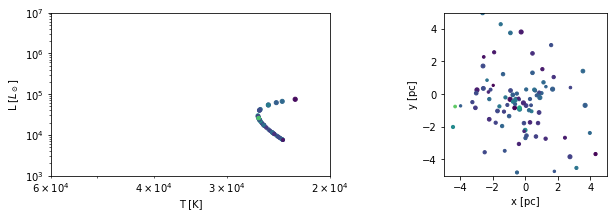

In [87]:
n_stars = 100
alpha_IMF = -2.35
m_stars = new_powerlaw_mass_distribution(n_stars, 
                                         10.0|units.MSun, 
                                         100.0|units.MSun, 
                                         alpha_IMF)
r_cluster = 1.0 | units.parsec
converter=nbody_system.nbody_to_si(m_stars.sum(), r_cluster)
stars=new_plummer_model(n_stars, convert_nbody=converter)
stars.mass = m_stars
stars.scale_to_standard(converter)


stellar = SeBa()
stellar.particles.add_particles(stars)

gravity = ph4(converter)
gravity.particles.add_particles(stars)
ch_s2g = stellar.particles.new_channel_to(gravity.particles)
ch_g2l = gravity.particles.new_channel_to(stars)
ch_s2l = stellar.particles.new_channel_to(stars)
ch_s2l.copy()

plot_snapshot(stars)


end_time = 10 | units.Myr
model_time = 0 | units.Myr

time = [] | units.Myr
radius = [] | units.pc
s_energy = [] | units.J
g_energy = [] | units.J

while(model_time<end_time):
    dt = stellar.particles.time_step.min()
    model_time += dt
    stellar.evolve_model(model_time)
    ch_s2g.copy()
    se = stars.potential_energy().in_(units.J) + stars.kinetic_energy().in_(units.J)
    print('s_energy = ', se)
    s_energy.append(se)
    ch_s2l.copy()
    gravity.evolve_model(model_time)
    ch_g2l.copy()
    ge = stars.potential_energy().in_(units.J) + stars.kinetic_energy().in_(units.J)
    print('g_energy = ', ge)
    g_energy.append(ge)
    print("Evolved to t=", stellar.model_time.in_(units.Myr), 
          gravity.model_time.in_(units.Myr),
         "mass=", stars.mass.sum().in_(units.MSun), 
          "rvir=", stars.virial_radius().in_(units.pc))
    time.append(stellar.model_time)
    radius.append(stars.virial_radius())

    
plot_snapshot(stars)
stellar.stop()
gravity.stop()

I don't know how to get the energy from stellar and gravity immediately. stellar.particles.potential_energy doesn't return a value and gravity.get_potential_energy neither...

#### Question 6

#### Assignment 4

Just set dt = 1Myr (unsure if this is really what is asked here)

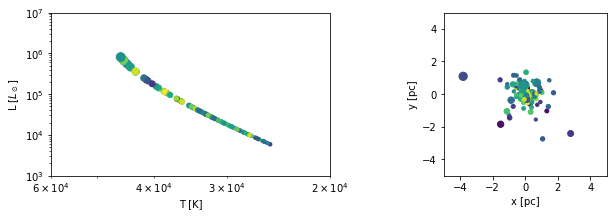

Evolved to t= 1.0 Myr 1.00011322199 Myr mass= 2195.03414116 MSun rvir= 0.996514716569 parsec
Evolved to t= 2.0 Myr 2.00022644398 Myr mass= 2156.08186338 MSun rvir= 0.942860080895 parsec
Evolved to t= 3.0 Myr 3.00003117947 Myr mass= 2112.43025928 MSun rvir= 0.968047030984 parsec
Evolved to t= 4.0 Myr 4.00045288796 Myr mass= 1882.50340487 MSun rvir= 1.82546070939 parsec
Evolved to t= 5.0 Myr 5.00118308295 Myr mass= 1692.08598216 MSun rvir= 2.26336389257 parsec
Evolved to t= 6.0 Myr 6.00006235895 Myr mass= 1586.01024259 MSun rvir= 2.51015920159 parsec
Evolved to t= 7.0 Myr 7.00017558094 Myr mass= 1467.98940663 MSun rvir= 2.86959347991 parsec
Evolved to t= 8.0 Myr 8.00090577592 Myr mass= 1360.53287119 MSun rvir= 3.1720896517 parsec
Evolved to t= 9.0 Myr 9.00040202492 Myr mass= 1284.50815766 MSun rvir= 3.30326565214 parsec
Evolved to t= 10.0 Myr 10.0002067604 Myr mass= 1186.74892235 MSun rvir= 3.33222619192 parsec


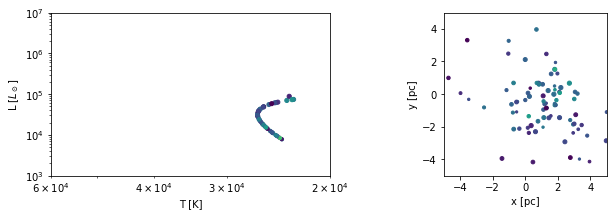

In [89]:
n_stars = 100
alpha_IMF = -2.35
m_stars = new_powerlaw_mass_distribution(n_stars, 
                                         10.0|units.MSun, 
                                         100.0|units.MSun, 
                                         alpha_IMF)
r_cluster = 1.0 | units.parsec
converter=nbody_system.nbody_to_si(m_stars.sum(), r_cluster)
stars=new_plummer_model(n_stars, convert_nbody=converter)
stars.mass = m_stars
stars.scale_to_standard(converter)


stellar = SeBa()
stellar.particles.add_particles(stars)

gravity = ph4(converter)
gravity.particles.add_particles(stars)
ch_s2g = stellar.particles.new_channel_to(gravity.particles)
ch_g2l = gravity.particles.new_channel_to(stars)
ch_s2l = stellar.particles.new_channel_to(stars)
ch_s2l.copy()

plot_snapshot(stars)


end_time = 10 | units.Myr
model_time = 0 | units.Myr

time = [] | units.Myr
radius = [] | units.pc
dt = 1 | units.Myr
while(model_time<end_time):
    model_time += dt
    stellar.evolve_model(model_time)
    ch_s2g.copy()
    ch_s2l.copy()
    gravity.evolve_model(model_time)
    ch_g2l.copy()
    print("Evolved to t=", stellar.model_time.in_(units.Myr), 
          gravity.model_time.in_(units.Myr),
         "mass=", stars.mass.sum().in_(units.MSun), 
          "rvir=", stars.virial_radius().in_(units.pc))
    time.append(stellar.model_time)
    radius.append(stars.virial_radius())
    
plot_snapshot(stars)
stellar.stop()
gravity.stop()



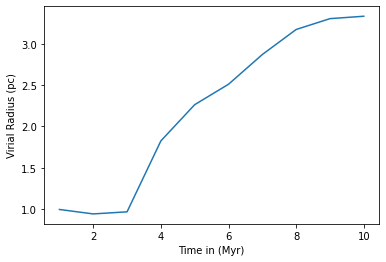

In [90]:
pyplot.plot(time.value_in(units.Myr), radius.value_in(units.pc))
pyplot.xlabel('Time in (Myr)')
pyplot.ylabel('Virial Radius (pc)')
pyplot.show()